In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import seaborn
from pandas import DataFrame
from tqdm import tqdm
from imblearn.under_sampling import RandomUnderSampler #アンダーサンプリング用
from sklearn.model_selection import train_test_split
import pickle
# 機械学習用
from sklearn.cluster import KMeans #クラスタリング用
from sklearn.decomposition import PCA  #次元削減用
from sklearn.ensemble import RandomForestClassifier#ランダムフォレスト
from copy import deepcopy as cp
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression as LR
import time
import datetime
import os #ディレクトリ作成用
import xgboost as xgb
import sys


#自作のモジュールのインポート
import module.master as master
import module.graph as graph
import module.trans_text_code as trans
import module.data_making as making
import module.model_analysis as analysis#今回メインで使うモデル分析用のモジュール


from sklearn.preprocessing import StandardScaler#モデルの評価用に標準化する関数
import scipy.stats#モデルの評価用に標準化する関数

pd.set_option('display.width',400)#勝手に改行コードを入れられるのを防ぐ

# スコア格納用の箱の作成と名前の取得

In [2]:
place_master=master.get_place_master()
for place in place_master.items():
    #print(place[0],place[1],'\n')
    place_name=place[1]
    dir_path = "../bot_database/{place_name}/model_score_{place_name}/good_model/".format(place_name=place_name)#作成したデータの書き込み先#使用するデータの読み込み
    if os.path.exists(dir_path)==False:
        os.makedirs(dir_path)
    else:
        pass
    

## 分析対象のモデルスコアシート

In [3]:

#データ格納用のディレクトリ作り
version='V2_1'#バージョン


place_master=master.get_place_master()
for place in tqdm(place_master.items()):
    place_name=place[1]
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    #各会場の学習したモデルのスコアの読み込み
    score_file_path= "../bot_database/{place_name}/model_score_{place_name}/{place_name}_model_score_{V}.csv".format(place_name=place_name,V=version)#作成したデータの書き込み先#使用するデータの読み込み
    score_df=pd.read_csv(score_file_path)
    score_df=score_df.drop(["Unnamed: 0"],axis=1)
    
    
    analysis.model_analysis(score_df,place_name,version)

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [02:11<00:00,  5.46s/it]


In [4]:
place_master=master.get_place_master()
for place in place_master.items():
    #print(place[0],place[1],'\n')
    place_name=place[1]
    dir_path = "../bot_database/{place_name}/model_score_{place_name}/use_model/".format(place_name=place_name)#作成したデータの書き込み先#使用するデータの読み込み
    if os.path.exists(dir_path)==False:
        os.makedirs(dir_path)
    else:
        pass
    

## good_modelのスコアからさらに一つのcomごとに一つのモデルに絞り込む

In [5]:

#データ格納用のディレクトリ作り
version='V2_1'#バージョン


place_master=master.get_place_master()
for place in tqdm(place_master.items()):
    place_name=place[1]
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    #各会場の成績の良かったモデルのスコアの読み込み
    dir_path = "../bot_database/{place_name}/model_score_{place_name}/good_model/good_model_{place_name}_{V}.csv".format(place_name=place_name,V=version)#作成したデータの書き込み先#使用するデータの読み込み
    good_score_df=pd.read_csv(dir_path)
    good_score_df=good_score_df.drop(["Unnamed: 0"],axis=1)
    
    
    analysis.use_model_para(good_score_df,place_name,version)

  0%|                                                                                           | 0/24 [00:00<?, ?it/s]C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zsc

kiryu
toda
edogawa
heiwazima
tamagawa


C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['score']=target_com_df['的中数_std']+target_com_df['利益率_std']
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

hamanako
gamagori
tokoname


C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

 42%|██████████████████████████████████▏                                               | 10/24 [00:00<00:00, 43.63it/s]C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zsc

C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

tu
mikuni
biwako
suminoe
amagasaki
naruto


C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

marugame
kozima
miyazima


C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['score']=target_com_df['的中数_std']+target_com_df['利益率_std']
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

tokuyama
simonoseki
wakamatu
asiya
fukuoka
karatu
omura


C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 46.42it/s]


 ## use_modelを参考にモデルを保存する。

## モデル格納用の箱作り

In [6]:
place_master=master.get_place_master()
for place in place_master.items():
    #print(place[0],place[1],'\n')
    place_name=place[1]
    dir_path = "../bot_database/{place_name}/model_pickle_{place_name}/".format(place_name=place_name)#作成したデータの書き込み先#使用するデータの読み込み
    if os.path.exists(dir_path)==False:
        os.makedirs(dir_path)
    else:
        pass
    

## 予測用モデルの保存

In [7]:

#データ格納用のディレクトリ作り
version='V2_1'#バージョン


place_master=master.get_place_master()
for place in tqdm(place_master.items()):
    place_name=place[1]
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    #各会場の成績の良かったモデルのスコアの読み込み
    dir_path = "../bot_database/{place_name}/{place_name}_train/train_{place_name}.csv".format(place_name=place_name)#学習のためのベースになるリザルトデータ
    result_base_df=pd.read_csv(dir_path)
    result_base_df=result_base_df.drop(["Unnamed: 0"],axis=1)

    model_dir_path = "../bot_database/{place_name}/model_score_{place_name}/use_model/use_model_{place_name}_{V}.csv".format(place_name=place_name,V=version)#使用するモデルのパラメータ読み込み
    use_model_df=pd.read_csv(model_dir_path)
    use_model_df=use_model_df.drop(["Unnamed: 0"],axis=1)

    making.save_model_V2_1(result_base_df,use_model_df,place_name,version)
    
    
    
    
    
    #model_analysis.use_model_para(good_score_df,place_name,version)

  0%|                                                                                           | 0/24 [00:00<?, ?it/s]

kiryu


  4%|███▍                                                                               | 1/24 [00:07<02:52,  7.48s/it]

toda


  8%|██████▉                                                                            | 2/24 [00:14<02:33,  6.98s/it]

edogawa


 12%|██████████▍                                                                        | 3/24 [00:25<03:05,  8.81s/it]

heiwazima


 17%|█████████████▊                                                                     | 4/24 [00:38<03:29, 10.46s/it]

tamagawa


 21%|█████████████████▎                                                                 | 5/24 [00:48<03:20, 10.55s/it]

hamanako


 25%|████████████████████▊                                                              | 6/24 [00:54<02:39,  8.85s/it]

gamagori


 29%|████████████████████████▏                                                          | 7/24 [01:04<02:39,  9.36s/it]

tokoname


 33%|███████████████████████████▋                                                       | 8/24 [01:14<02:30,  9.44s/it]

tu


 38%|███████████████████████████████▏                                                   | 9/24 [01:24<02:23,  9.58s/it]

mikuni


 42%|██████████████████████████████████▏                                               | 10/24 [01:29<01:56,  8.36s/it]

biwako


 46%|█████████████████████████████████████▌                                            | 11/24 [01:36<01:40,  7.72s/it]

suminoe


 50%|█████████████████████████████████████████                                         | 12/24 [01:45<01:39,  8.29s/it]

amagasaki


 54%|████████████████████████████████████████████▍                                     | 13/24 [01:56<01:40,  9.15s/it]

naruto


 58%|███████████████████████████████████████████████▊                                  | 14/24 [02:03<01:24,  8.46s/it]

marugame


 62%|███████████████████████████████████████████████████▎                              | 15/24 [02:10<01:11,  7.92s/it]

kozima


 67%|██████████████████████████████████████████████████████▋                           | 16/24 [02:18<01:03,  7.92s/it]

miyazima


 71%|██████████████████████████████████████████████████████████                        | 17/24 [02:24<00:52,  7.52s/it]

tokuyama


 75%|█████████████████████████████████████████████████████████████▌                    | 18/24 [02:34<00:47,  8.00s/it]

simonoseki


 79%|████████████████████████████████████████████████████████████████▉                 | 19/24 [02:42<00:41,  8.25s/it]

wakamatu


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [02:46<00:26,  6.74s/it]

asiya


 88%|███████████████████████████████████████████████████████████████████████▊          | 21/24 [02:53<00:21,  7.08s/it]

fukuoka


 92%|███████████████████████████████████████████████████████████████████████████▏      | 22/24 [03:03<00:15,  7.92s/it]

karatu


 96%|██████████████████████████████████████████████████████████████████████████████▌   | 23/24 [03:11<00:07,  7.96s/it]

omura


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [03:21<00:00,  8.40s/it]


## 学習データのラベル付けのためのモデルを保存。

In [2]:

#データ格納用のディレクトリ作り
version='V2_1'#バージョン


place_master=master.get_place_master()
for place in tqdm(place_master.items()):
    place_name=place[1]
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    #各会場の成績の良かったモデルのスコアの読み込み
    dir_path = "../bot_database/{place_name}/{place_name}_train/train_{place_name}.csv".format(place_name=place_name)#学習のためのベースになるリザルトデータ
    result_base_df=pd.read_csv(dir_path)
    result_base_df=result_base_df.drop(["Unnamed: 0"],axis=1)

    analysis.save_clustar_model(result_base_df,place_name,version)
    
    
    
    
    
    #model_analysis.use_model_para(good_score_df,place_name,version)

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:44<00:00,  1.86s/it]


# モデルを全部pickleで読み込んでテスト

In [3]:

#データ格納用のディレクトリ作り
version='V2_1'#バージョン


place_master=master.get_place_master()
for place in tqdm(place_master.items()):
    place_name=place[1]
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    #各会場の成績の良かったモデルのスコアの読み込み
    dir_path = "../bot_database/{place_name}/{place_name}_train/train_{place_name}.csv".format(place_name=place_name)#学習のためのベースになるリザルトデータ
    result_base_df=pd.read_csv(dir_path)
    result_base_df=result_base_df.drop(["Unnamed: 0"],axis=1)

    model_dir_path = "../bot_database/{place_name}/model_score_{place_name}/use_model/use_model_{place_name}_{V}.csv".format(place_name=place_name,V=version)#使用するモデルのパラメータ読み込み
    use_model_df=pd.read_csv(model_dir_path)
    use_model_df=use_model_df.drop(["Unnamed: 0"],axis=1)

    analysis.check_model_V2_1(result_base_df,use_model_df,place_name,version)
    
    
    
    
    
    #model_analysis.use_model_para(good_score_df,place_name,version)



  0%|                                                                                           | 0/24 [00:00<?, ?it/s]

kiryu


  4%|███▍                                                                               | 1/24 [00:01<00:29,  1.27s/it]

toda


  8%|██████▉                                                                            | 2/24 [00:02<00:23,  1.08s/it]

edogawa


 12%|██████████▍                                                                        | 3/24 [00:03<00:27,  1.29s/it]

heiwazima


 17%|█████████████▊                                                                     | 4/24 [00:05<00:29,  1.48s/it]

tamagawa


 21%|█████████████████▎                                                                 | 5/24 [00:06<00:27,  1.47s/it]

hamanako


 25%|████████████████████▊                                                              | 6/24 [00:07<00:22,  1.24s/it]

gamagori


 29%|████████████████████████▏                                                          | 7/24 [00:09<00:22,  1.35s/it]

tokoname


 33%|███████████████████████████▋                                                       | 8/24 [00:10<00:21,  1.35s/it]

tu


 38%|███████████████████████████████▏                                                   | 9/24 [00:12<00:20,  1.39s/it]

mikuni


 42%|██████████████████████████████████▏                                               | 10/24 [00:12<00:16,  1.20s/it]

biwako


 46%|█████████████████████████████████████▌                                            | 11/24 [00:13<00:14,  1.12s/it]

suminoe


 50%|█████████████████████████████████████████                                         | 12/24 [00:15<00:14,  1.17s/it]

amagasaki


 54%|████████████████████████████████████████████▍                                     | 13/24 [00:16<00:14,  1.30s/it]

naruto


 58%|███████████████████████████████████████████████▊                                  | 14/24 [00:17<00:12,  1.23s/it]

marugame


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:18<00:10,  1.14s/it]

kozima


 67%|██████████████████████████████████████████████████████▋                           | 16/24 [00:19<00:09,  1.14s/it]

miyazima


 71%|██████████████████████████████████████████████████████████                        | 17/24 [00:20<00:07,  1.08s/it]

tokuyama


 75%|█████████████████████████████████████████████████████████████▌                    | 18/24 [00:22<00:06,  1.16s/it]

simonoseki


 79%|████████████████████████████████████████████████████████████████▉                 | 19/24 [00:23<00:05,  1.19s/it]

wakamatu


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:23<00:03,  1.05it/s]

asiya


 88%|███████████████████████████████████████████████████████████████████████▊          | 21/24 [00:24<00:03,  1.01s/it]

fukuoka


 92%|███████████████████████████████████████████████████████████████████████████▏      | 22/24 [00:26<00:02,  1.13s/it]

karatu


 96%|██████████████████████████████████████████████████████████████████████████████▌   | 23/24 [00:27<00:01,  1.13s/it]

omura


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:28<00:00,  1.20s/it]


## 年、月ごとの利益率の推移を見る。

In [6]:
# 箱作り
place_master=master.get_place_master()
for place in place_master.items():
    #print(place[0],place[1],'\n')
    place_name=place[1]
    dir_path="../bot_database/{place_name}/model_analysis_{place_name}/monthly_score/".format(place_name=place_name)#作成したデータの書き込み先#使用するデータの読み込み
    if os.path.exists(dir_path)==False:
        os.makedirs(dir_path)
    else:
        pass


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import seaborn
from pandas import DataFrame
from tqdm import tqdm
from imblearn.under_sampling import RandomUnderSampler #アンダーサンプリング用
from sklearn.model_selection import train_test_split
import pickle
# 機械学習用
from sklearn.cluster import KMeans #クラスタリング用
from sklearn.decomposition import PCA  #次元削減用
from sklearn.ensemble import RandomForestClassifier#ランダムフォレスト
from copy import deepcopy as cp
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression as LR
import time
import datetime
import os #ディレクトリ作成用
import xgboost as xgb
import sys


#自作のモジュールのインポート
import module.master as master
import module.graph as graph
import module.trans_text_code as trans
import module.data_making as making
import module.model_analysis as analysis#今回メインで使うモデル分析用のモジュール


from sklearn.preprocessing import StandardScaler#モデルの評価用に標準化する関数
import scipy.stats#モデルの評価用に標準化する関数

pd.set_option('display.width',400)#勝手に改行コードを入れられるのを防ぐ

  0%|                                                                                           | 0/24 [00:00<?, ?it/s]

kiryu
2019
利益率平均 1.0847133757961784
kiryu


  4%|███▍                                                                               | 1/24 [00:08<03:15,  8.50s/it]

2020
利益率平均 1.5358473824312333
toda
2019
利益率平均 1.3626933575978162
toda


  8%|██████▉                                                                            | 2/24 [00:16<02:55,  7.99s/it]

2020
利益率平均 1.6573785517873512
edogawa
2019
利益率平均 1.4450989415554534
edogawa


 12%|██████████▍                                                                        | 3/24 [00:22<02:36,  7.46s/it]

2020
利益率平均 1.668987012987013
heiwazima
2019
利益率平均 1.5620330147697654
heiwazima


 17%|█████████████▊                                                                     | 4/24 [00:31<02:38,  7.91s/it]

2020
利益率平均 1.3008526187576126
tamagawa
2019
利益率平均 1.5356026222894603
tamagawa


 21%|█████████████████▎                                                                 | 5/24 [00:40<02:34,  8.12s/it]

2020
利益率平均 1.2383618695048588
hamanako
2019
利益率平均 1.9005854800936768
hamanako


 25%|████████████████████▊                                                              | 6/24 [00:48<02:25,  8.09s/it]

2020
利益率平均 1.2807551766138856
gamagori
2019
利益率平均 1.497650709219858
gamagori


 29%|████████████████████████▏                                                          | 7/24 [00:56<02:16,  8.05s/it]

2020
利益率平均 1.2555555555555555
tokoname
2019
利益率平均 1.8271042471042471
tokoname


 33%|███████████████████████████▋                                                       | 8/24 [01:04<02:11,  8.22s/it]

2020
利益率平均 1.0827941176470588
tu
2019
利益率平均 1.715703781512605
tu


 38%|███████████████████████████████▏                                                   | 9/24 [01:12<02:01,  8.11s/it]

2020
利益率平均 1.3325325325325326
mikuni
2019
利益率平均 2.0544303797468353
mikuni


 42%|██████████████████████████████████▏                                               | 10/24 [01:20<01:51,  7.98s/it]

2020
利益率平均 1.7026557711950971
biwako
2019
利益率平均 1.383450704225352
biwako


C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\graph.py:204: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=FIGSIZE, dpi=DPI)
 46%|█████████████████████████████████████▌                                            | 11/24 [01:27<01:40,  7.76s/it]

2020
利益率平均 1.5866858237547892
suminoe
2019
利益率平均 1.6319148936170214
suminoe


 50%|█████████████████████████████████████████                                         | 12/24 [01:35<01:33,  7.77s/it]

2020
利益率平均 1.0535244360902256
amagasaki
2019
利益率平均 1.3985034013605442
amagasaki


 54%|████████████████████████████████████████████▍                                     | 13/24 [01:42<01:24,  7.65s/it]

2020
利益率平均 1.6339007782101167
naruto
2019
利益率平均 1.4383792048929664
naruto


 58%|███████████████████████████████████████████████▊                                  | 14/24 [01:48<01:11,  7.19s/it]

2020
利益率平均 1.5449792531120332
marugame
2019
利益率平均 1.2787408013082584
marugame


 62%|███████████████████████████████████████████████████▎                              | 15/24 [01:57<01:09,  7.73s/it]

2020
利益率平均 1.8247634069400631
kozima
2019
利益率平均 1.0718688524590163
kozima


 67%|██████████████████████████████████████████████████████▋                           | 16/24 [02:05<01:02,  7.87s/it]

2020
利益率平均 1.5988372093023255
miyazima
2019
利益率平均 1.2865506329113925
miyazima


 71%|██████████████████████████████████████████████████████████                        | 17/24 [02:13<00:54,  7.81s/it]

2020
利益率平均 1.5455706984667803
tokuyama
2019
利益率平均 1.4017333333333333
tokuyama


 75%|█████████████████████████████████████████████████████████████▌                    | 18/24 [02:21<00:46,  7.81s/it]

2020
利益率平均 1.562844330557335
simonoseki
2019
利益率平均 1.4255305867665418
simonoseki


 79%|████████████████████████████████████████████████████████████████▉                 | 19/24 [02:28<00:38,  7.67s/it]

2020
利益率平均 1.304882154882155
wakamatu
2019
利益率平均 1.9933673469387756
wakamatu


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [02:36<00:30,  7.74s/it]

2020
利益率平均 0.9456431535269709
asiya
2019
利益率平均 1.2717054263565892
asiya


 88%|███████████████████████████████████████████████████████████████████████▊          | 21/24 [02:44<00:23,  7.81s/it]

2020
利益率平均 1.4515057915057914
fukuoka
2019
利益率平均 1.2741695587506197
fukuoka


 92%|███████████████████████████████████████████████████████████████████████████▏      | 22/24 [02:52<00:15,  7.86s/it]

2020
利益率平均 1.5002905287623474
karatu
2019
利益率平均 1.376766304347826
karatu


 96%|██████████████████████████████████████████████████████████████████████████████▌   | 23/24 [03:00<00:07,  7.80s/it]

2020
利益率平均 1.3549304677623262
omura
2019
利益率平均 1.2775599128540305
omura


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [03:08<00:00,  7.83s/it]
findfont: Font family ['VL Gothic'] not found. Falling back to DejaVu Sans.
c:\users\takuma\nabepy\env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['VL Gothic'] not found. Falling back to DejaVu Sans.


2020
利益率平均 1.4450867052023122


c:\users\takuma\nabepy\env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)


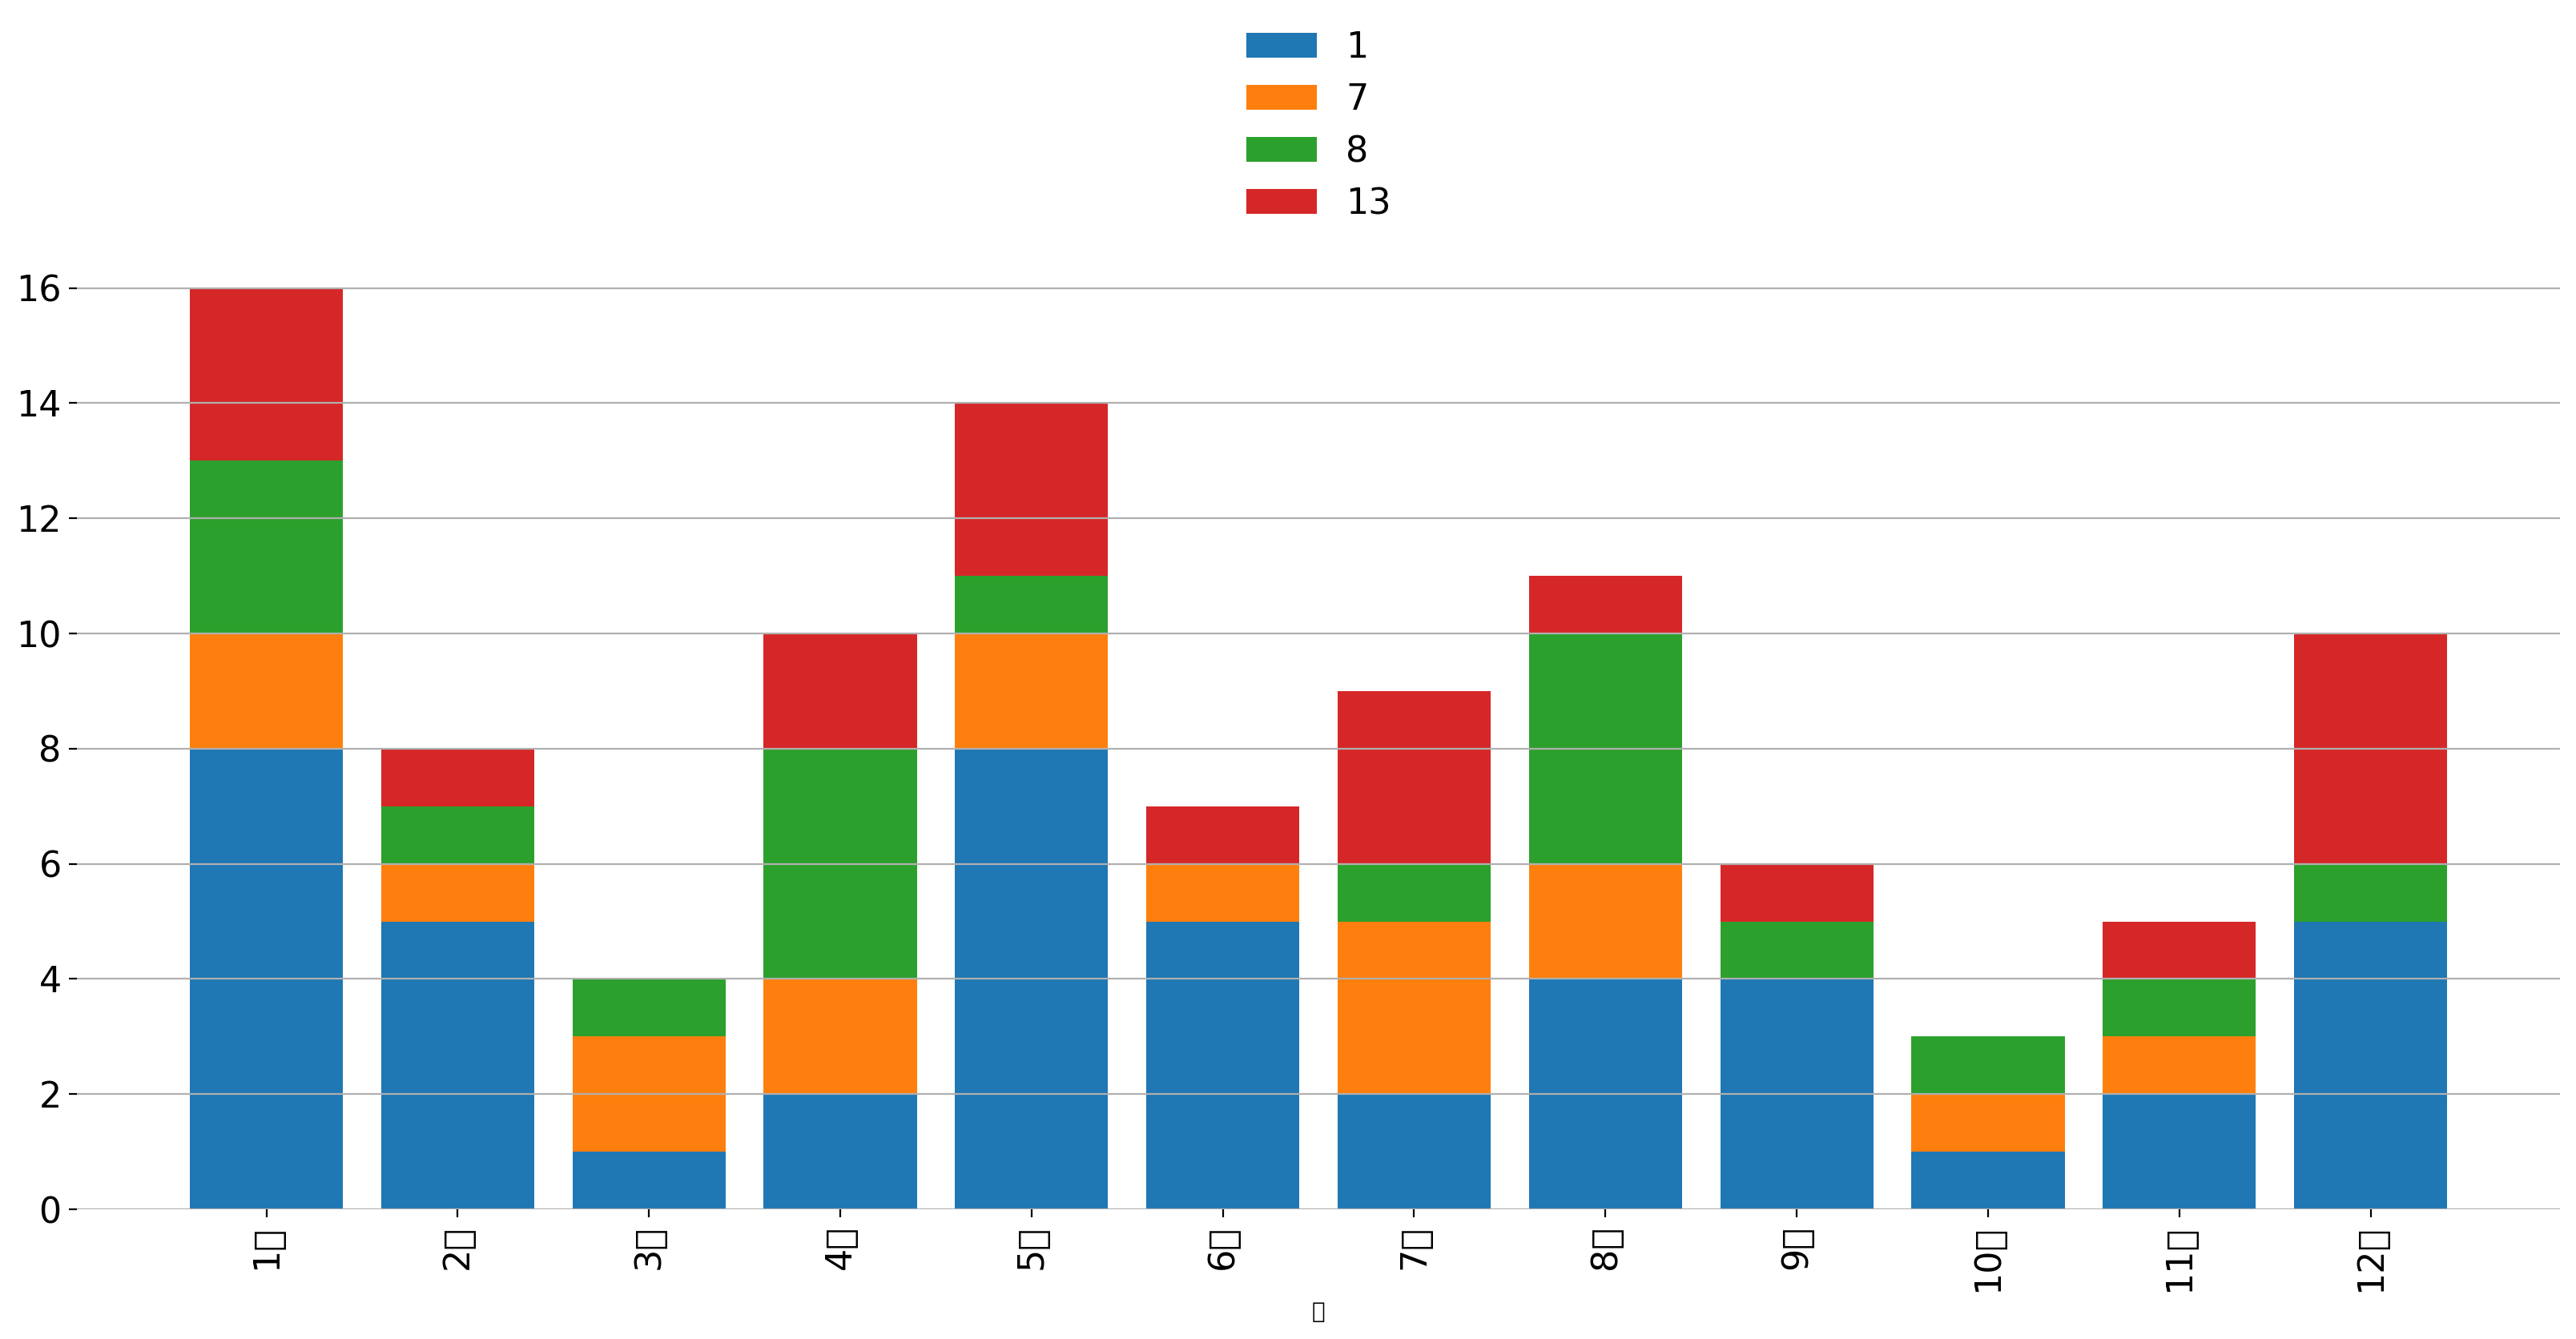

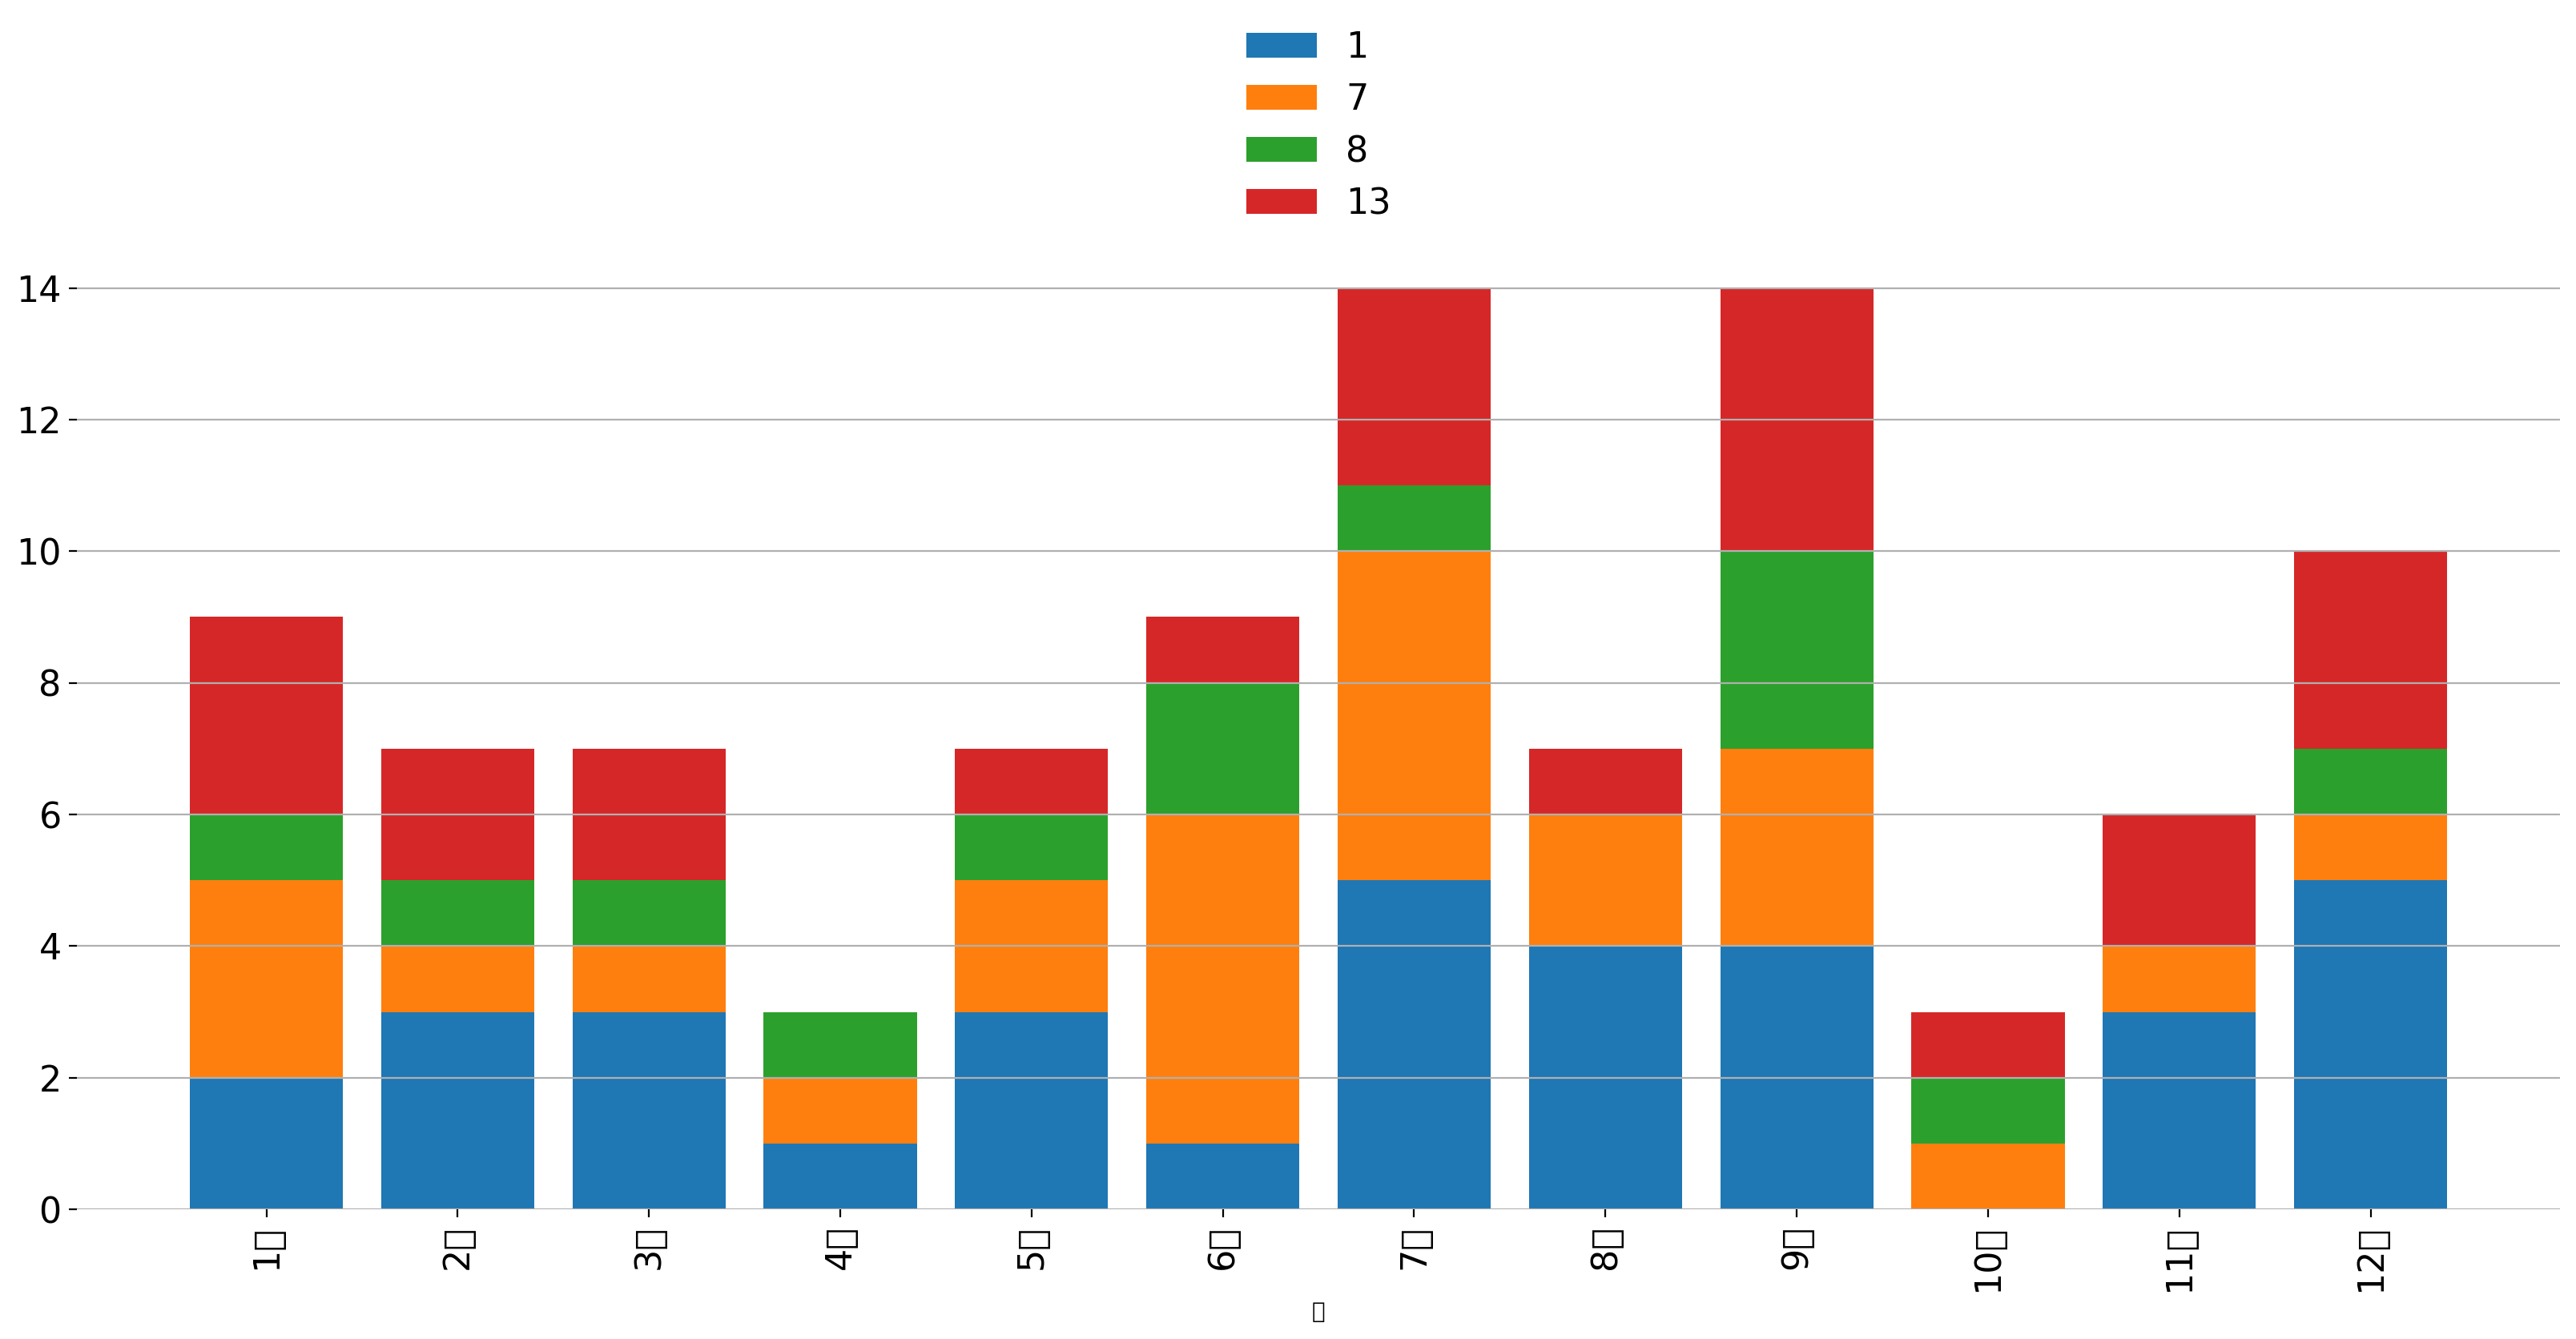

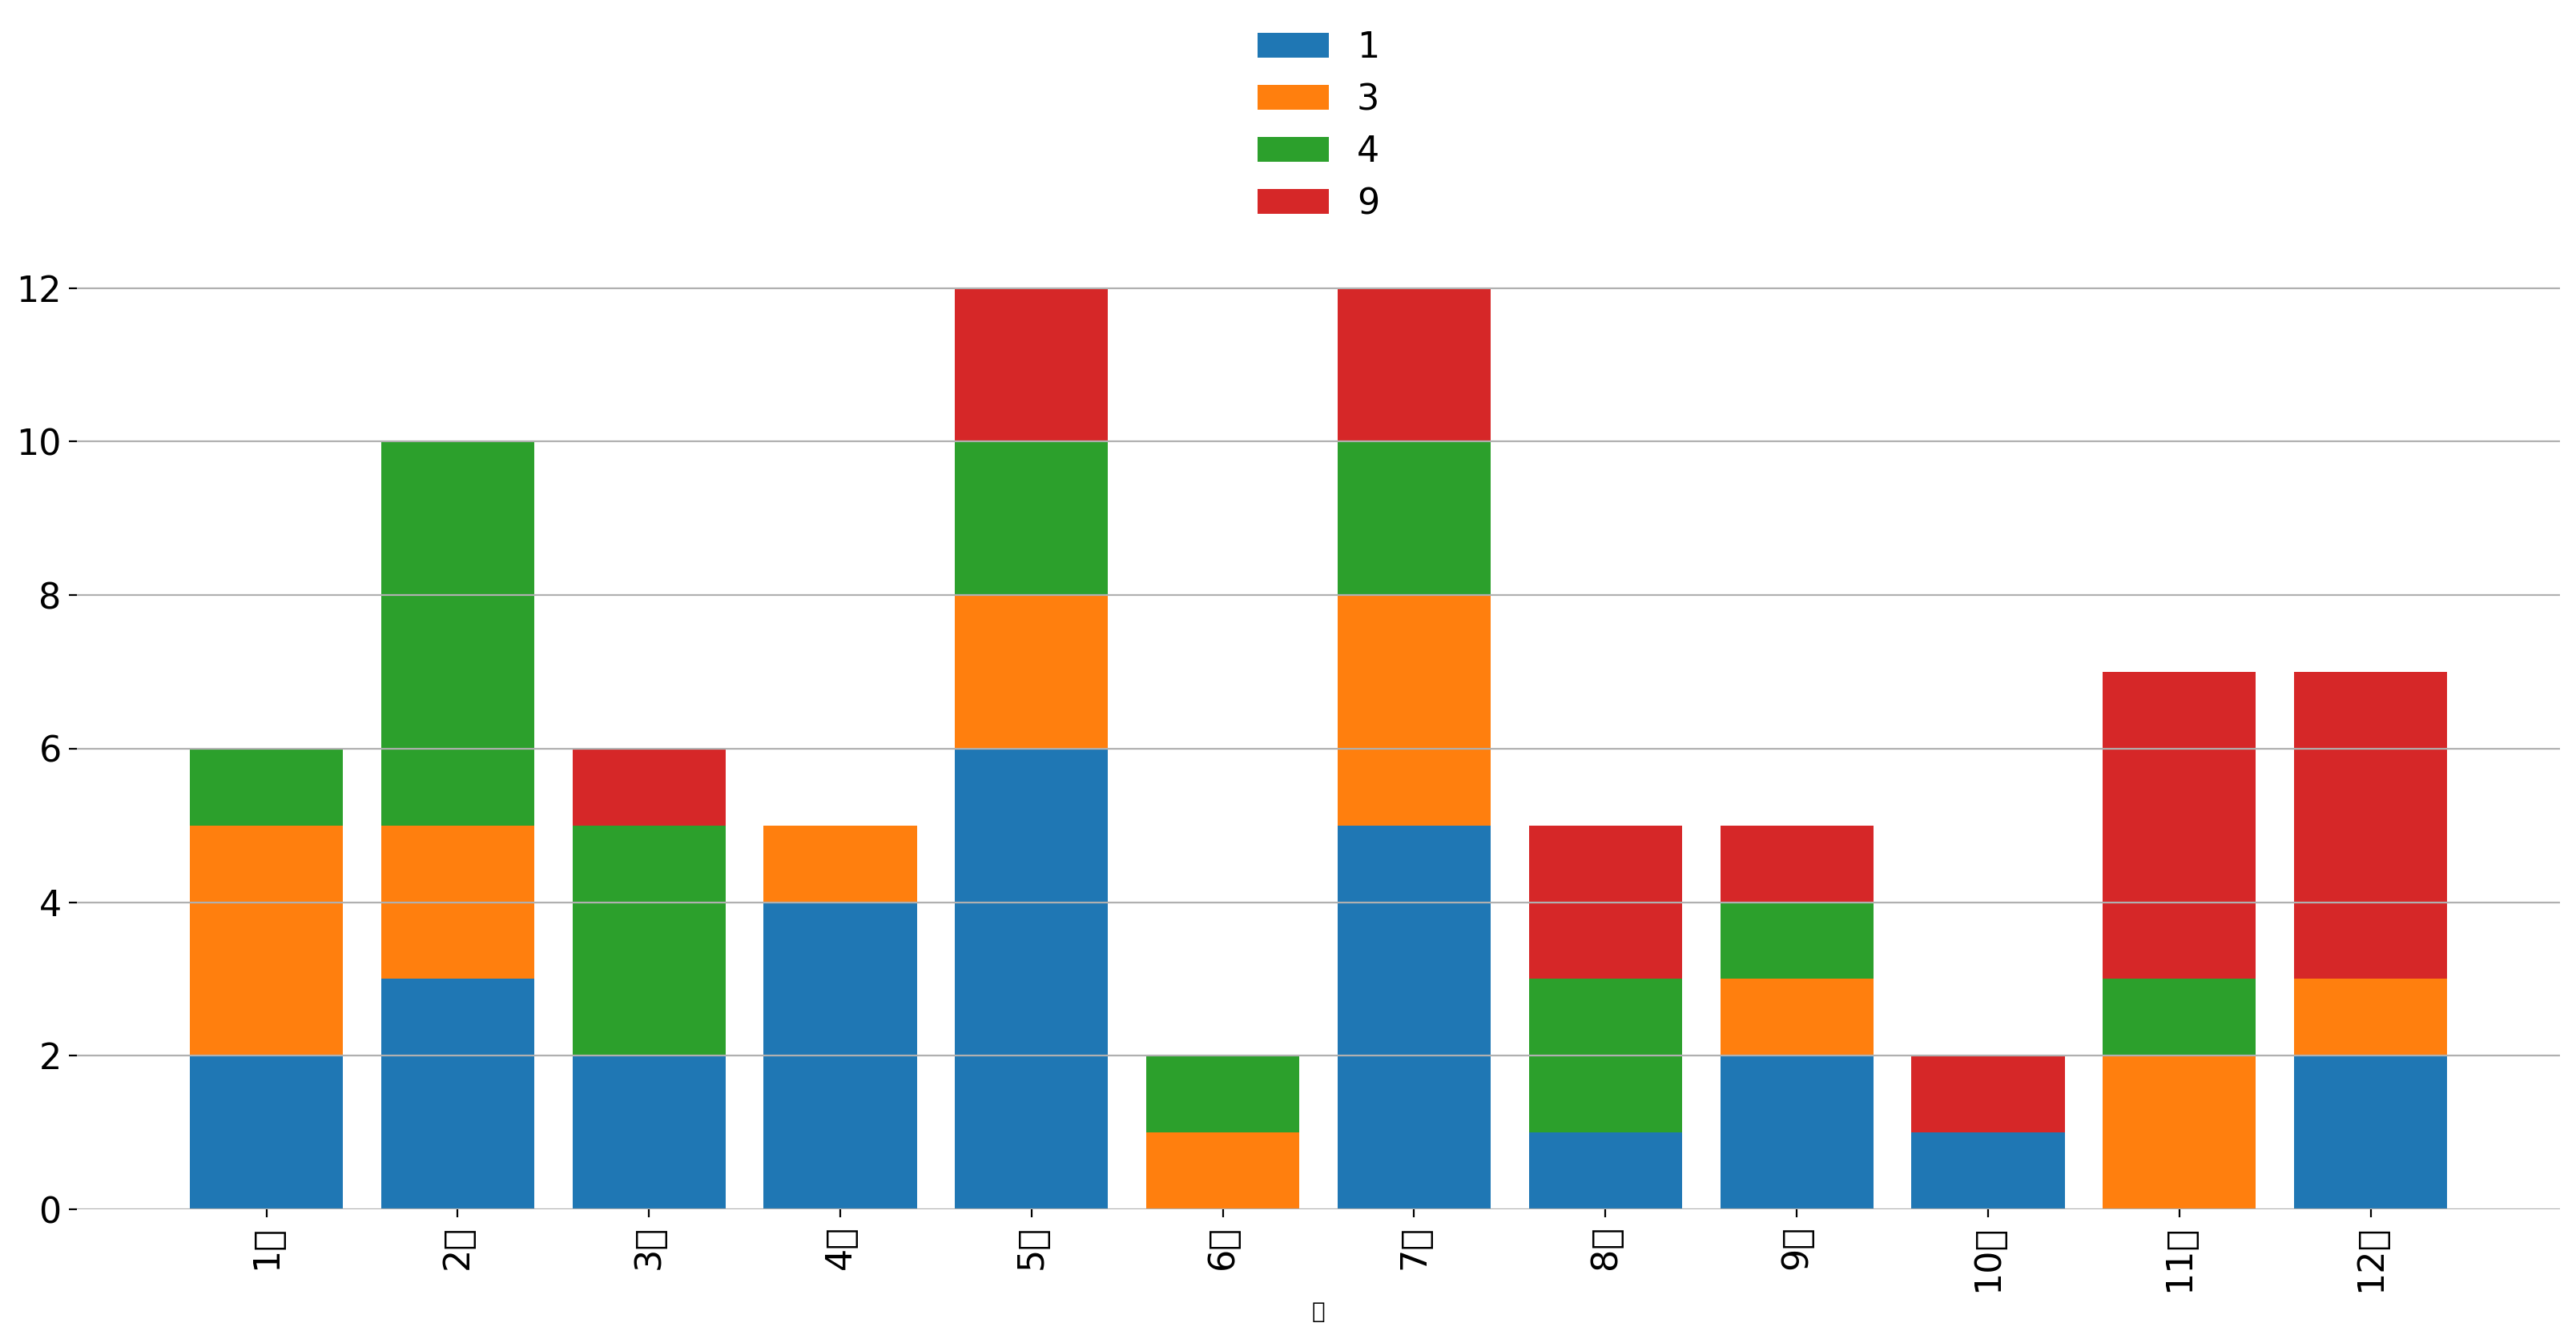

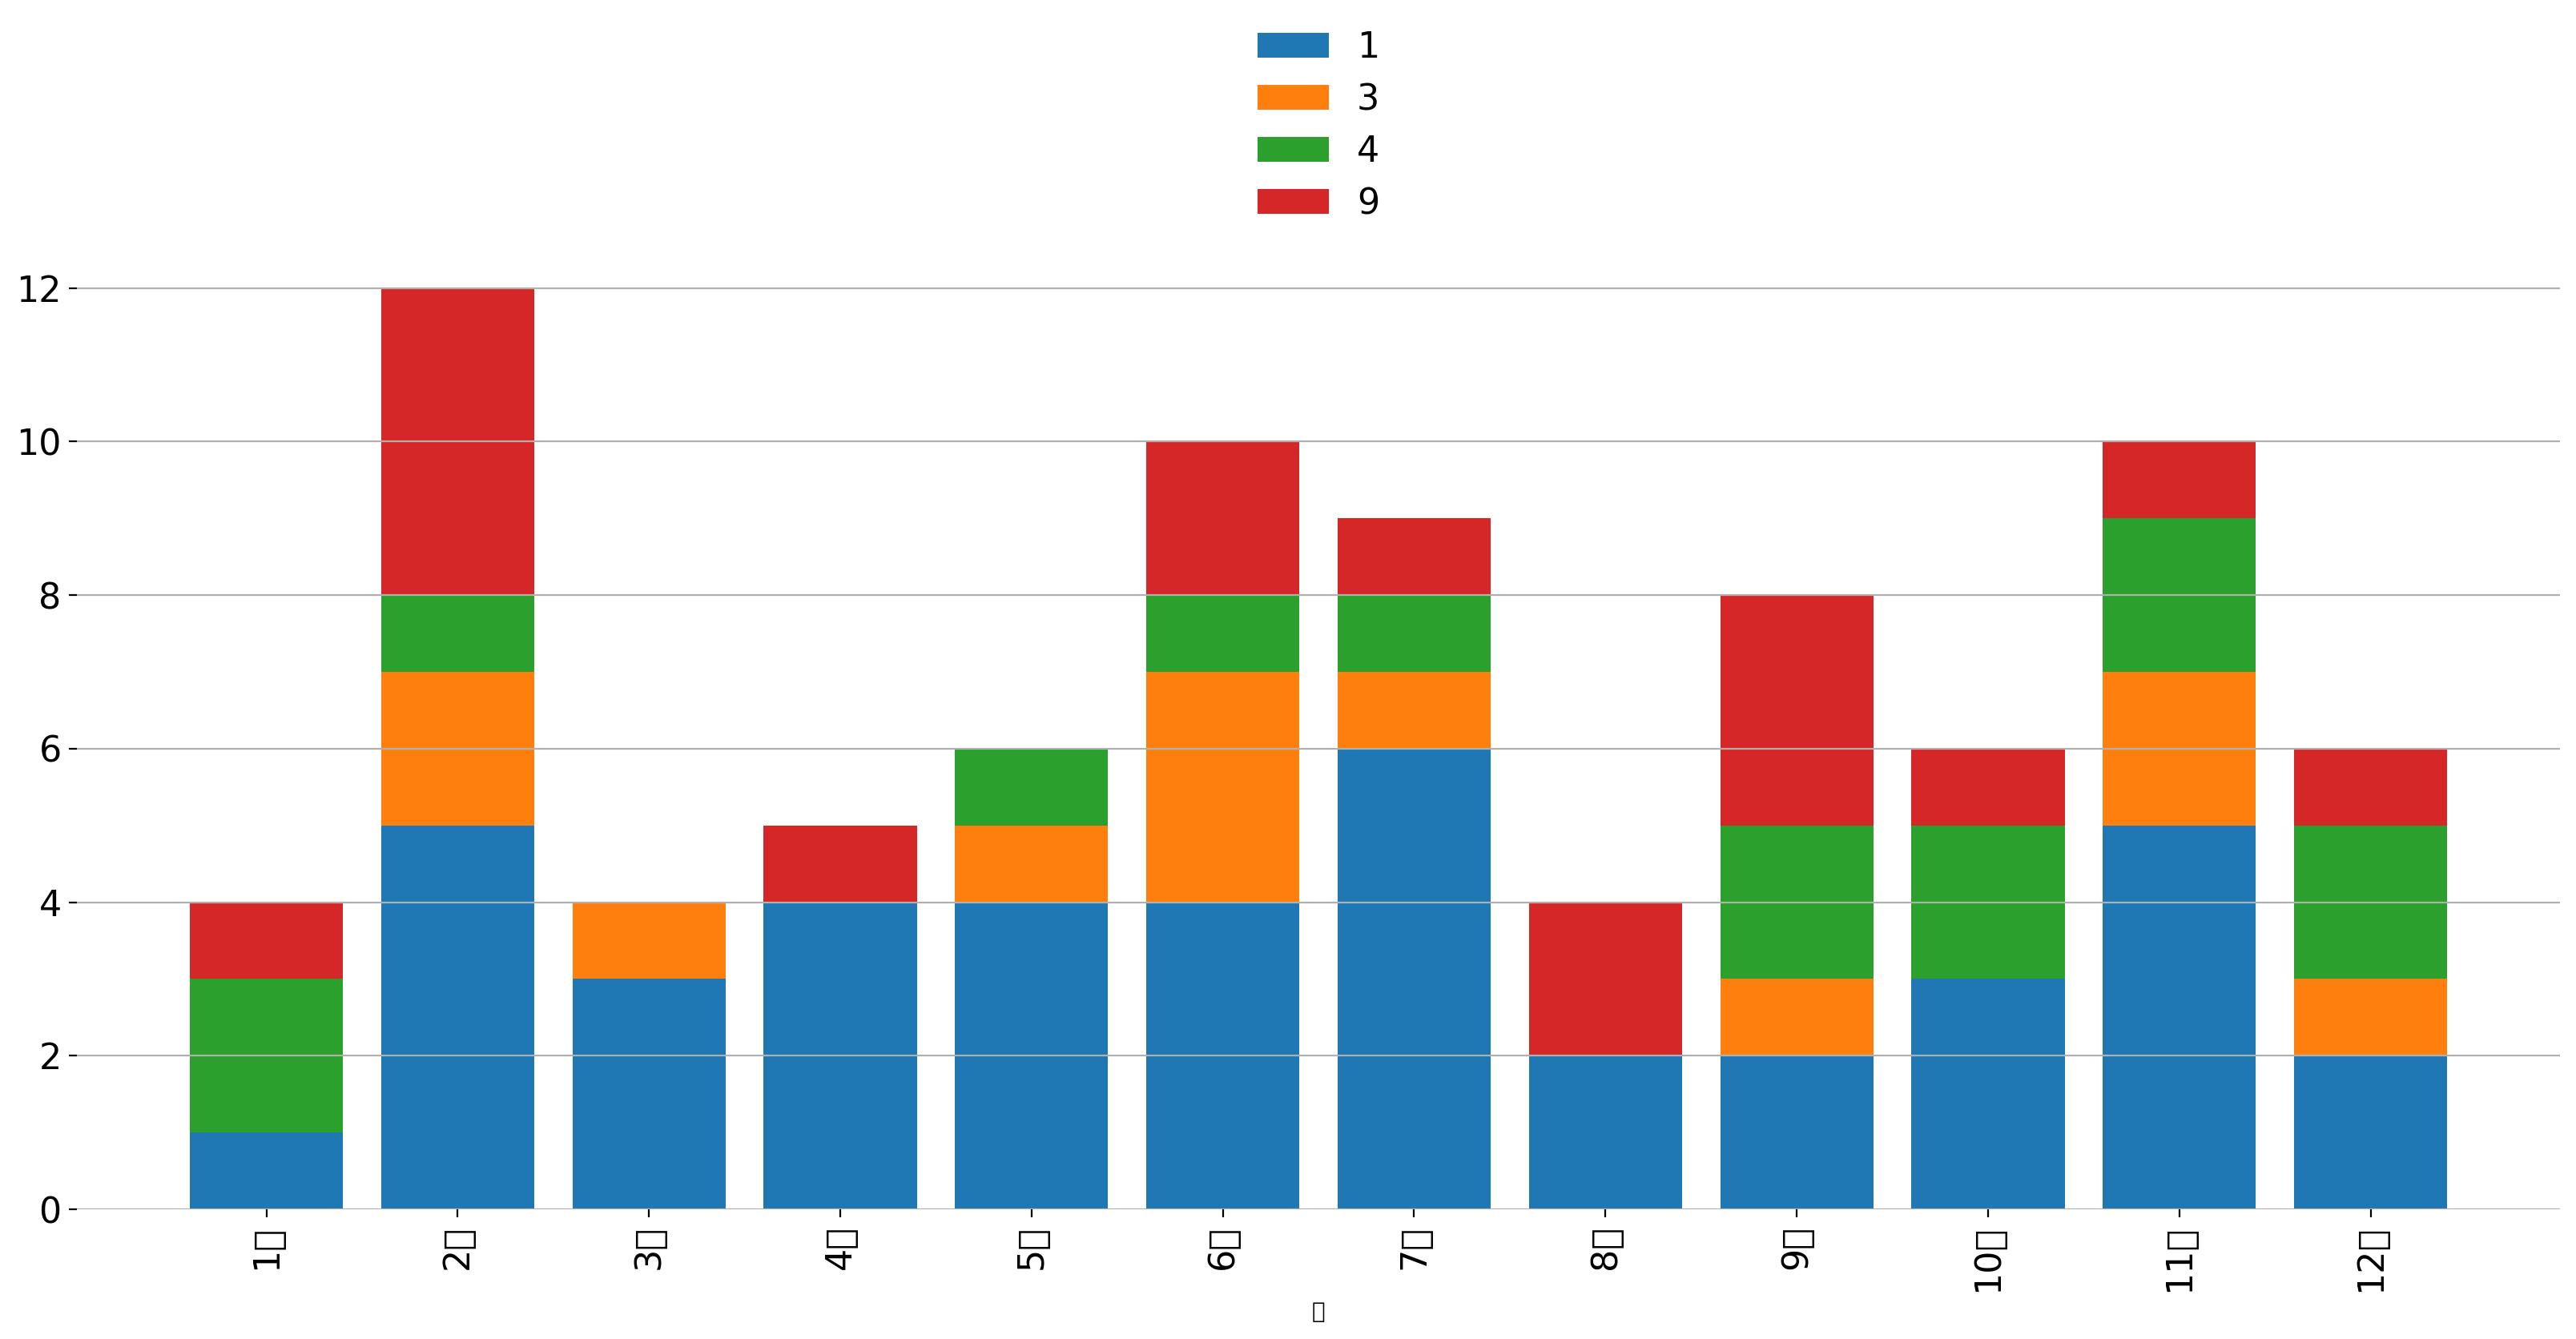

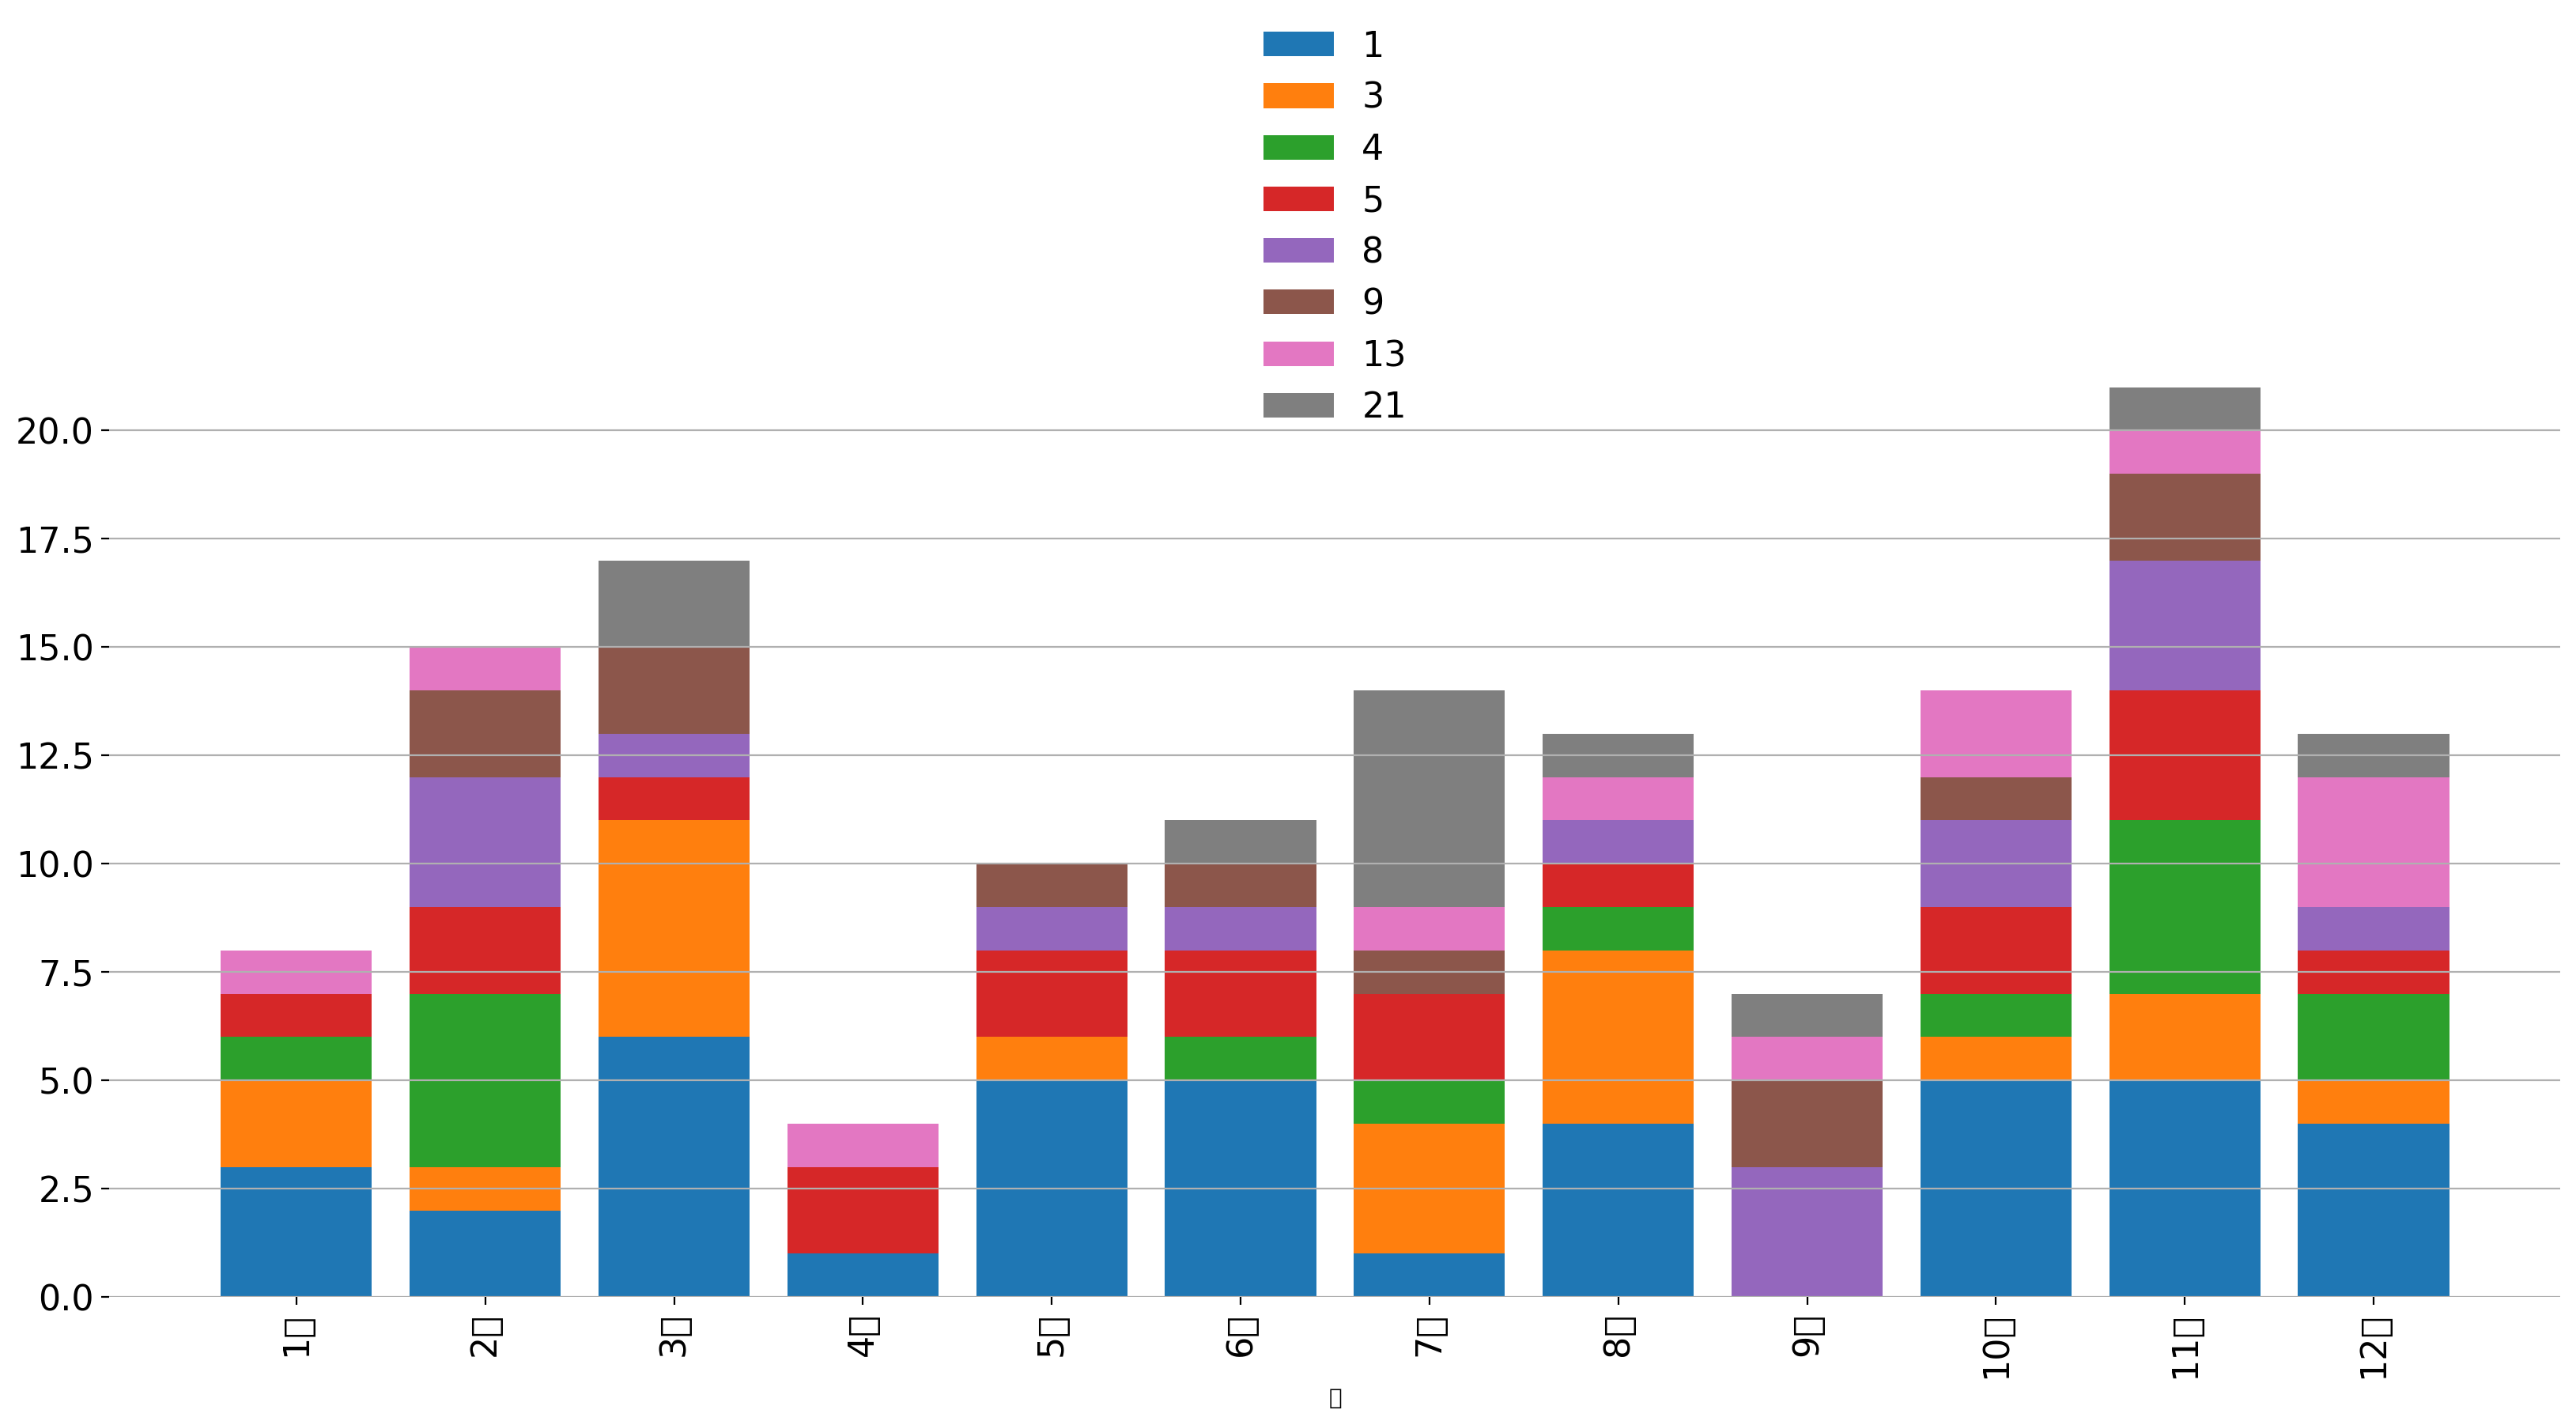

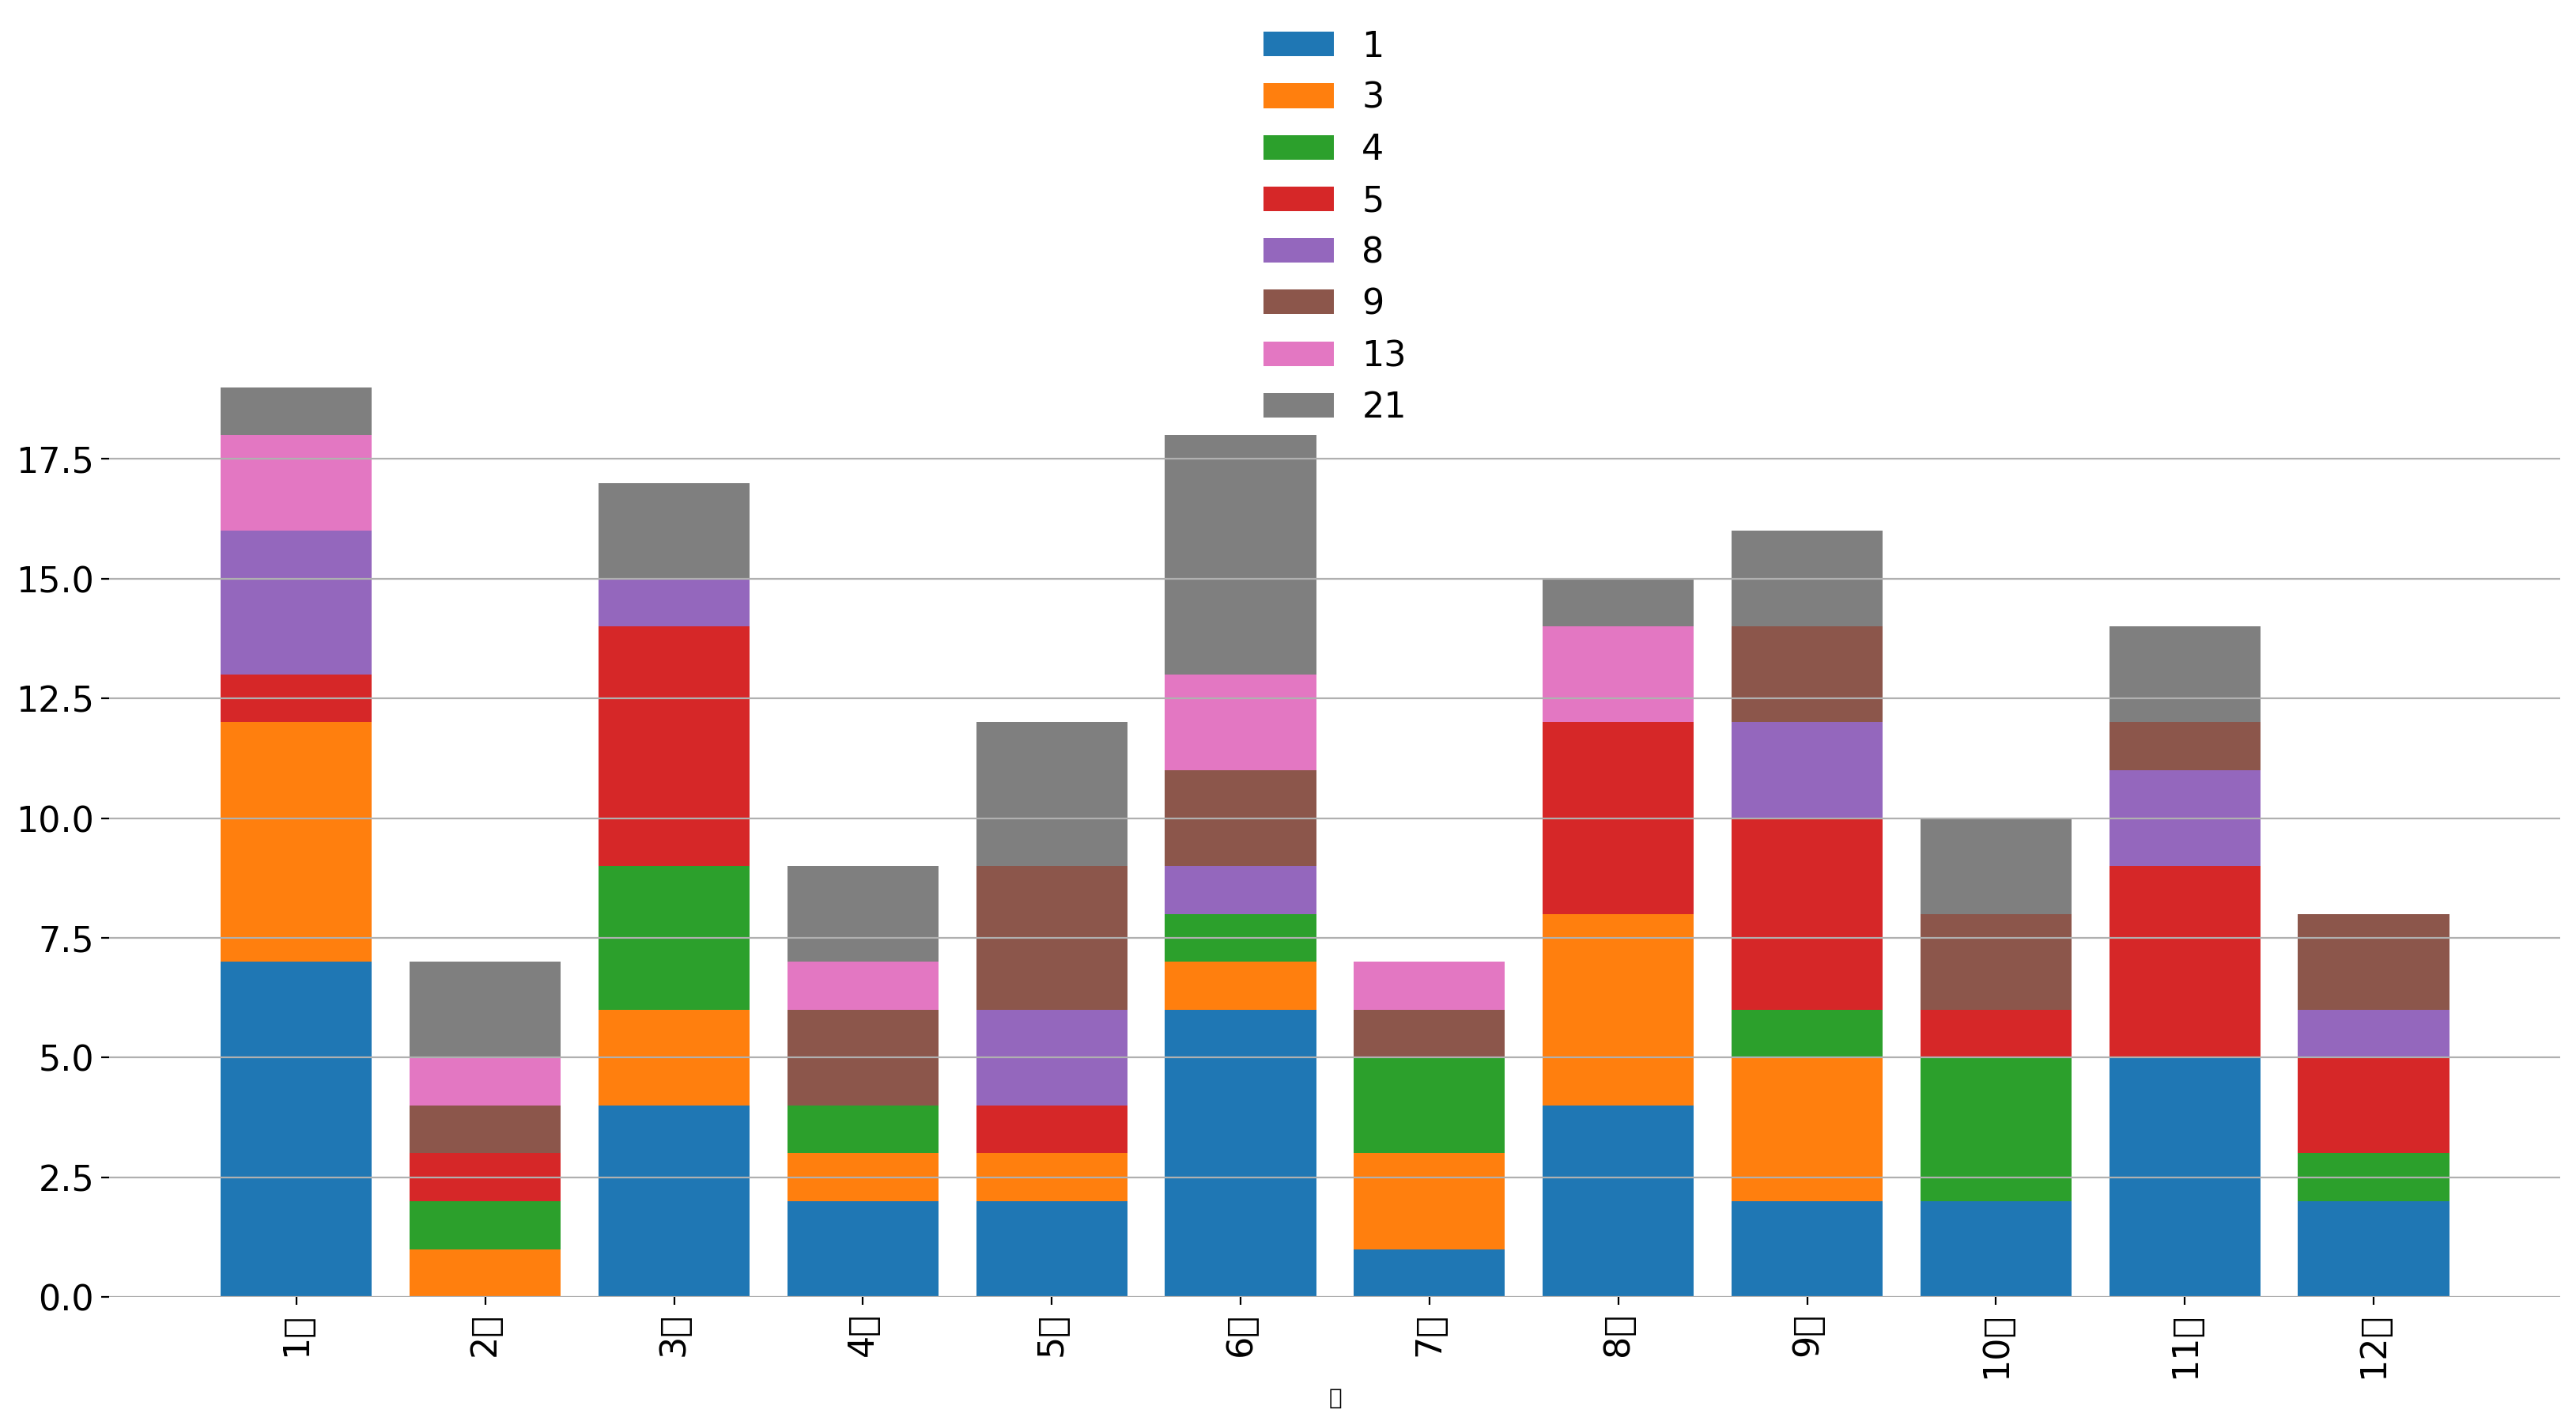

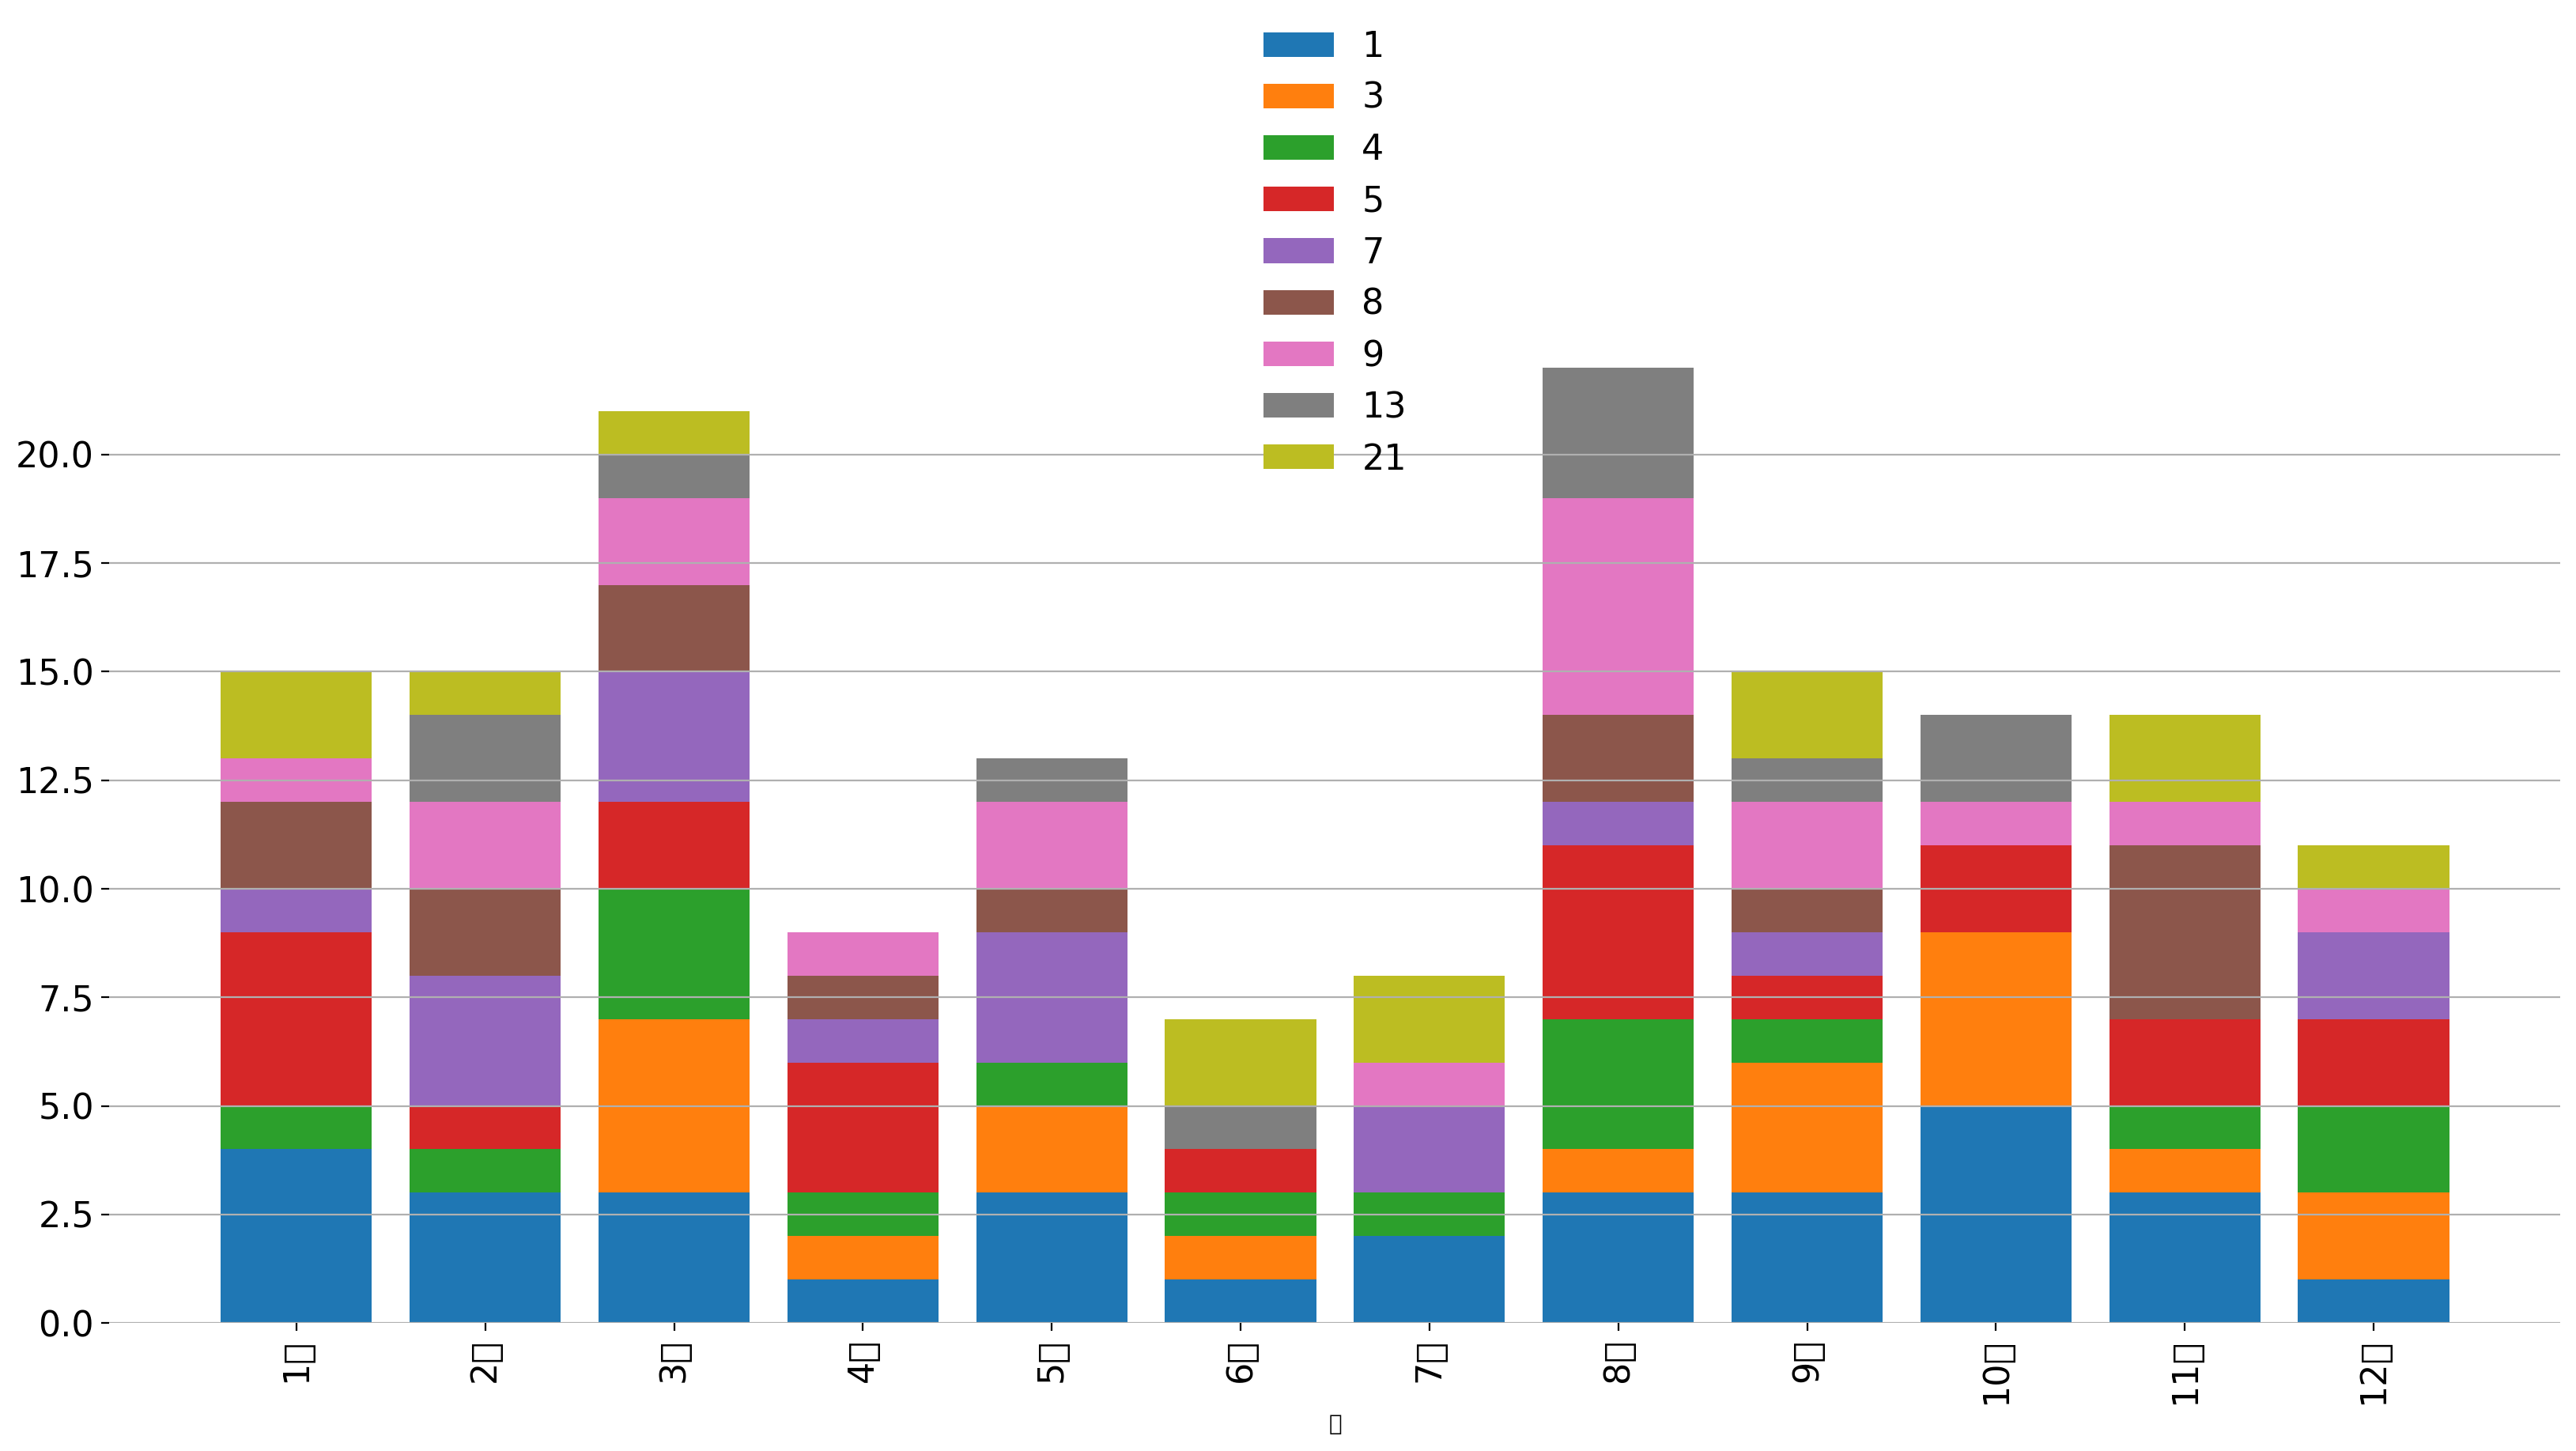

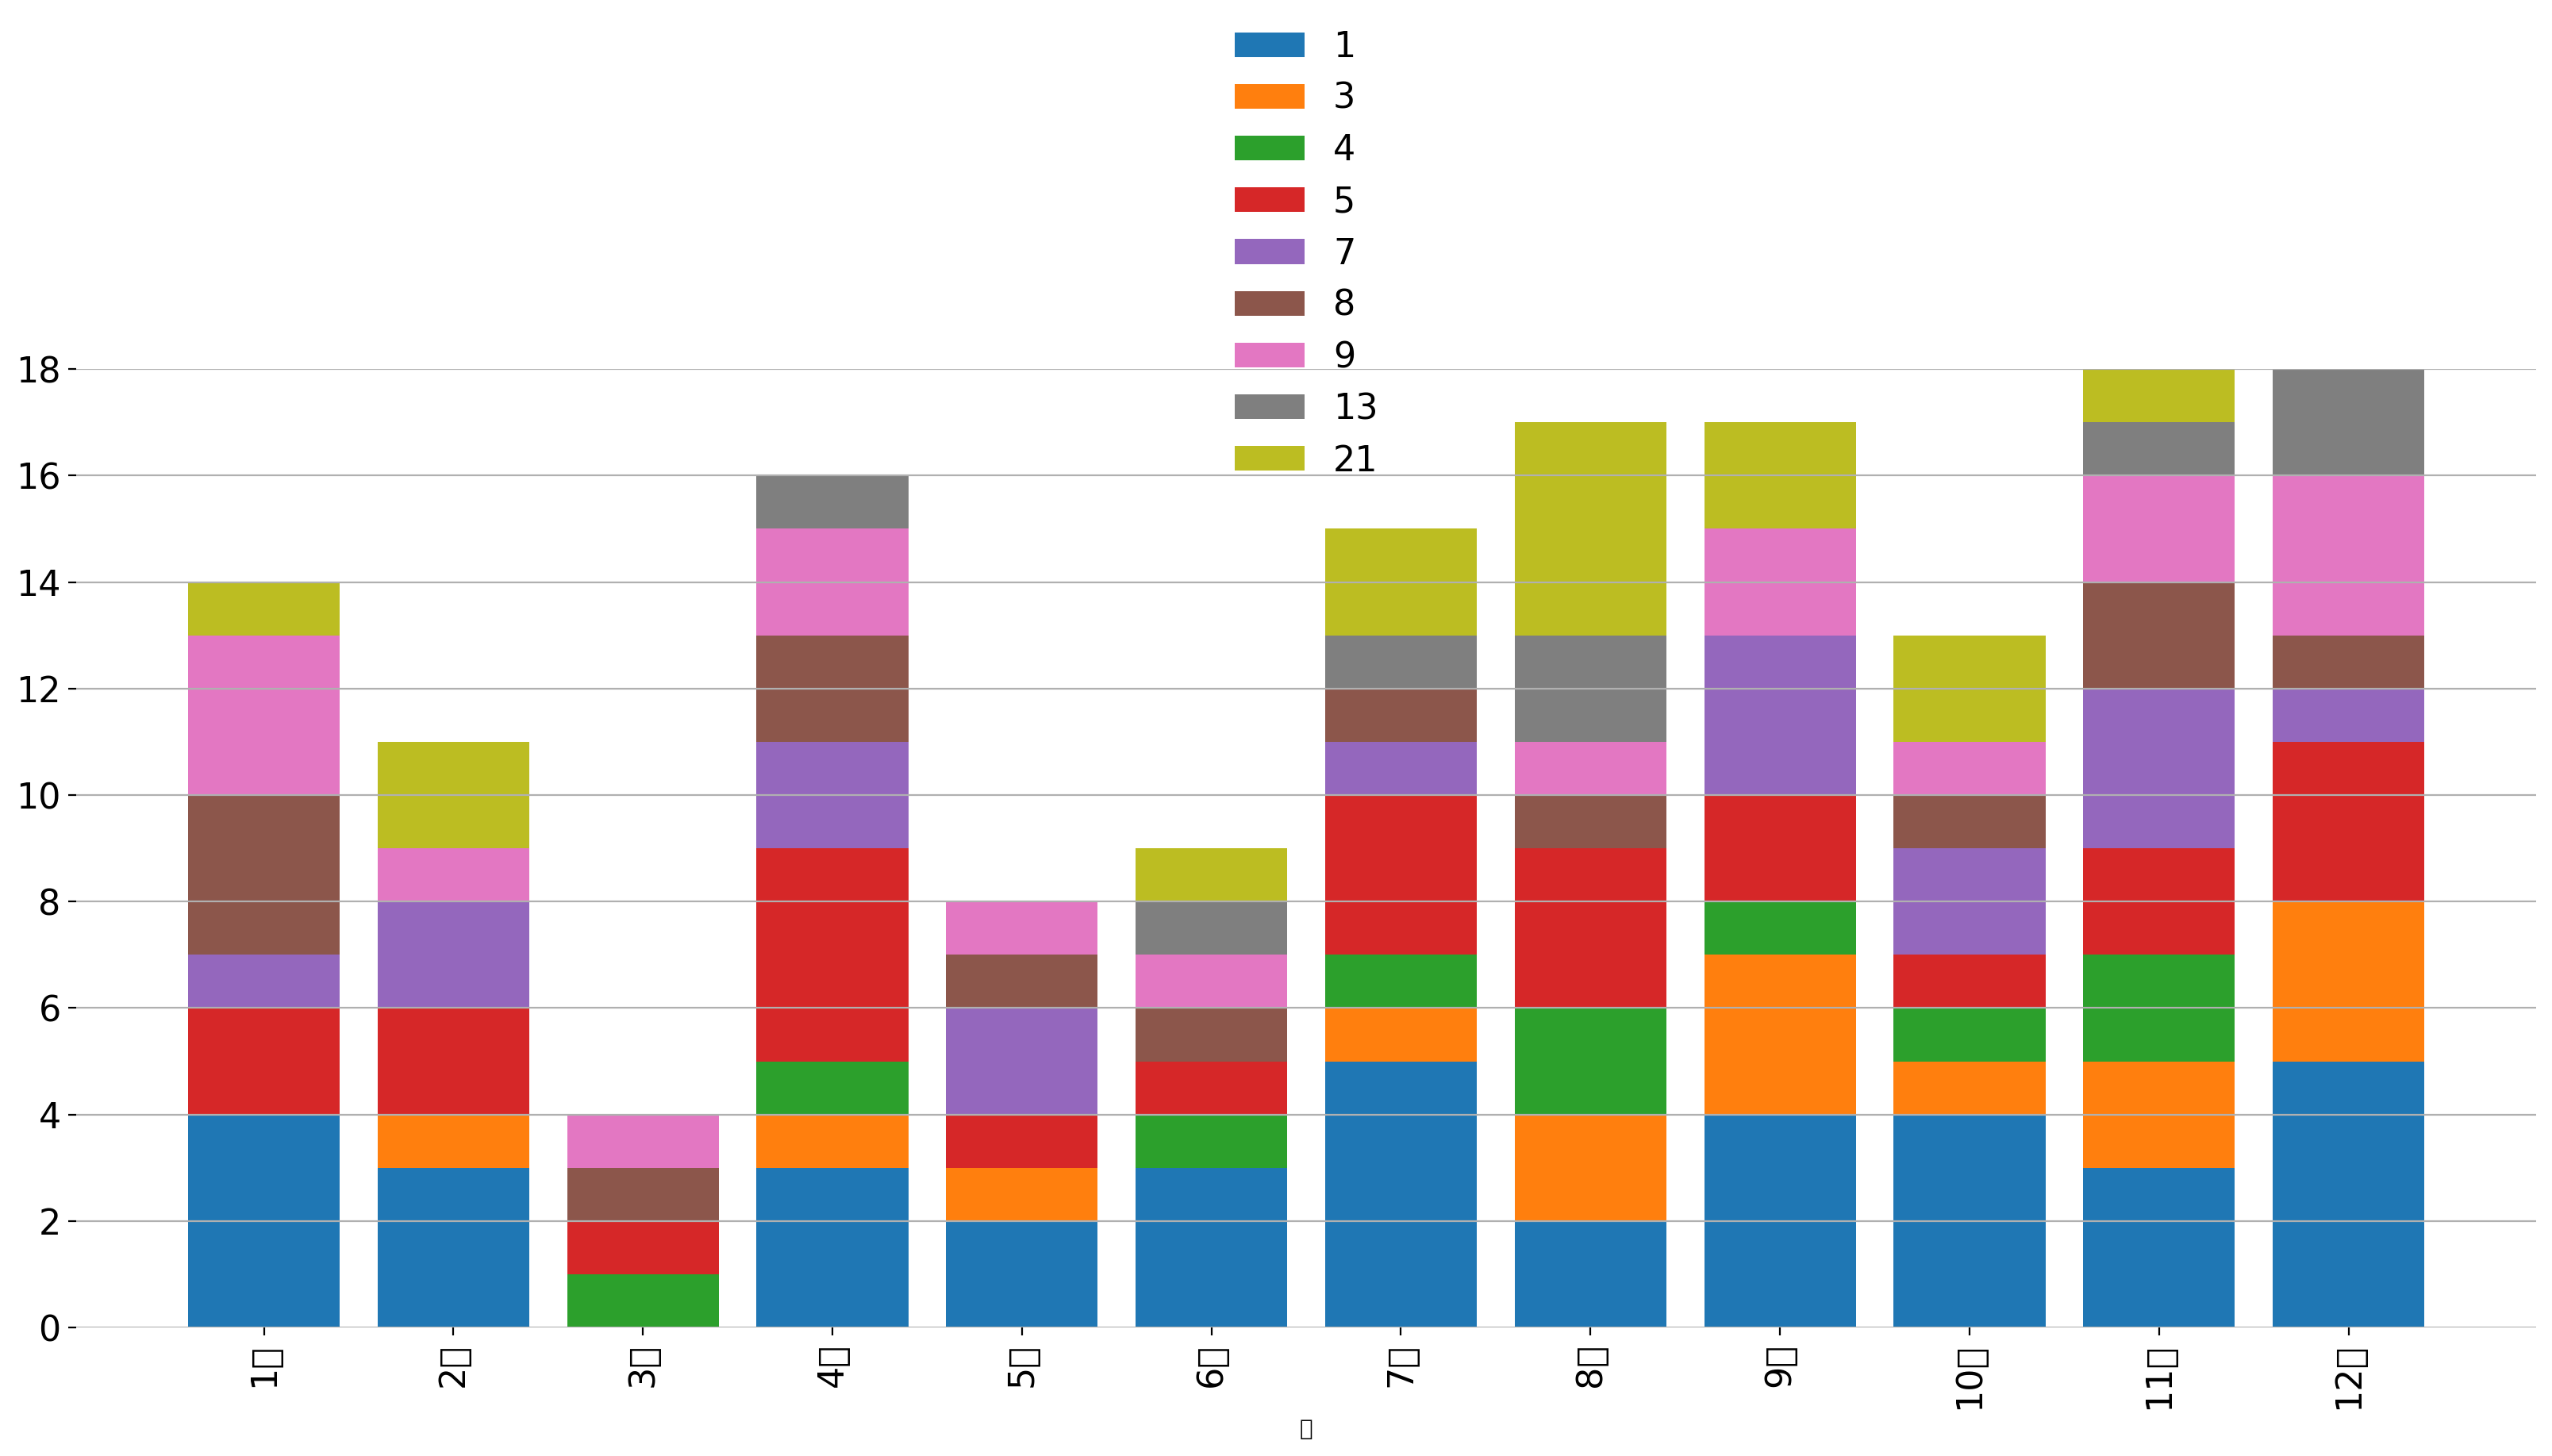

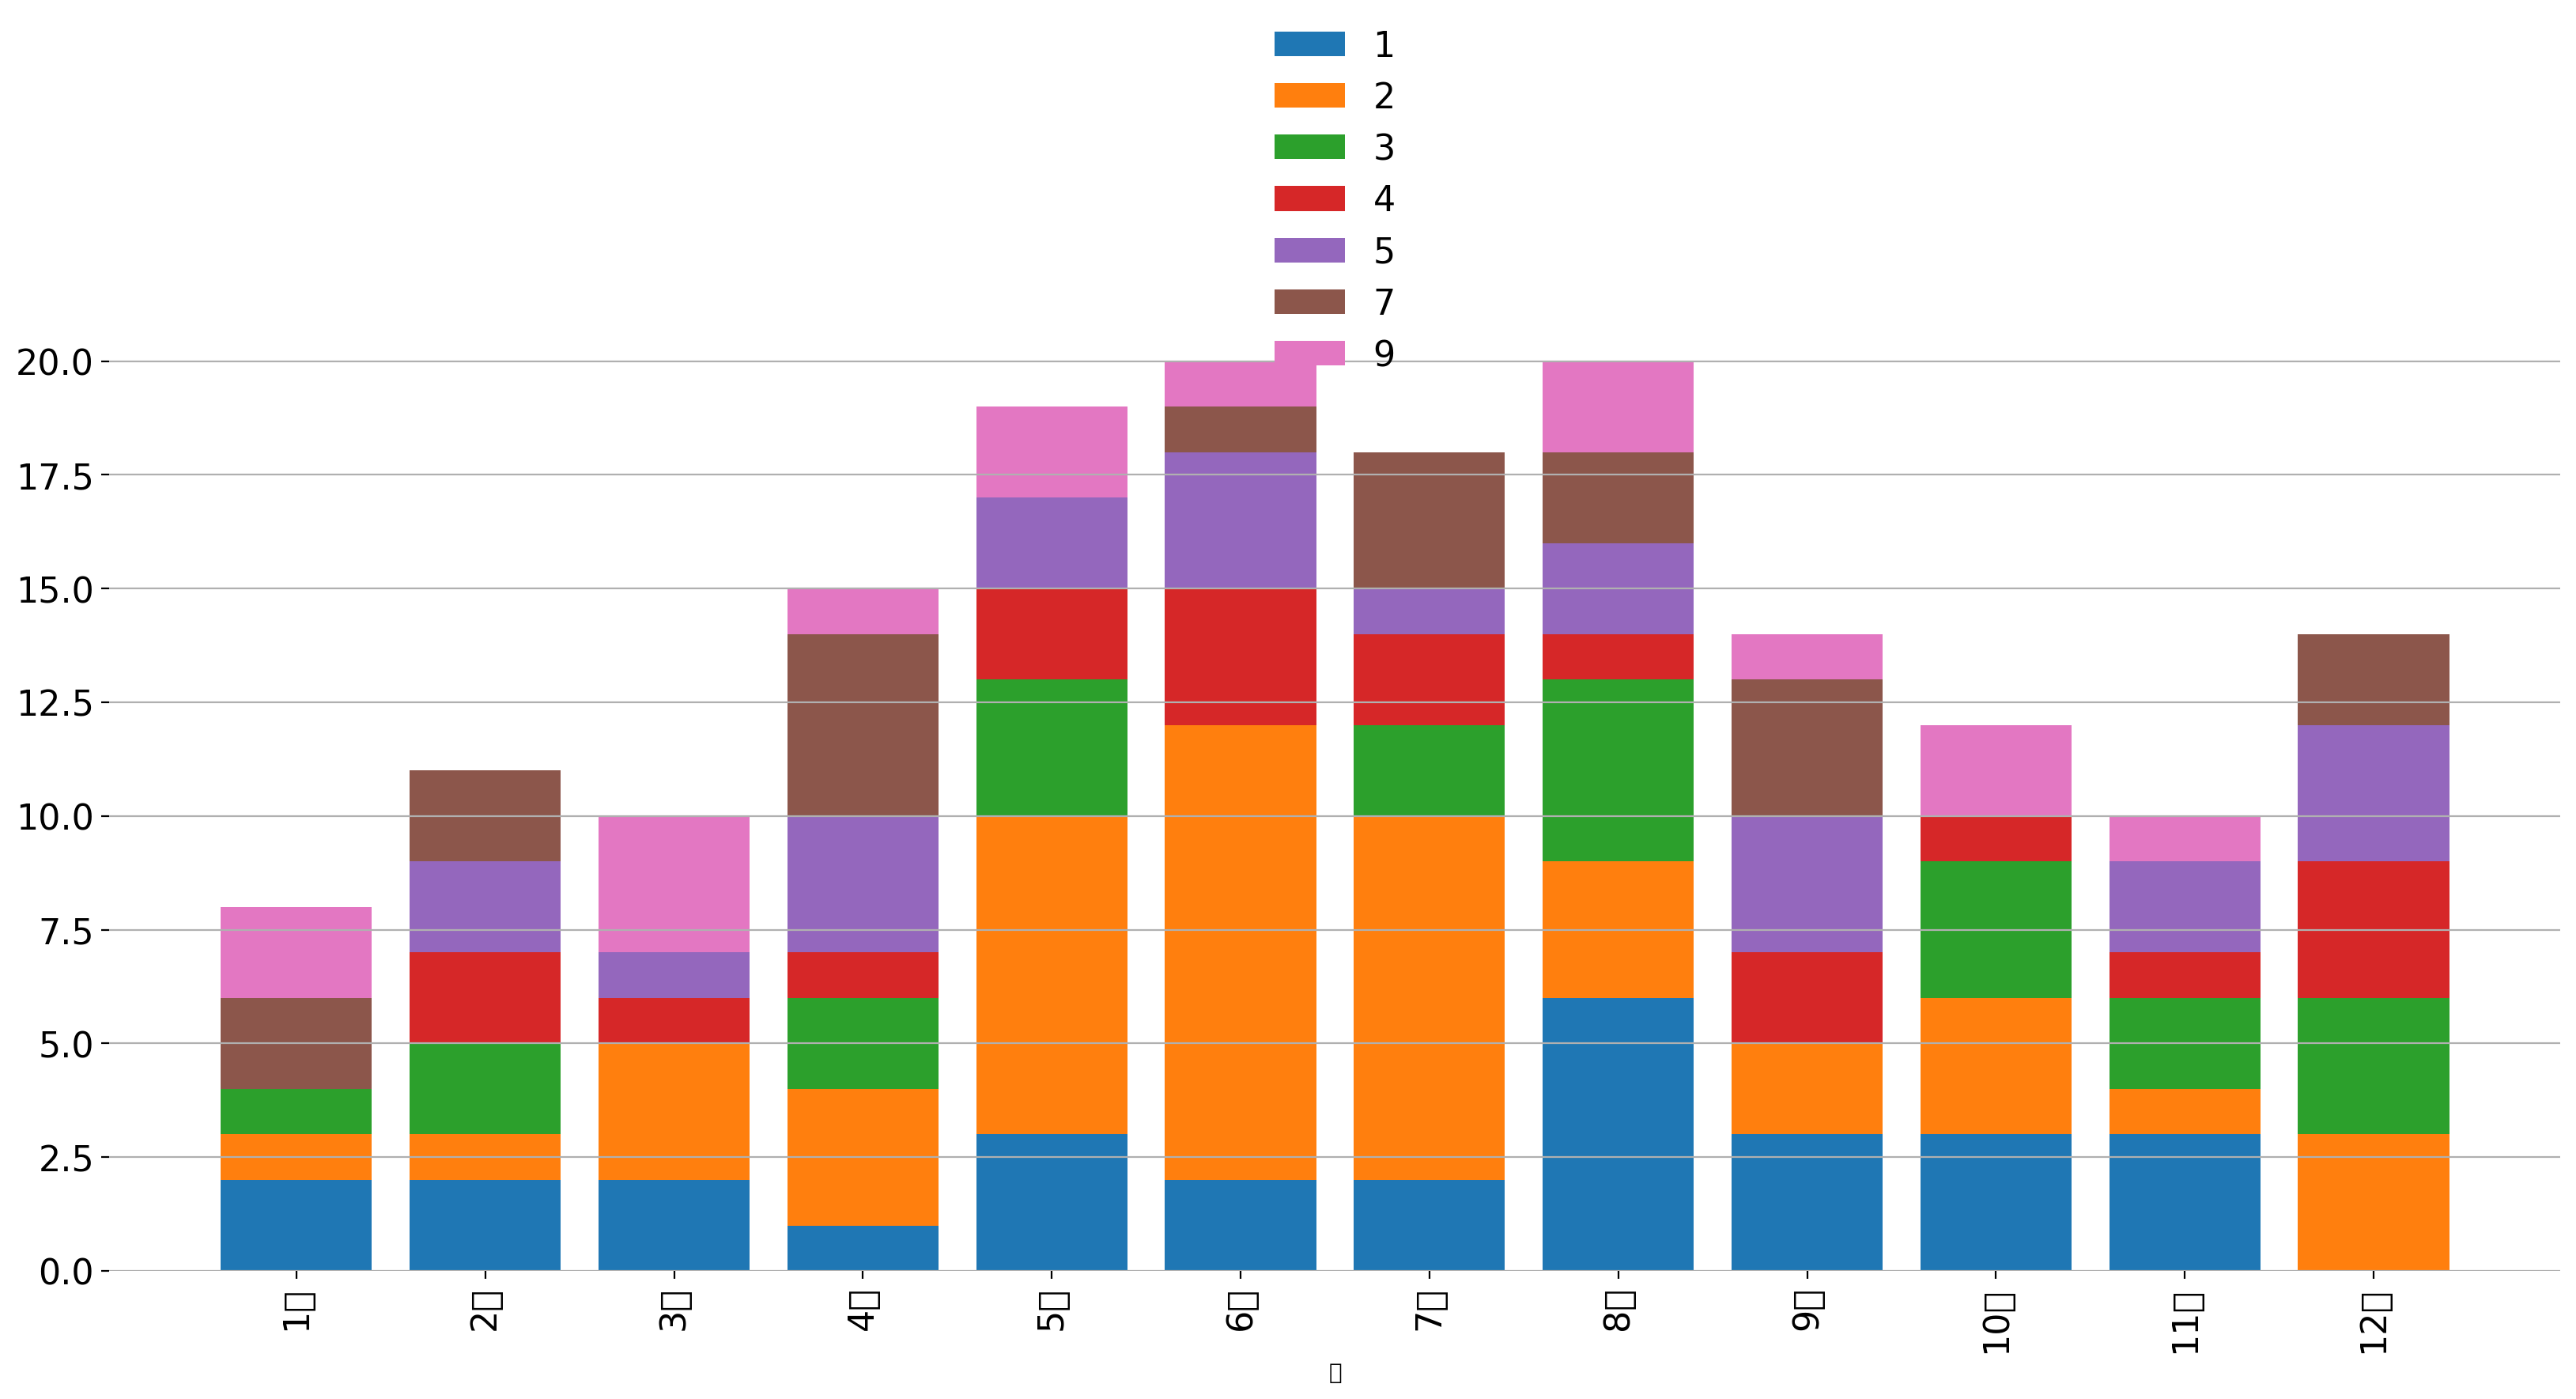

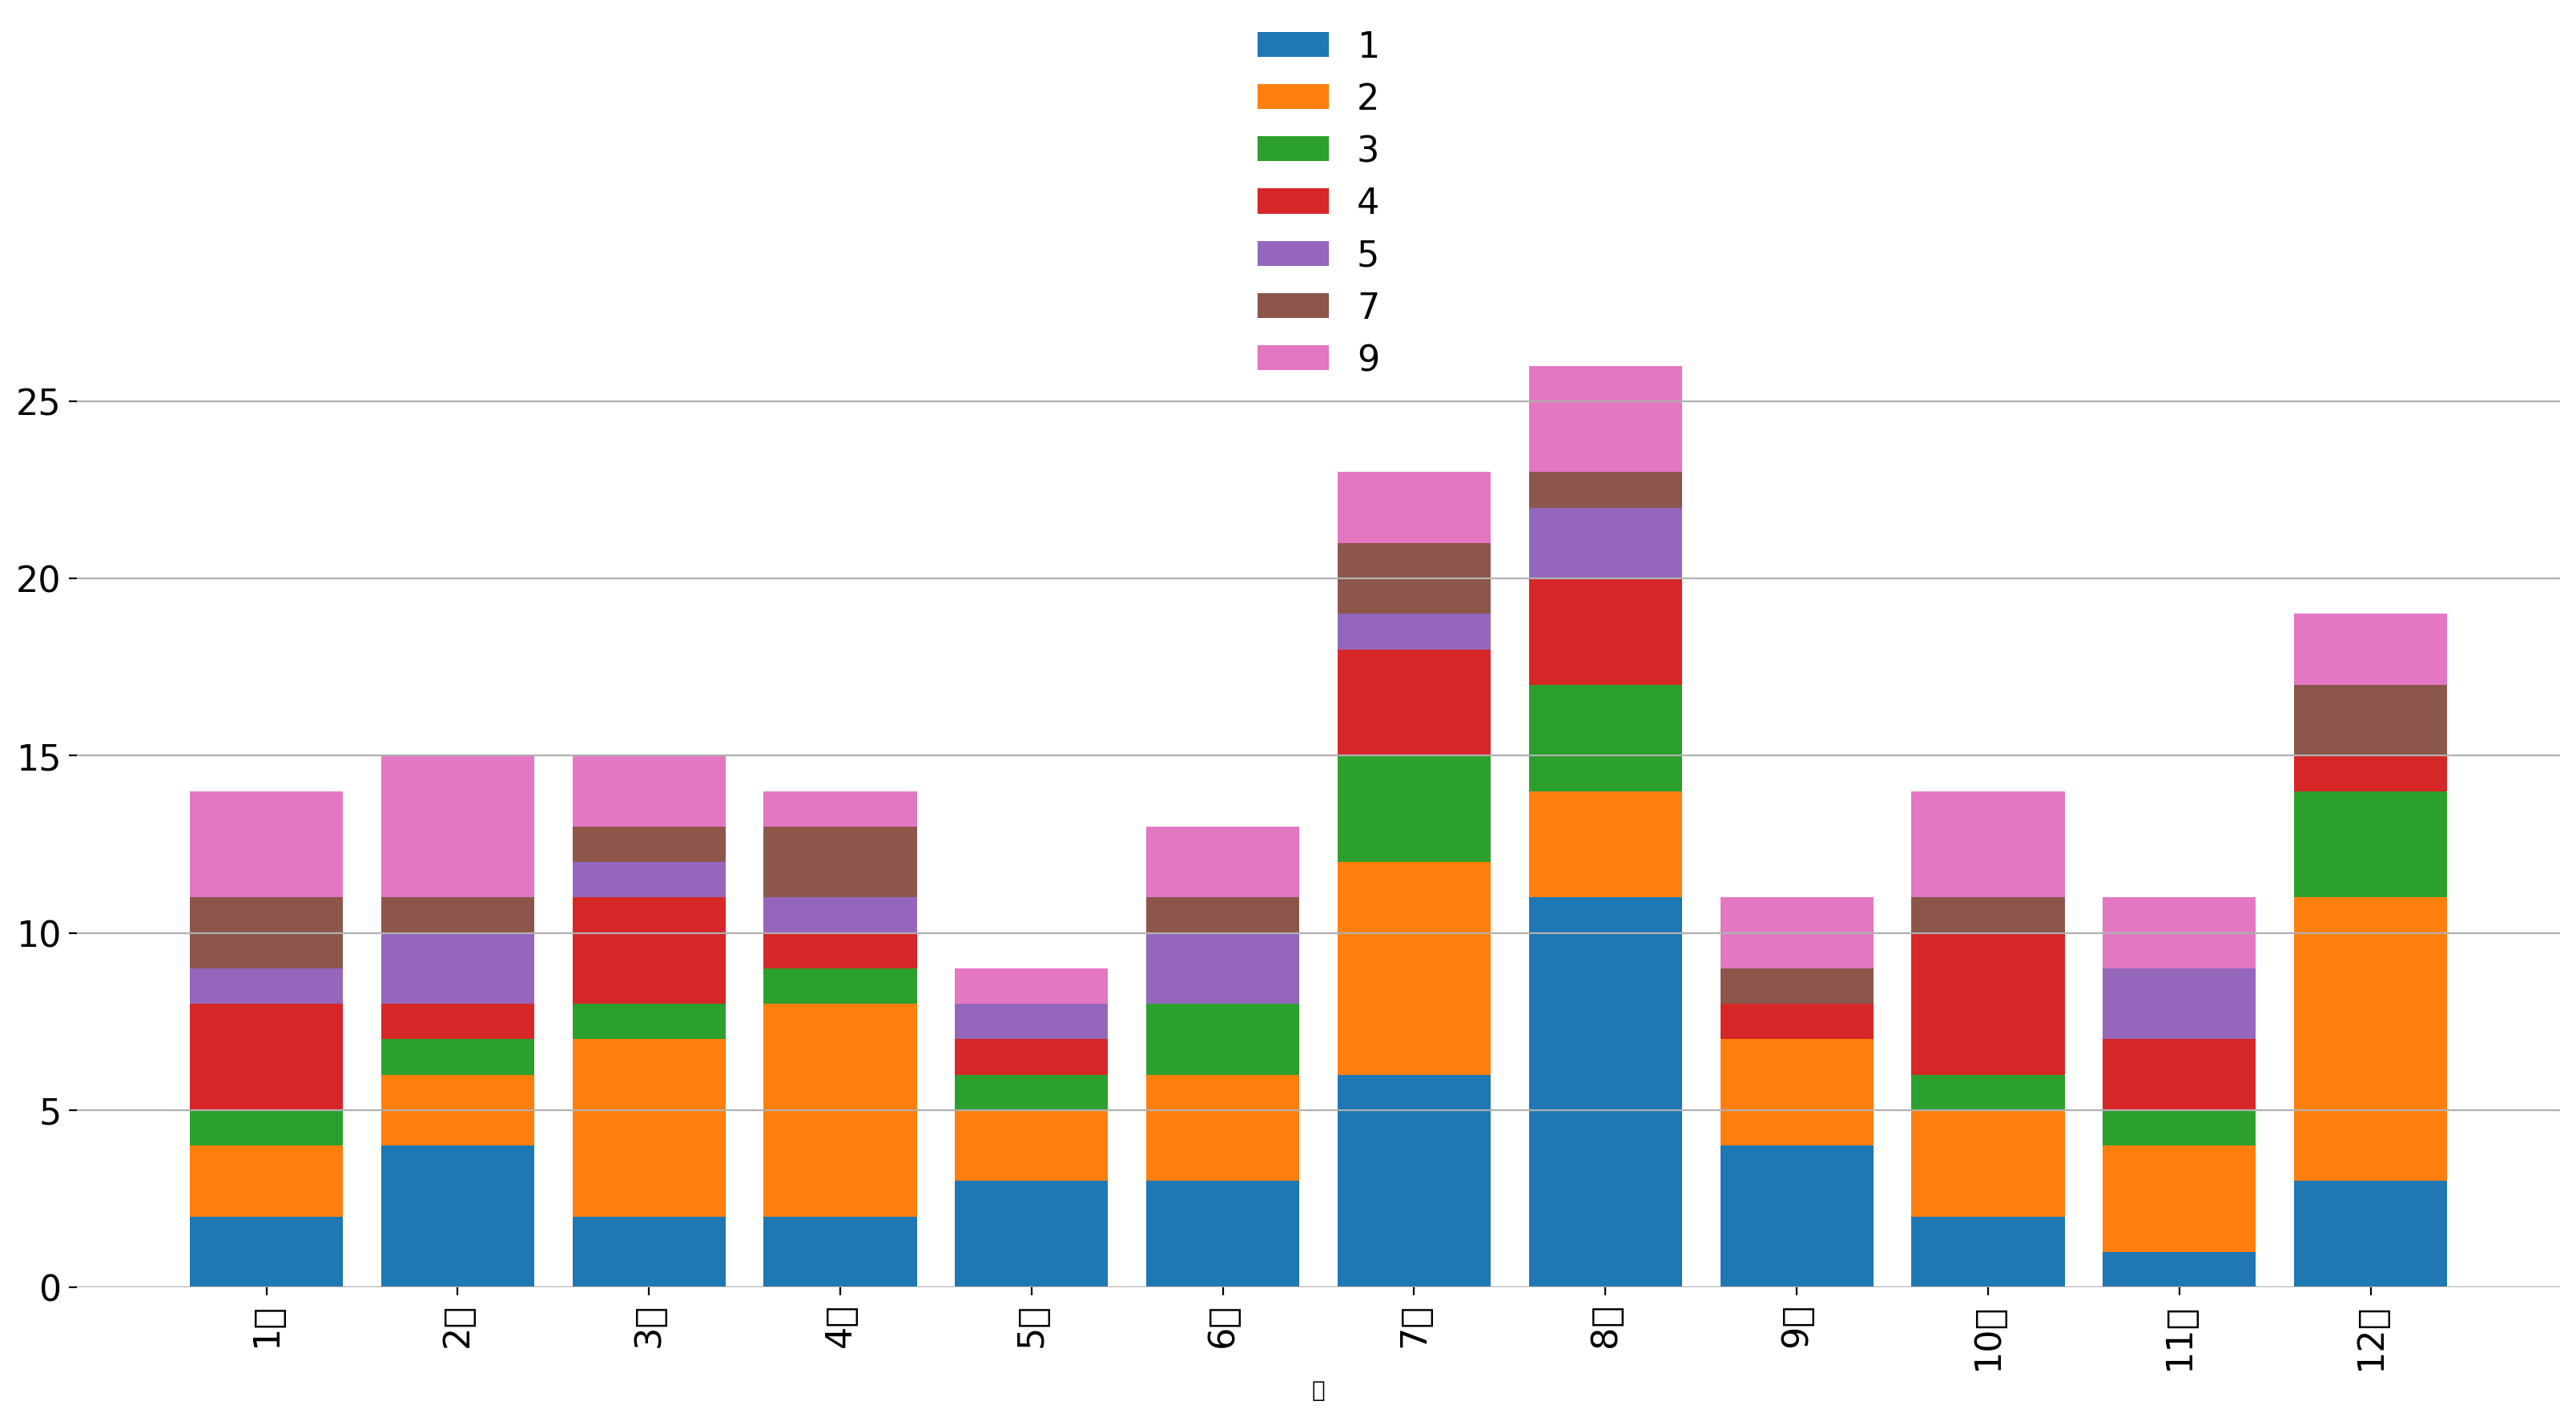

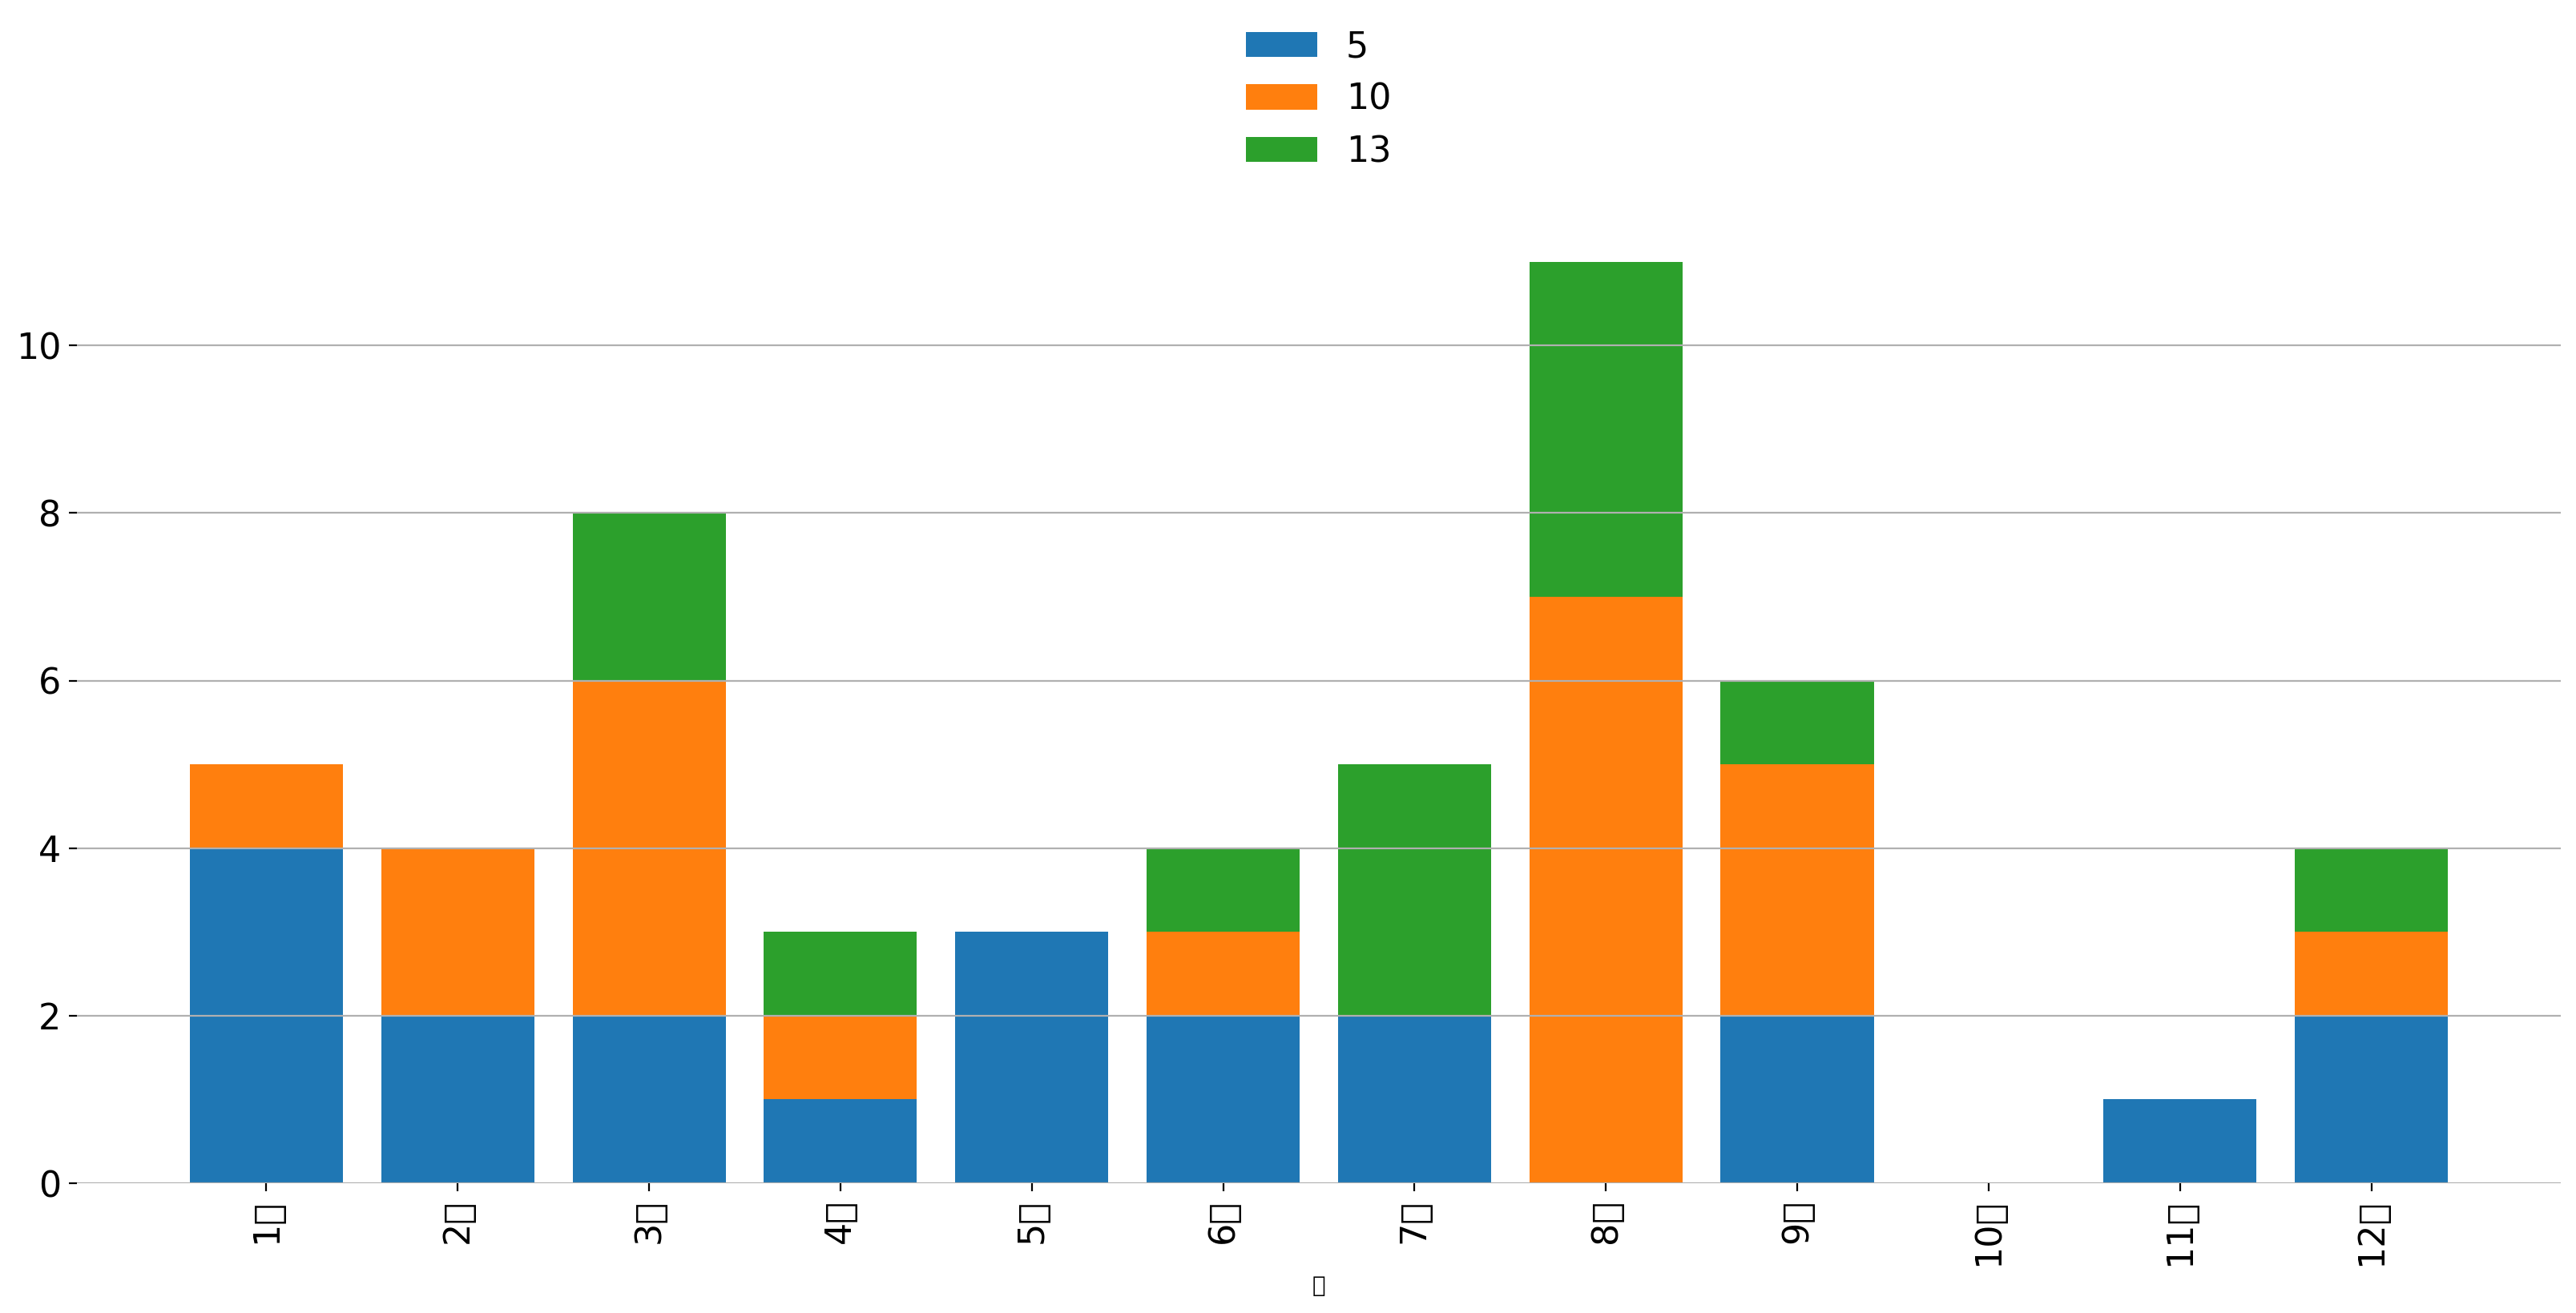

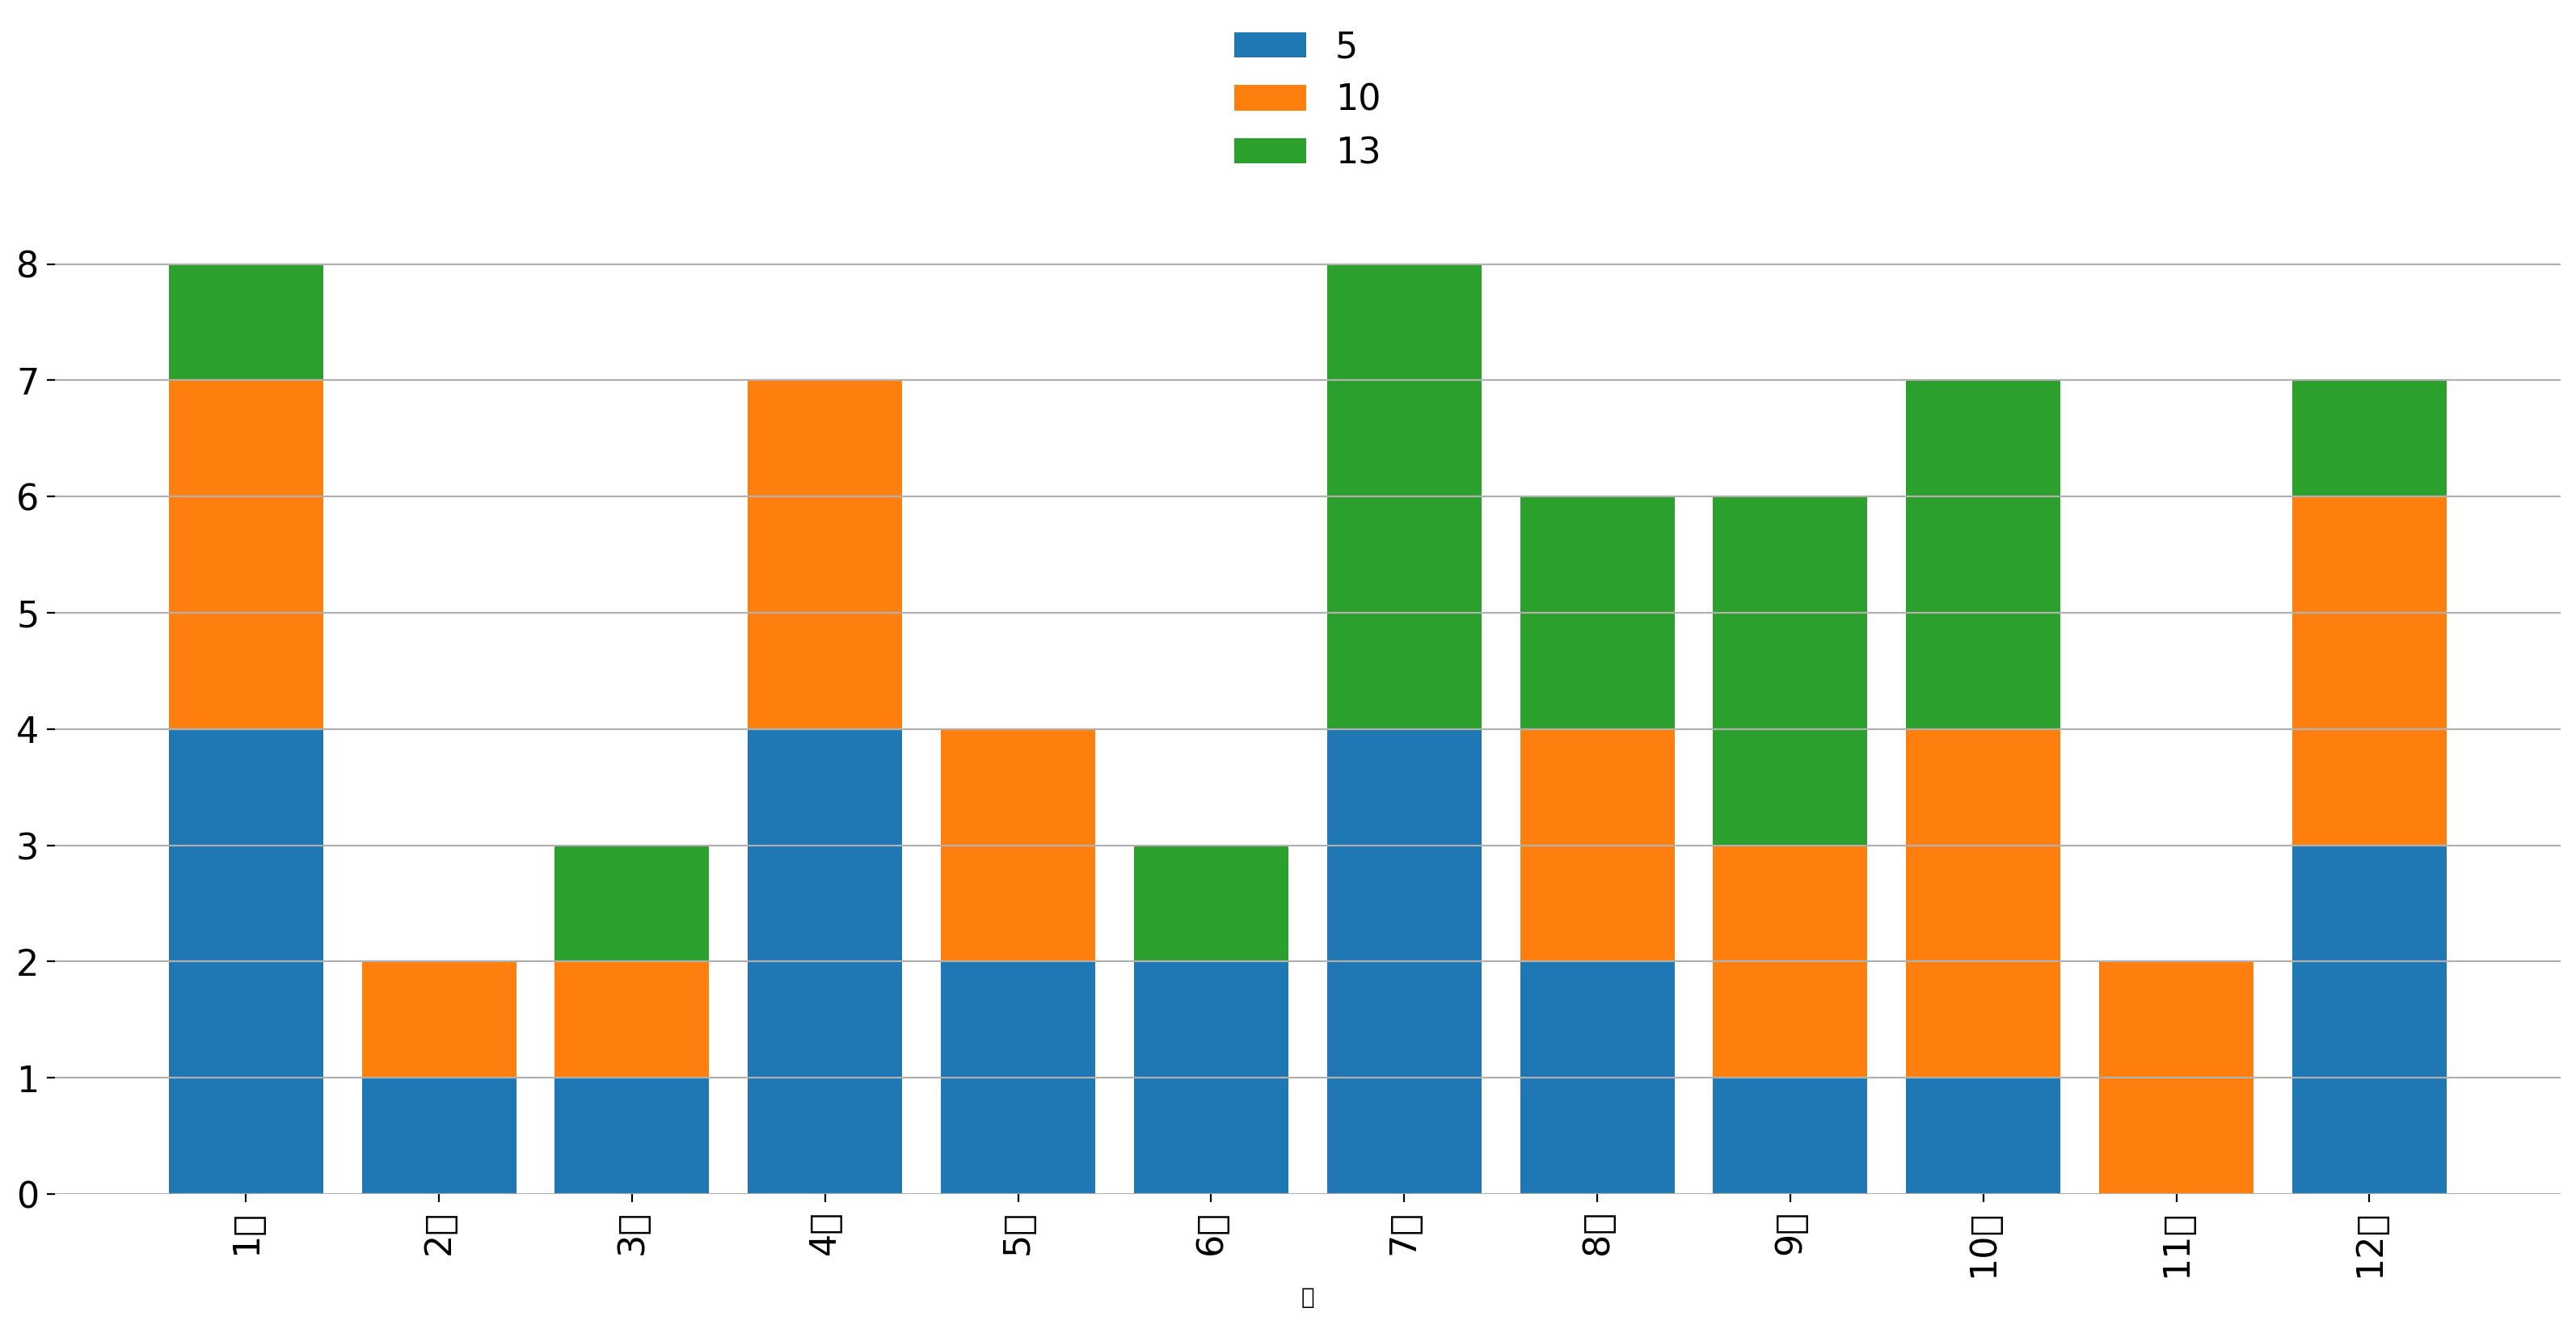

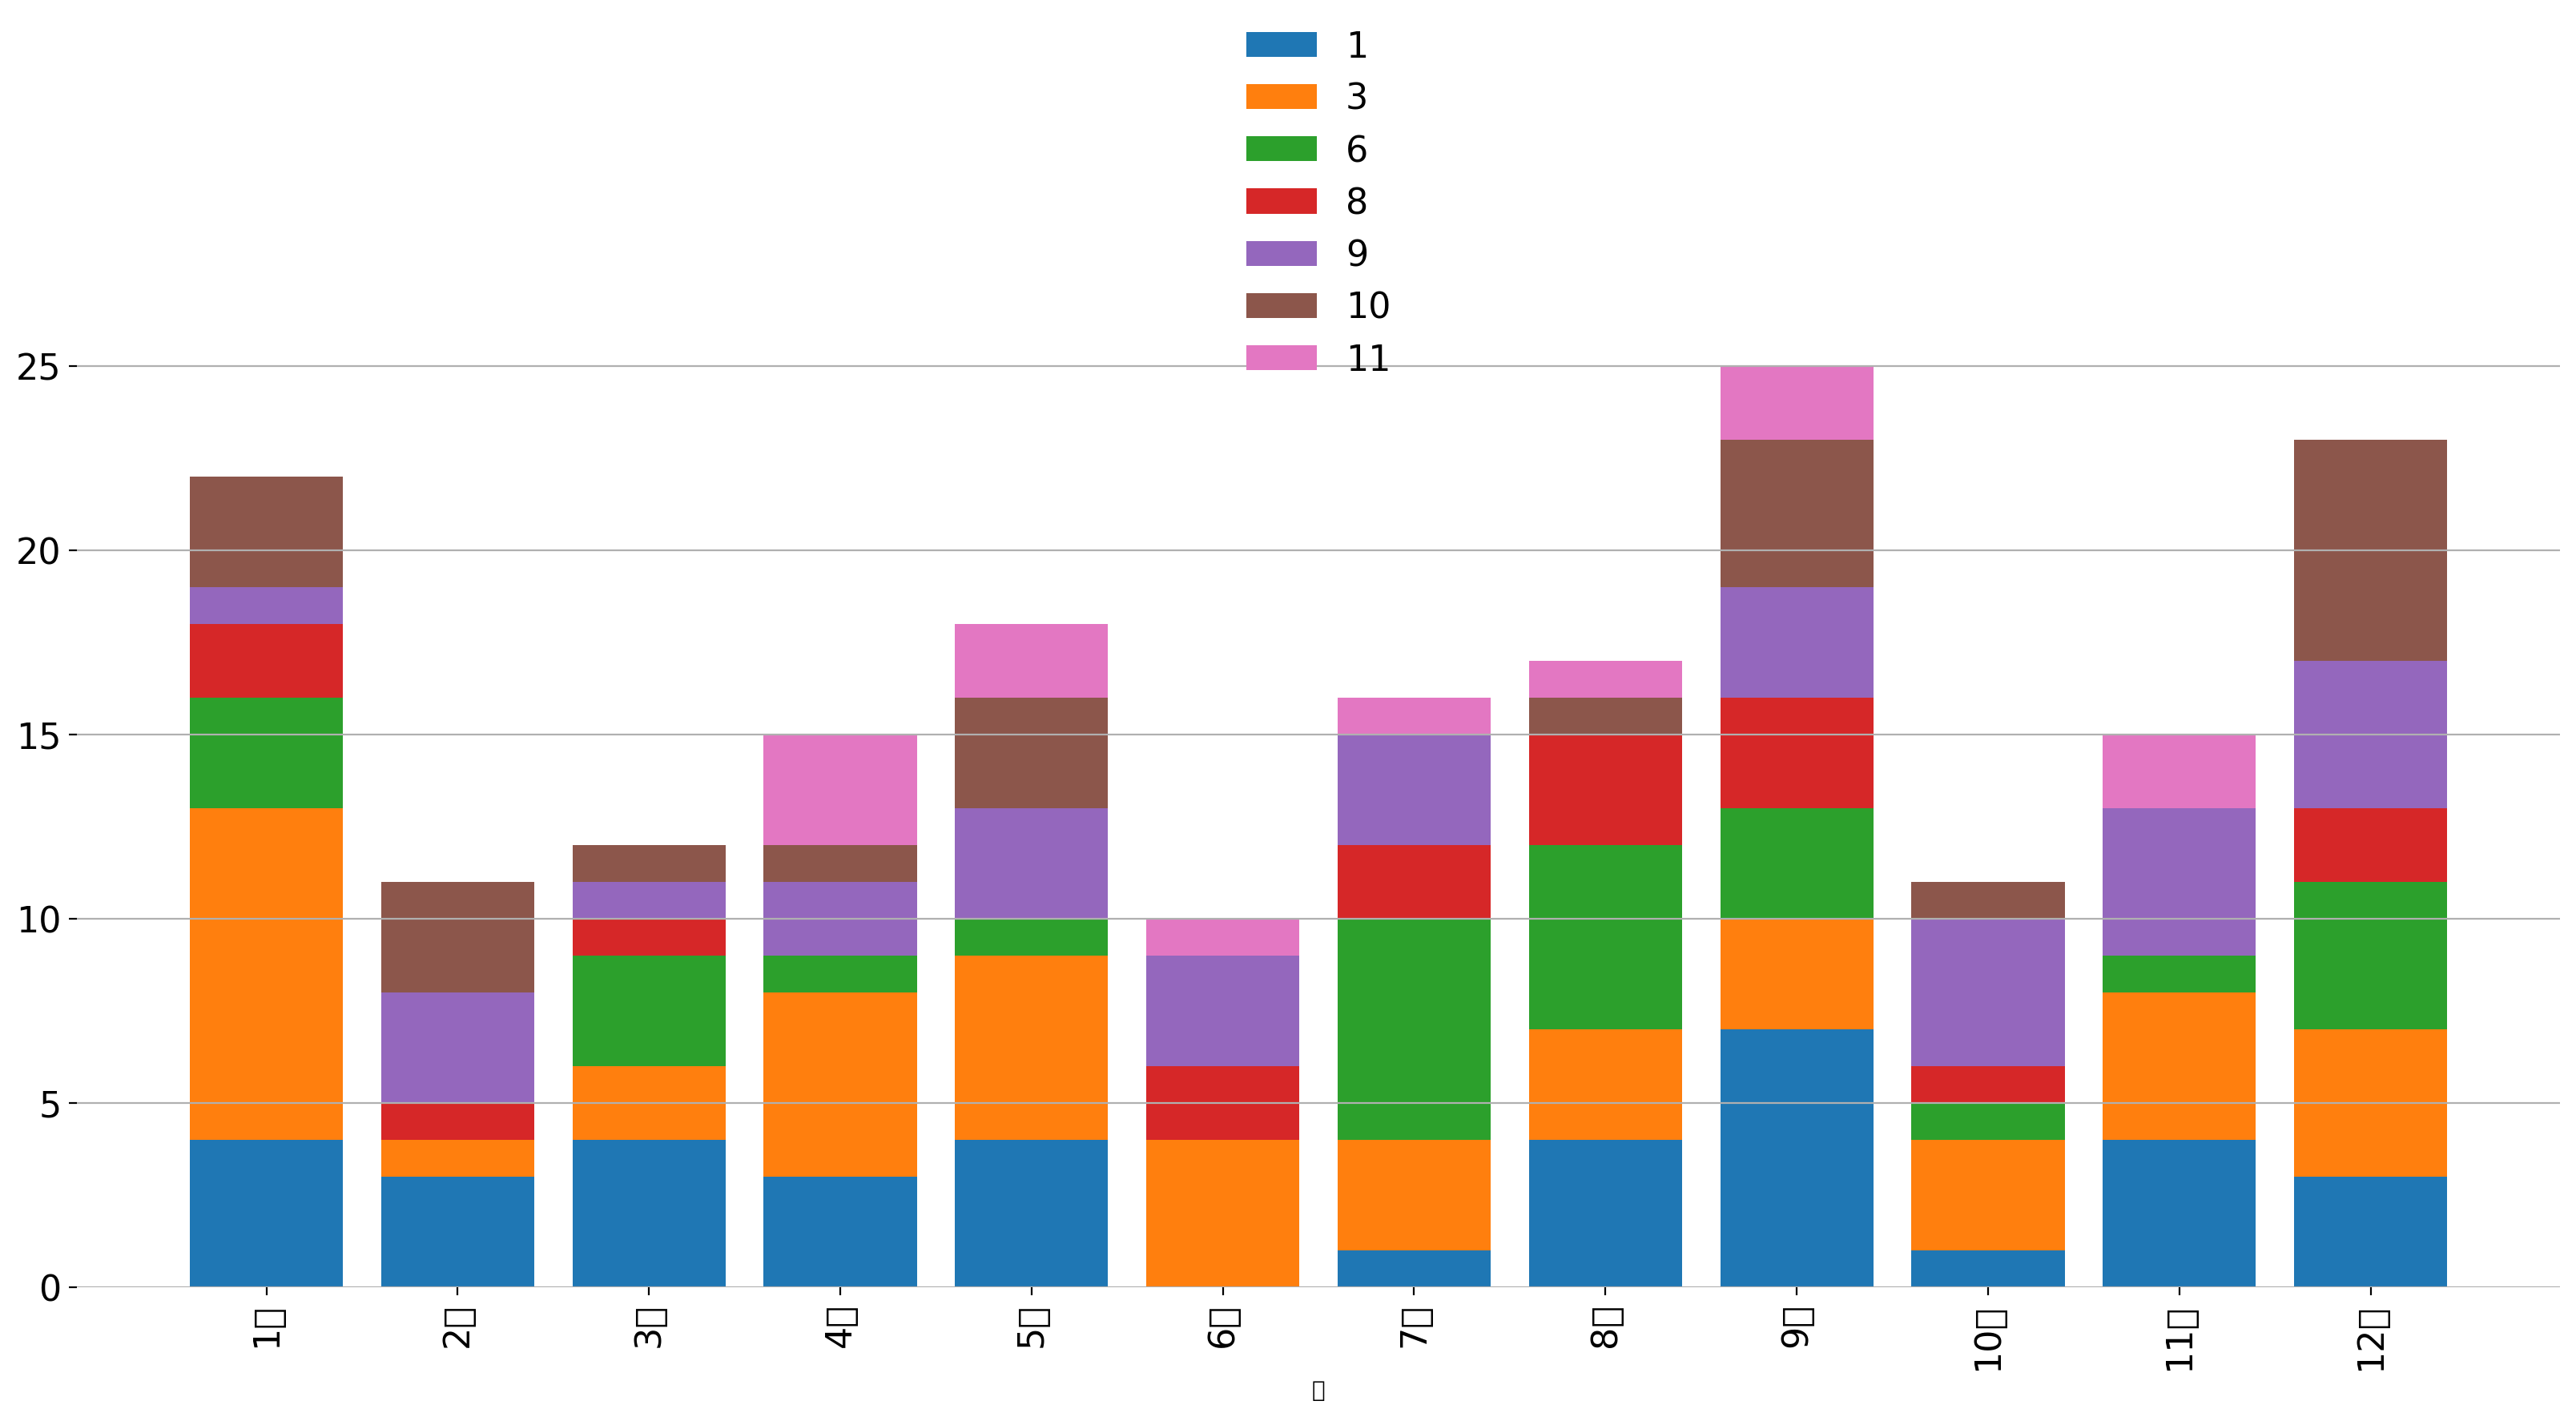

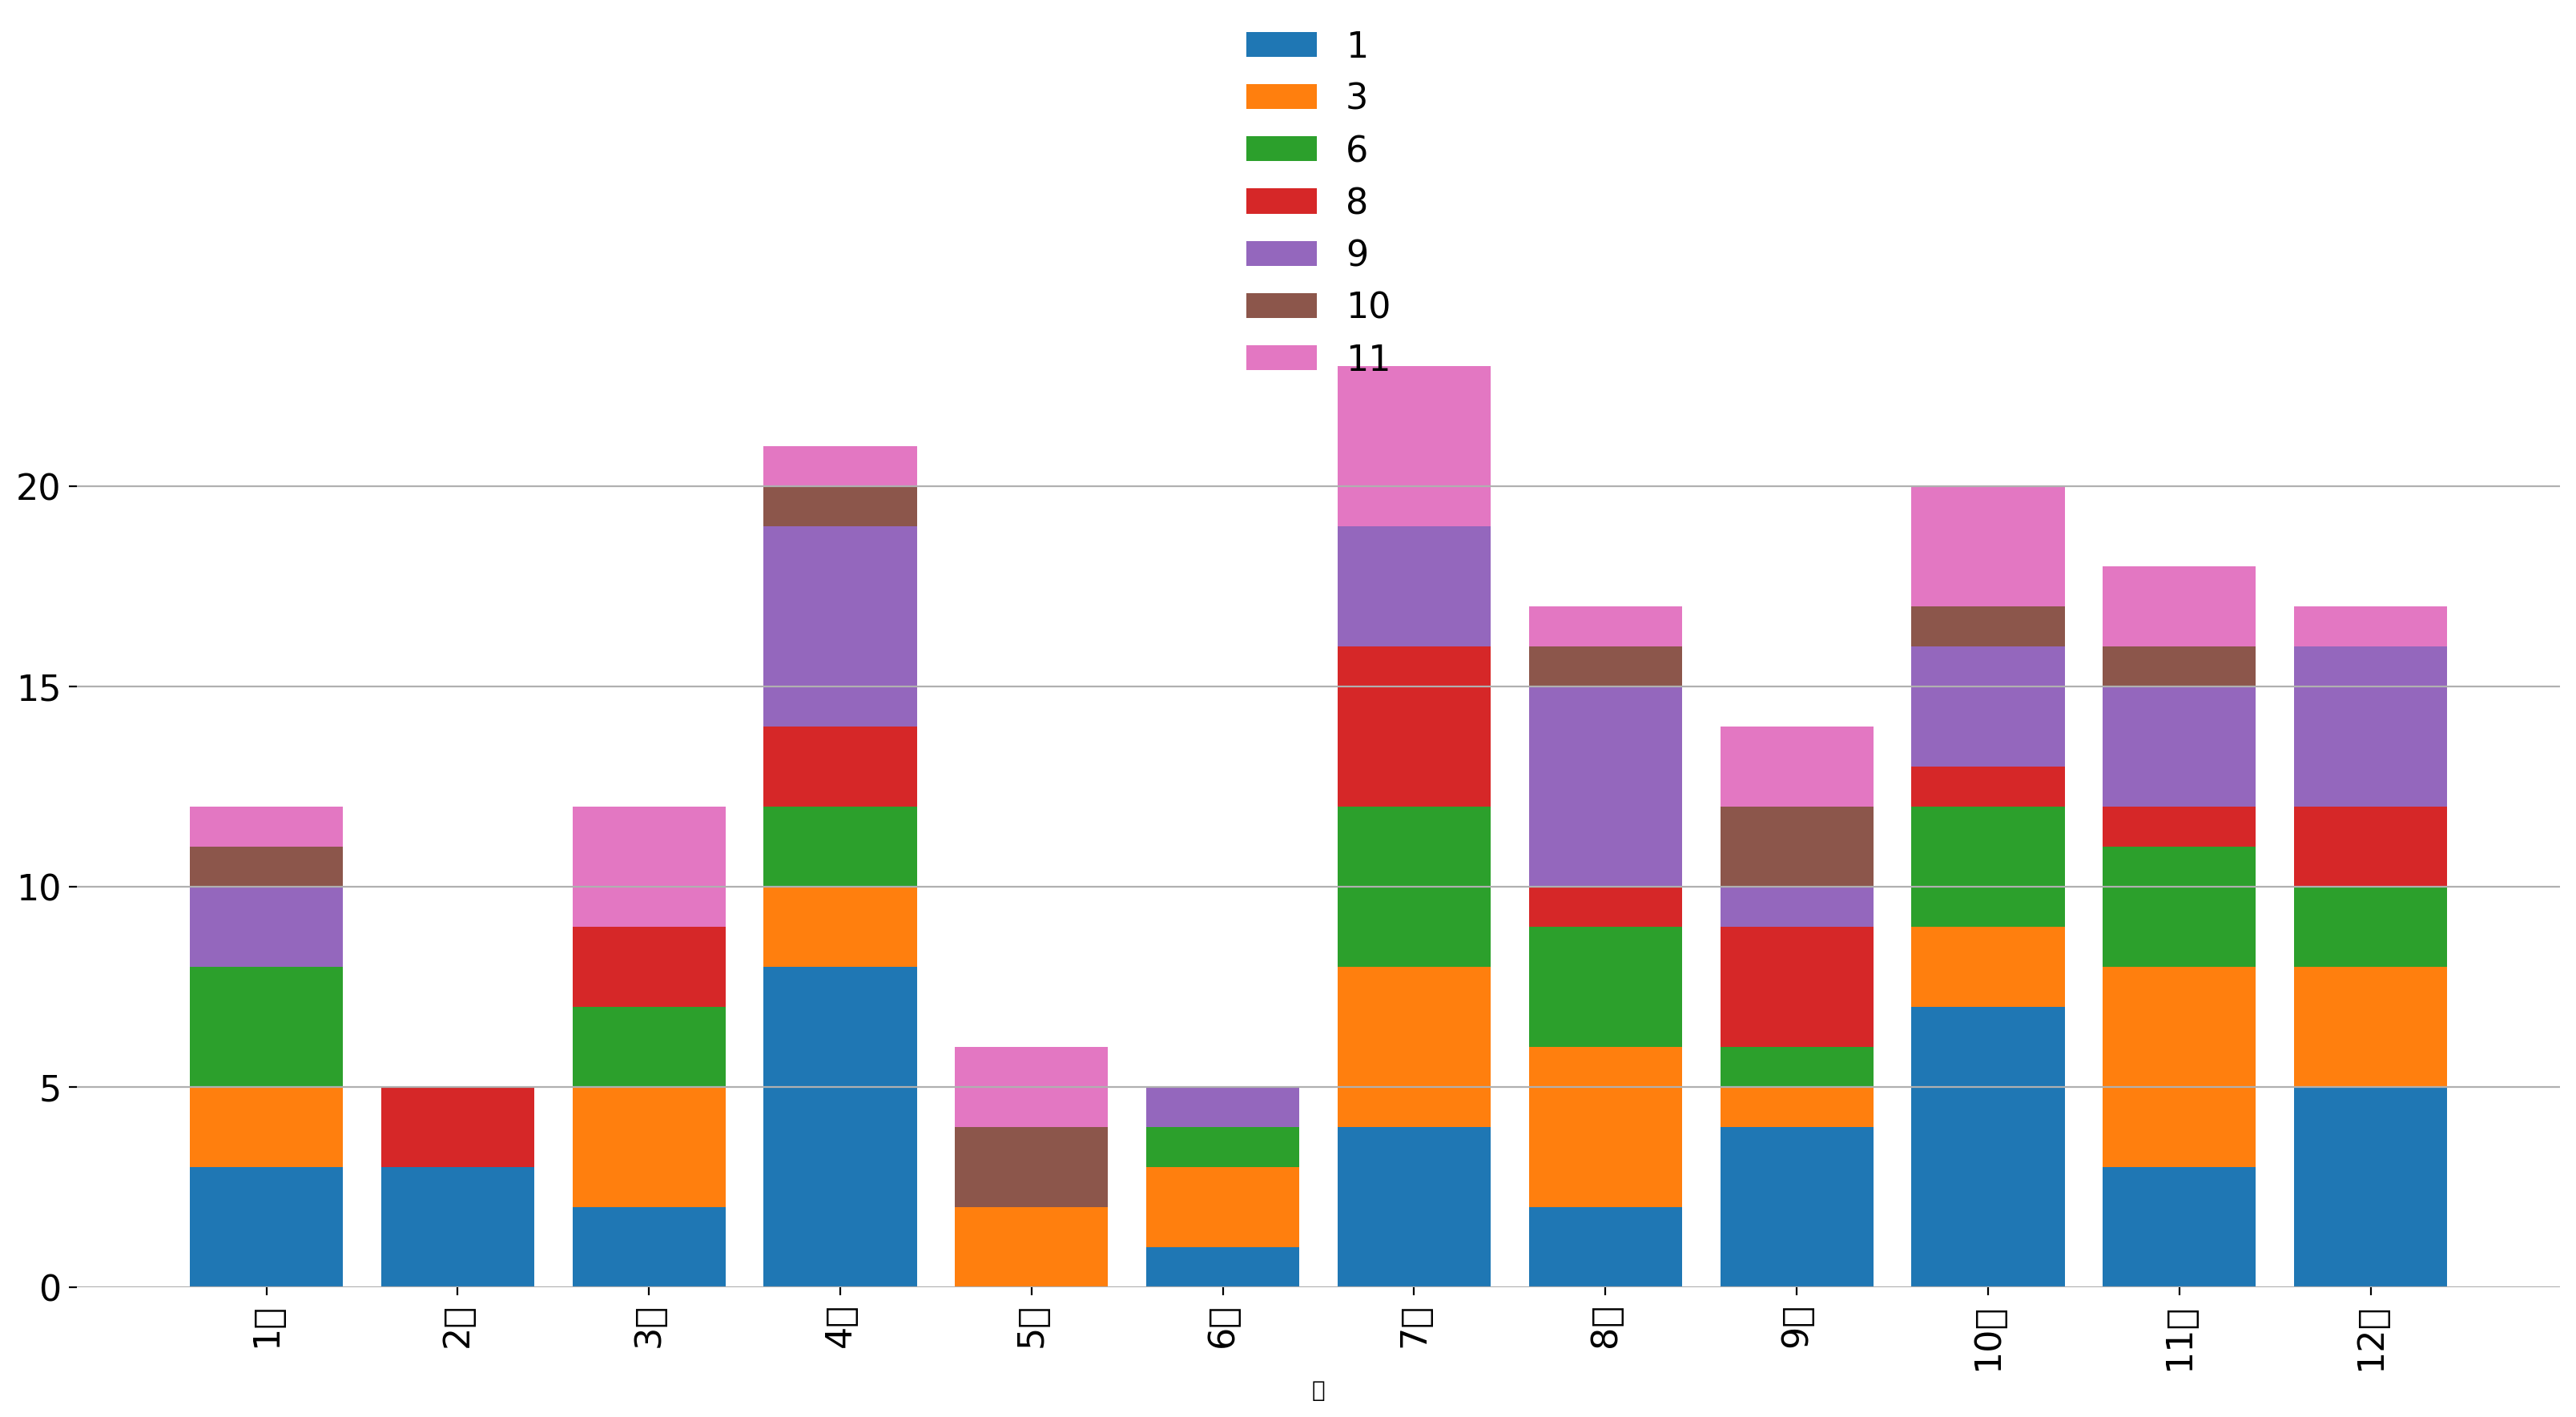

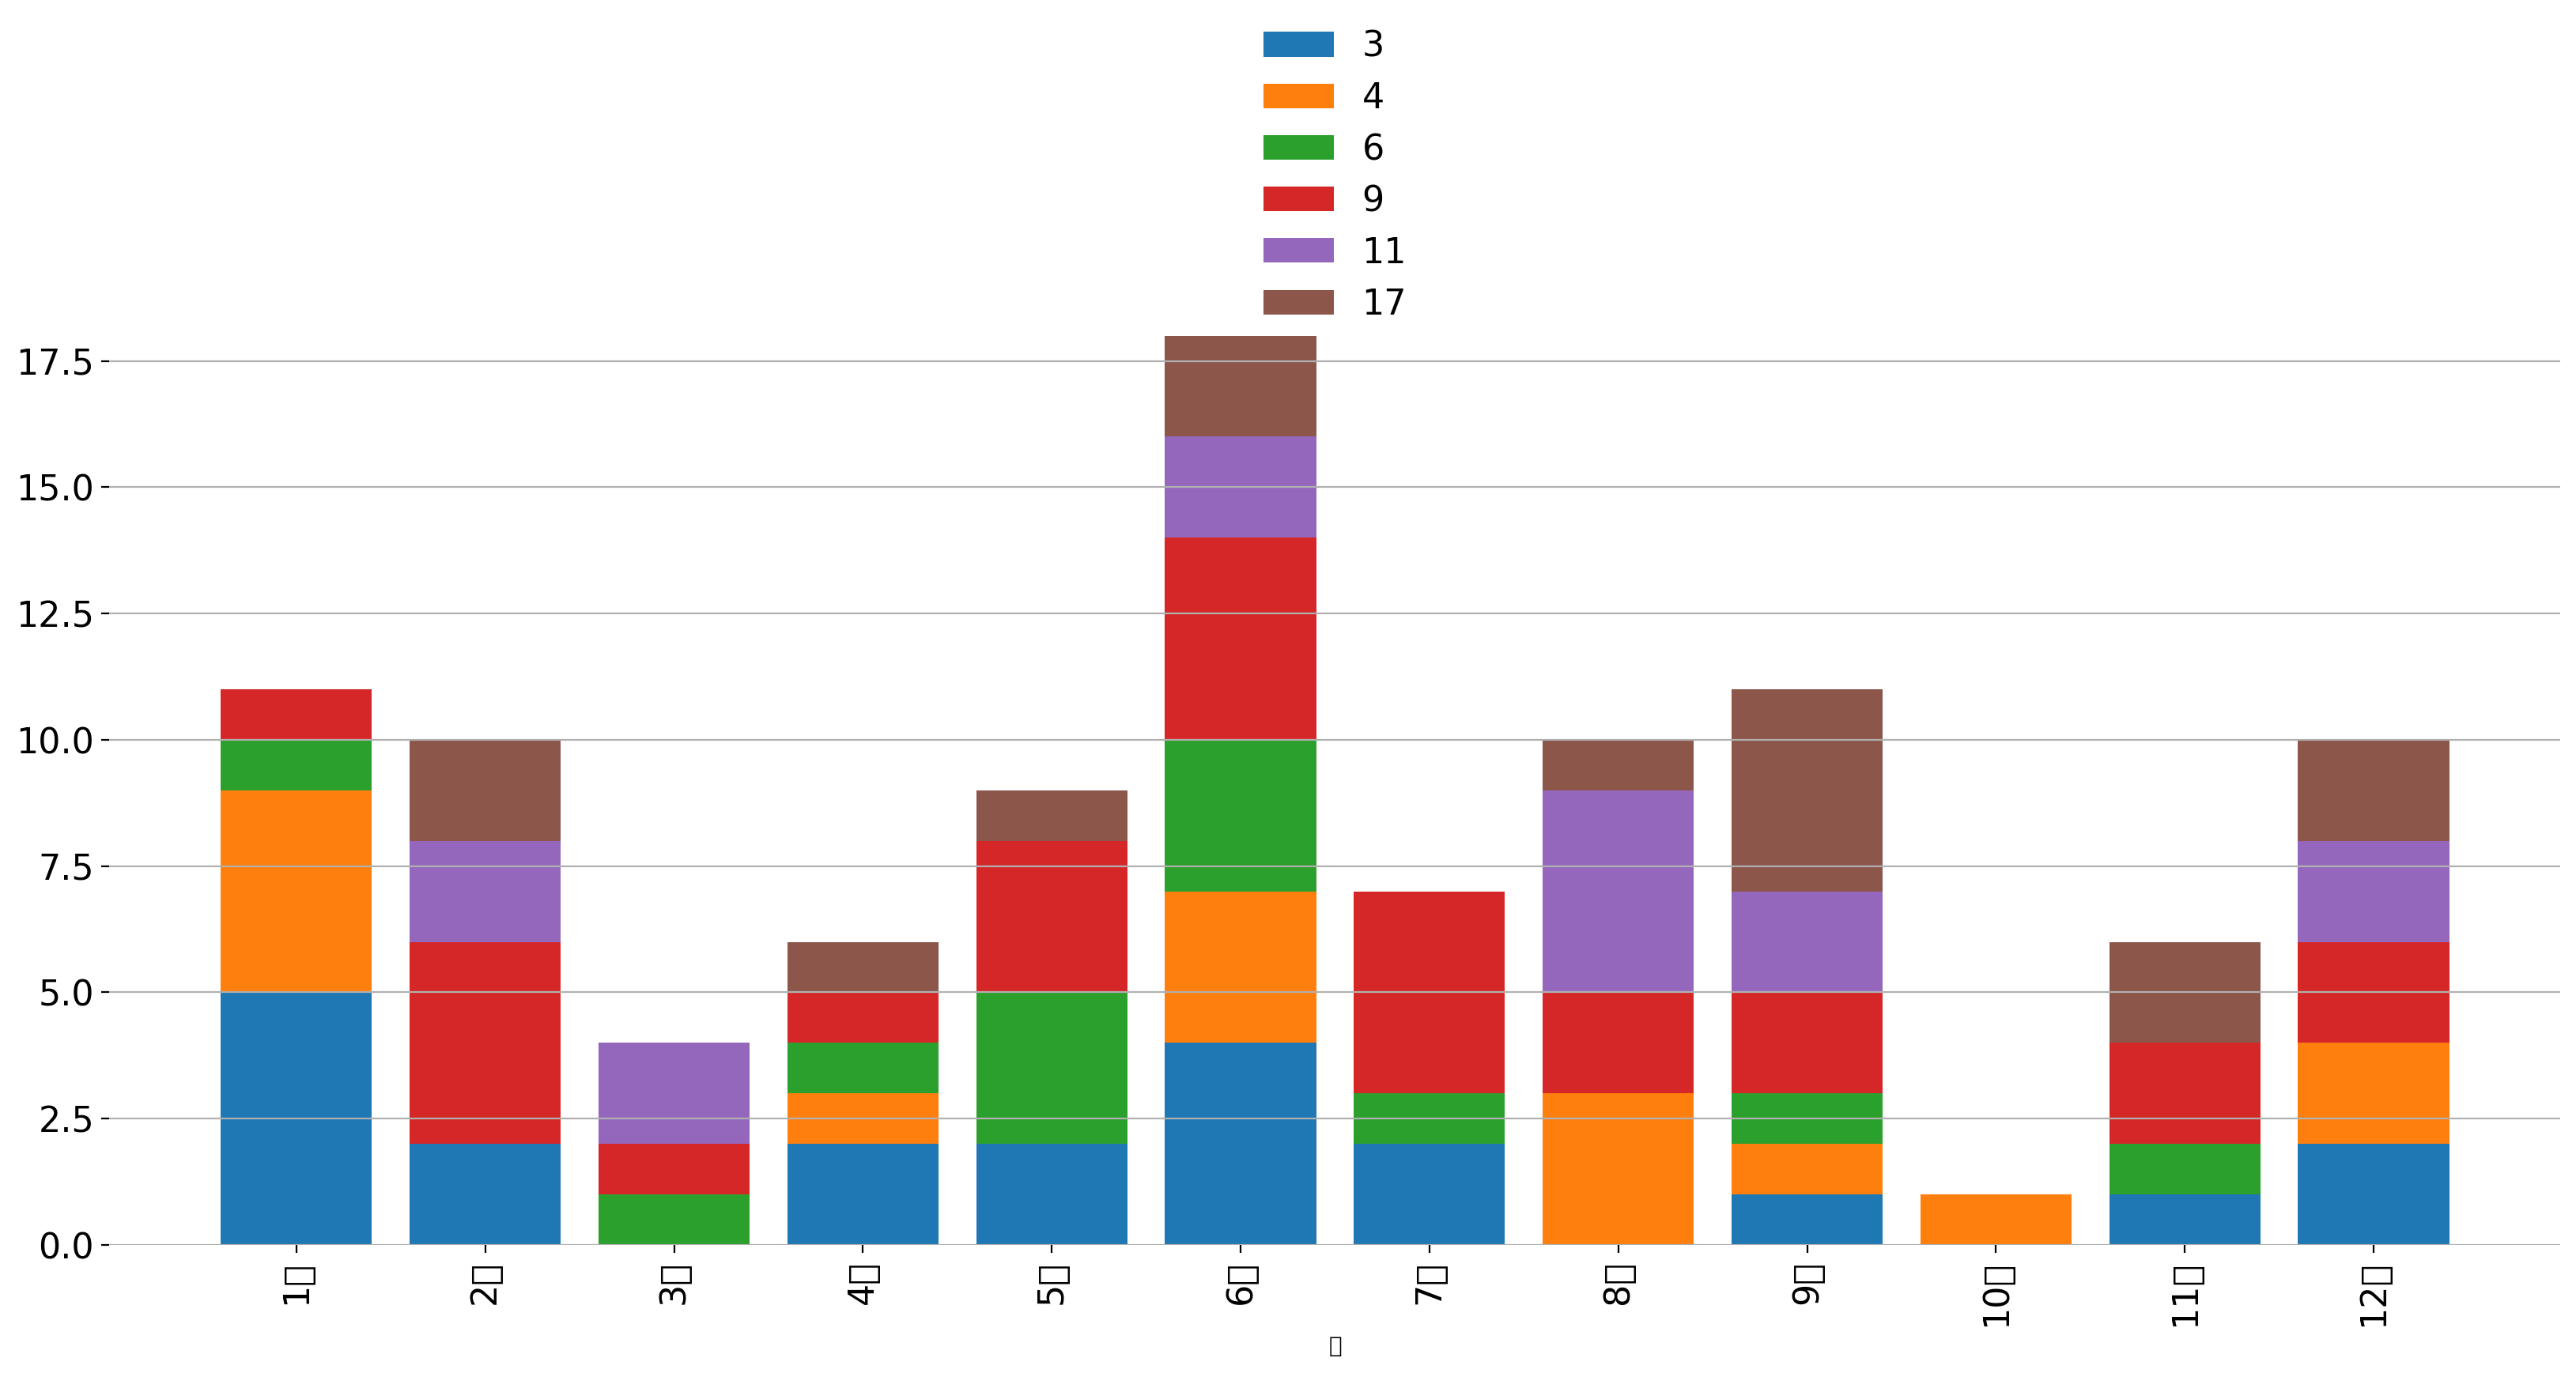

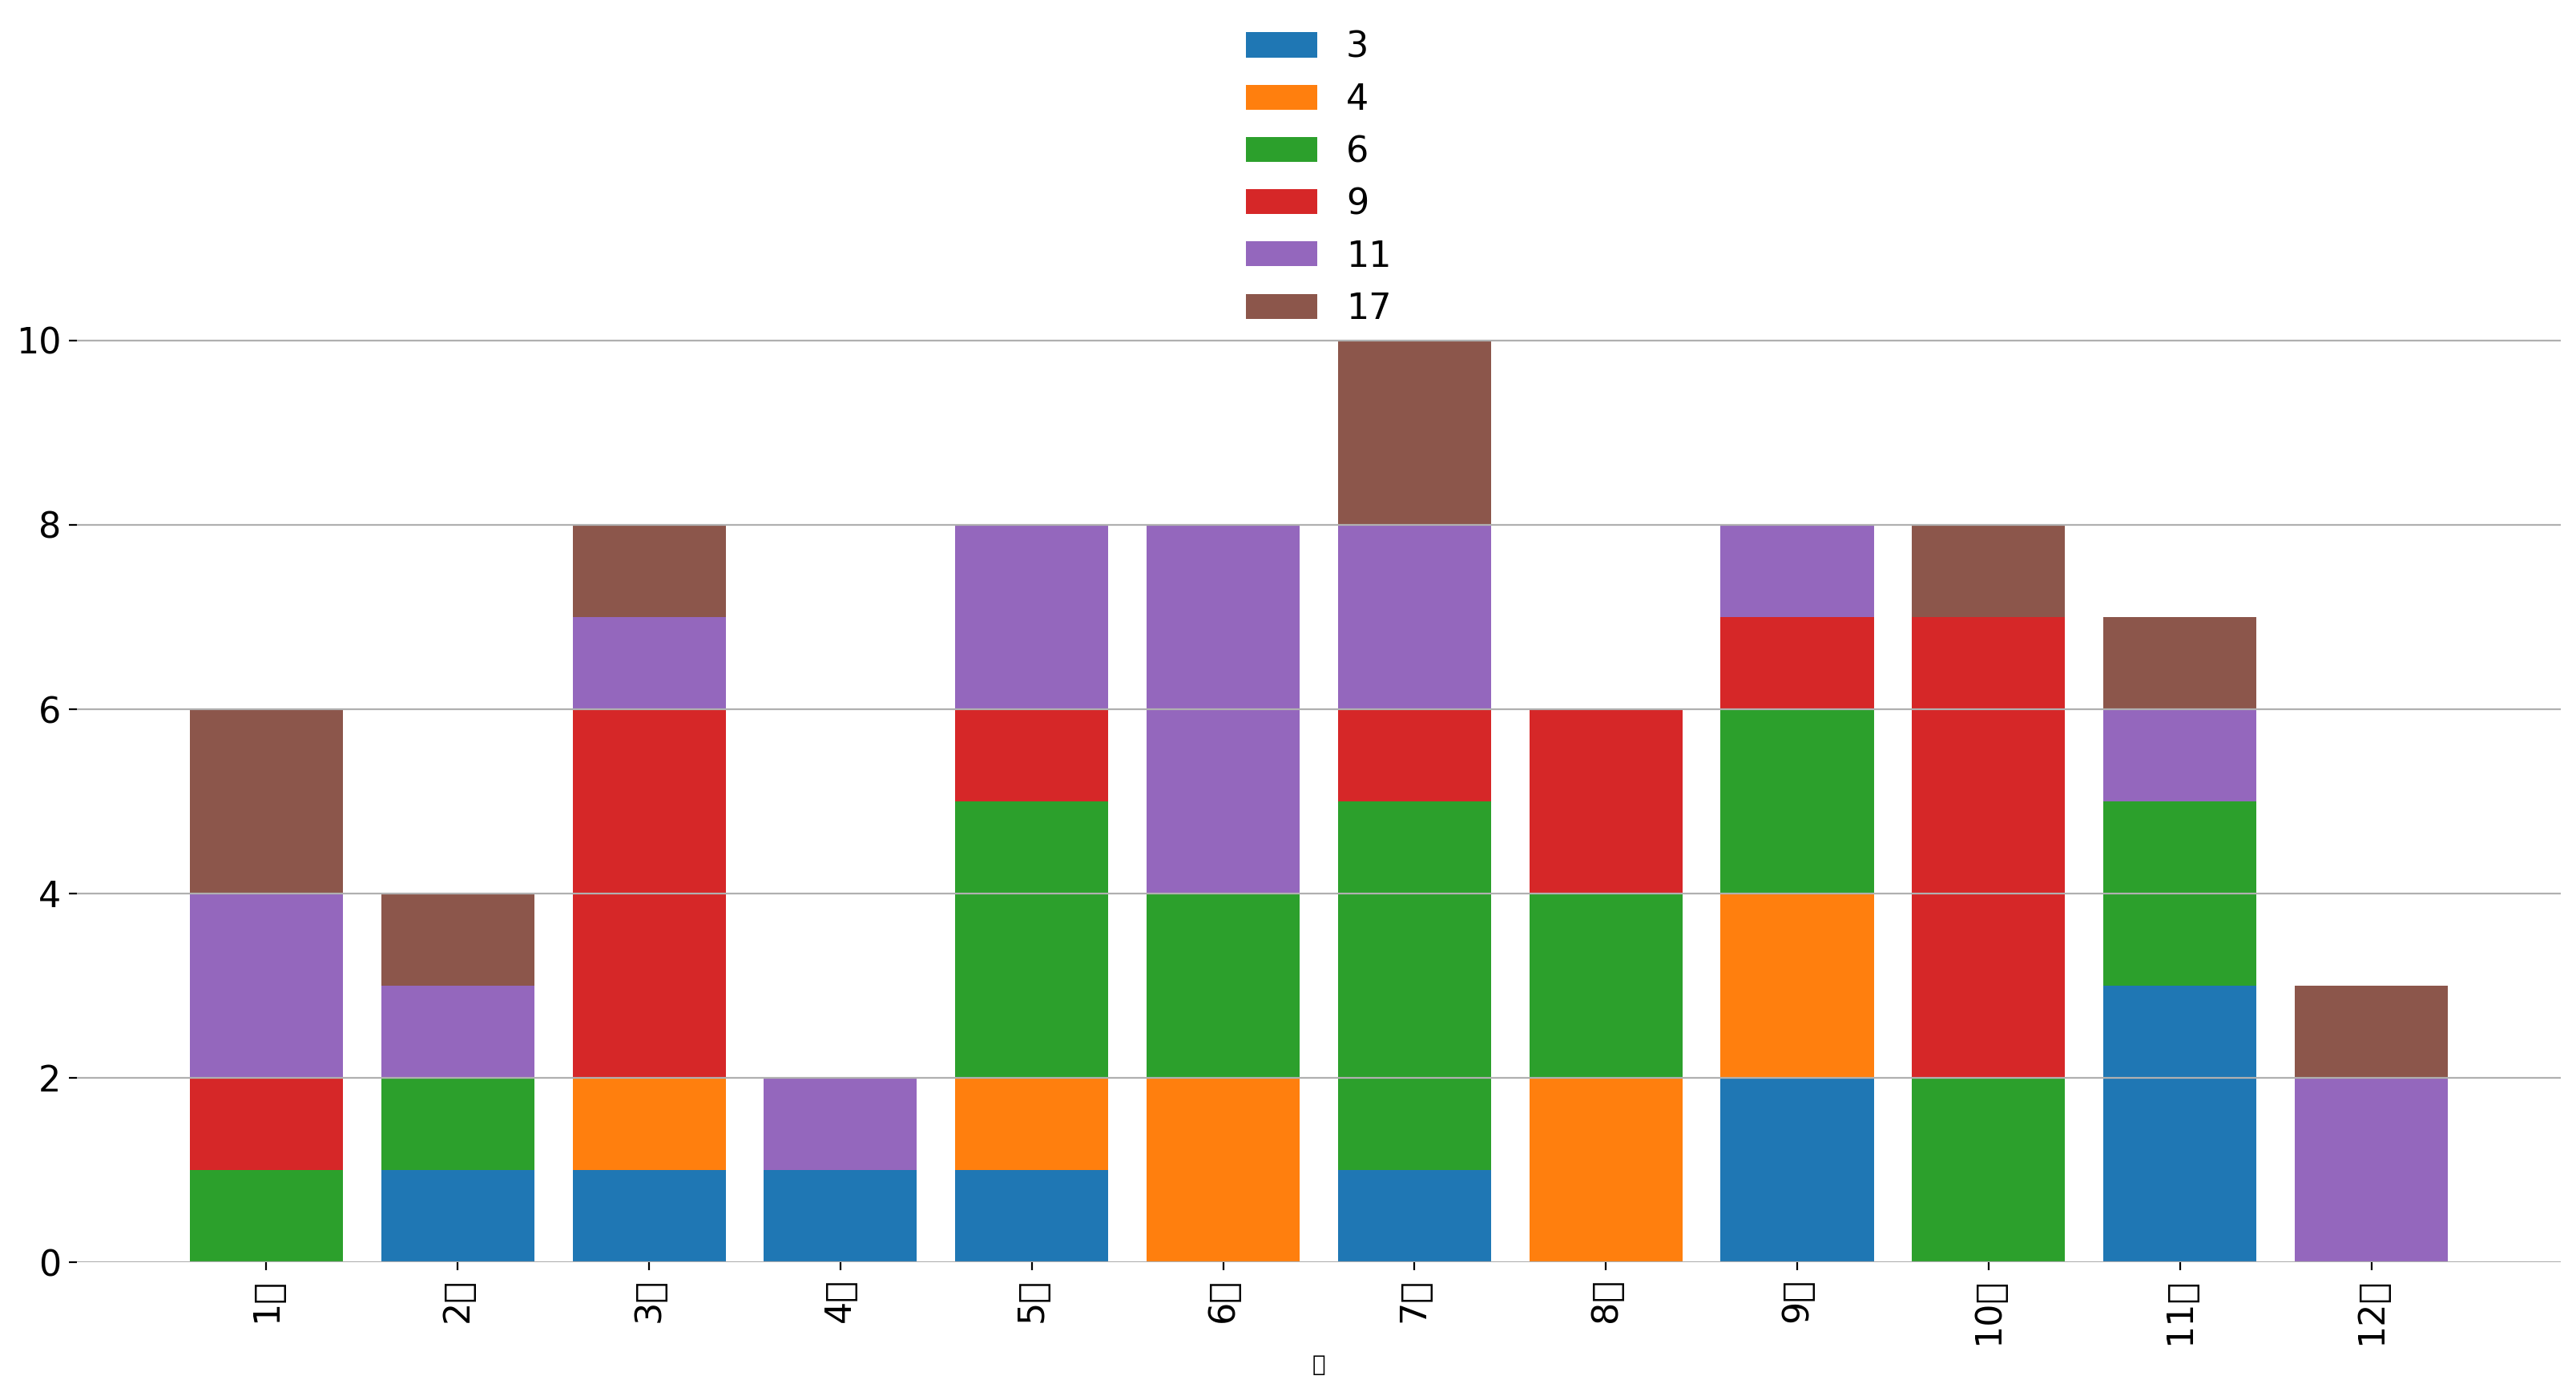

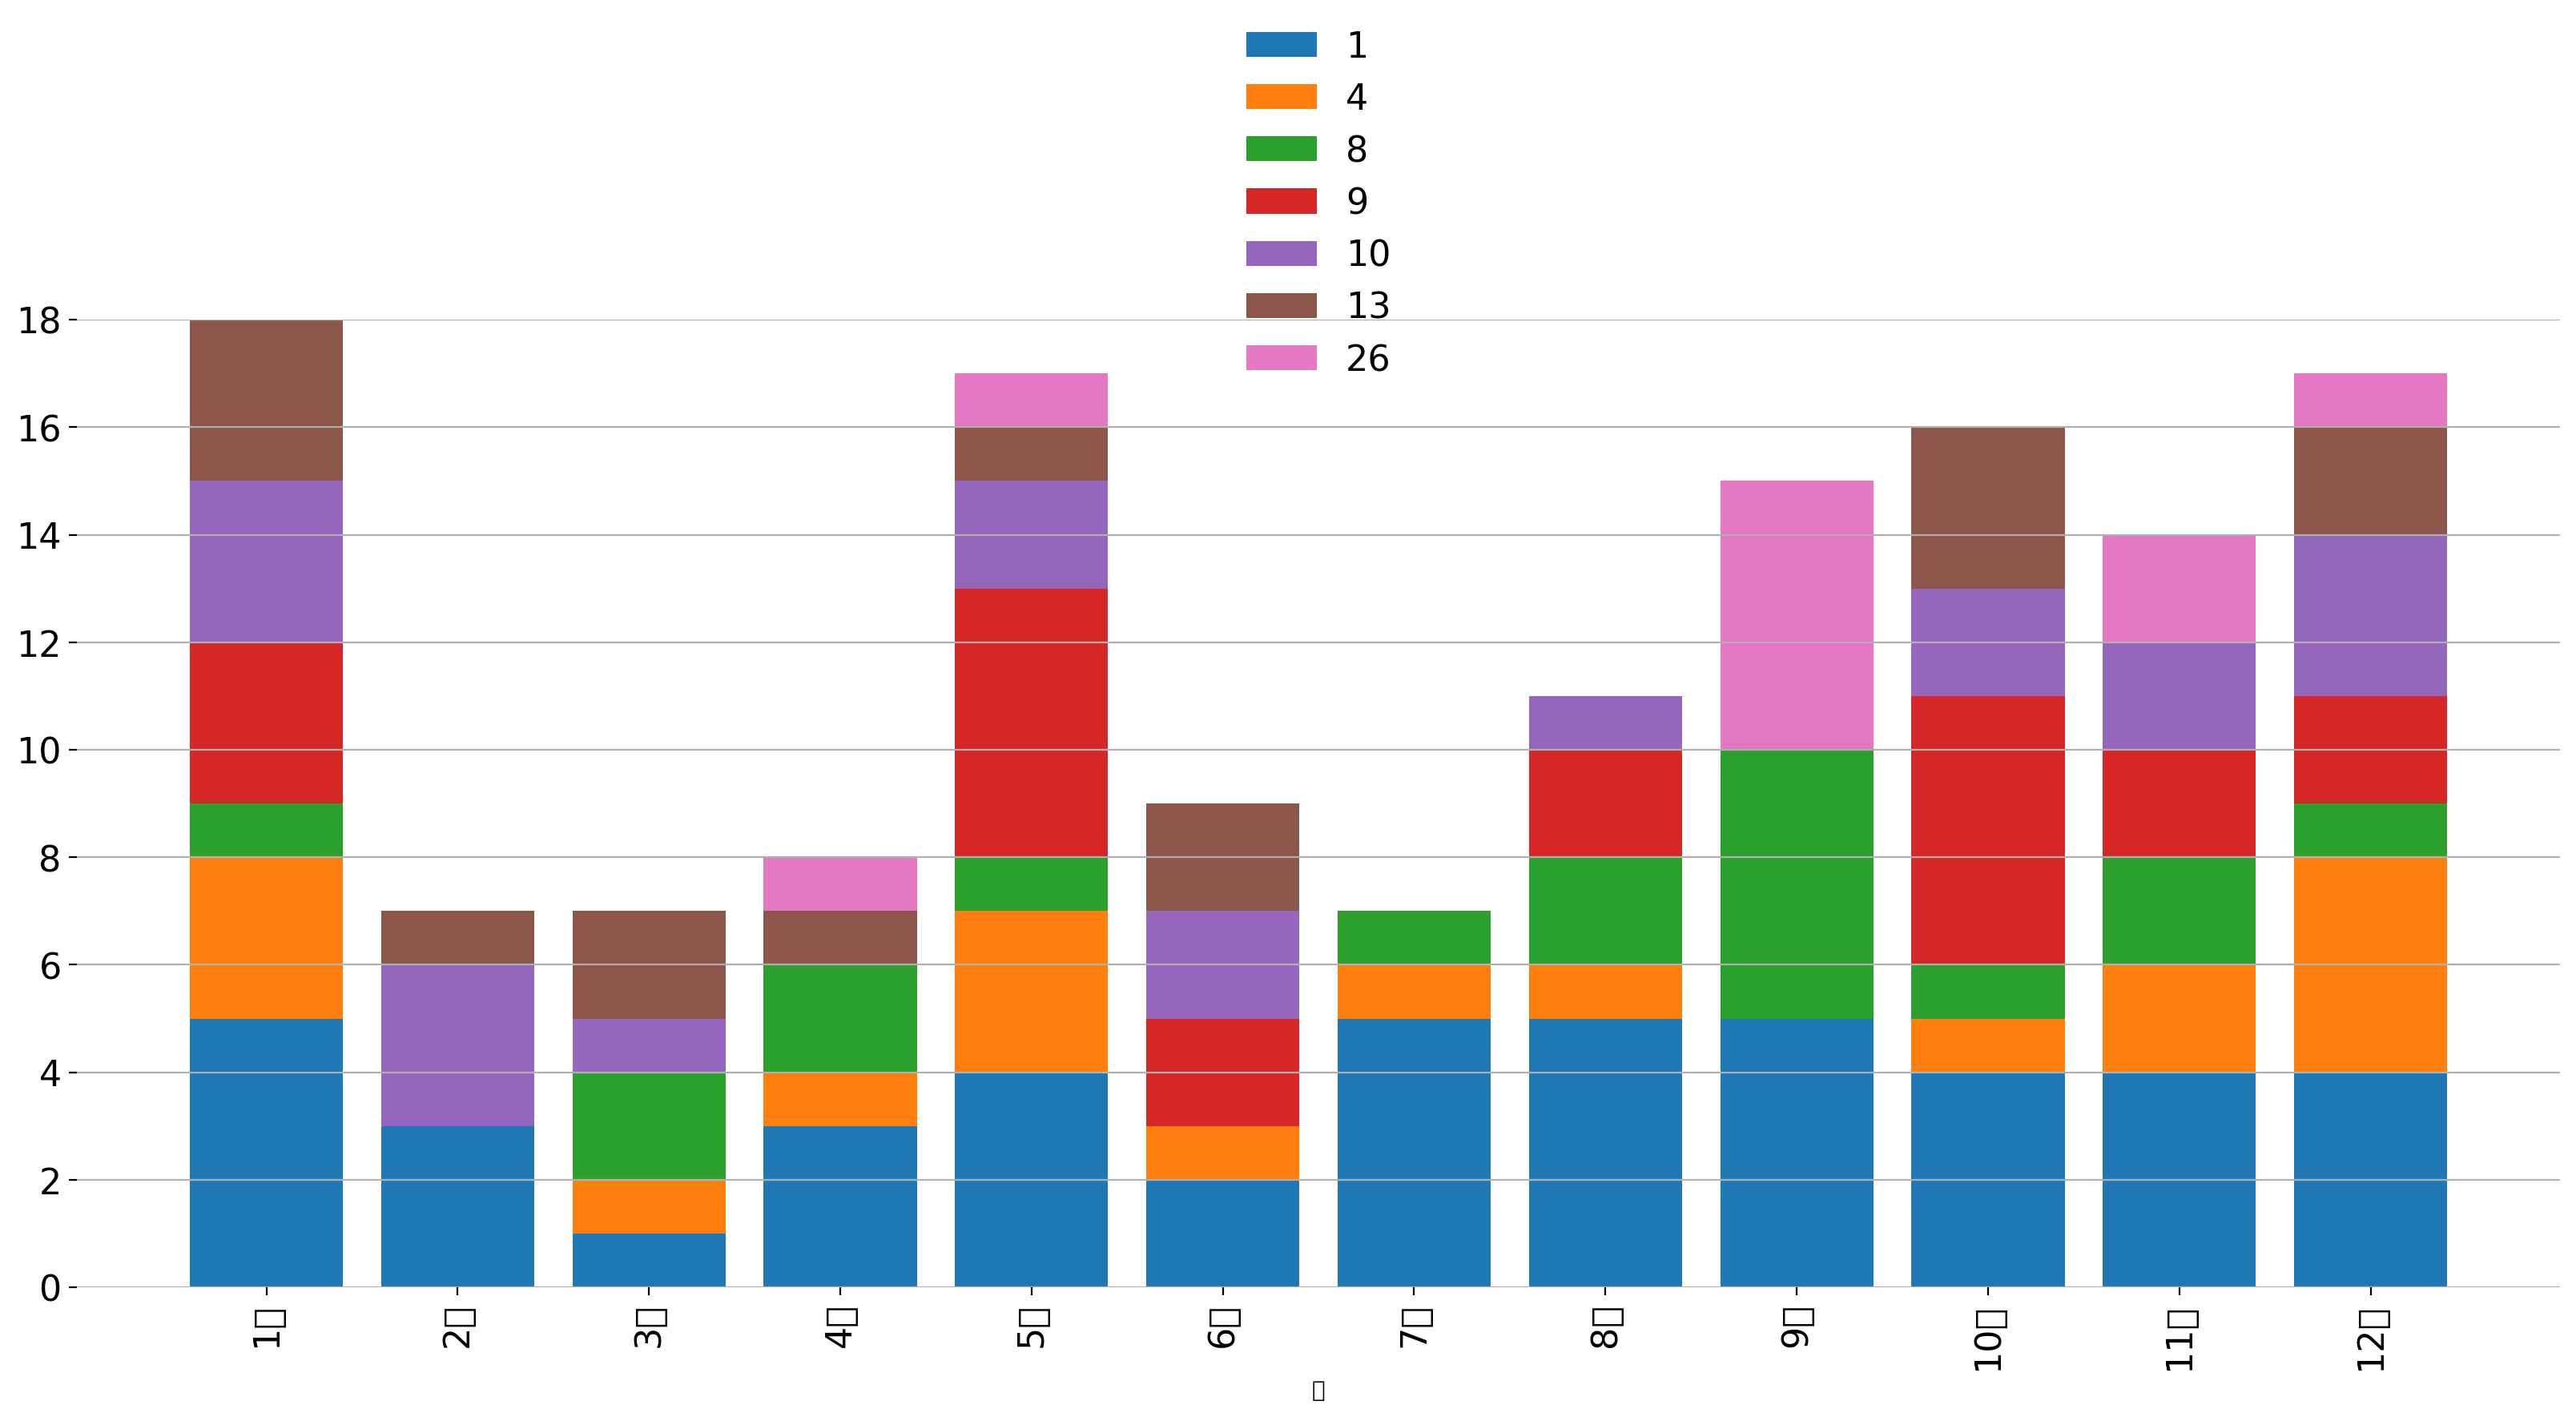

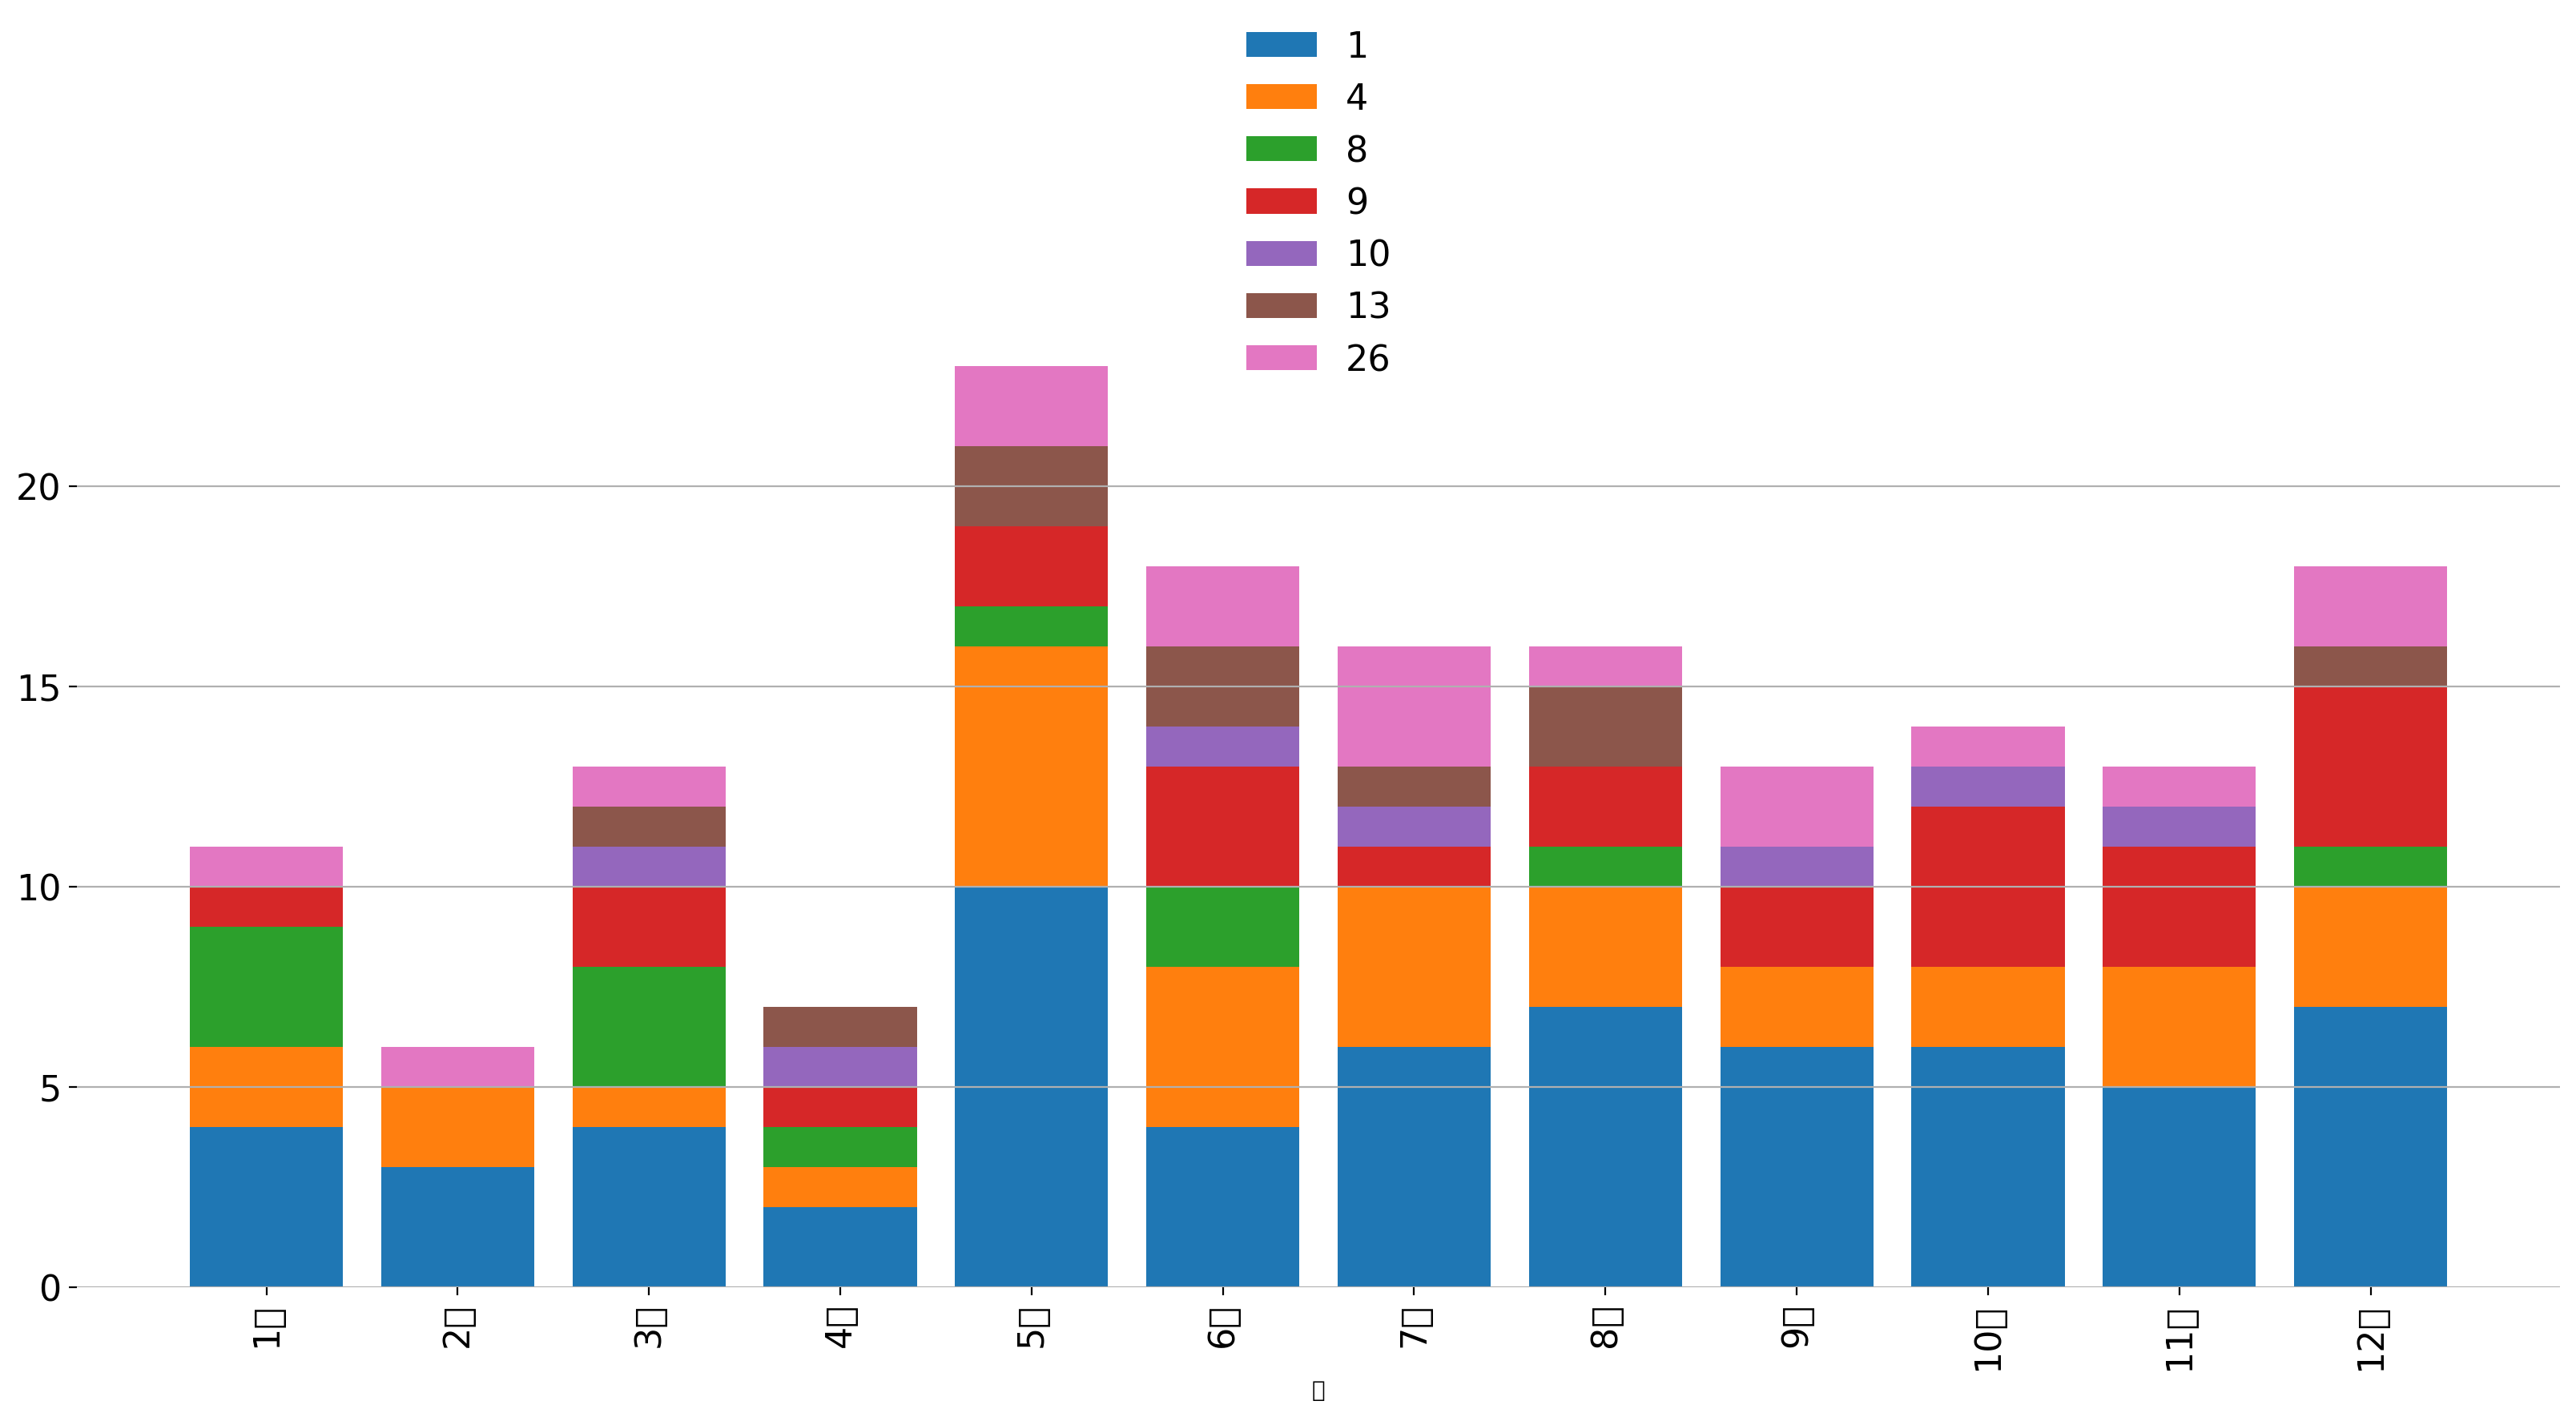

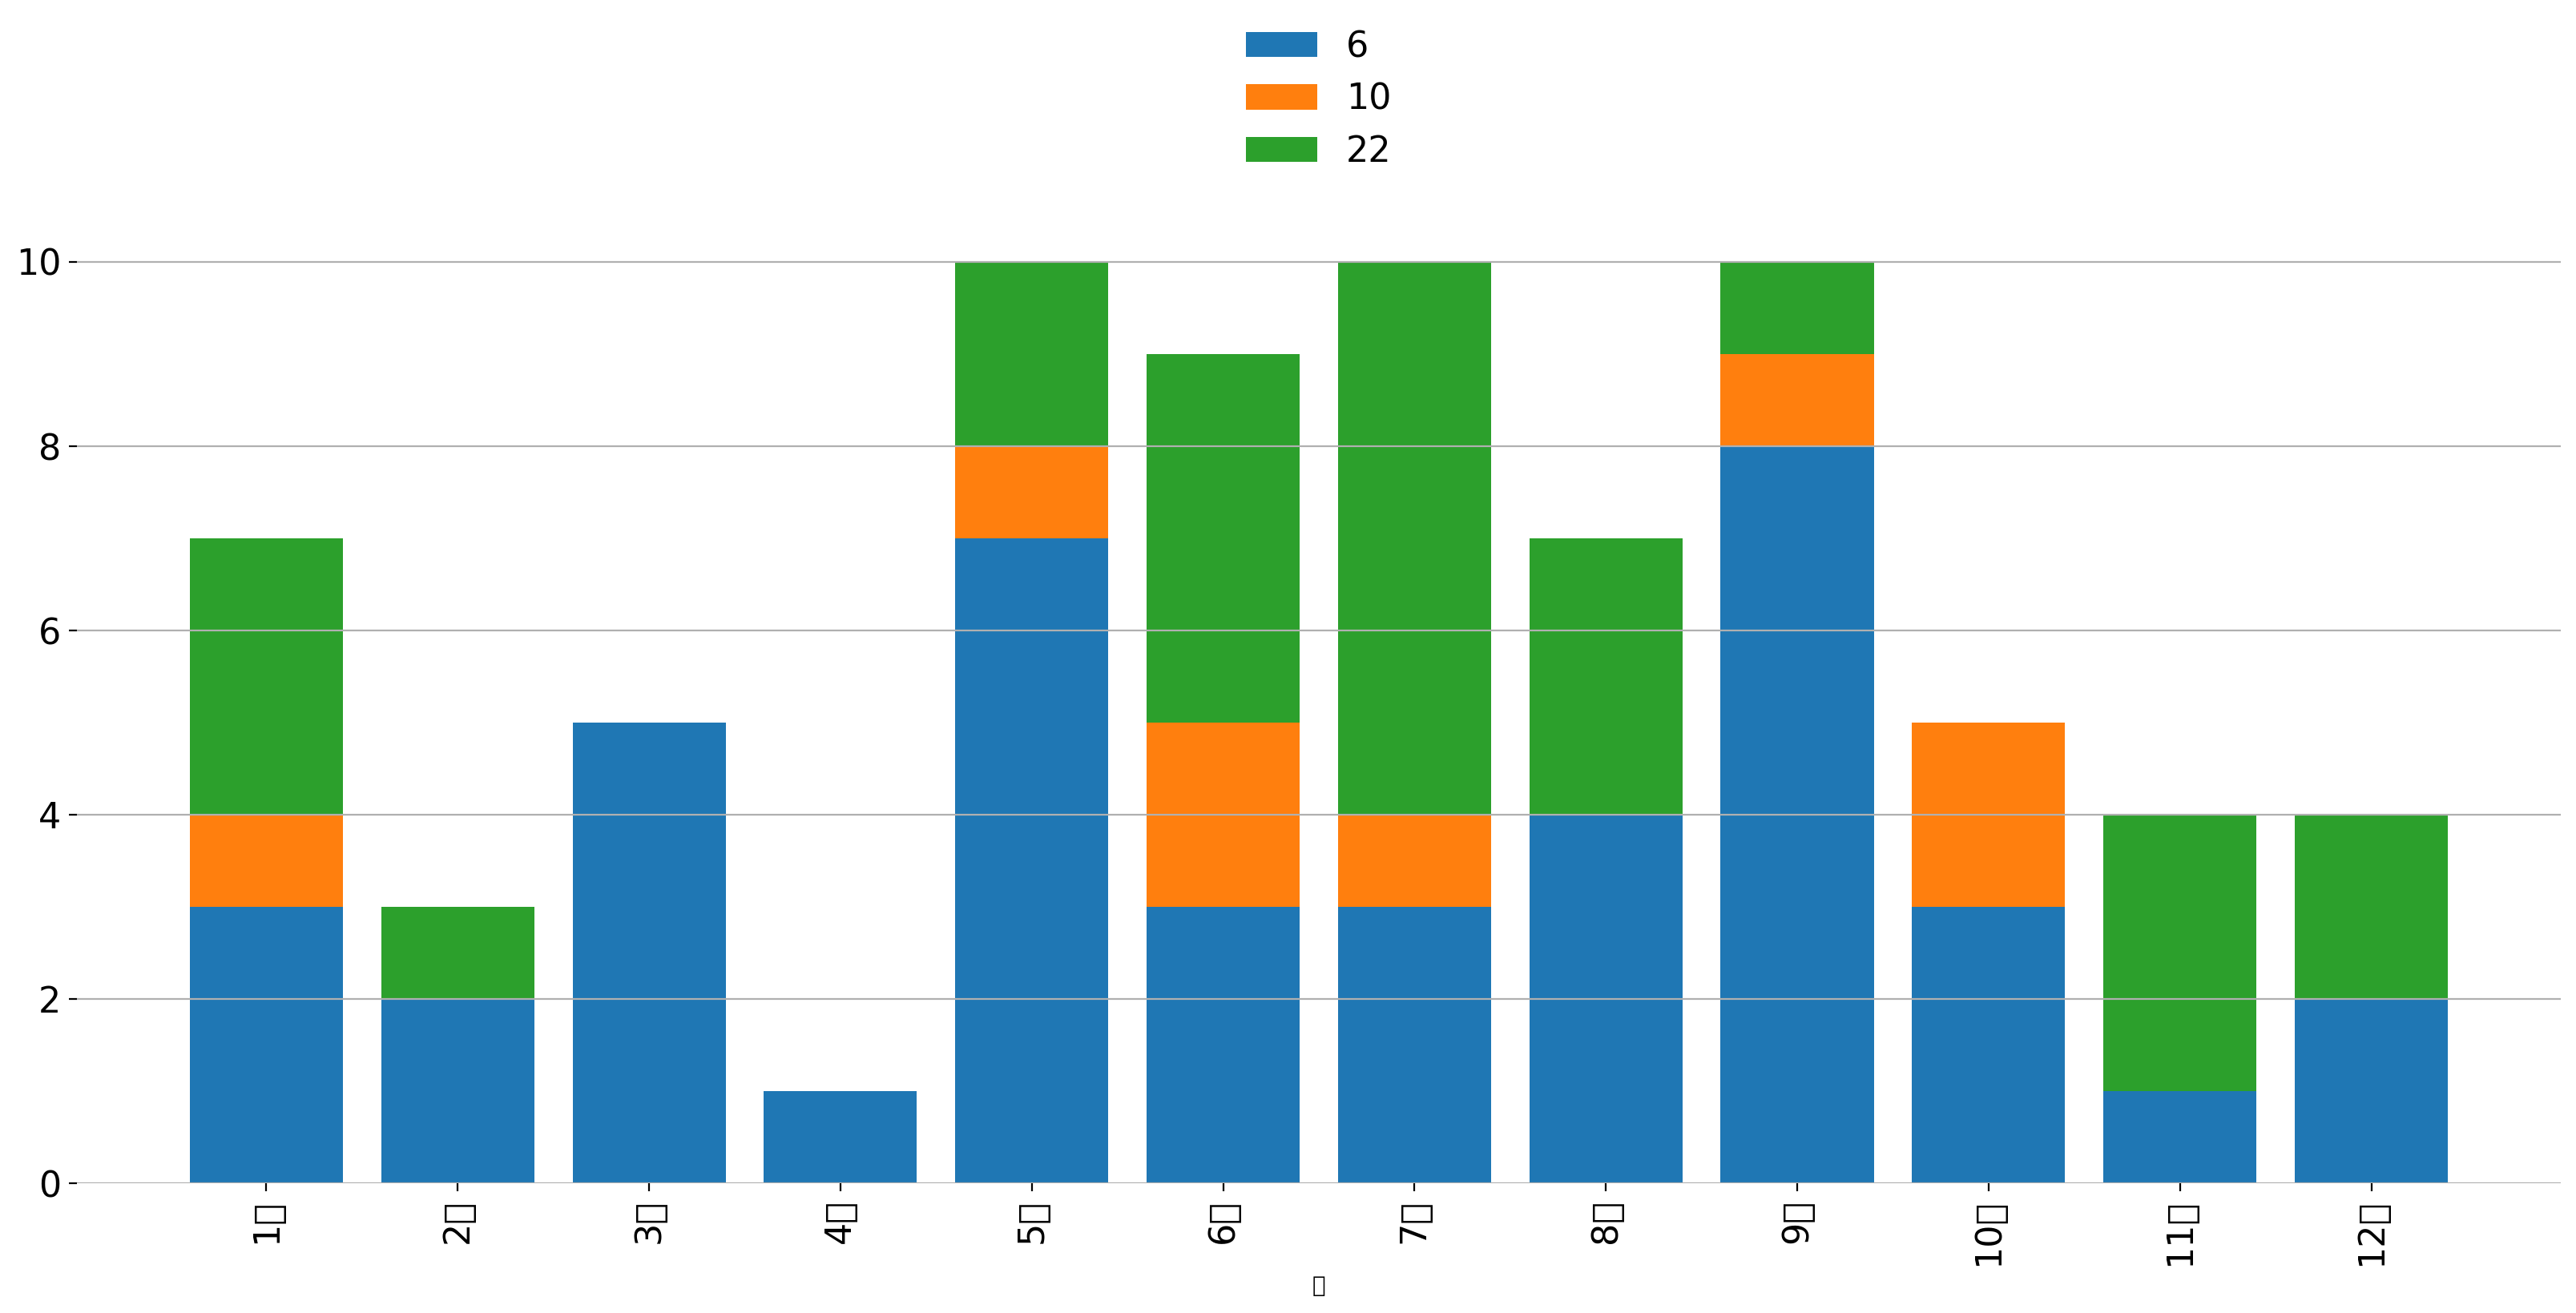

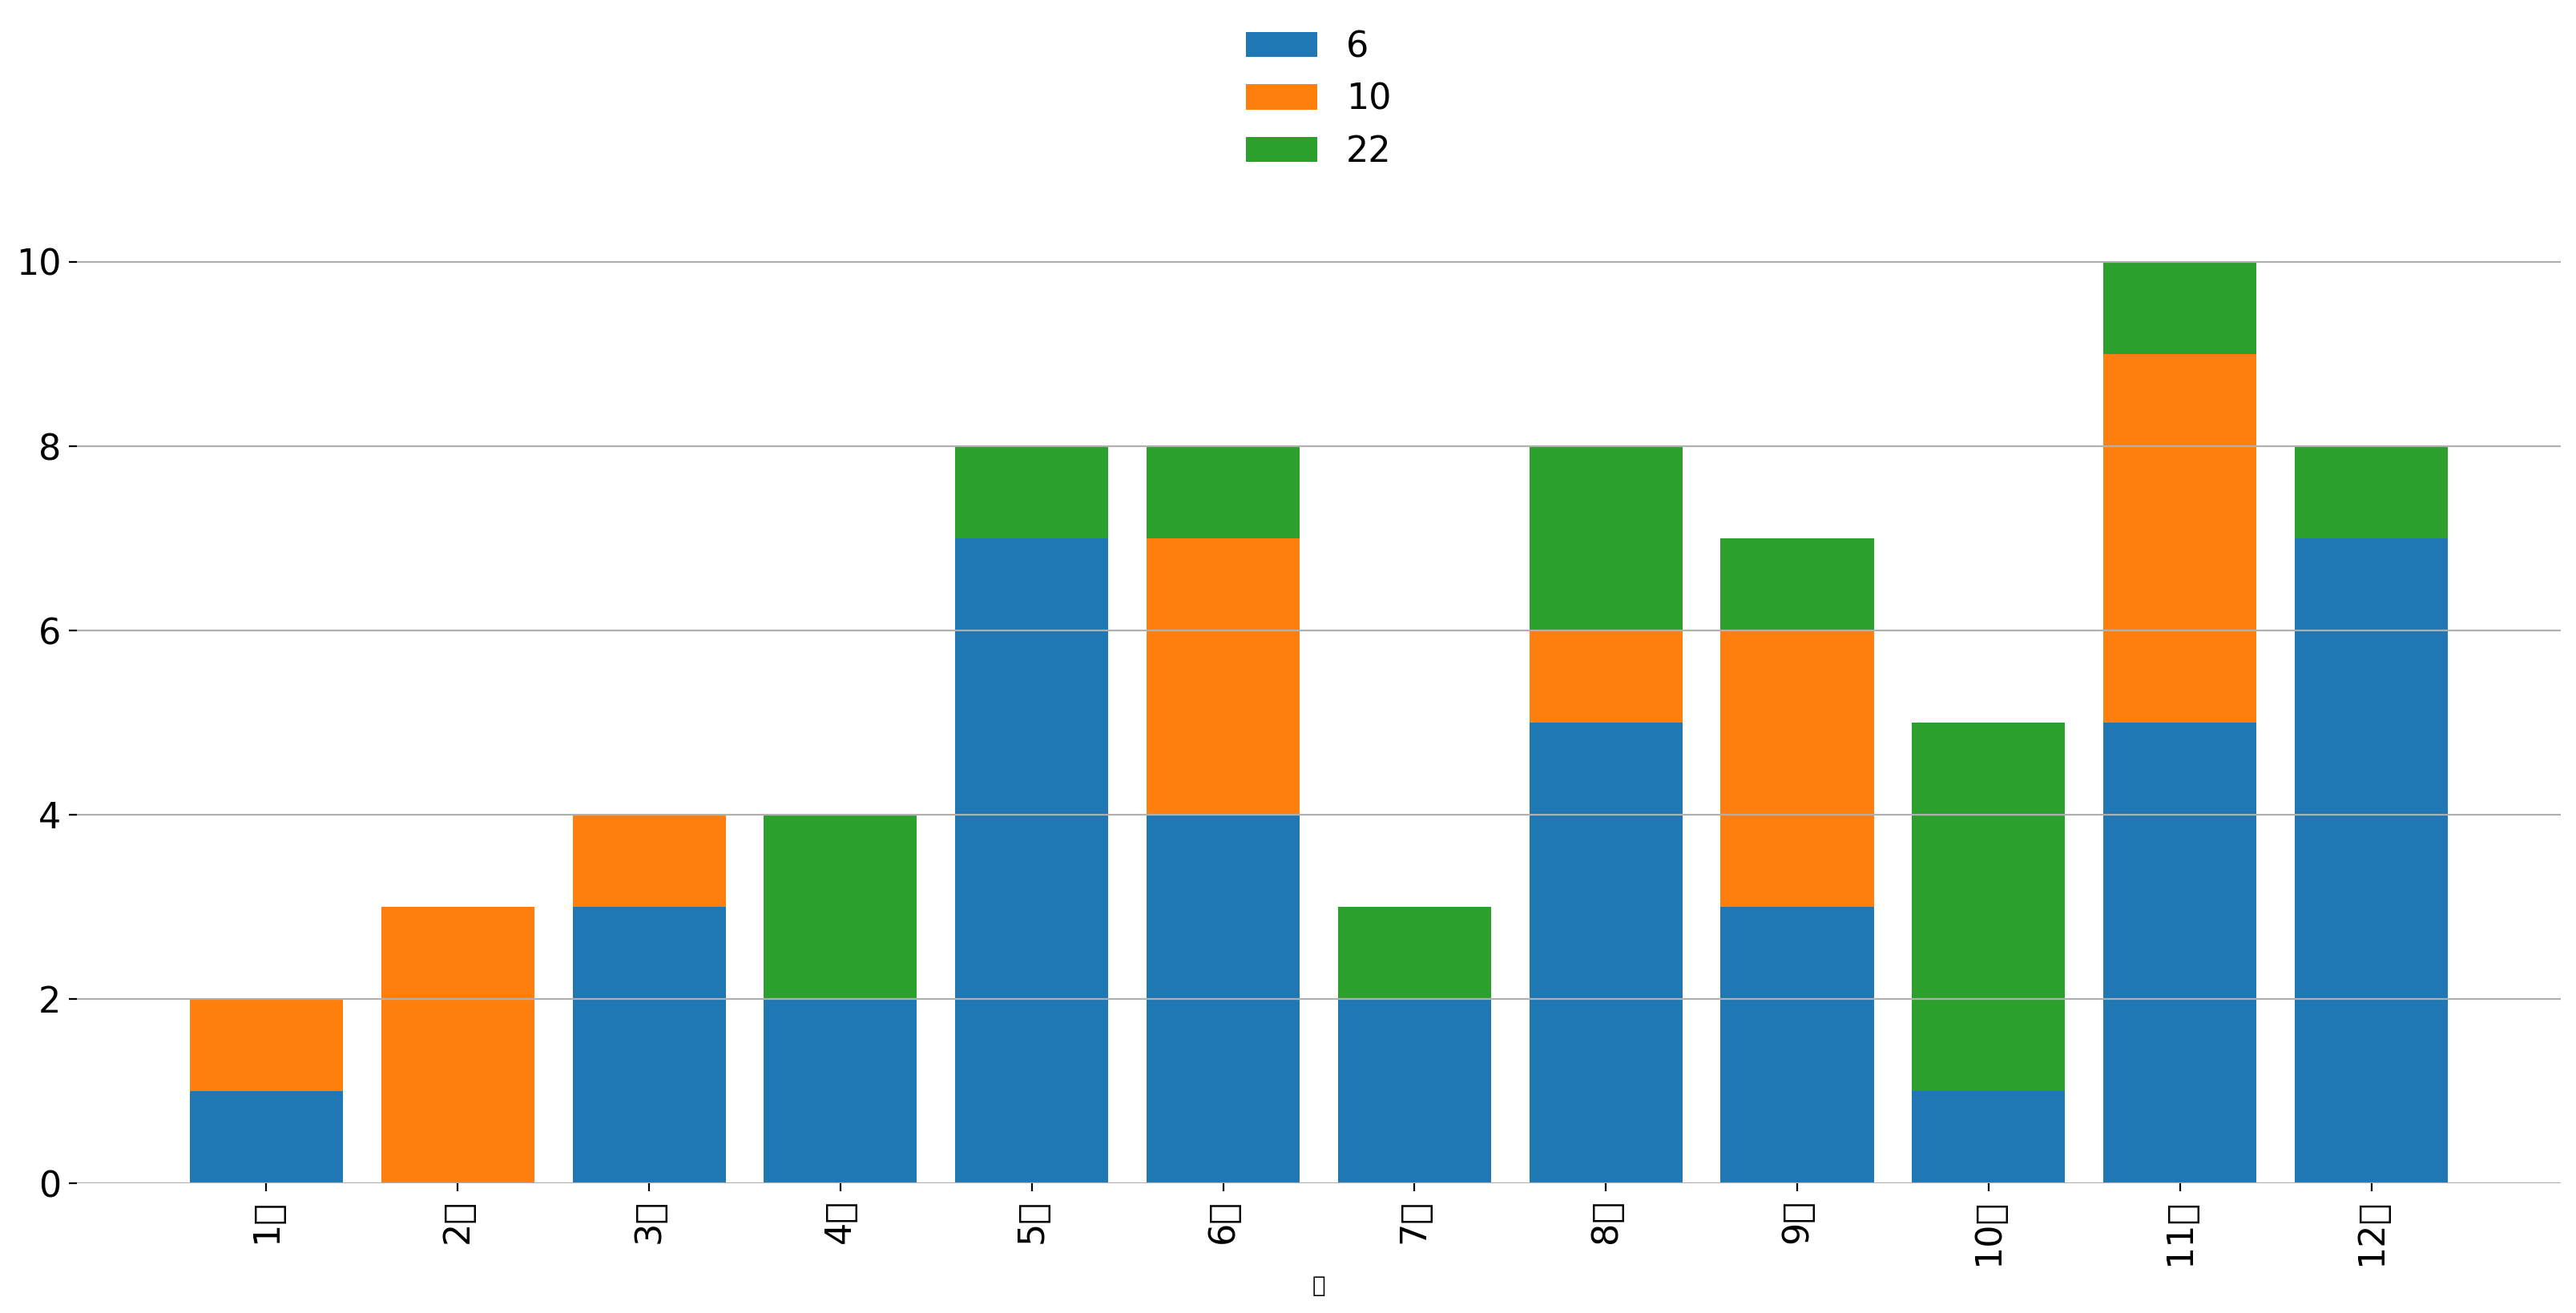

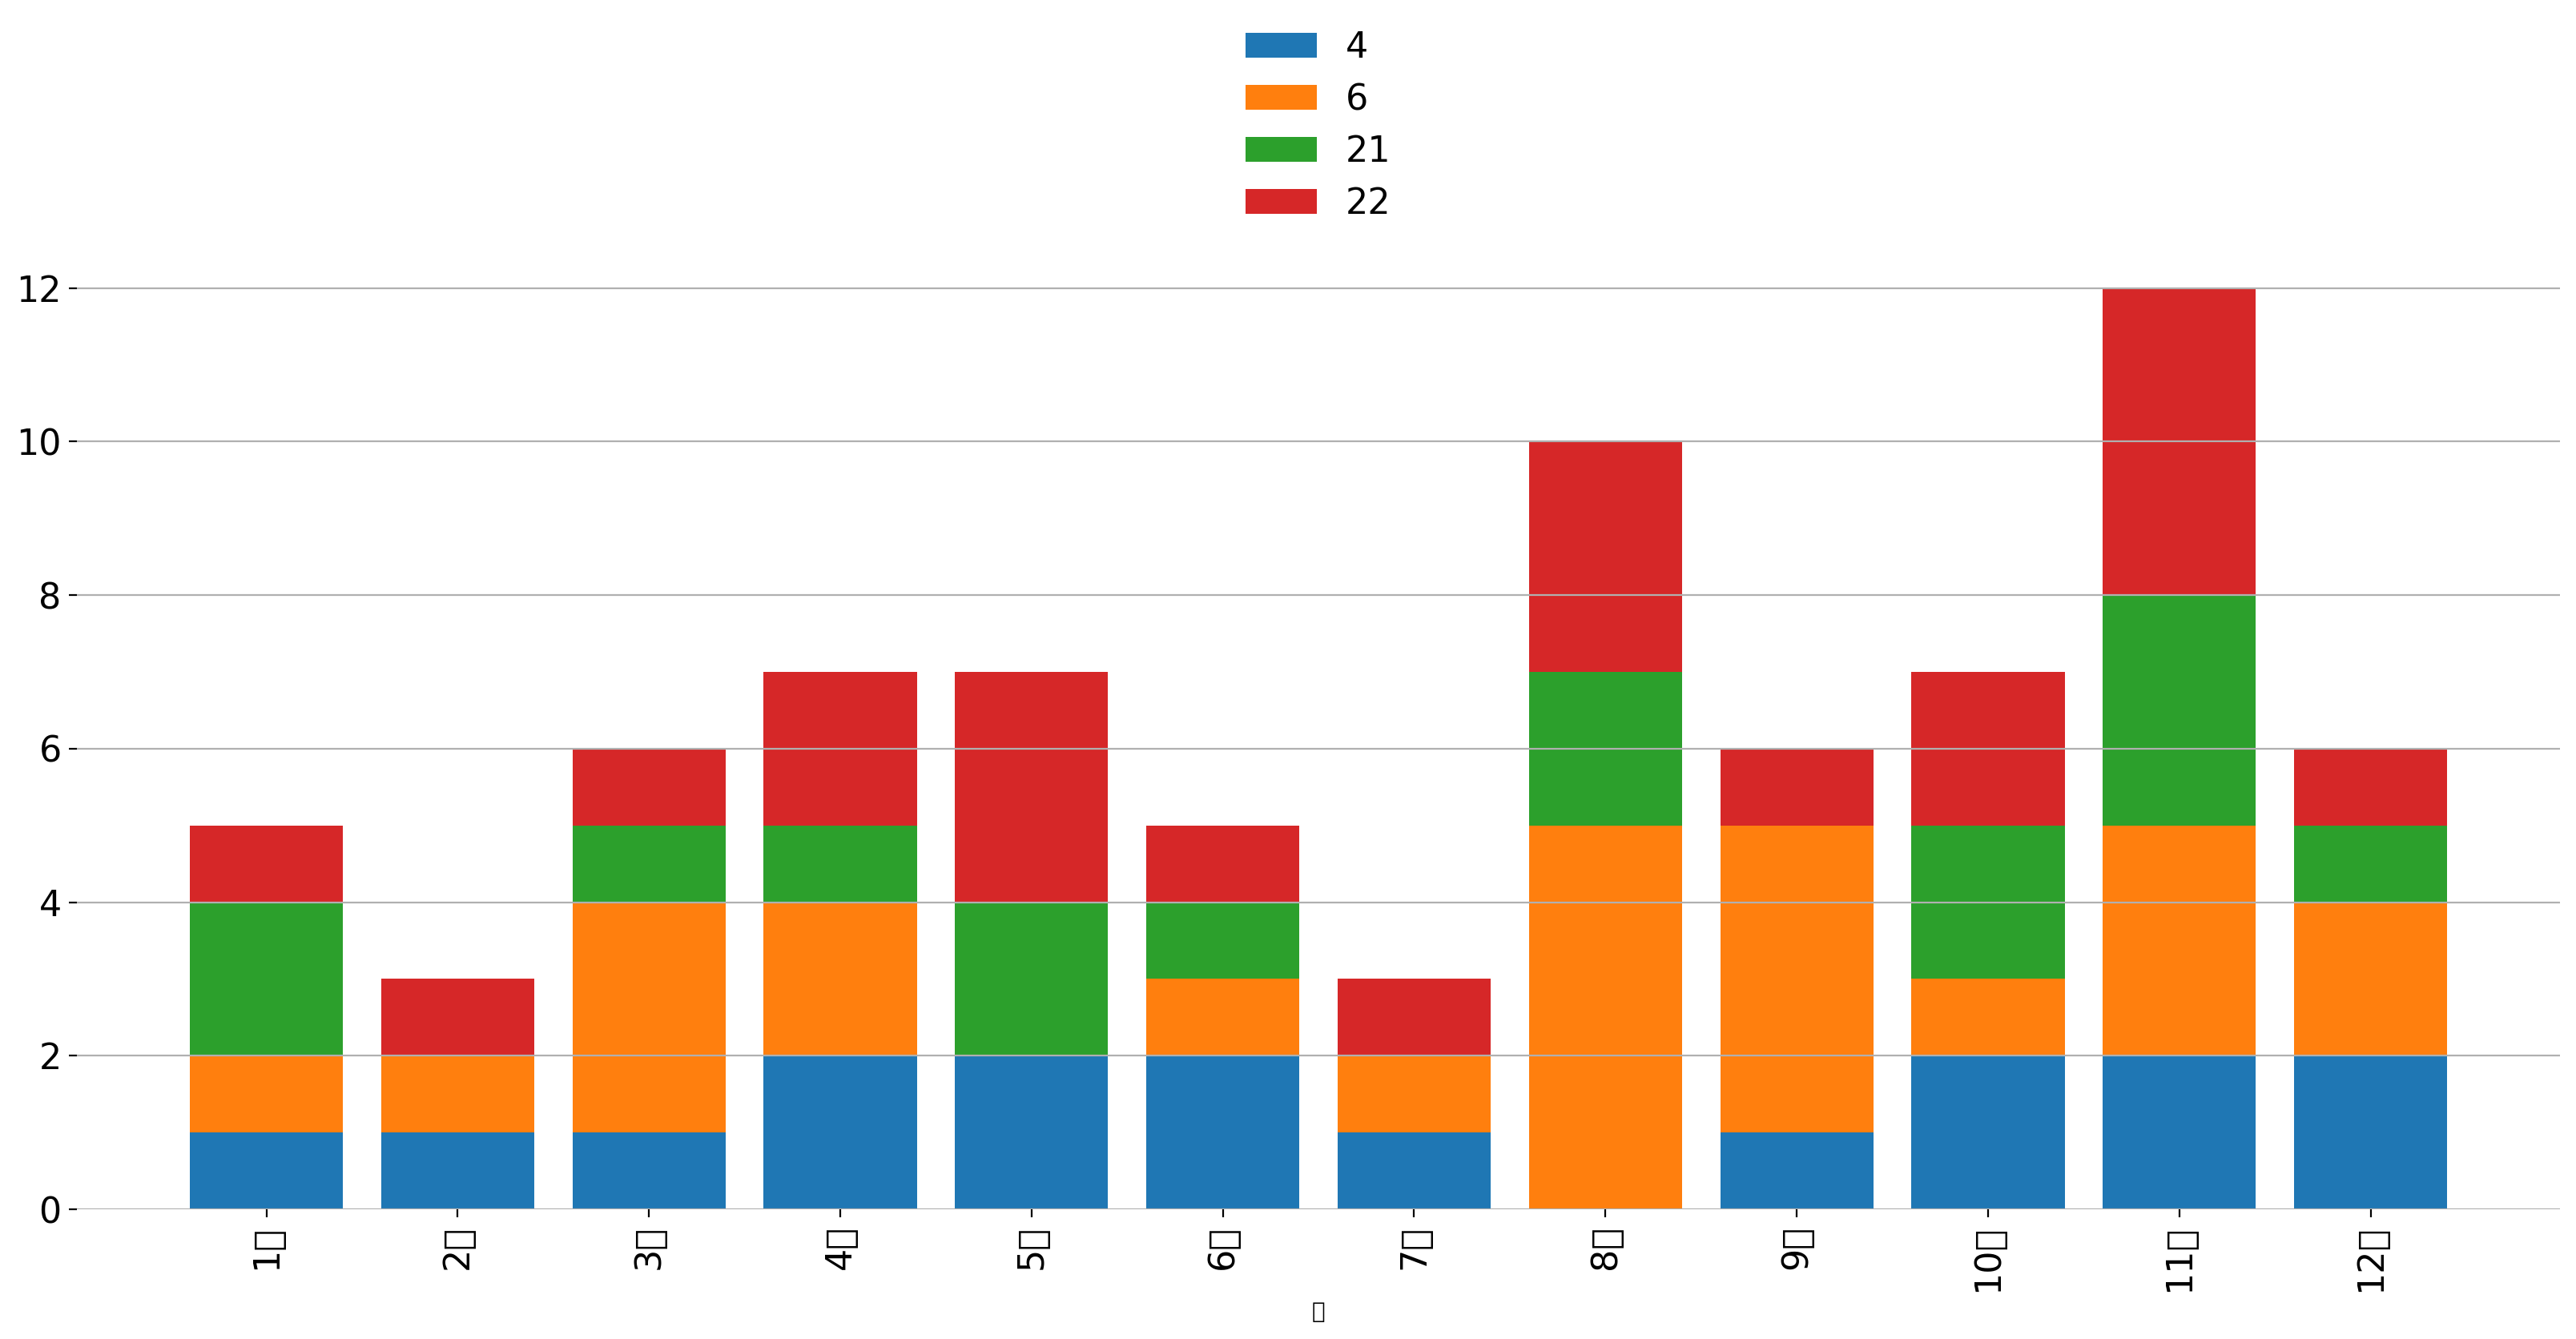

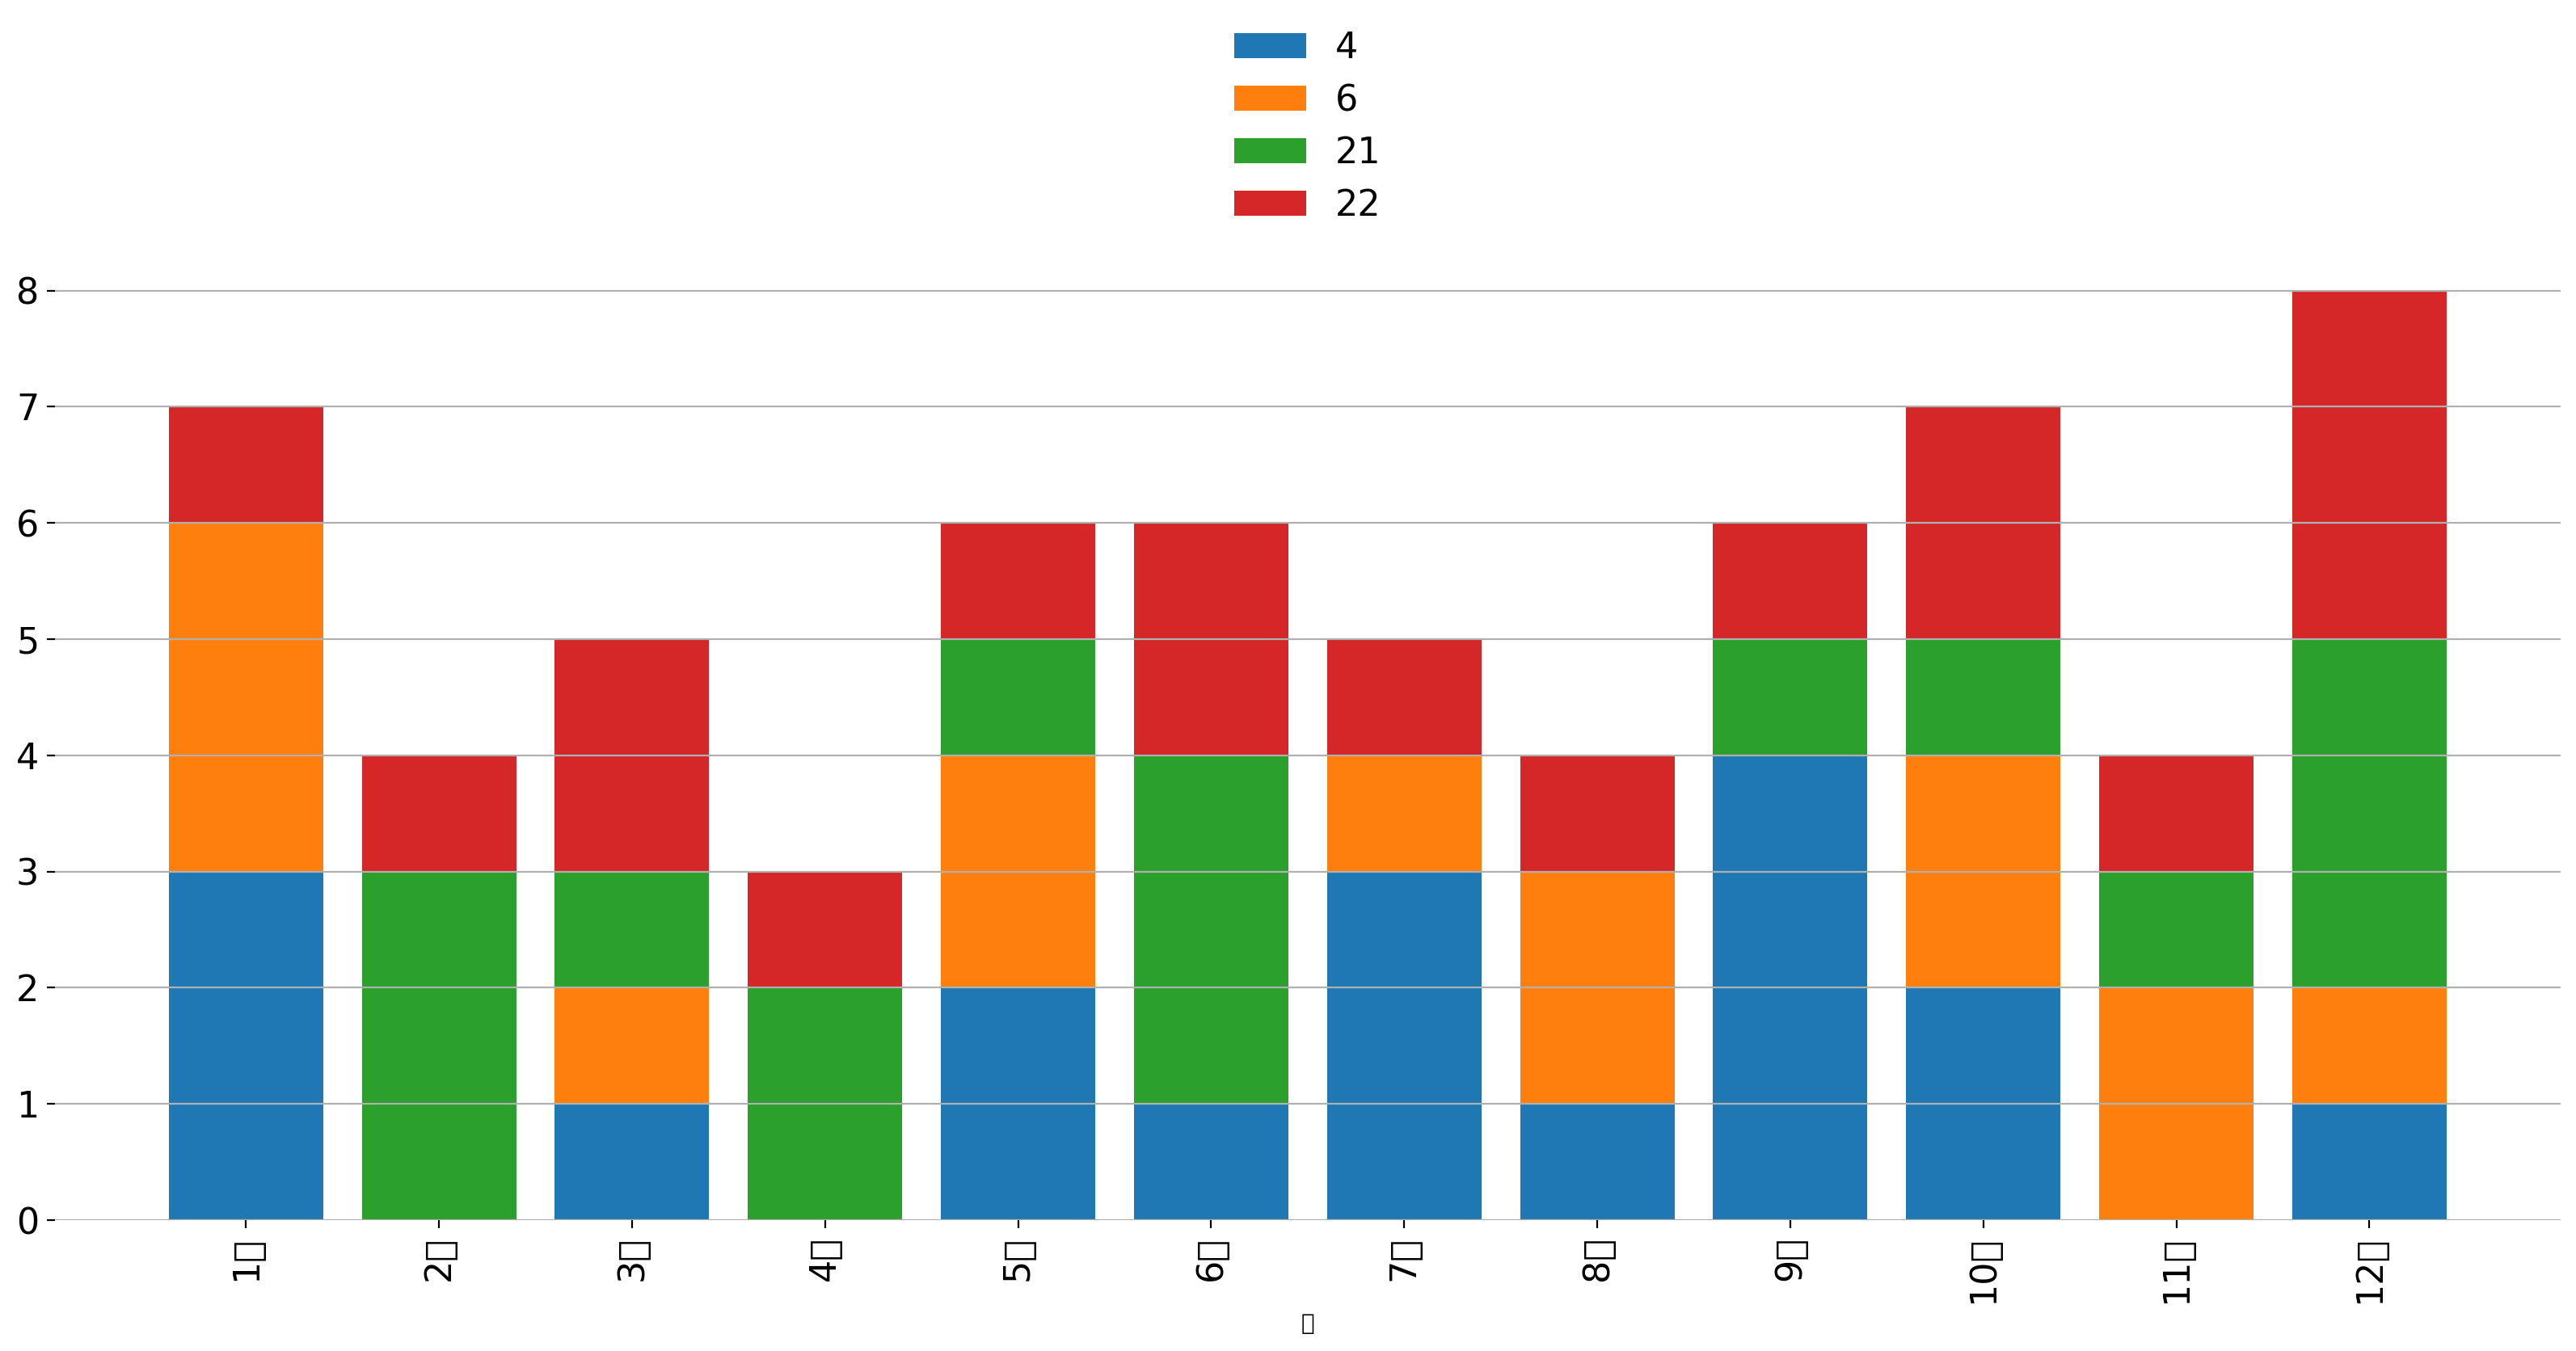

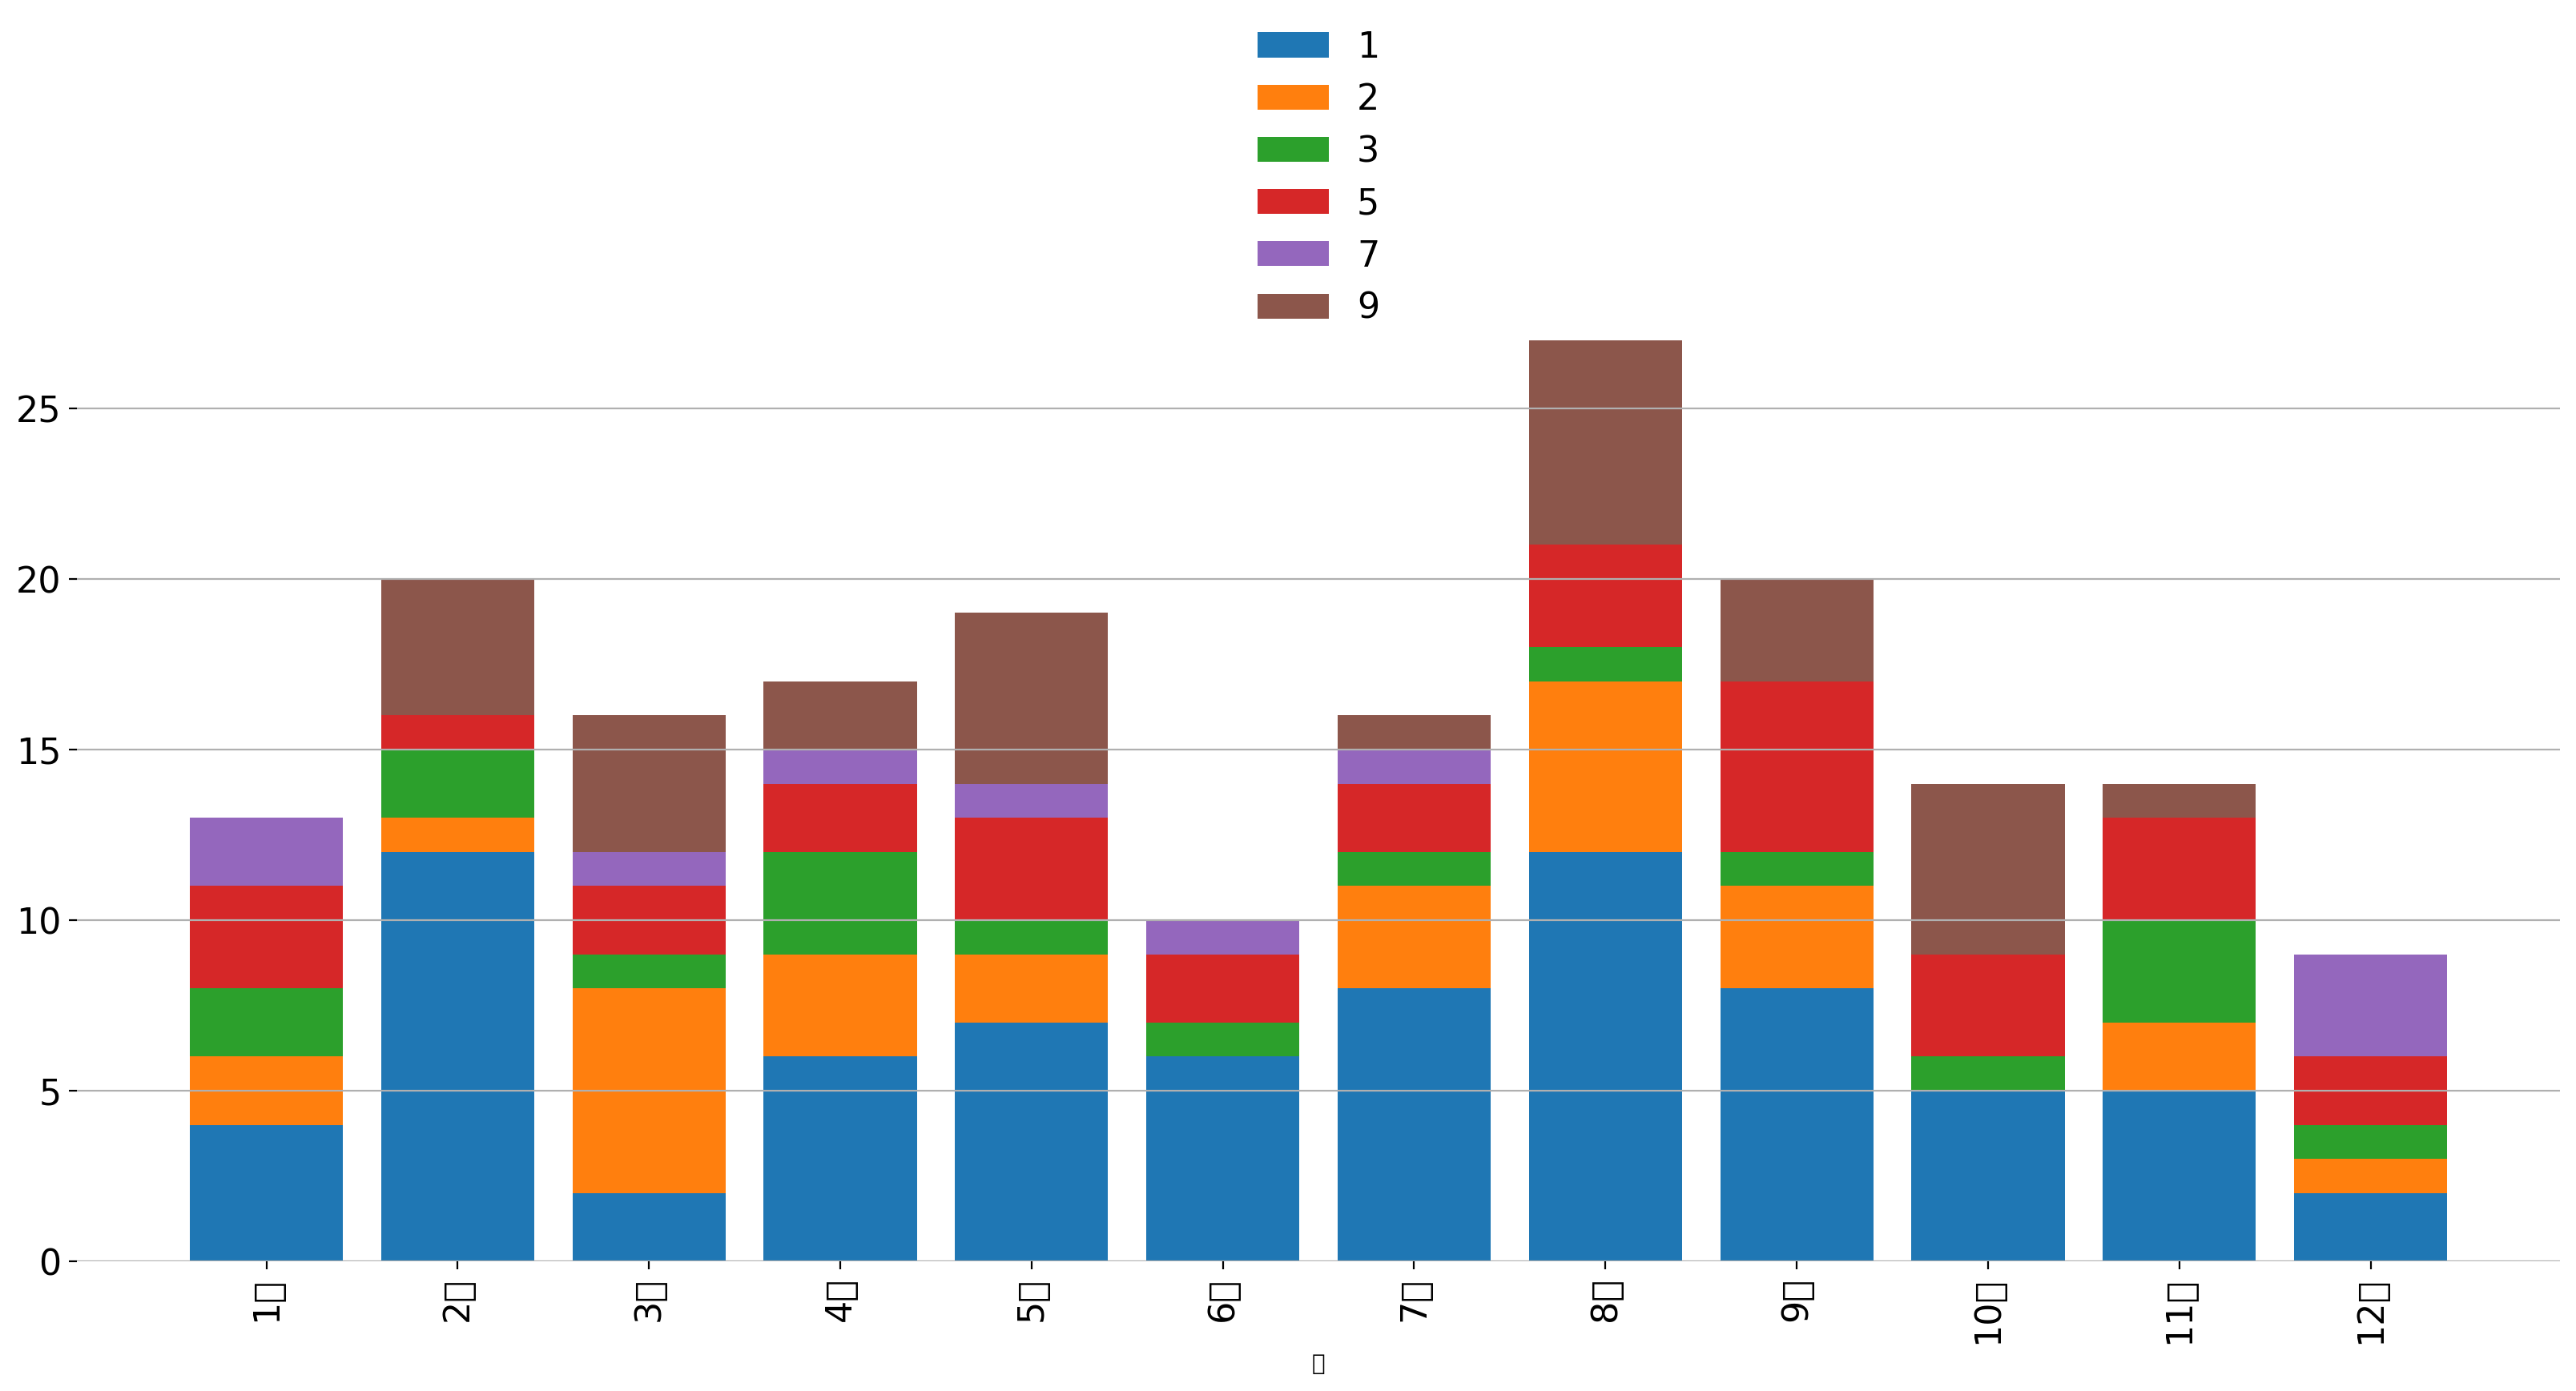

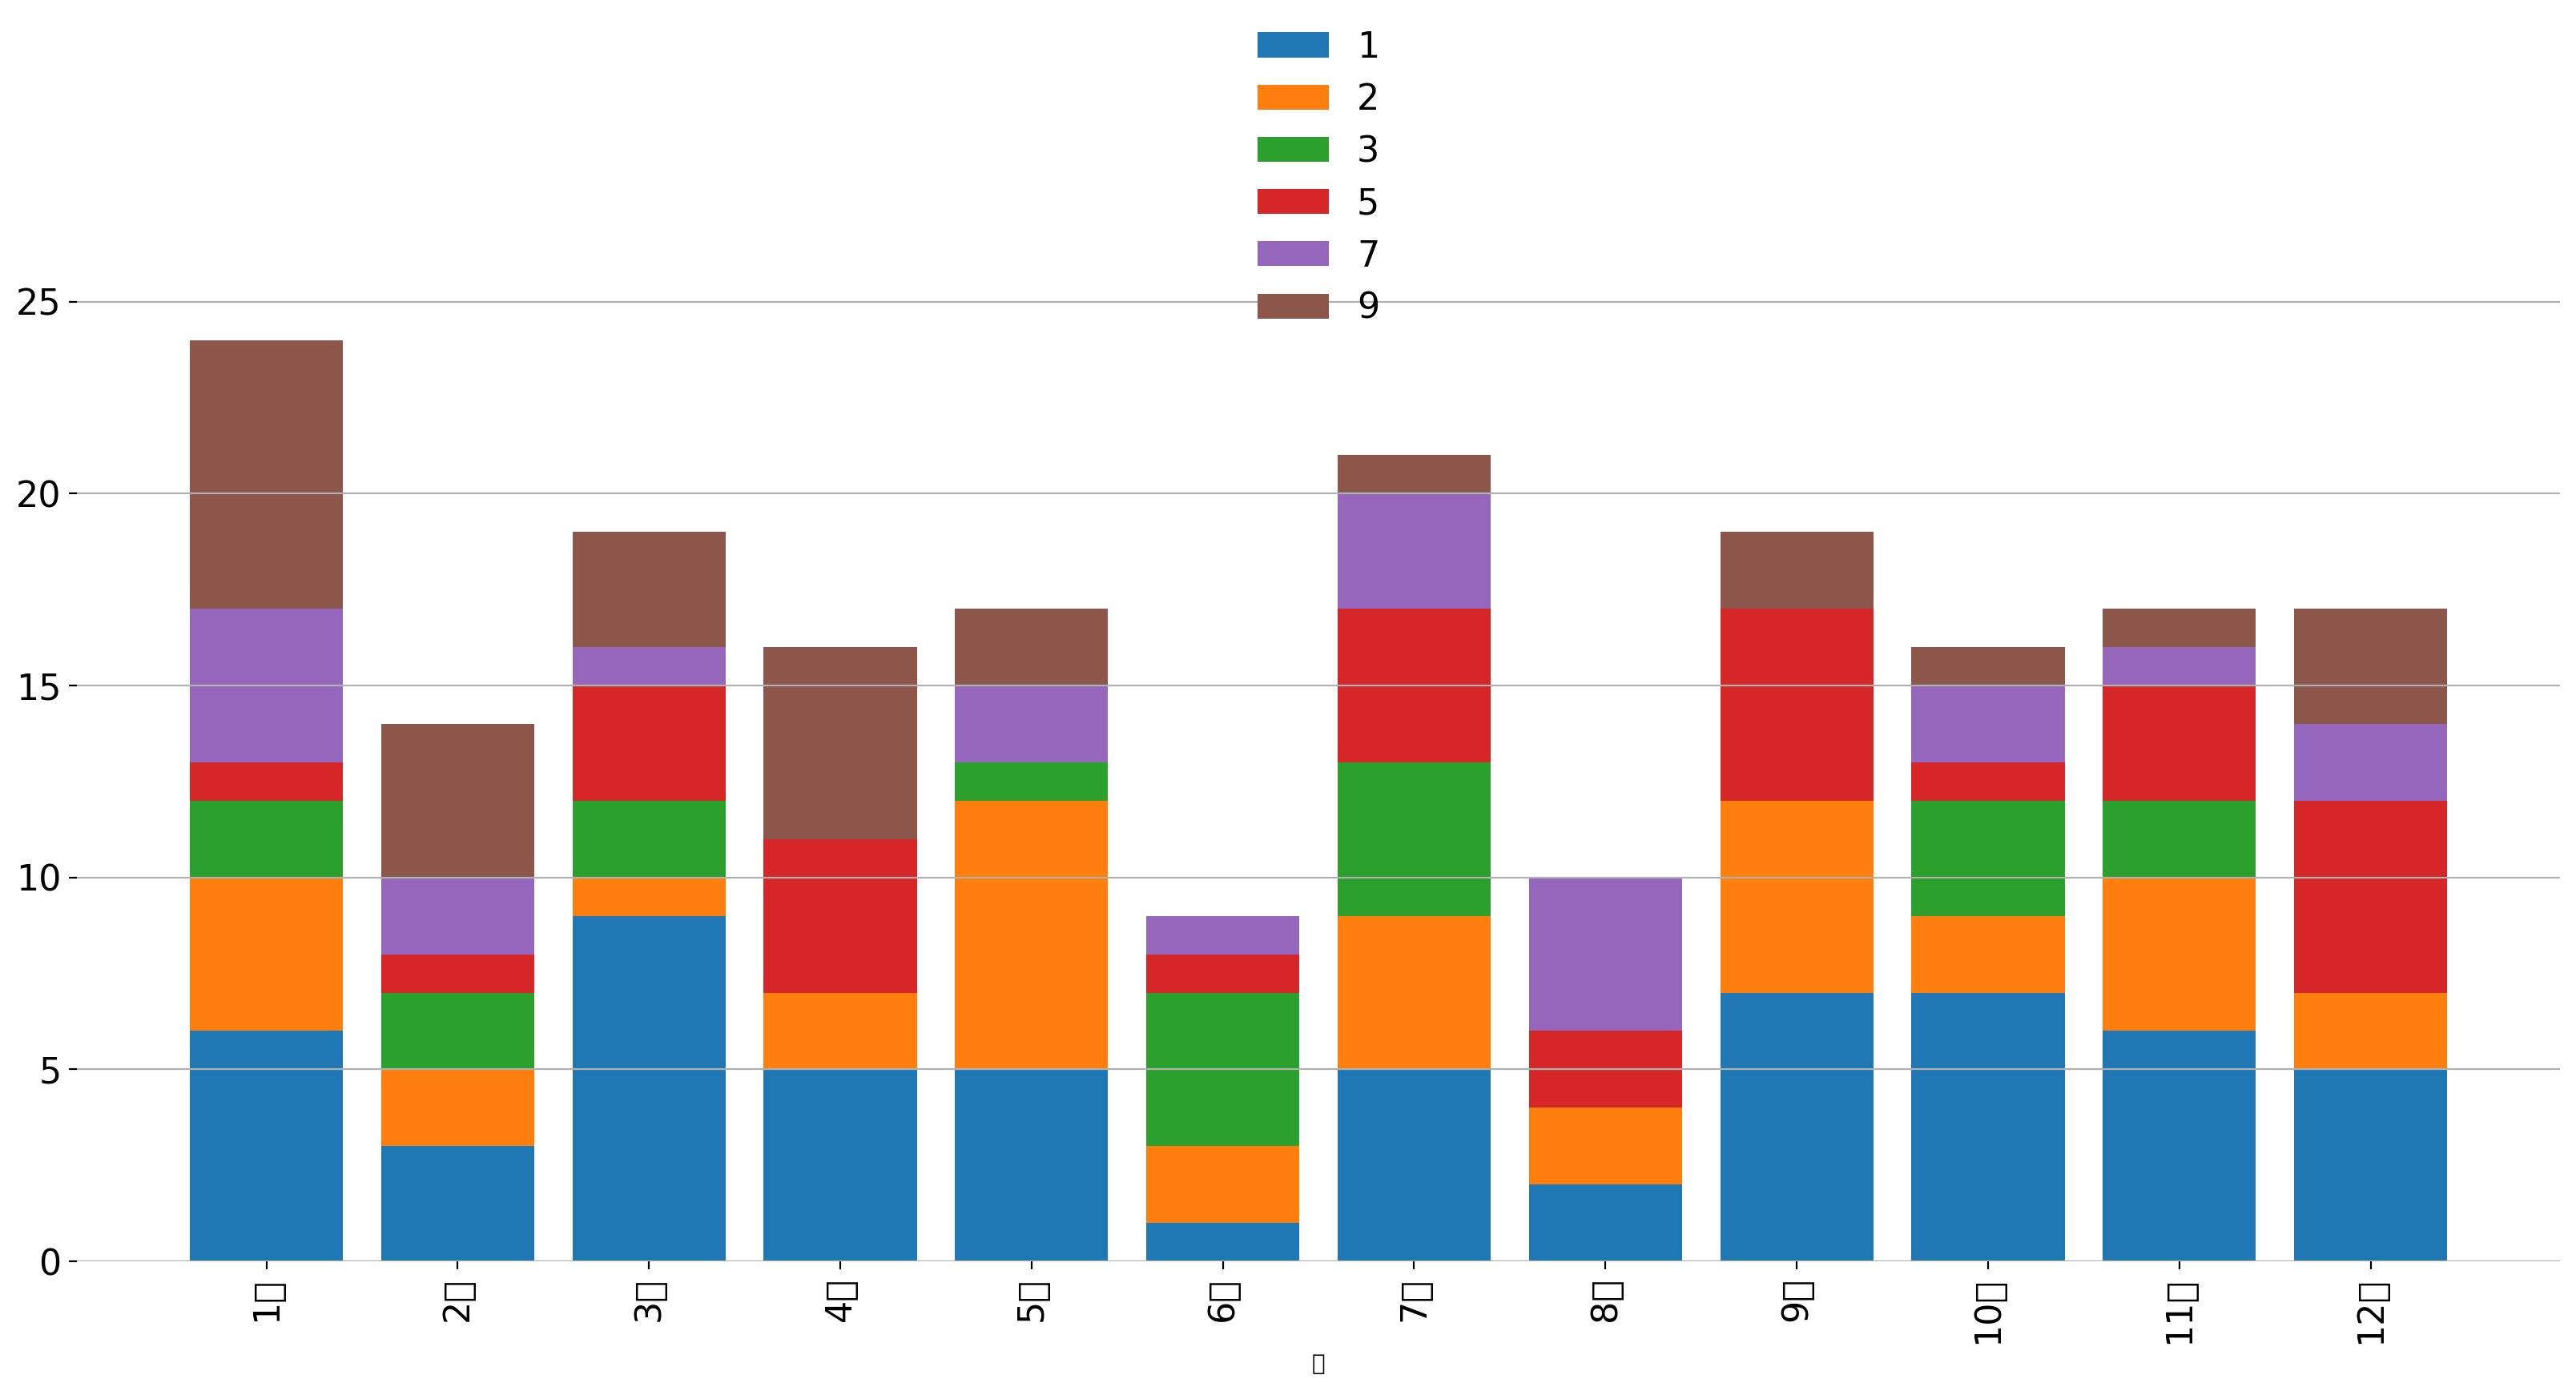

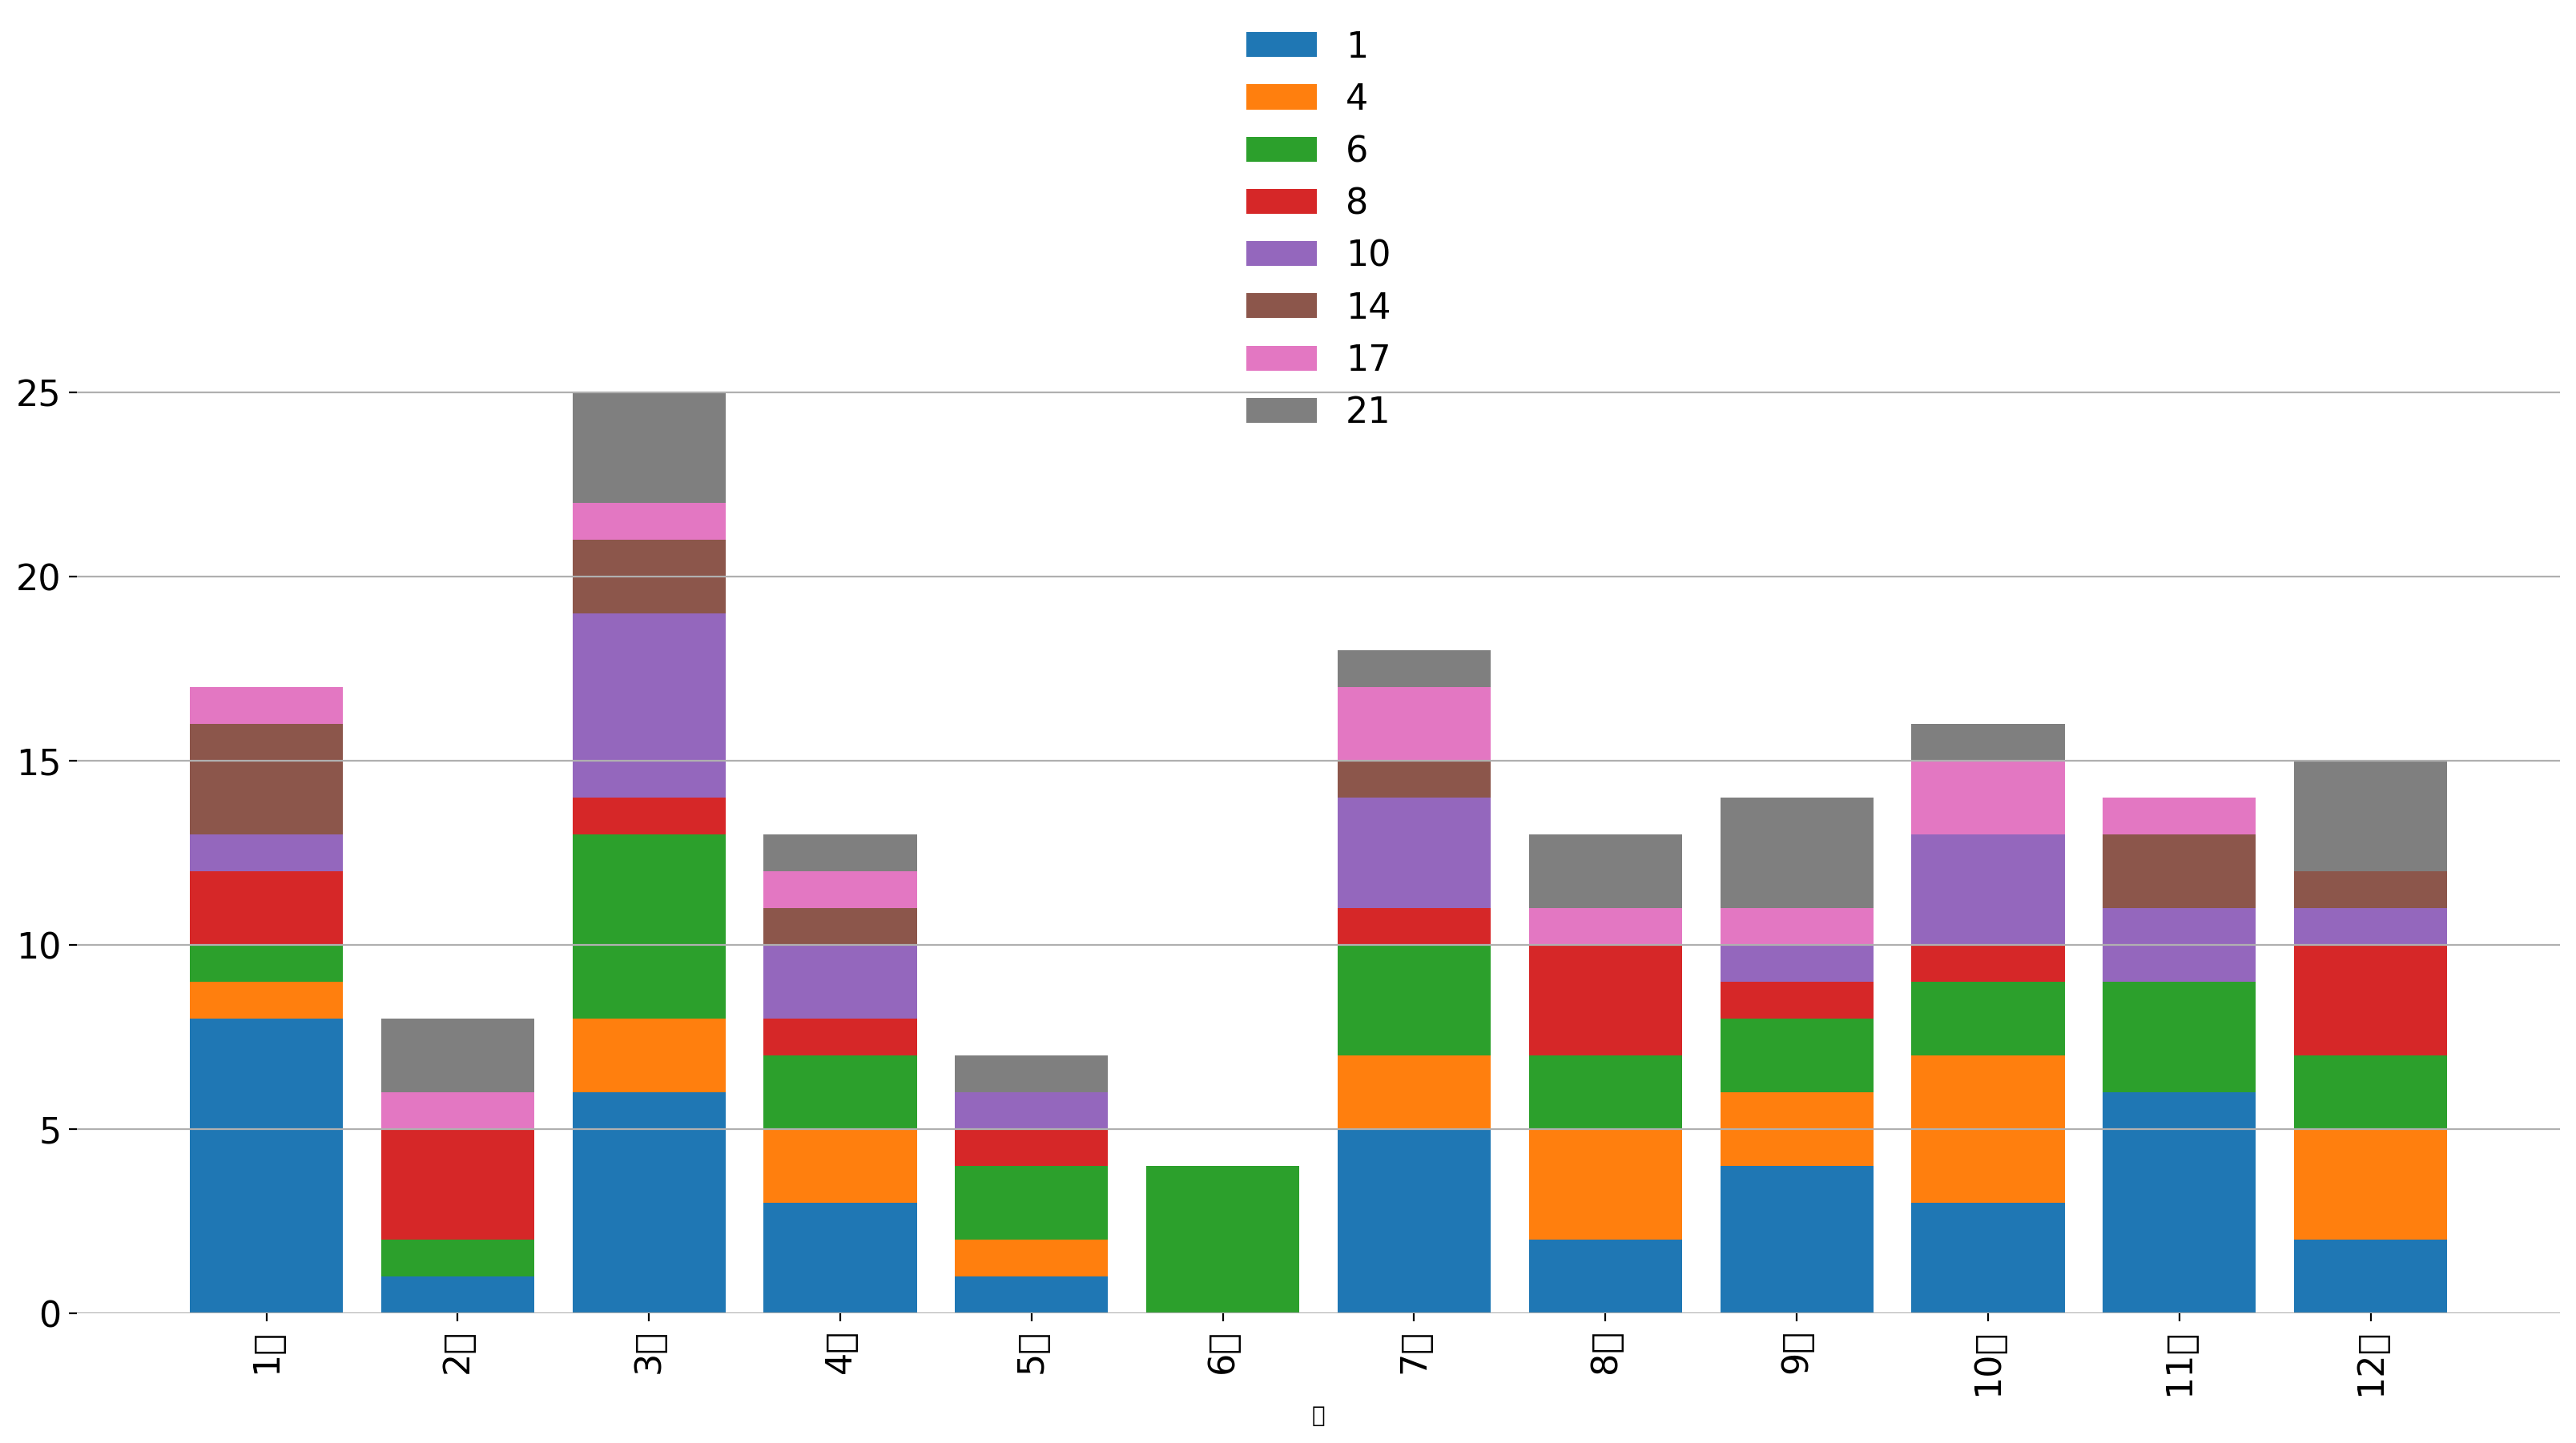

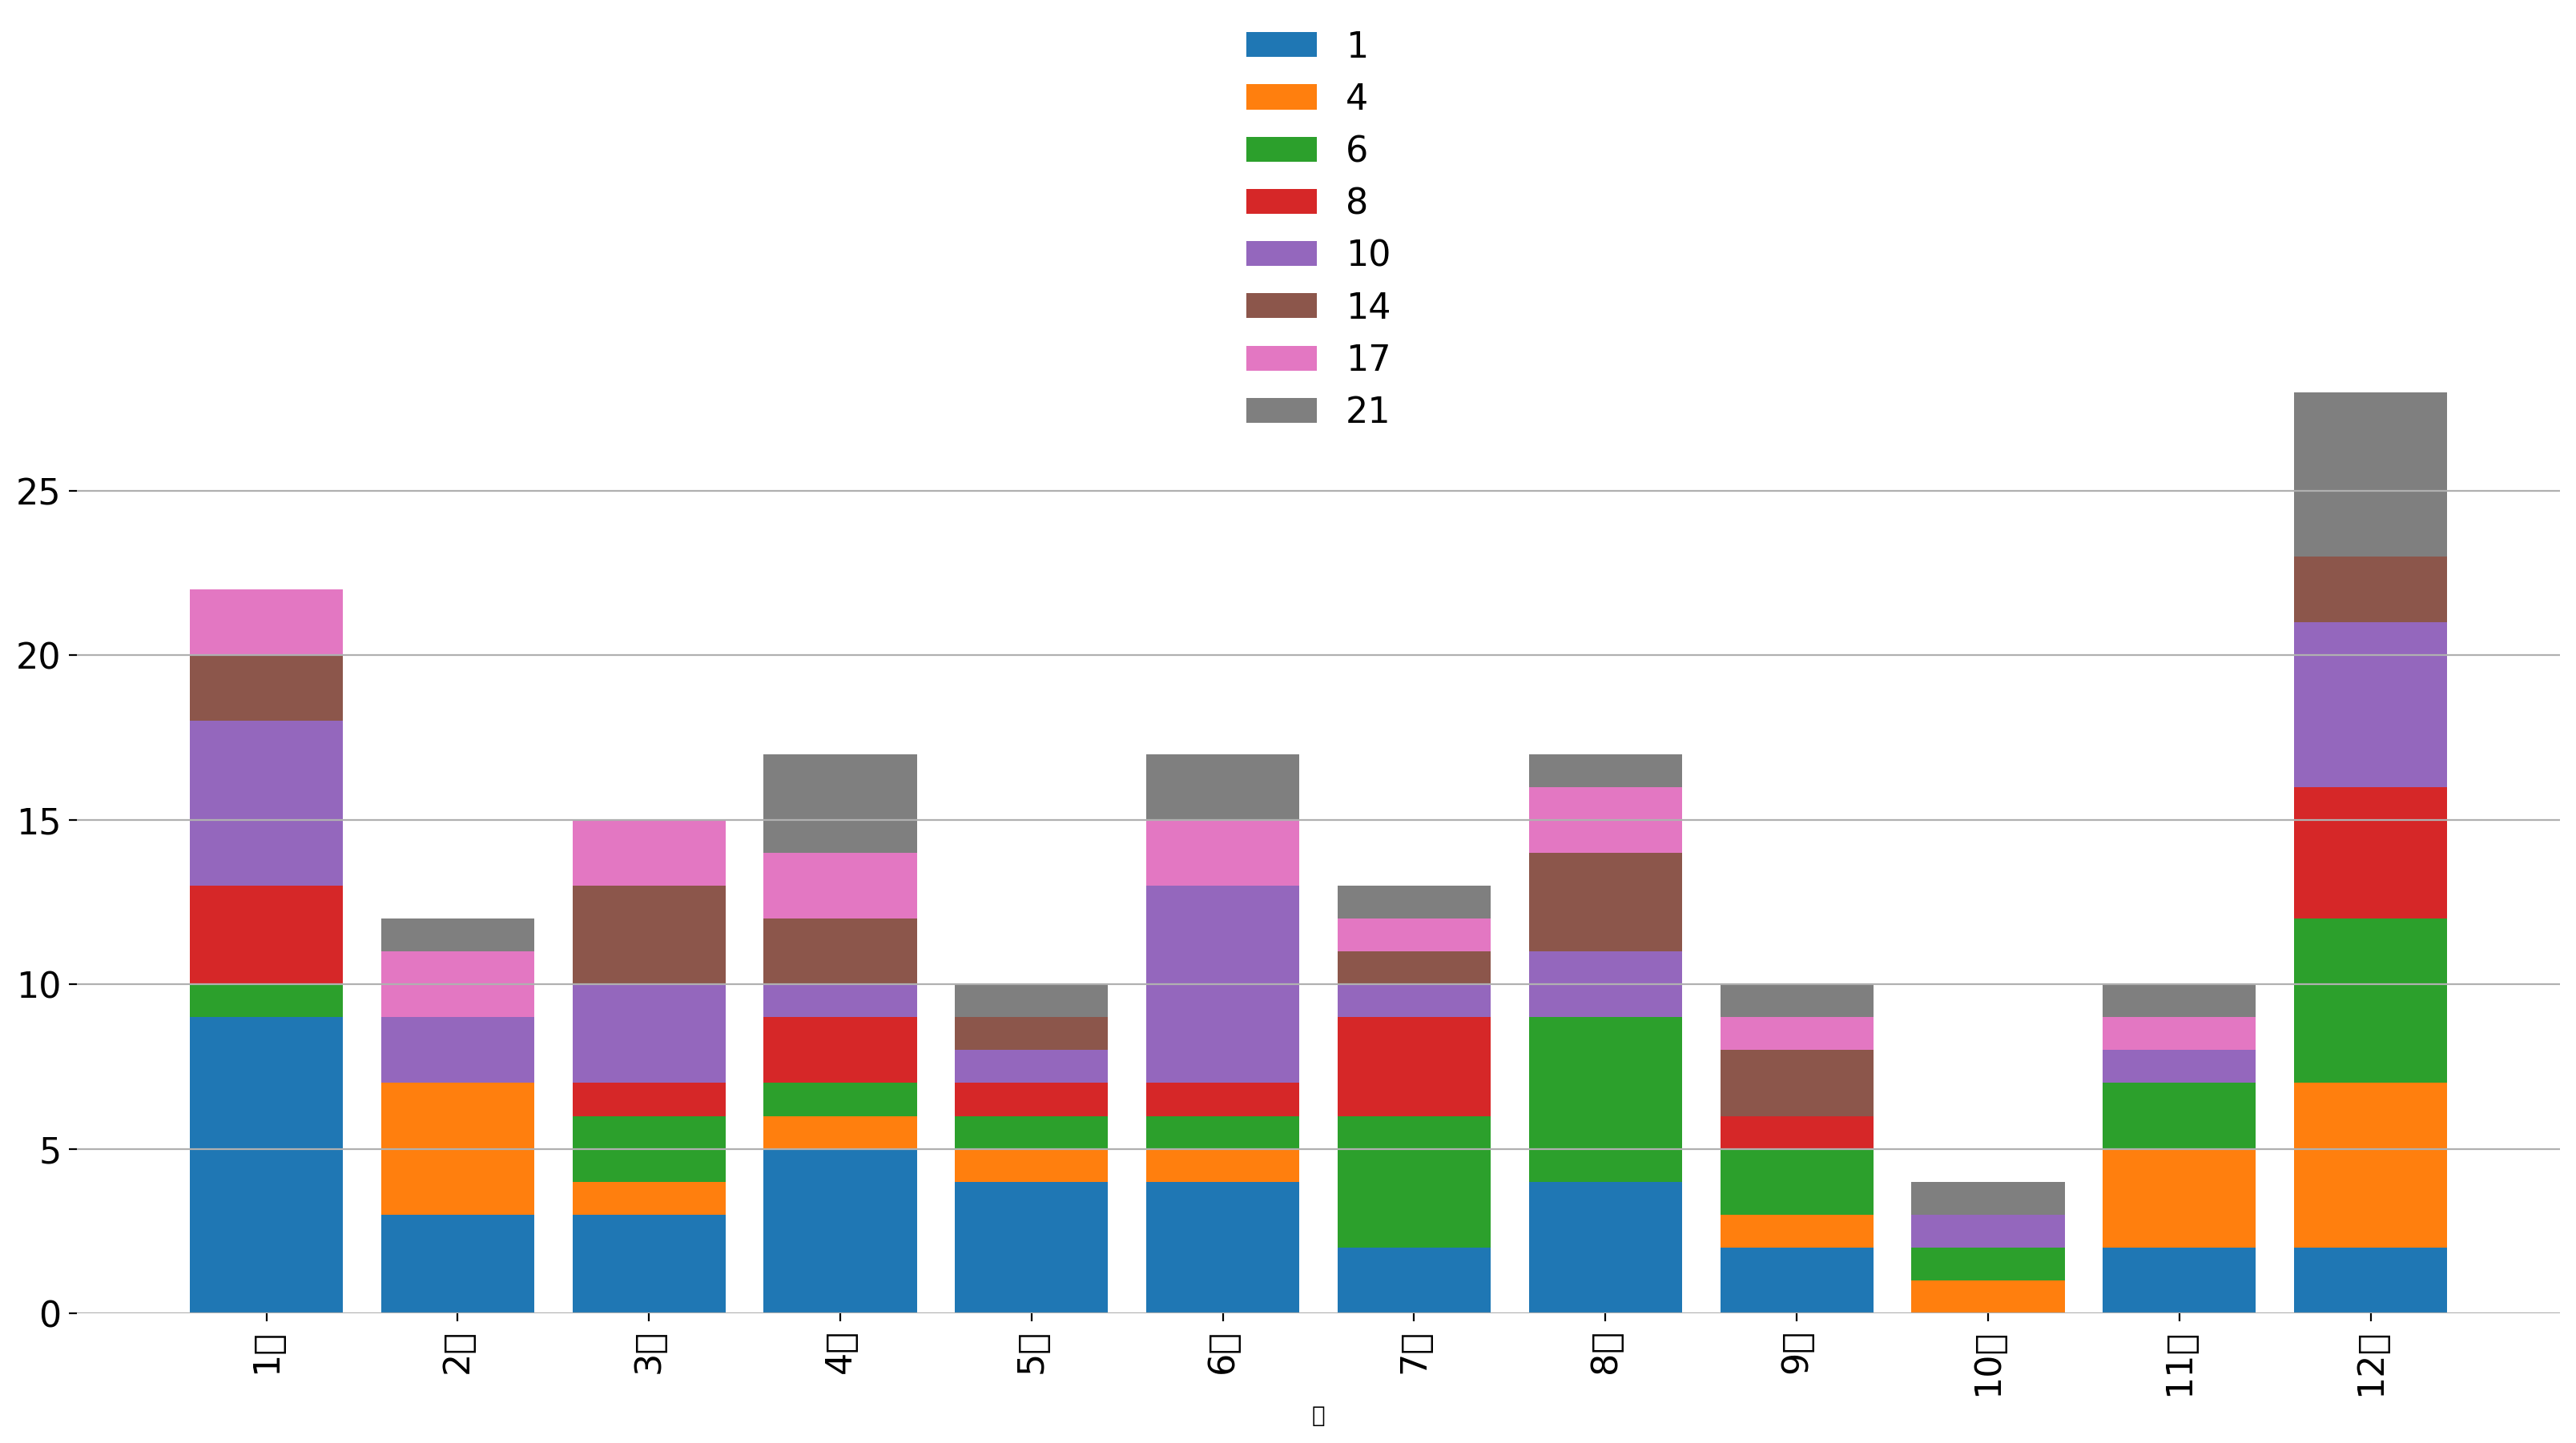

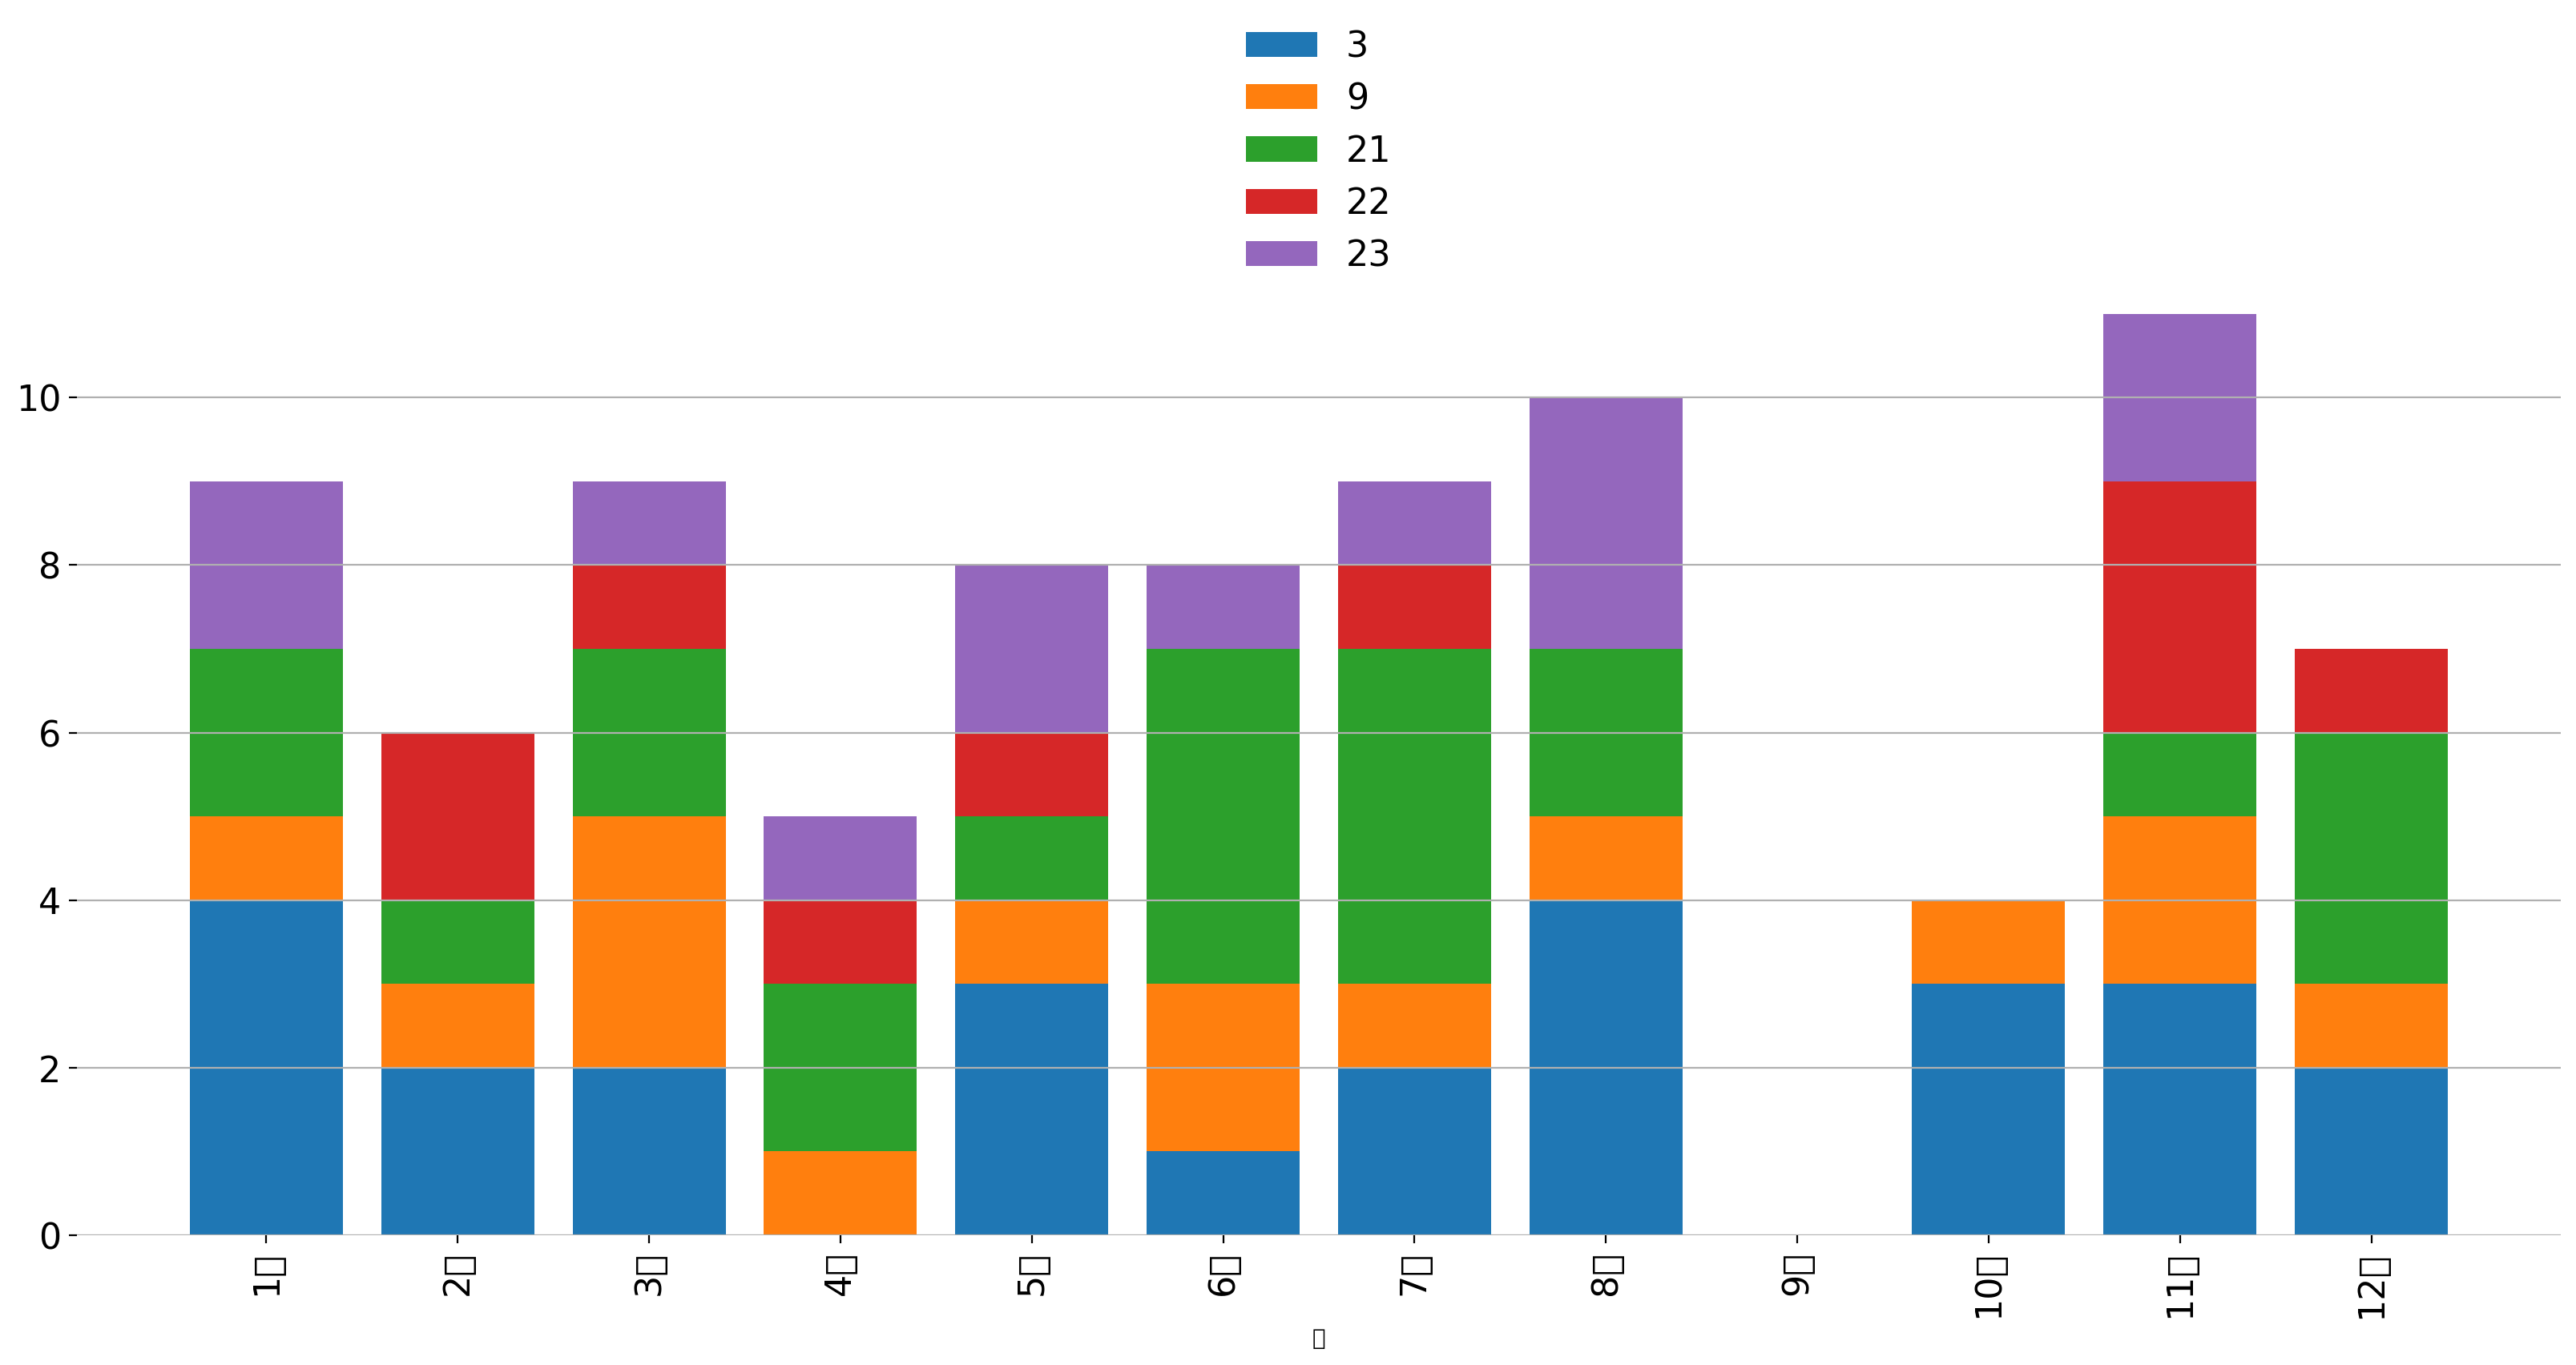

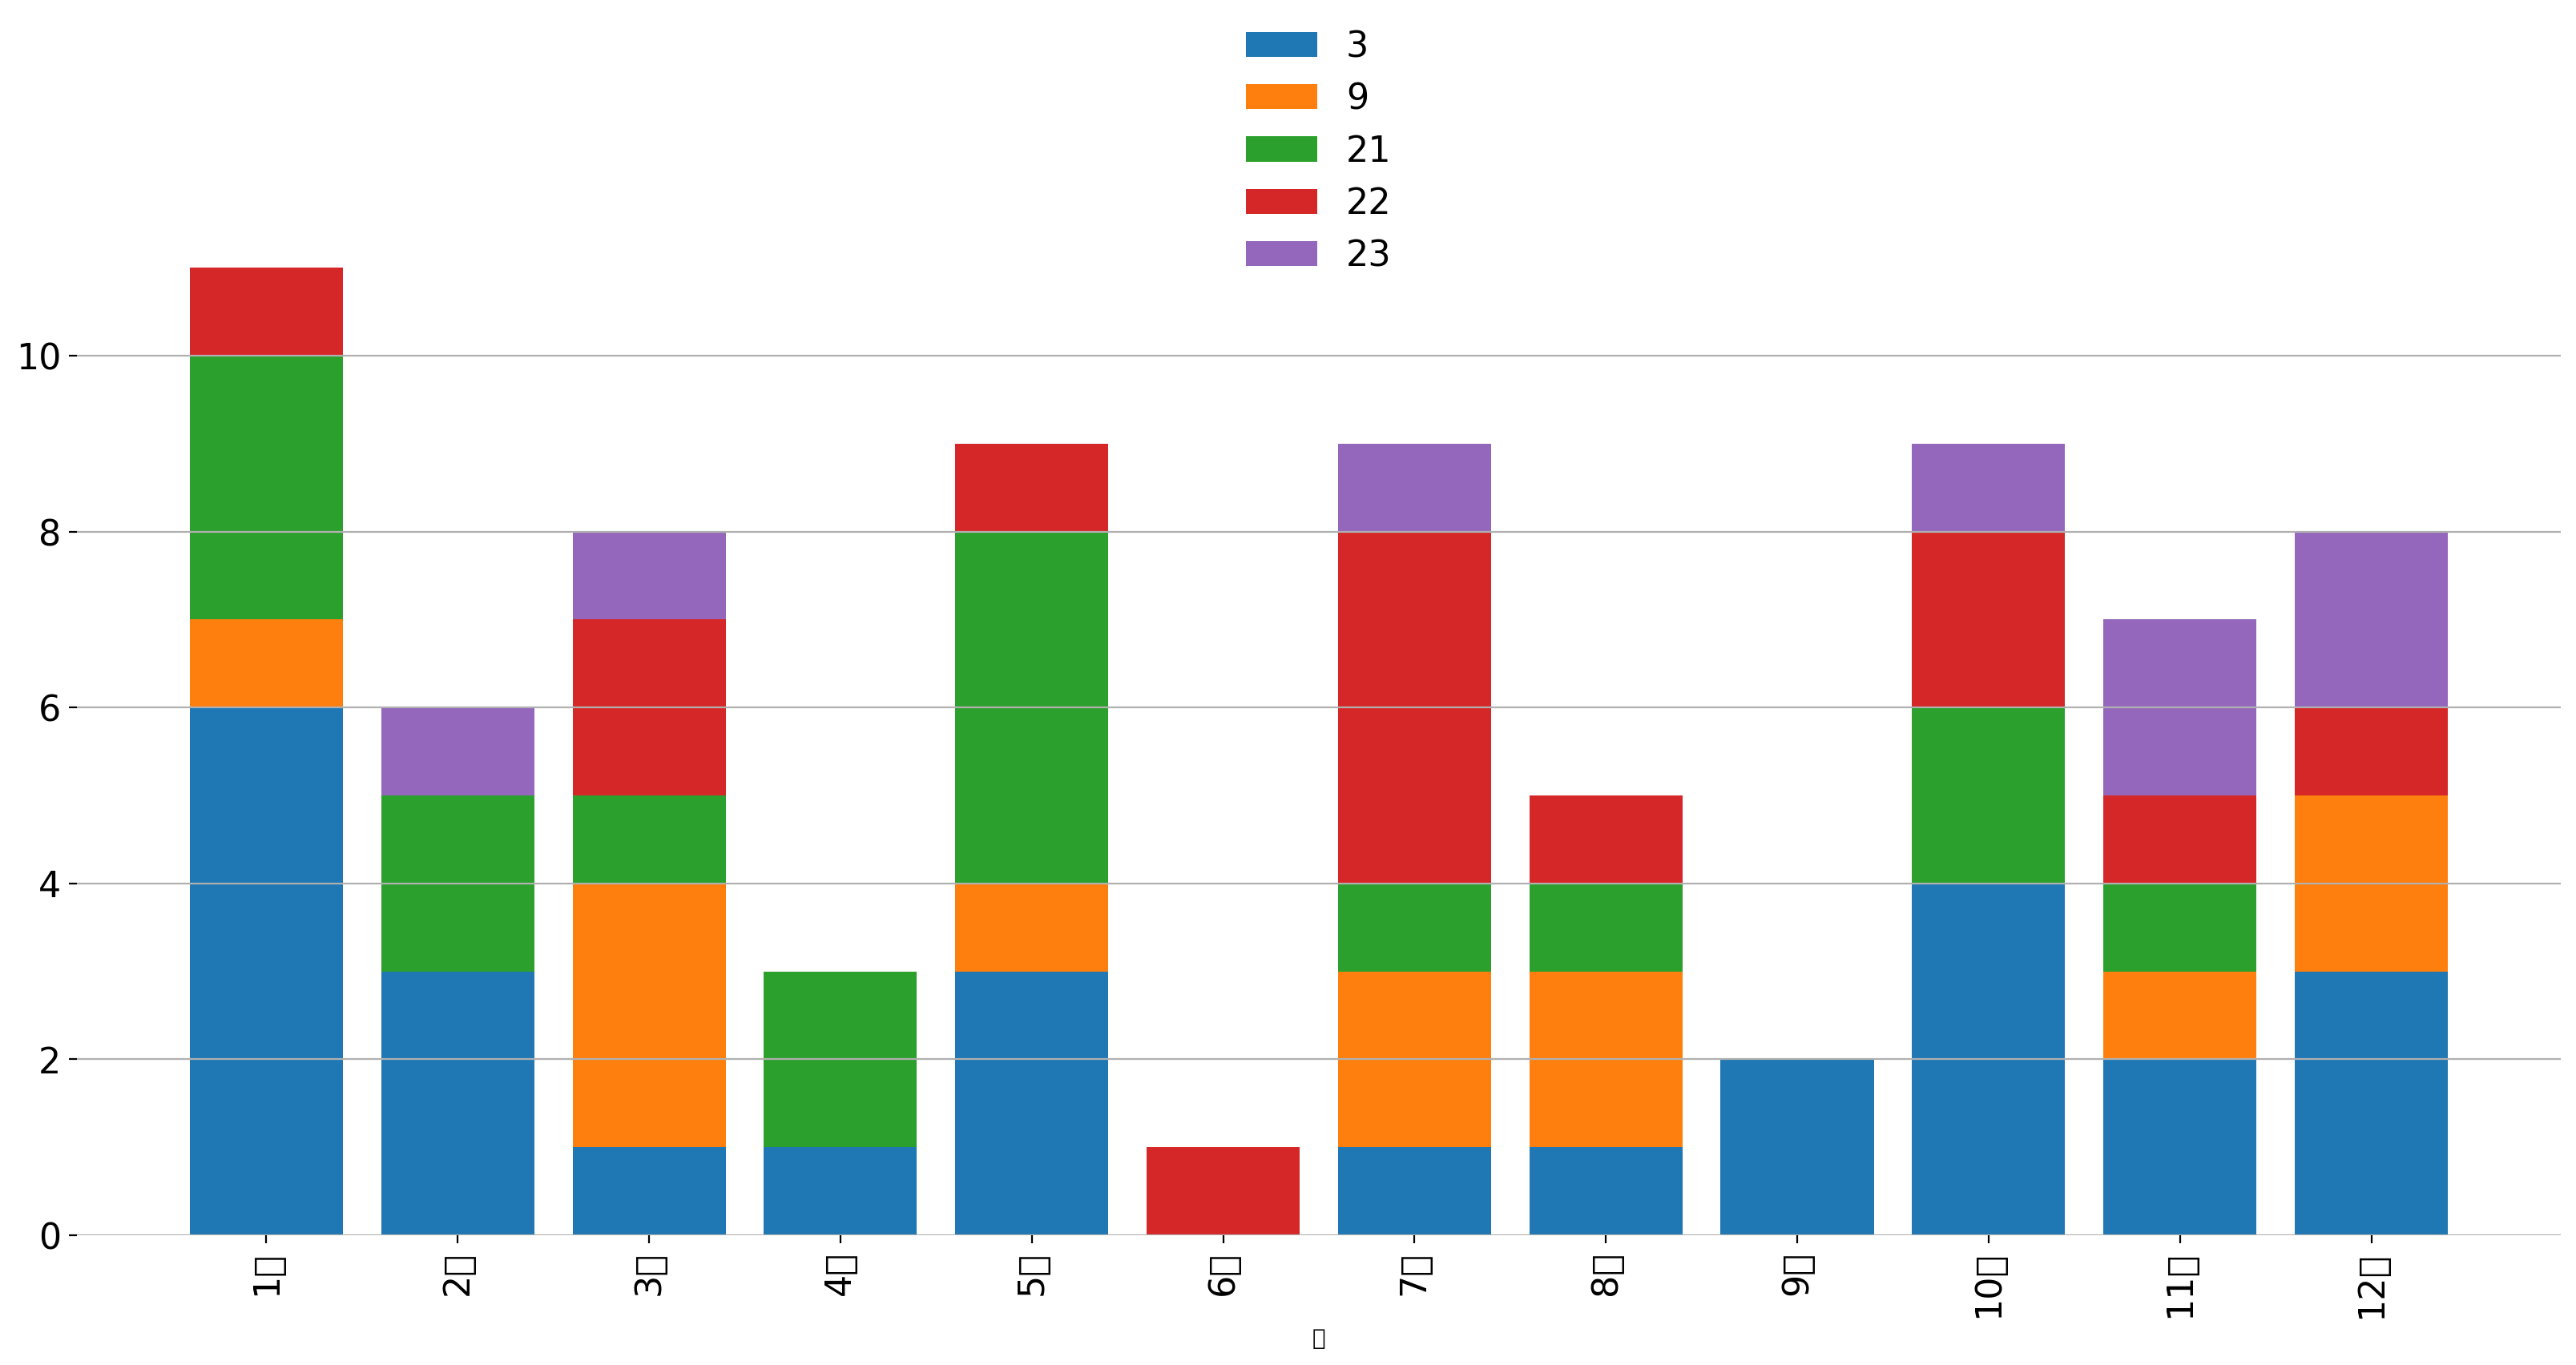

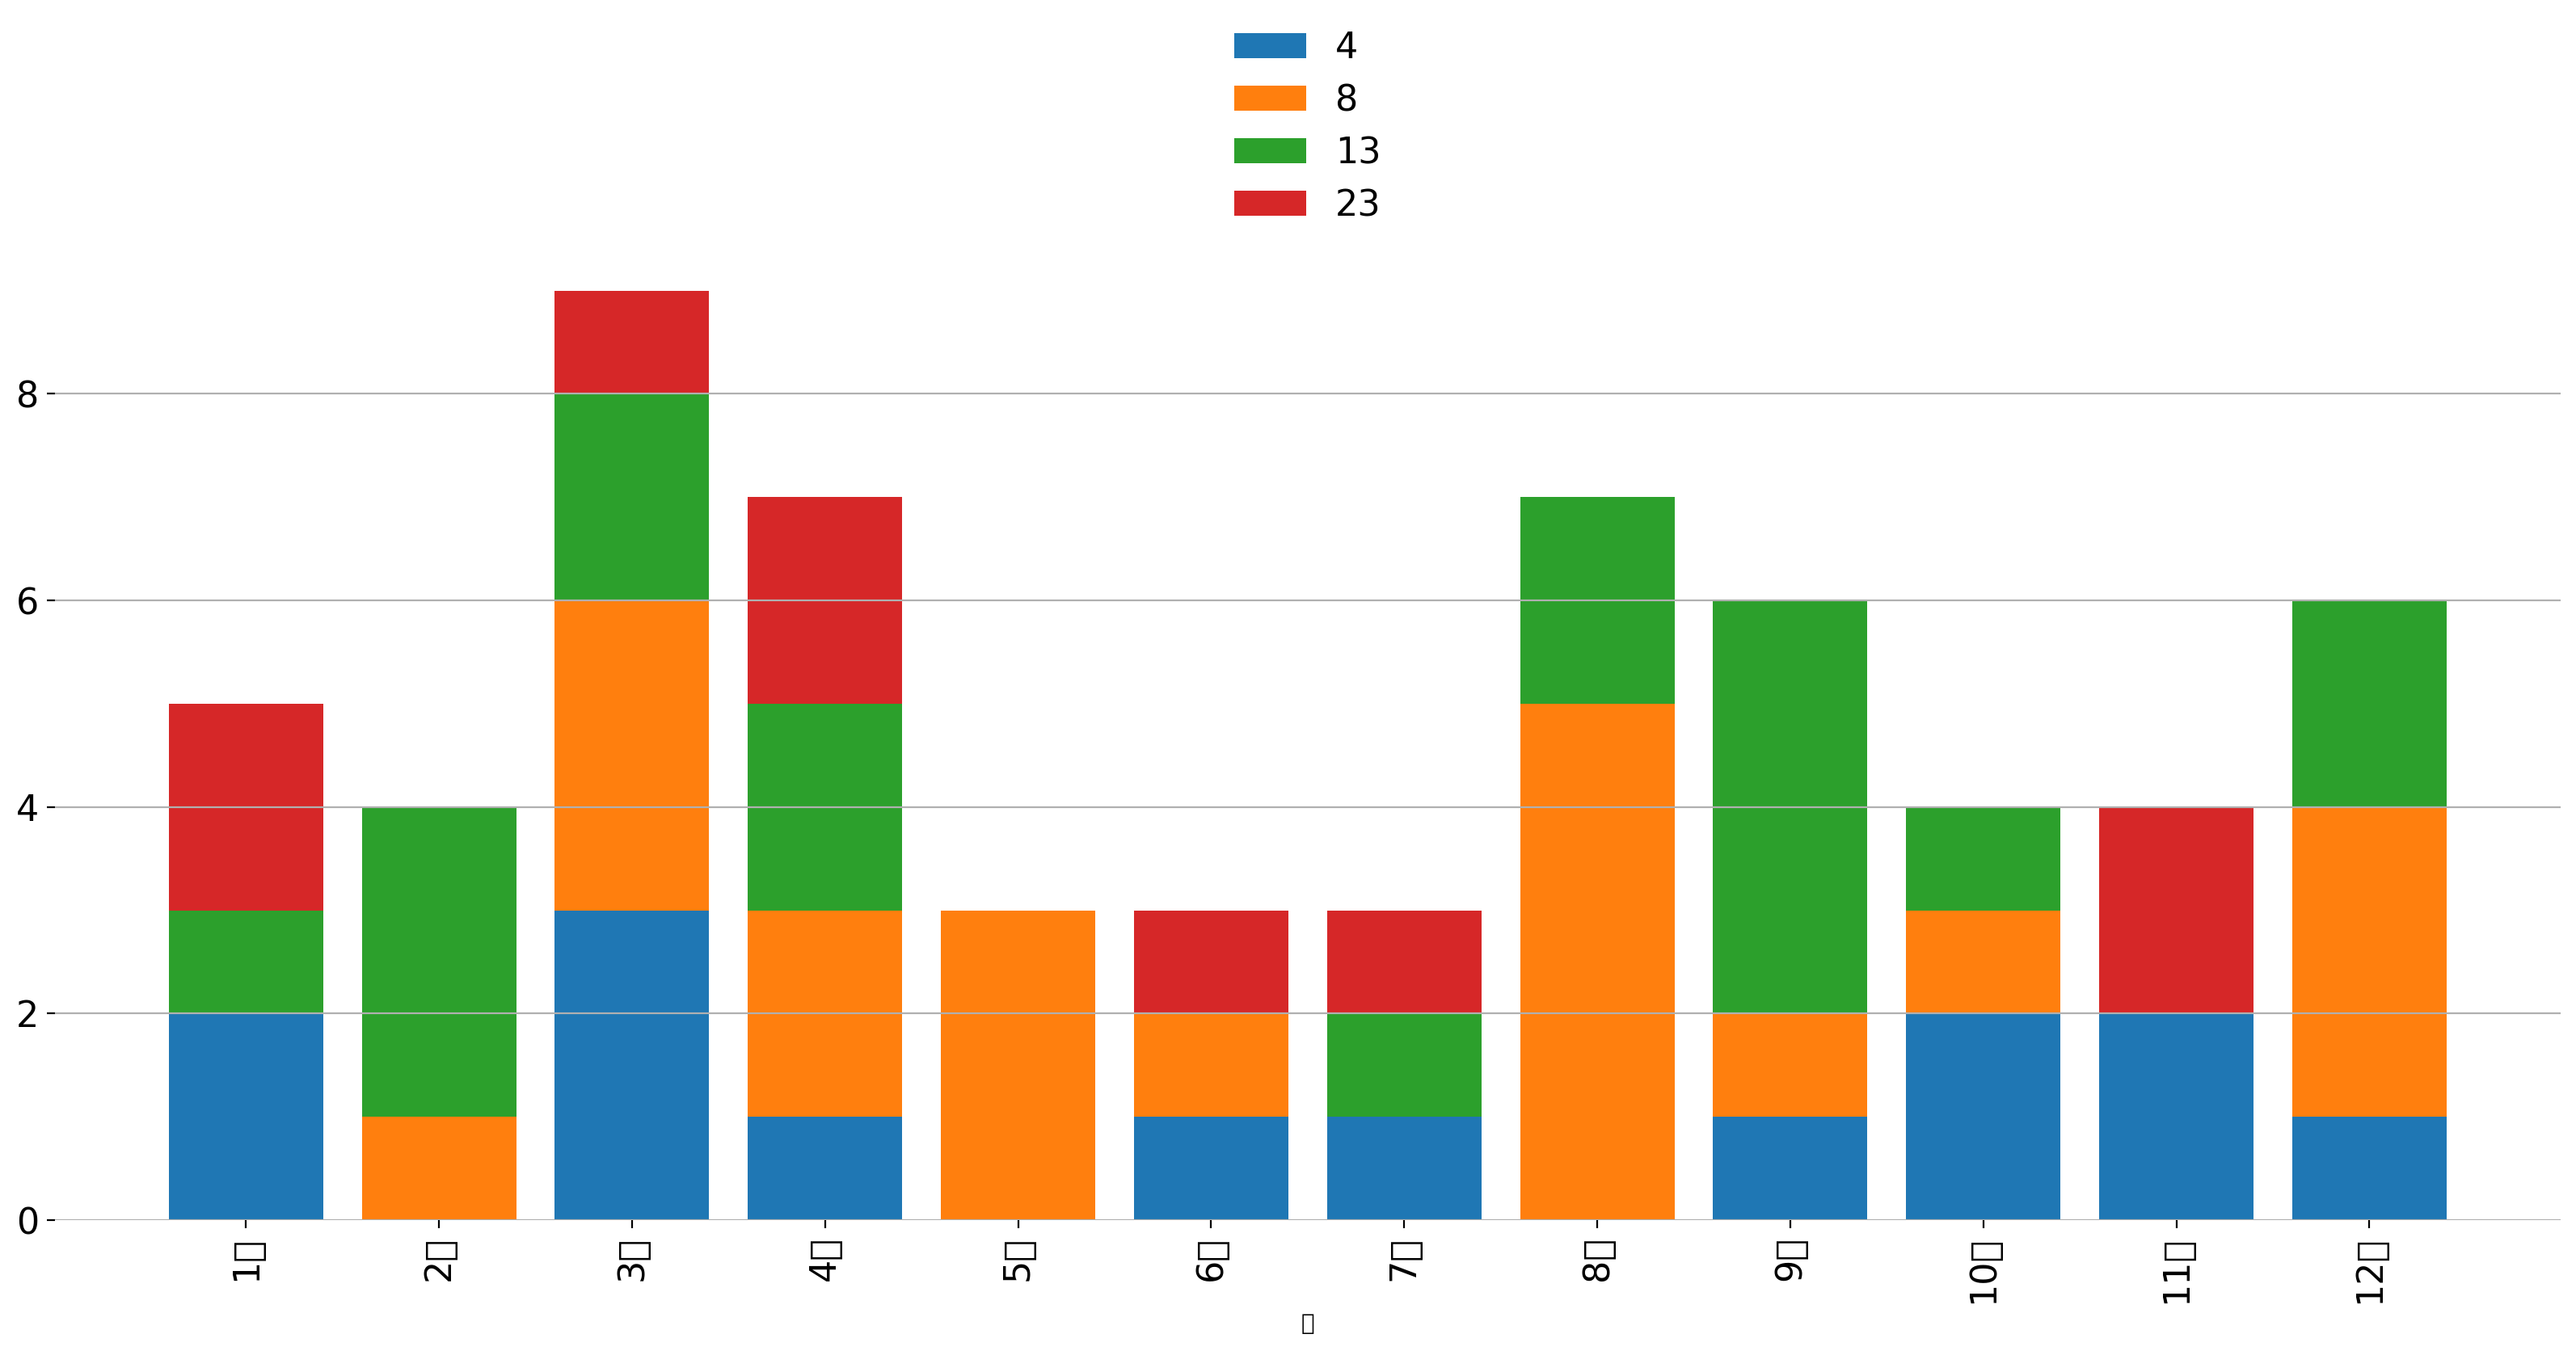

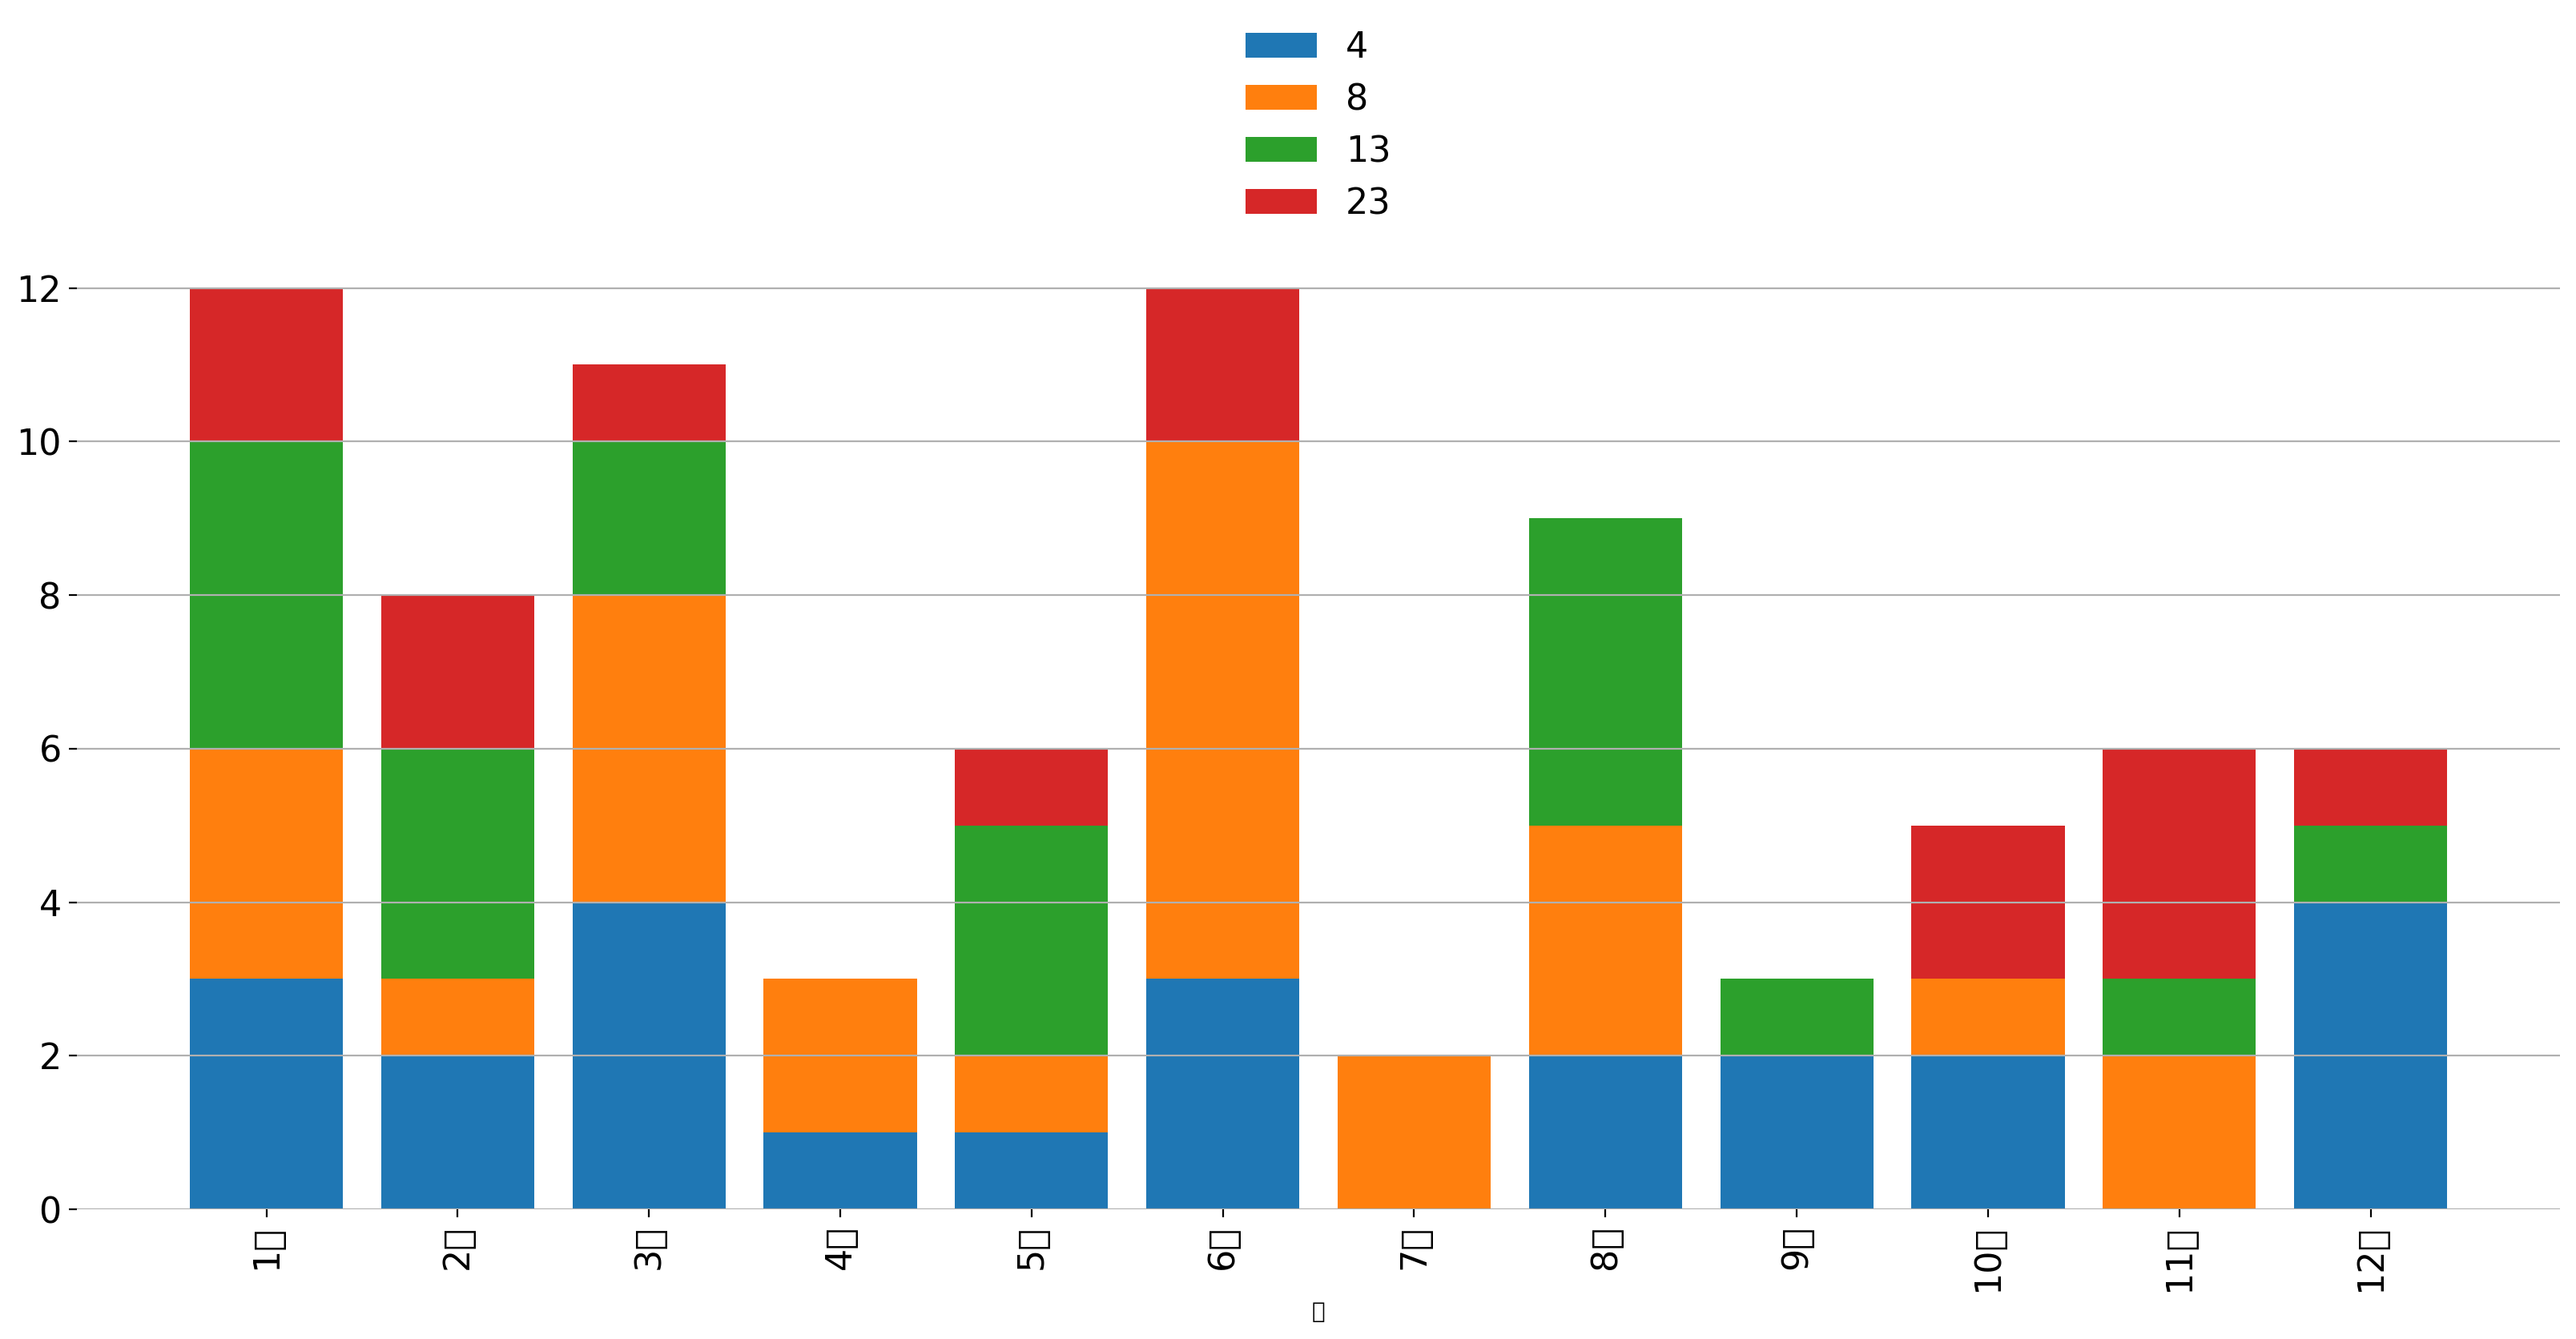

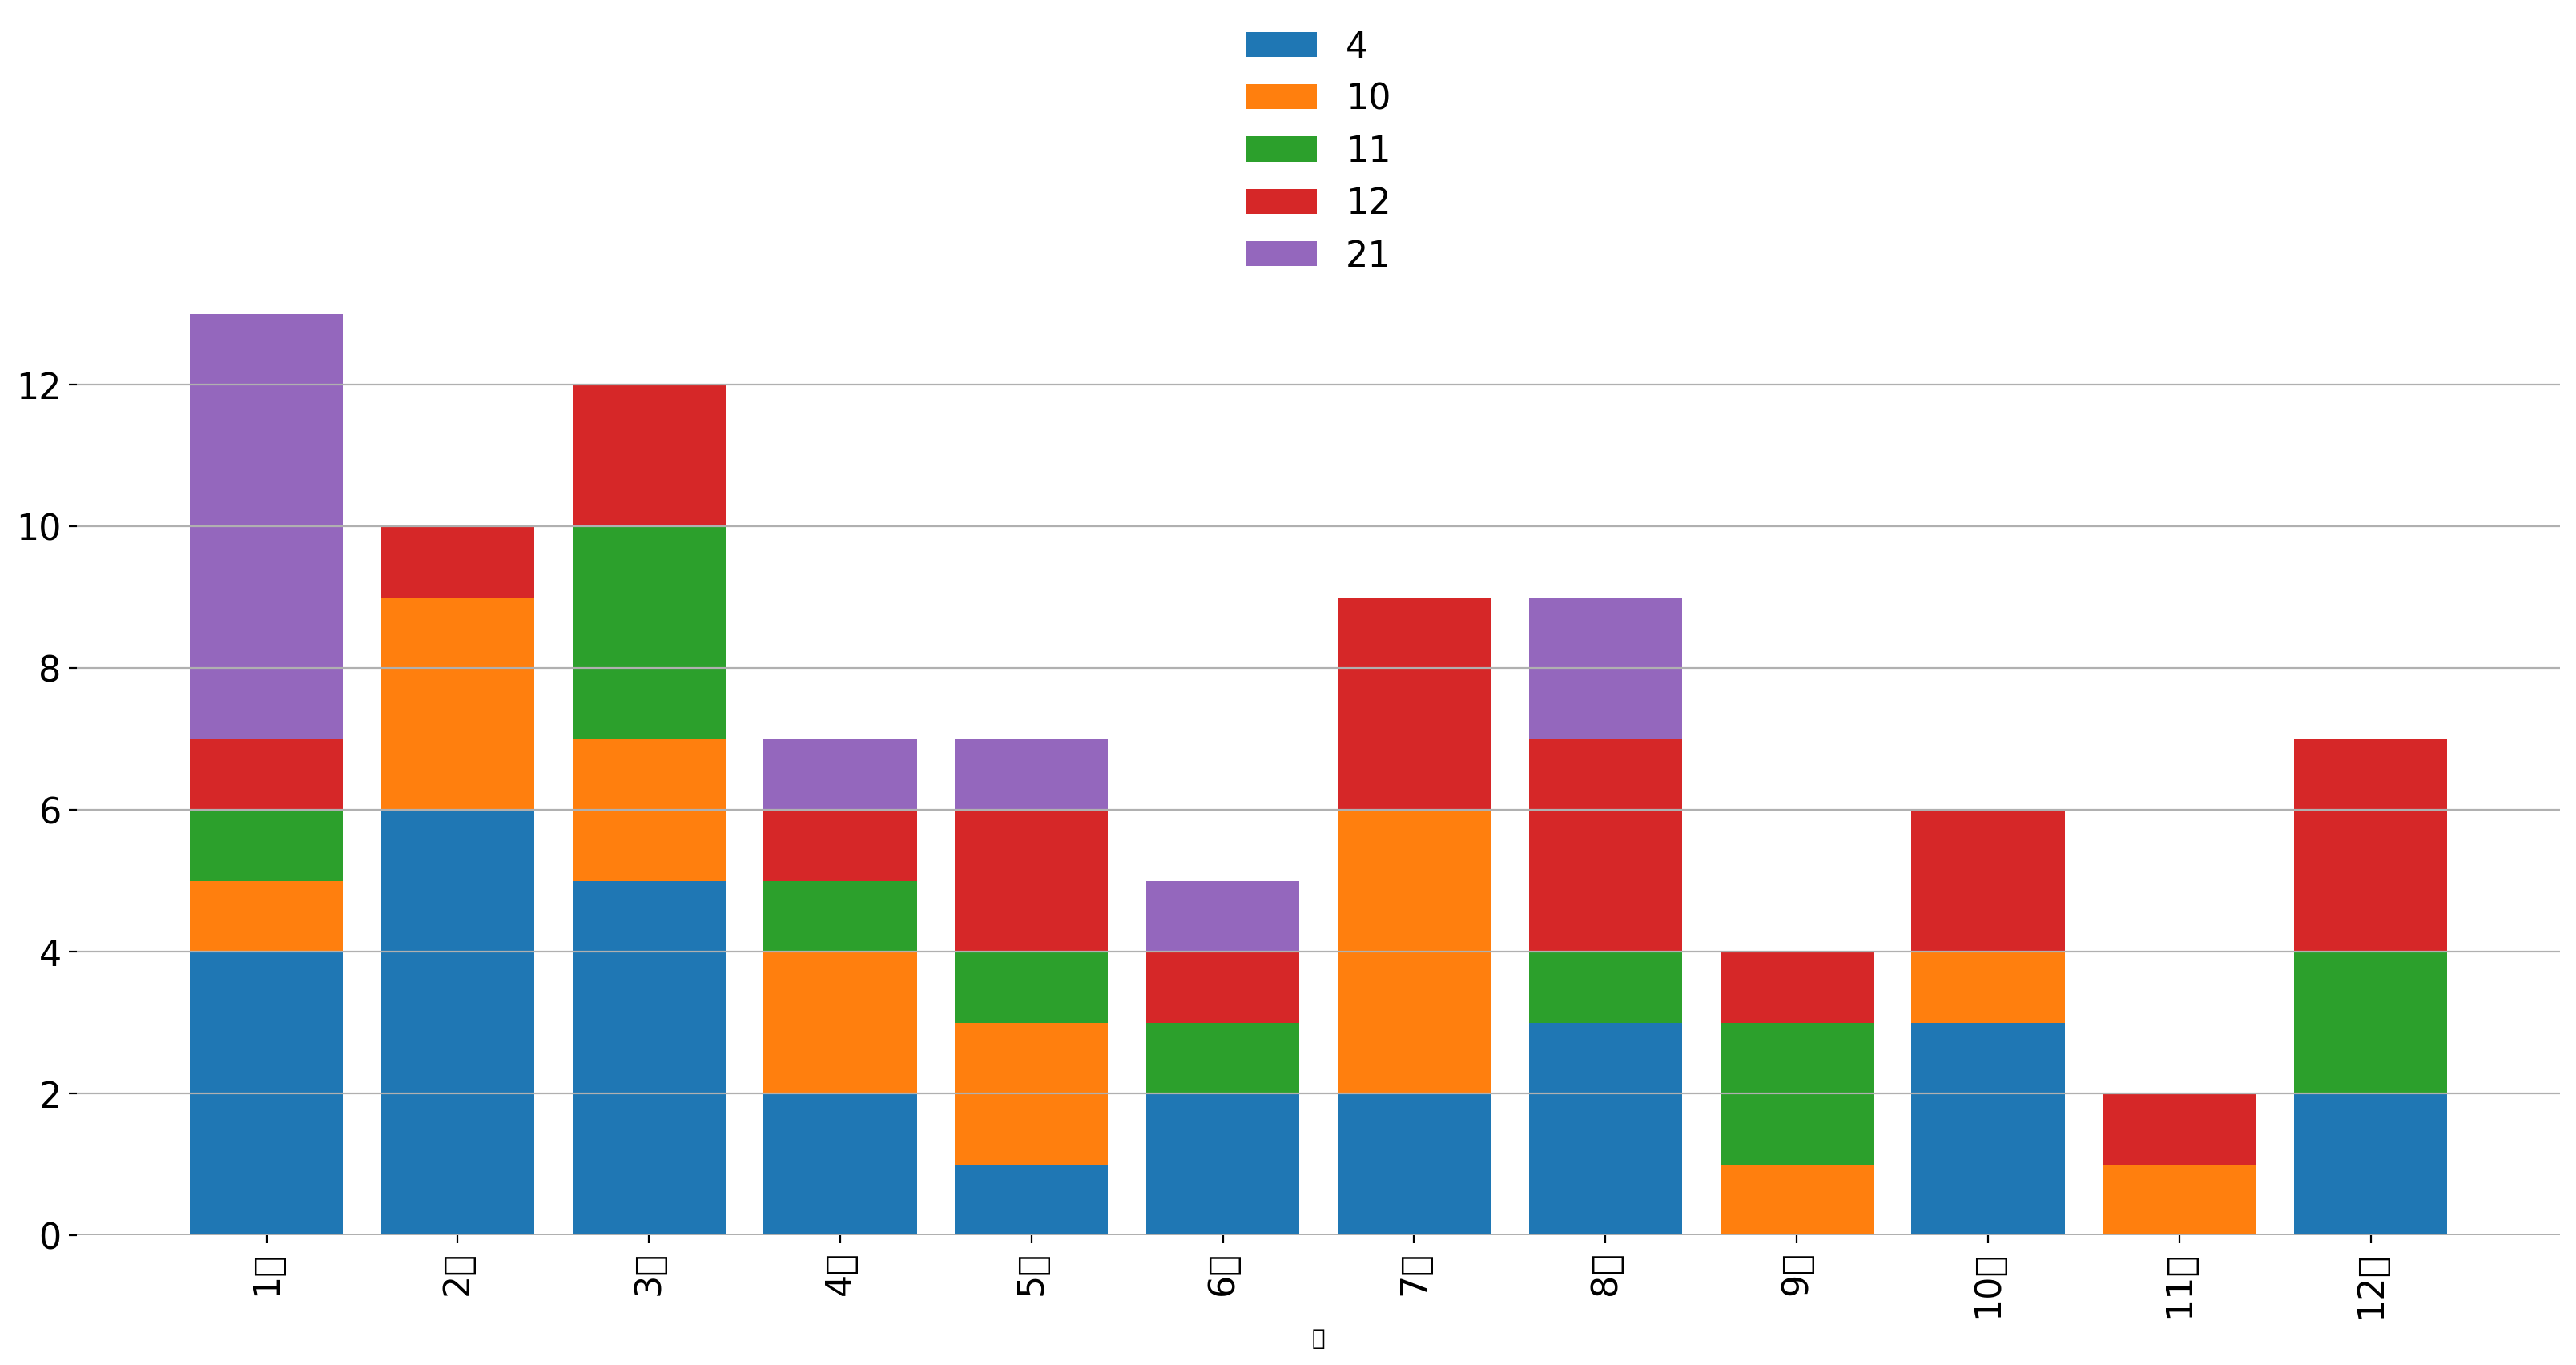

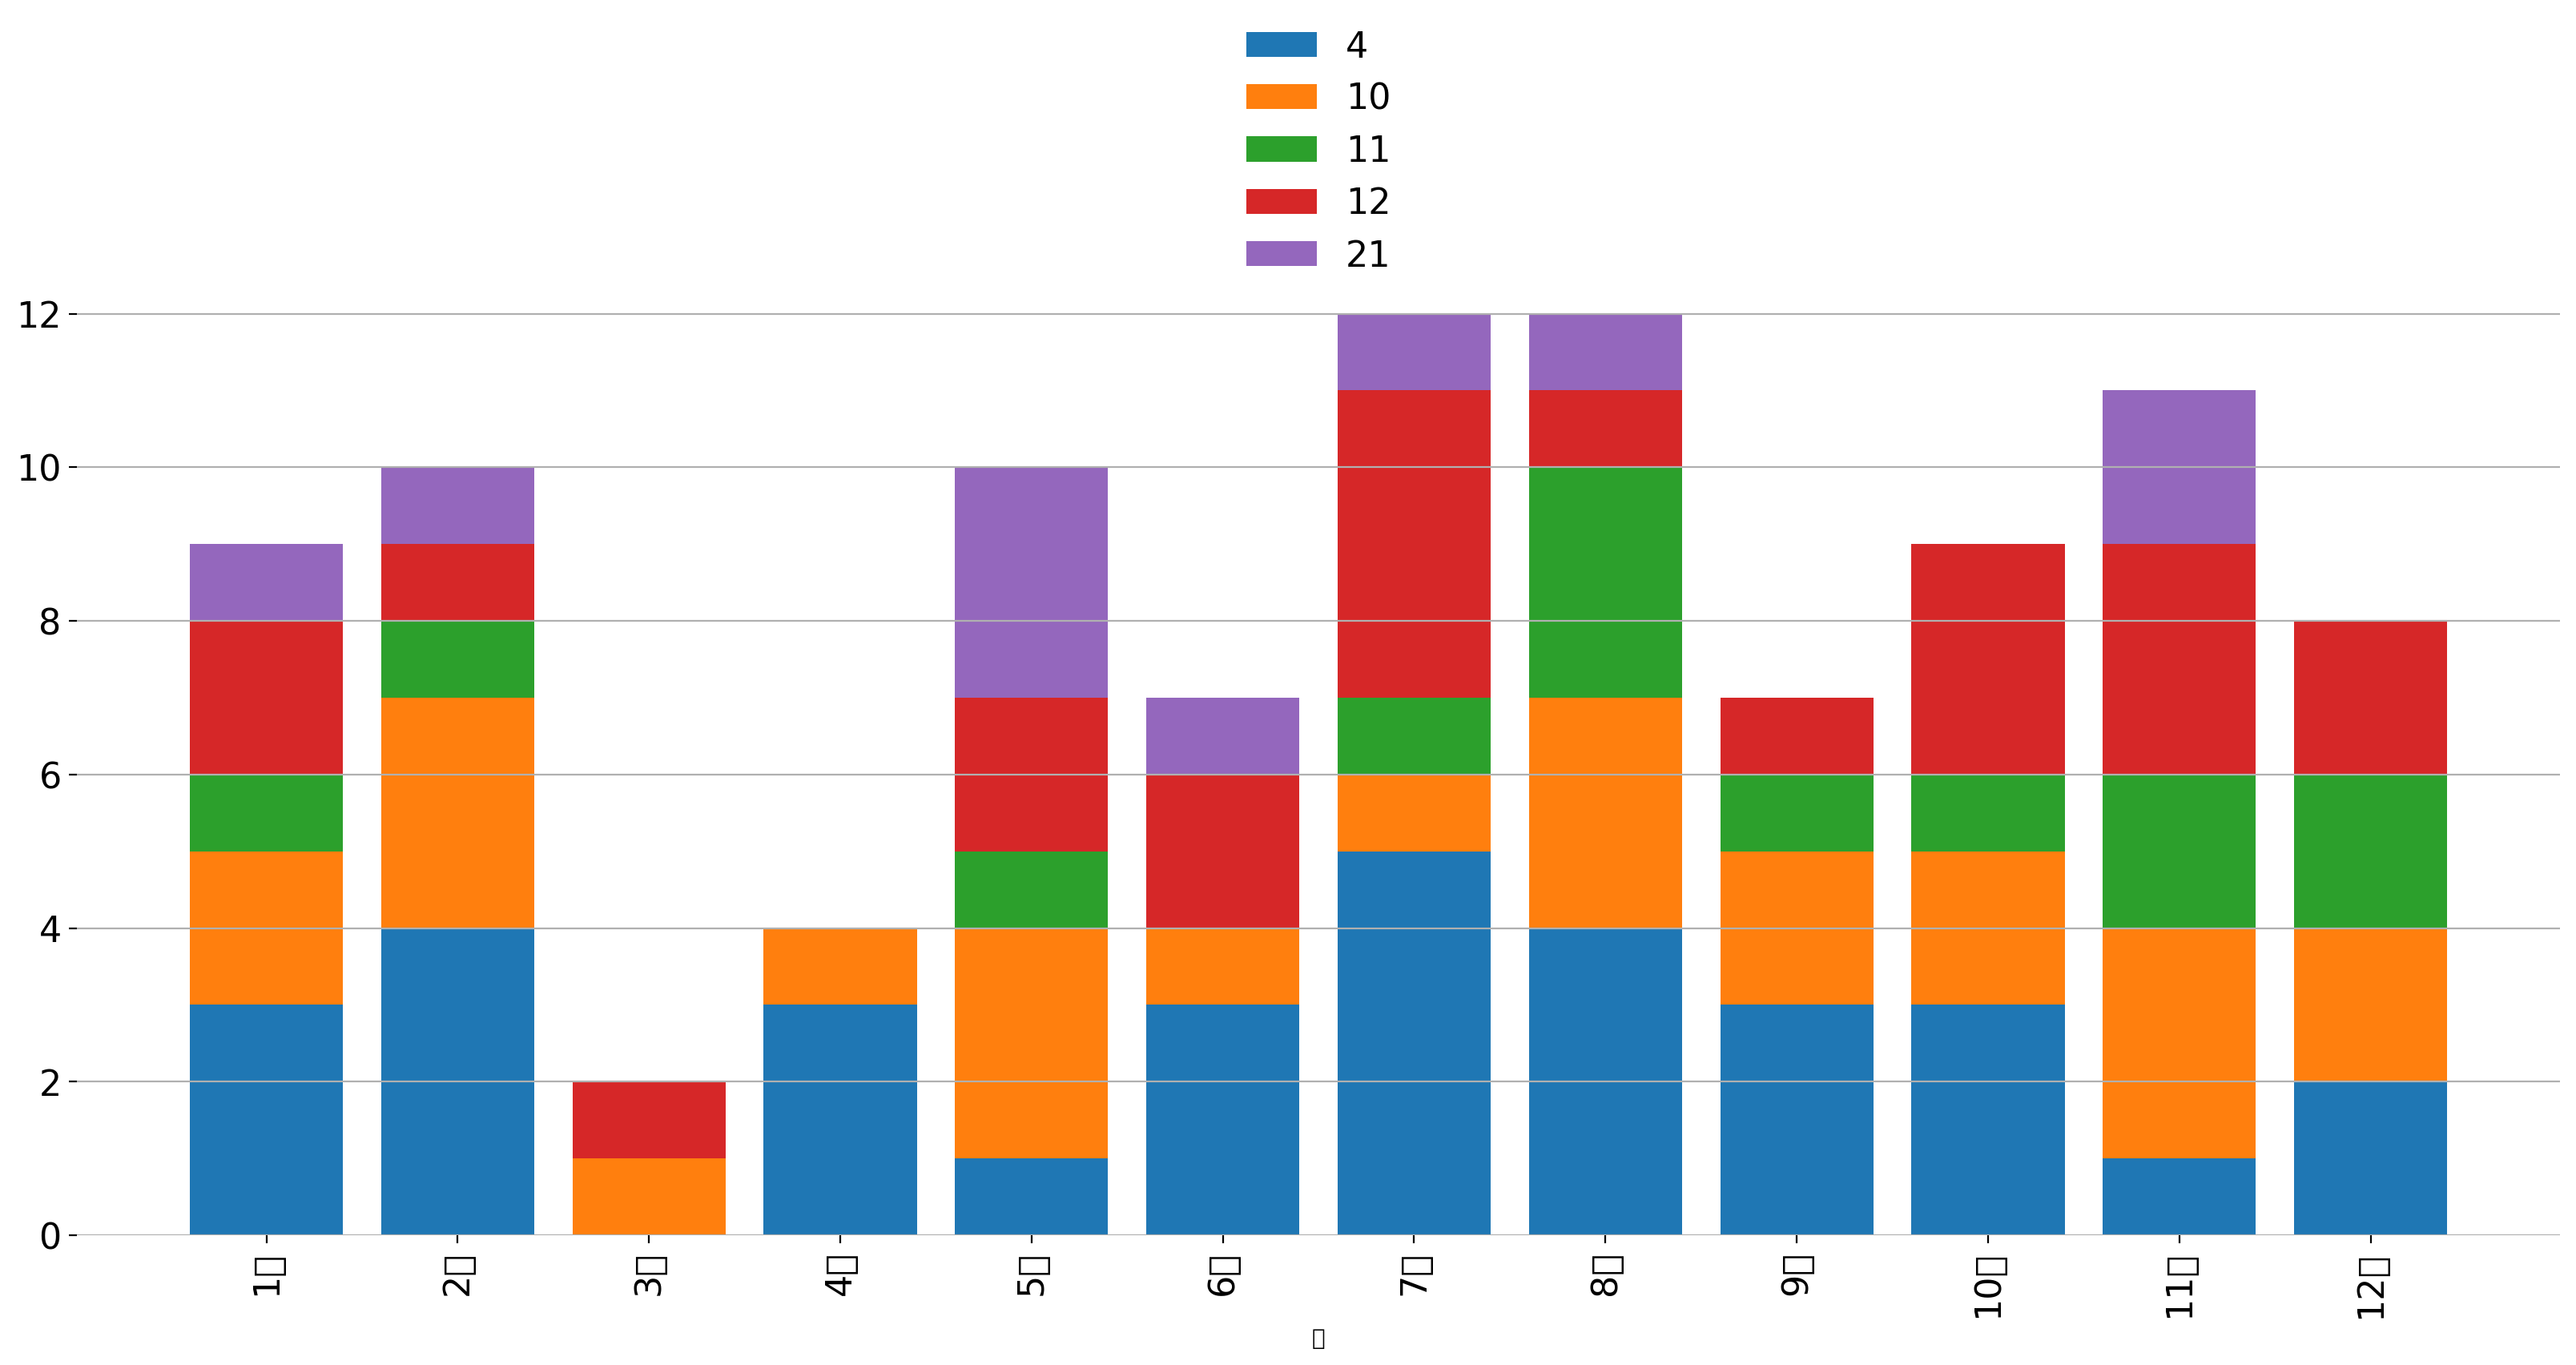

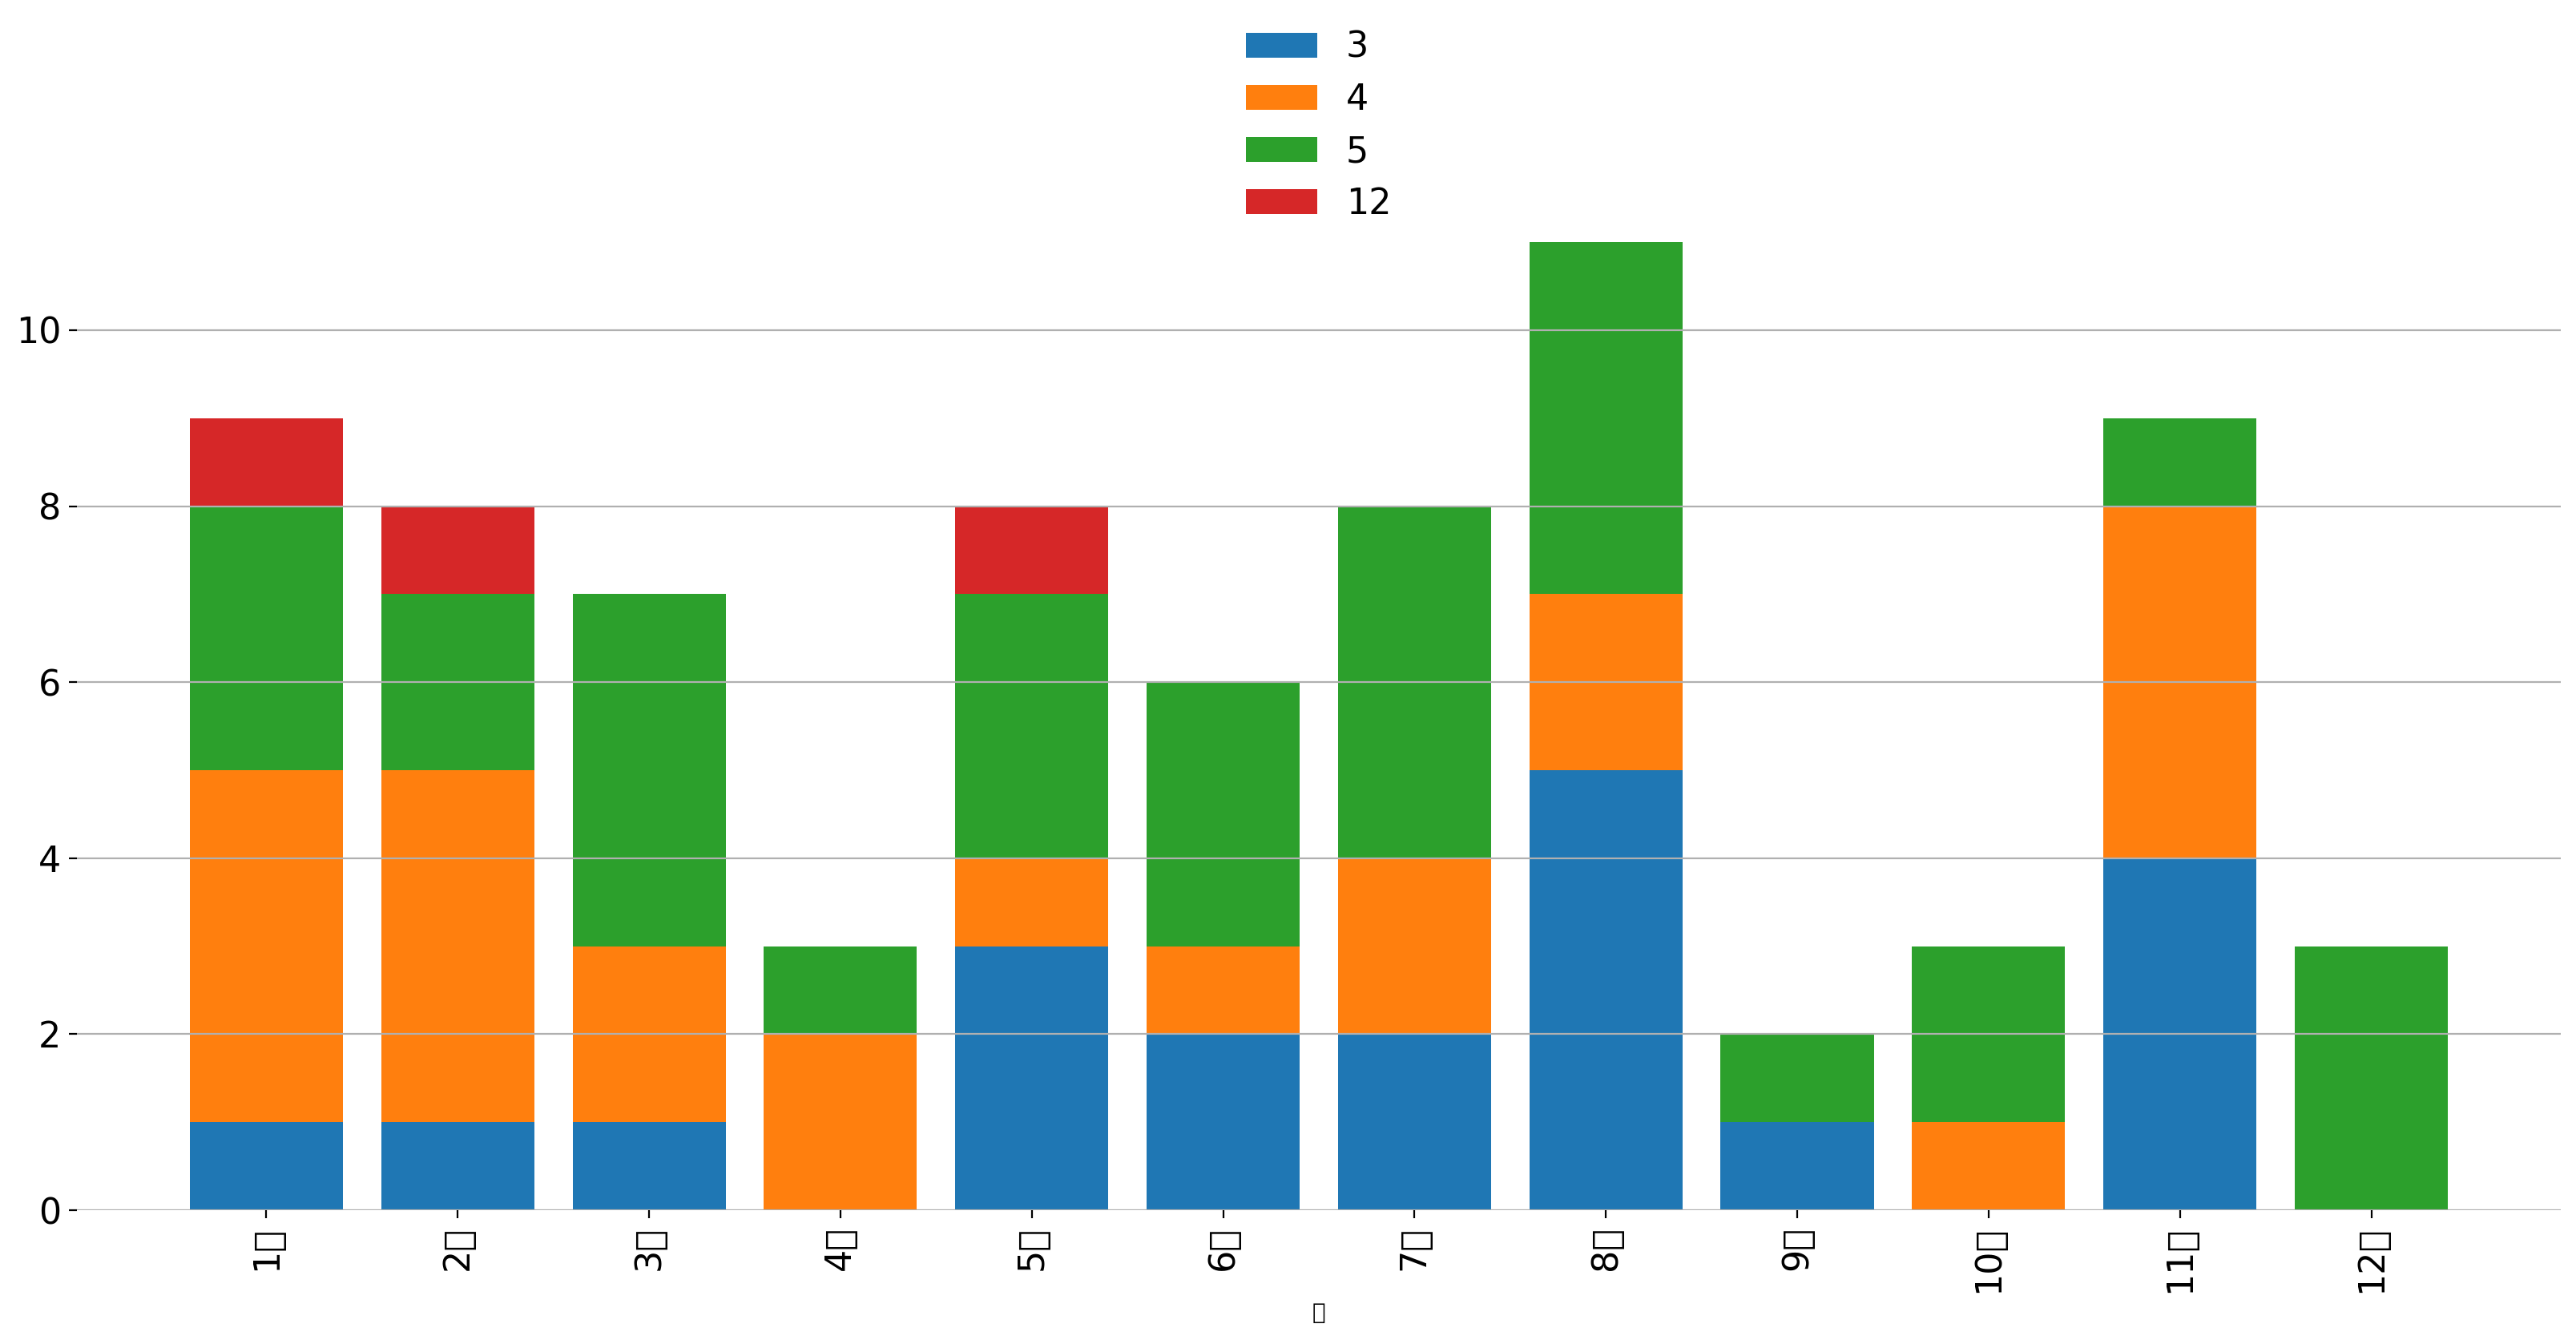

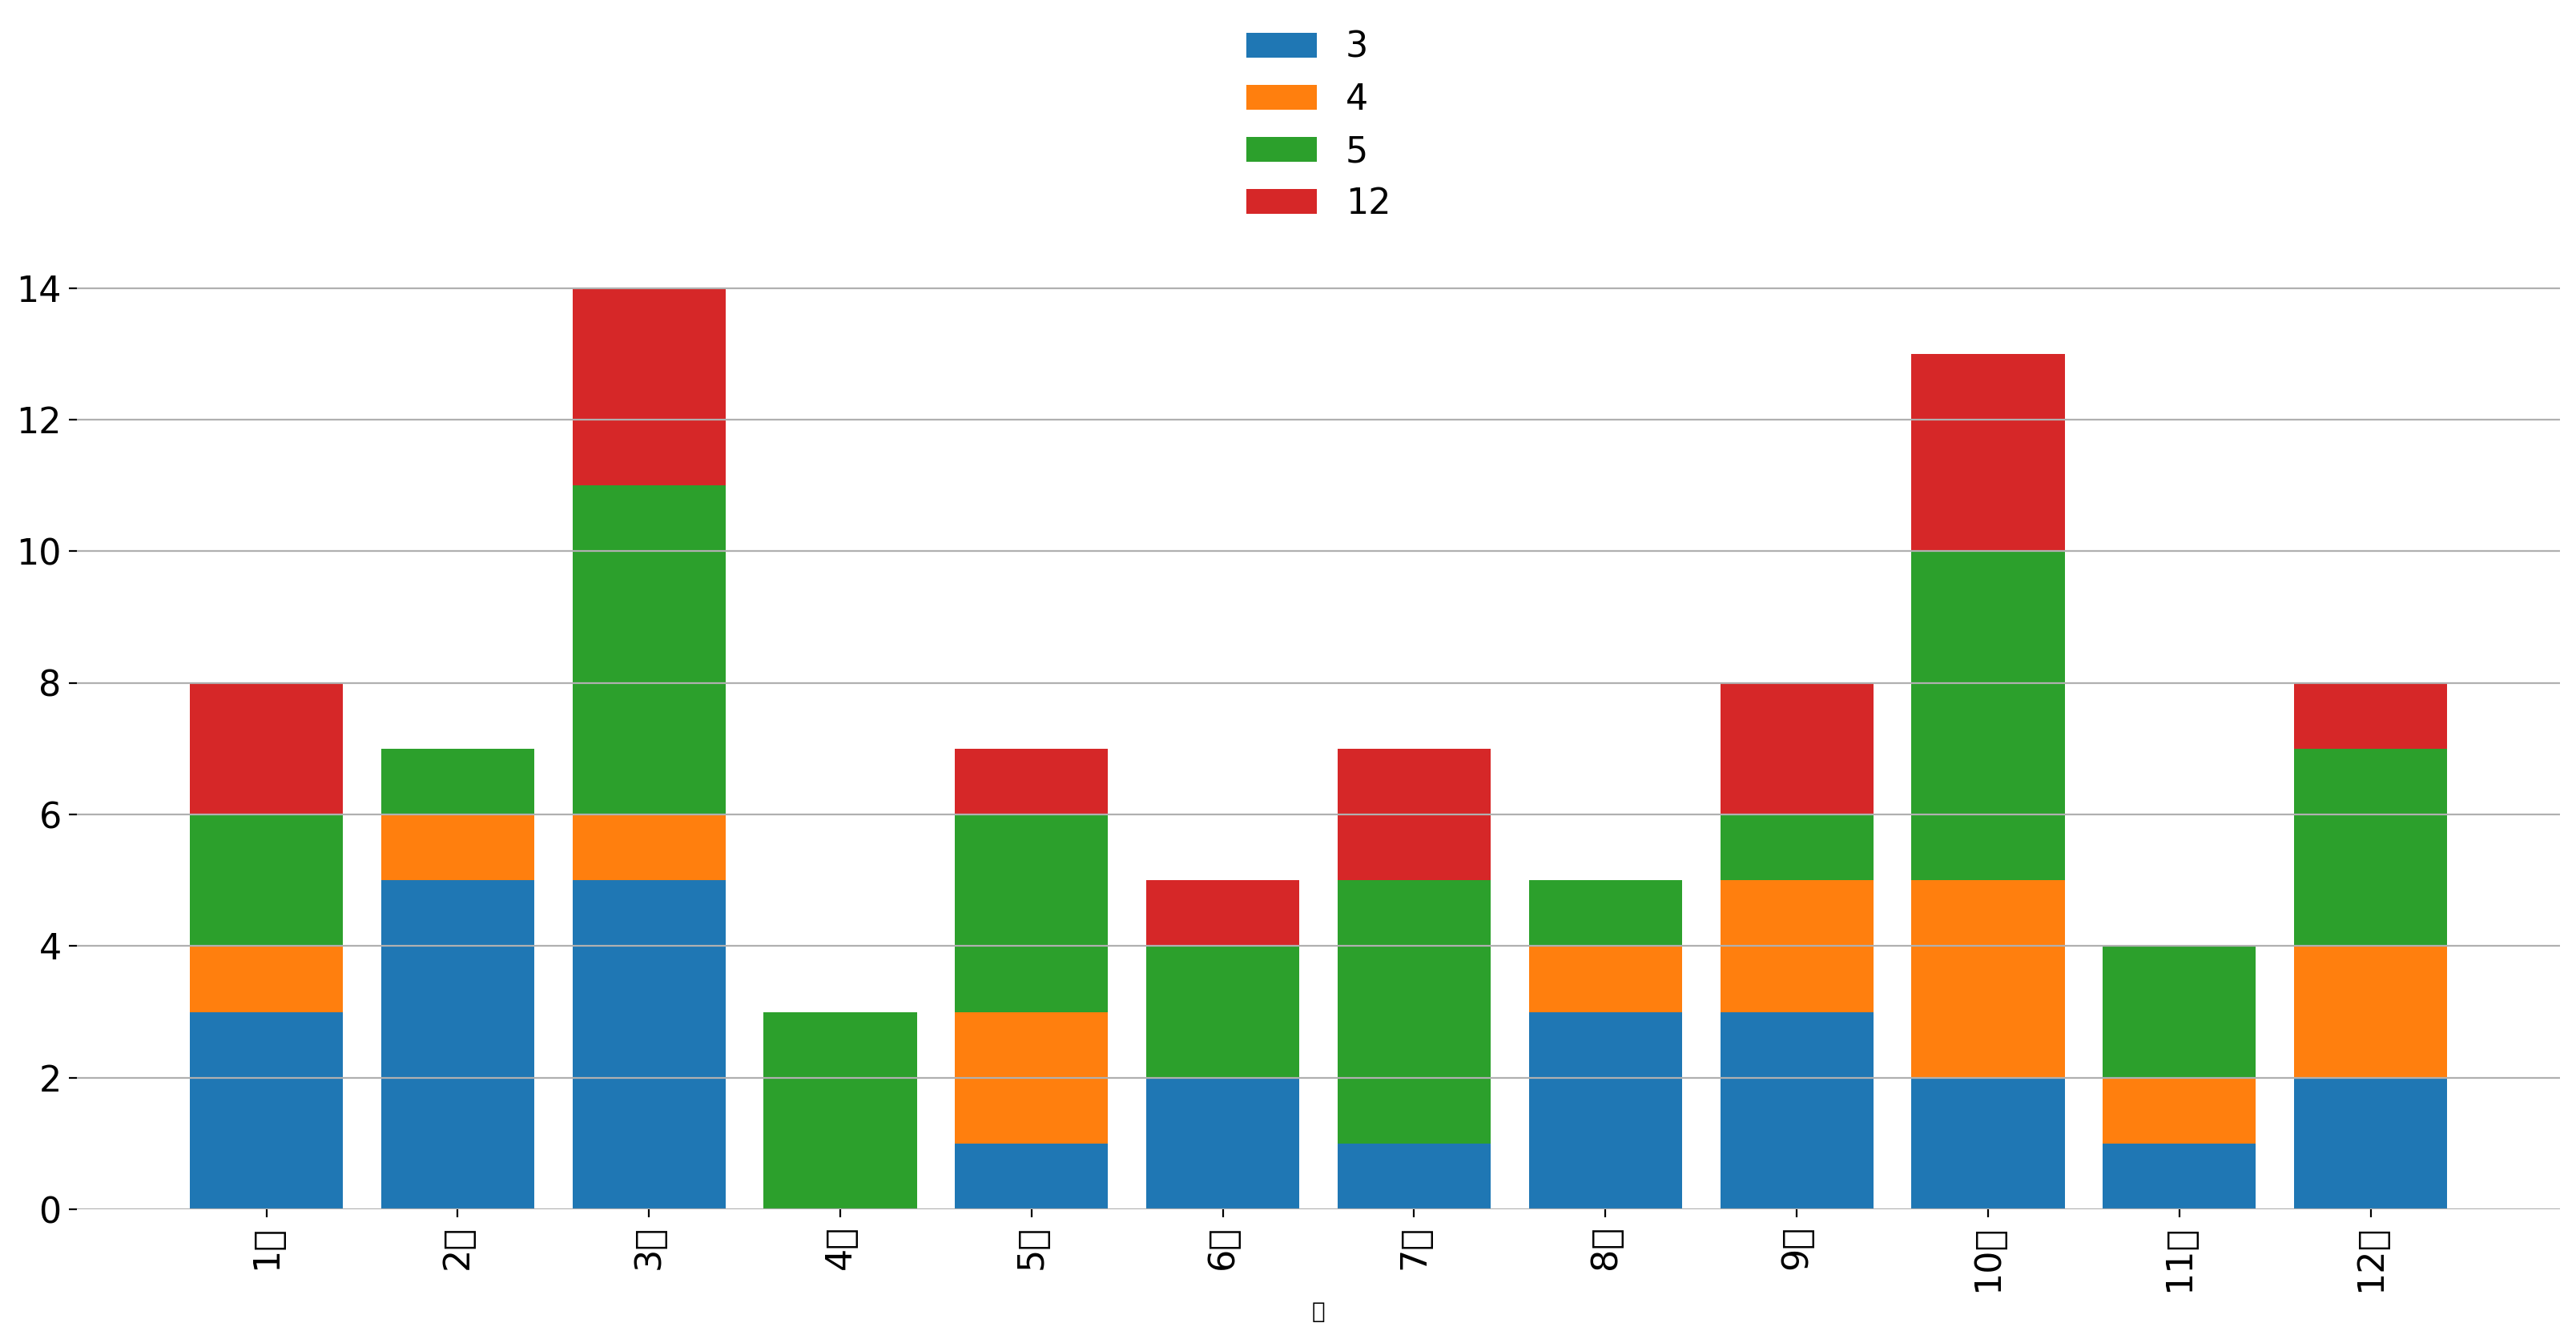

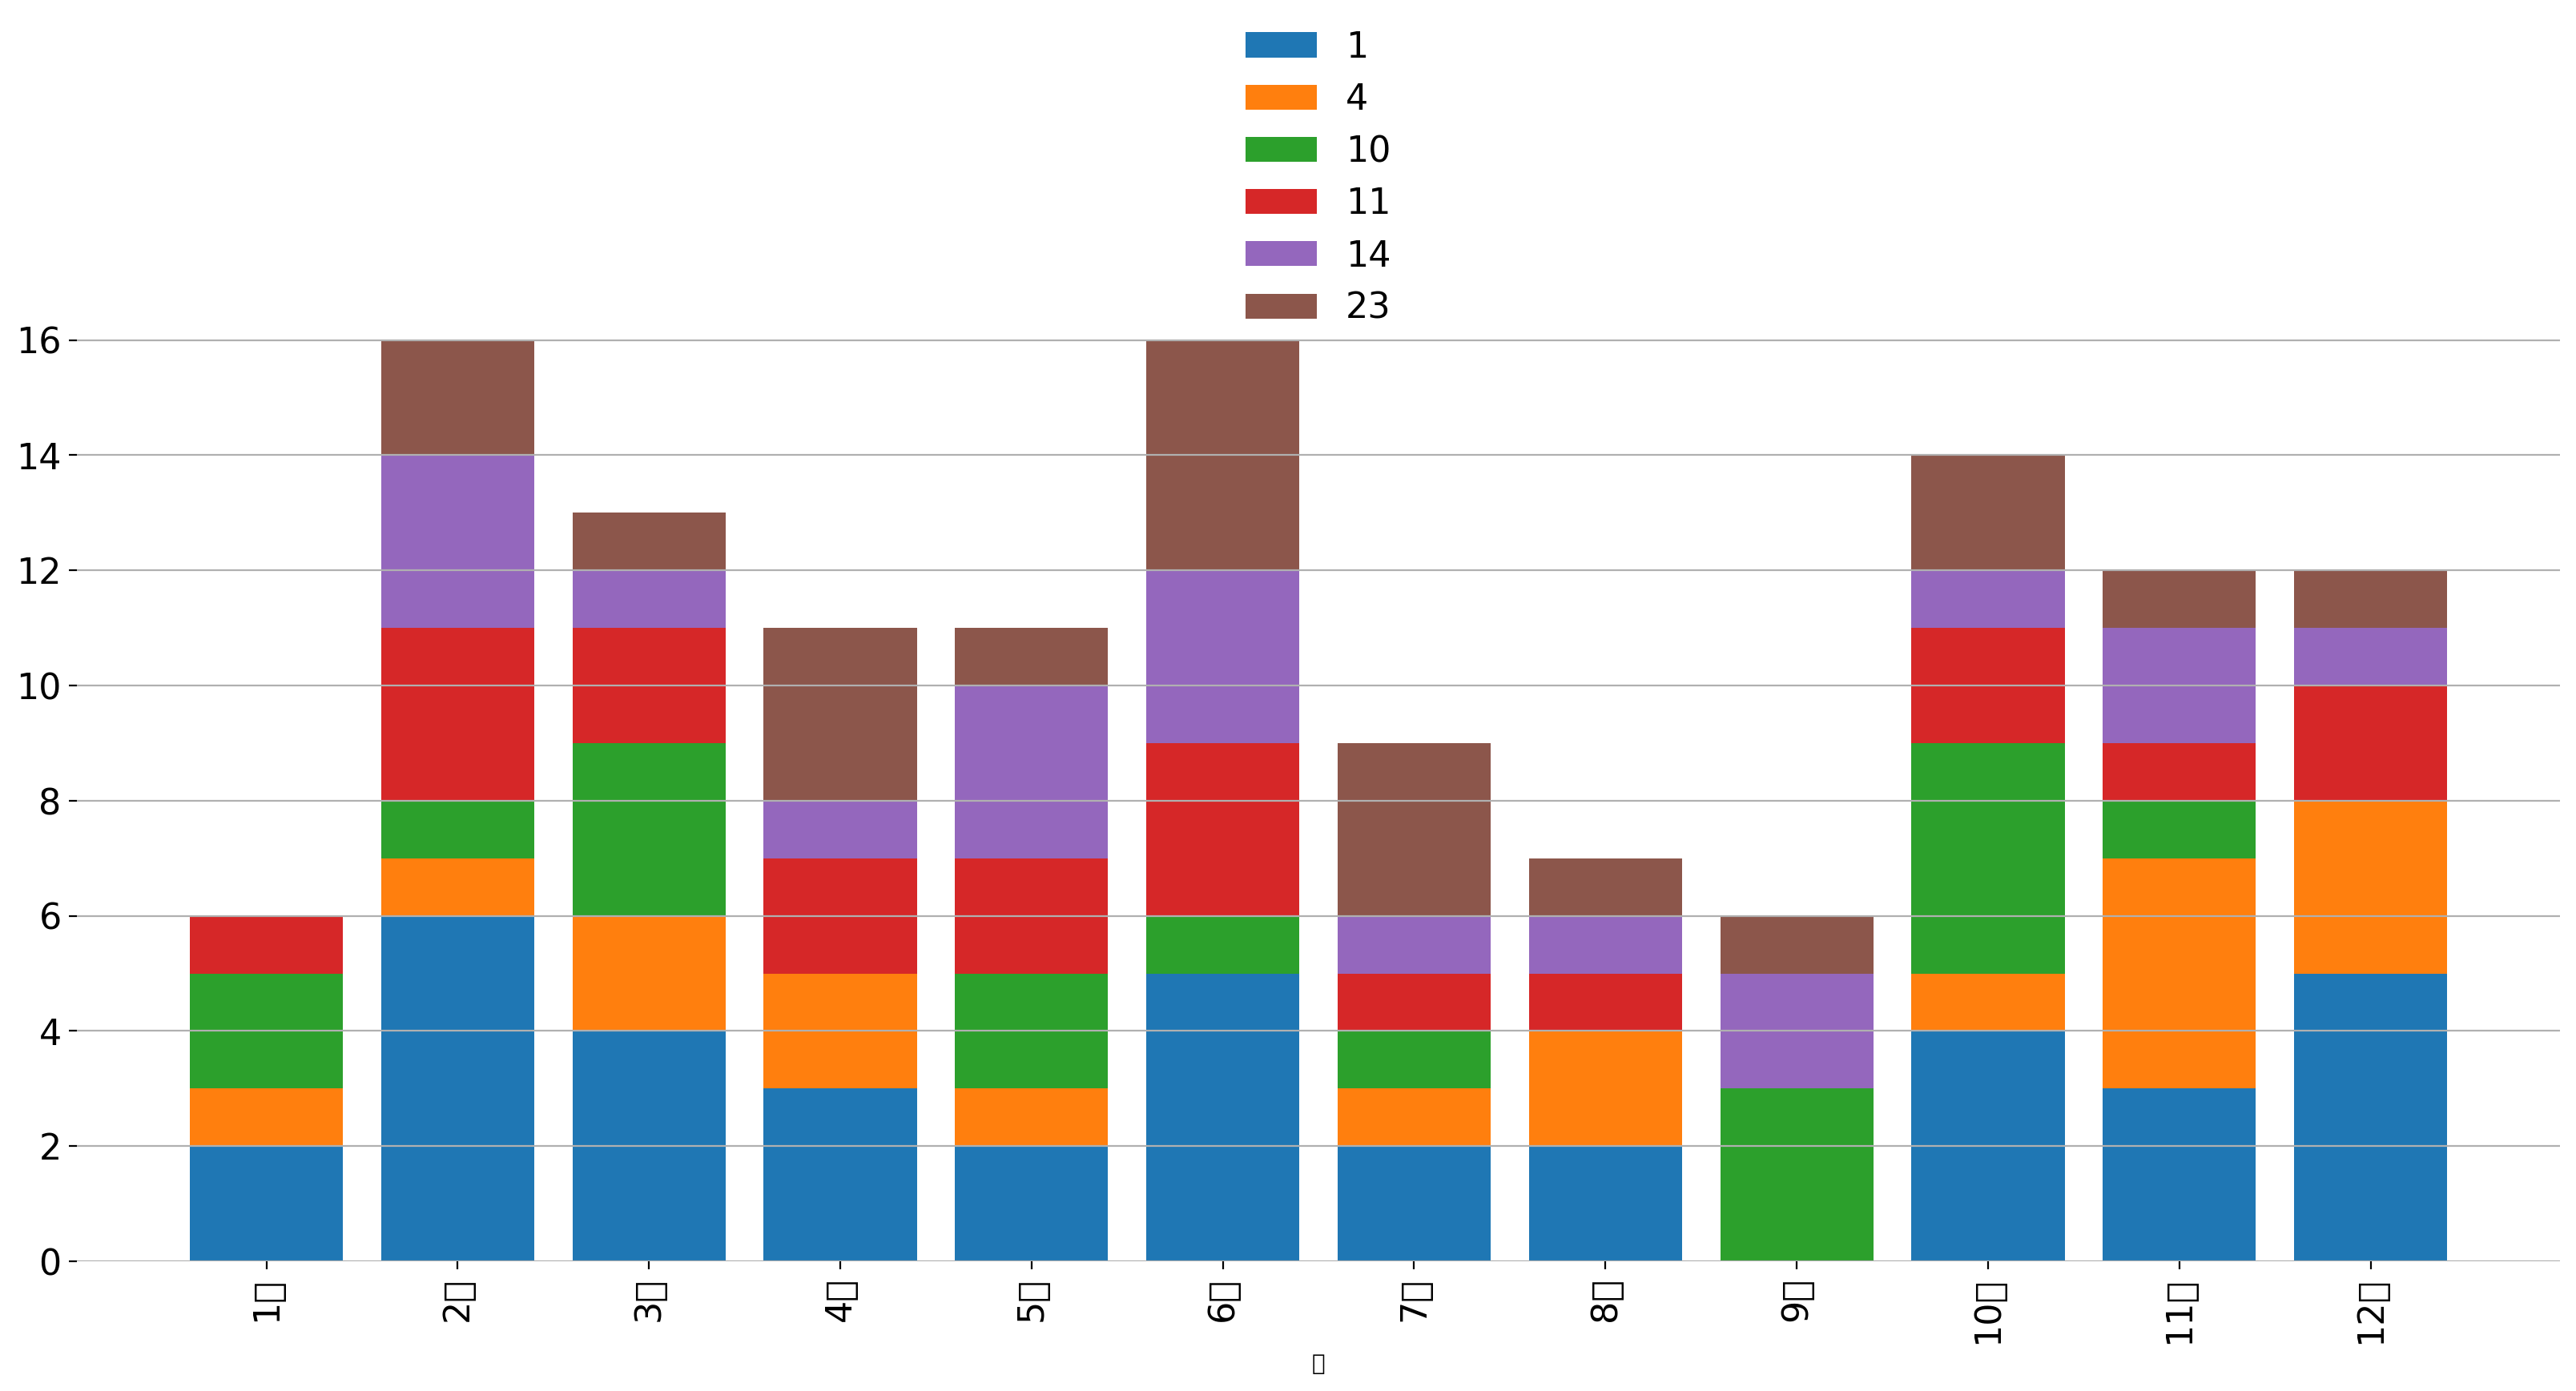

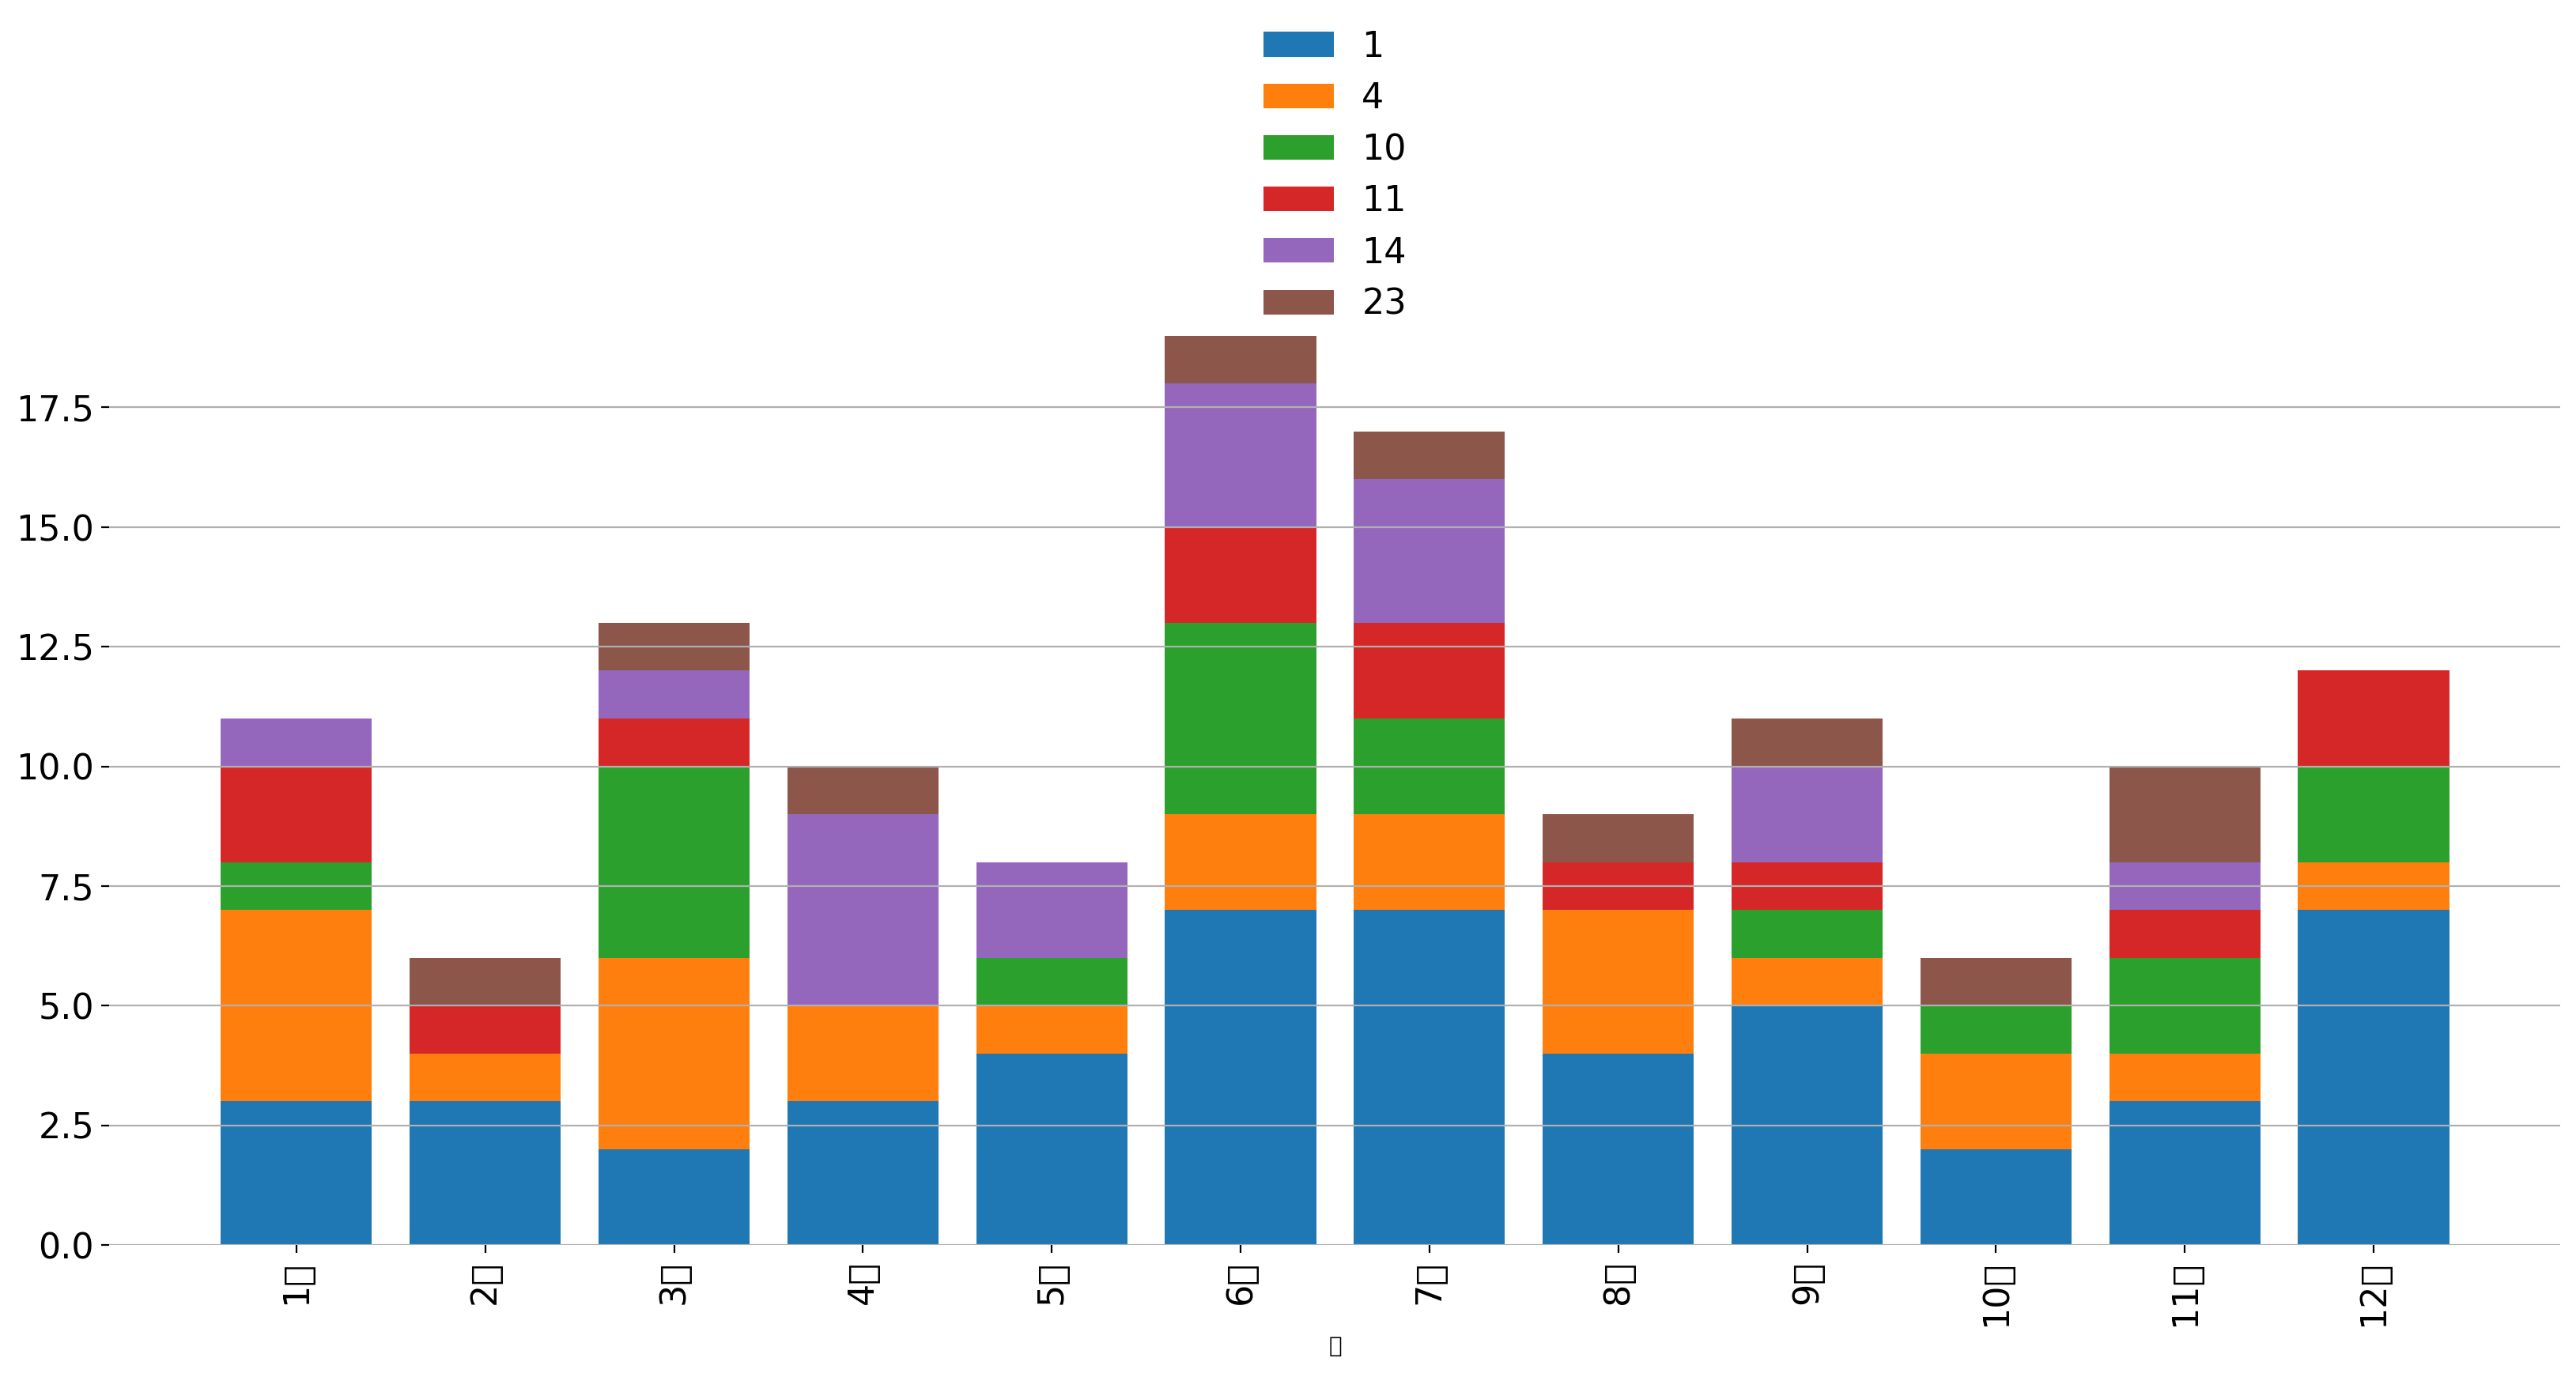

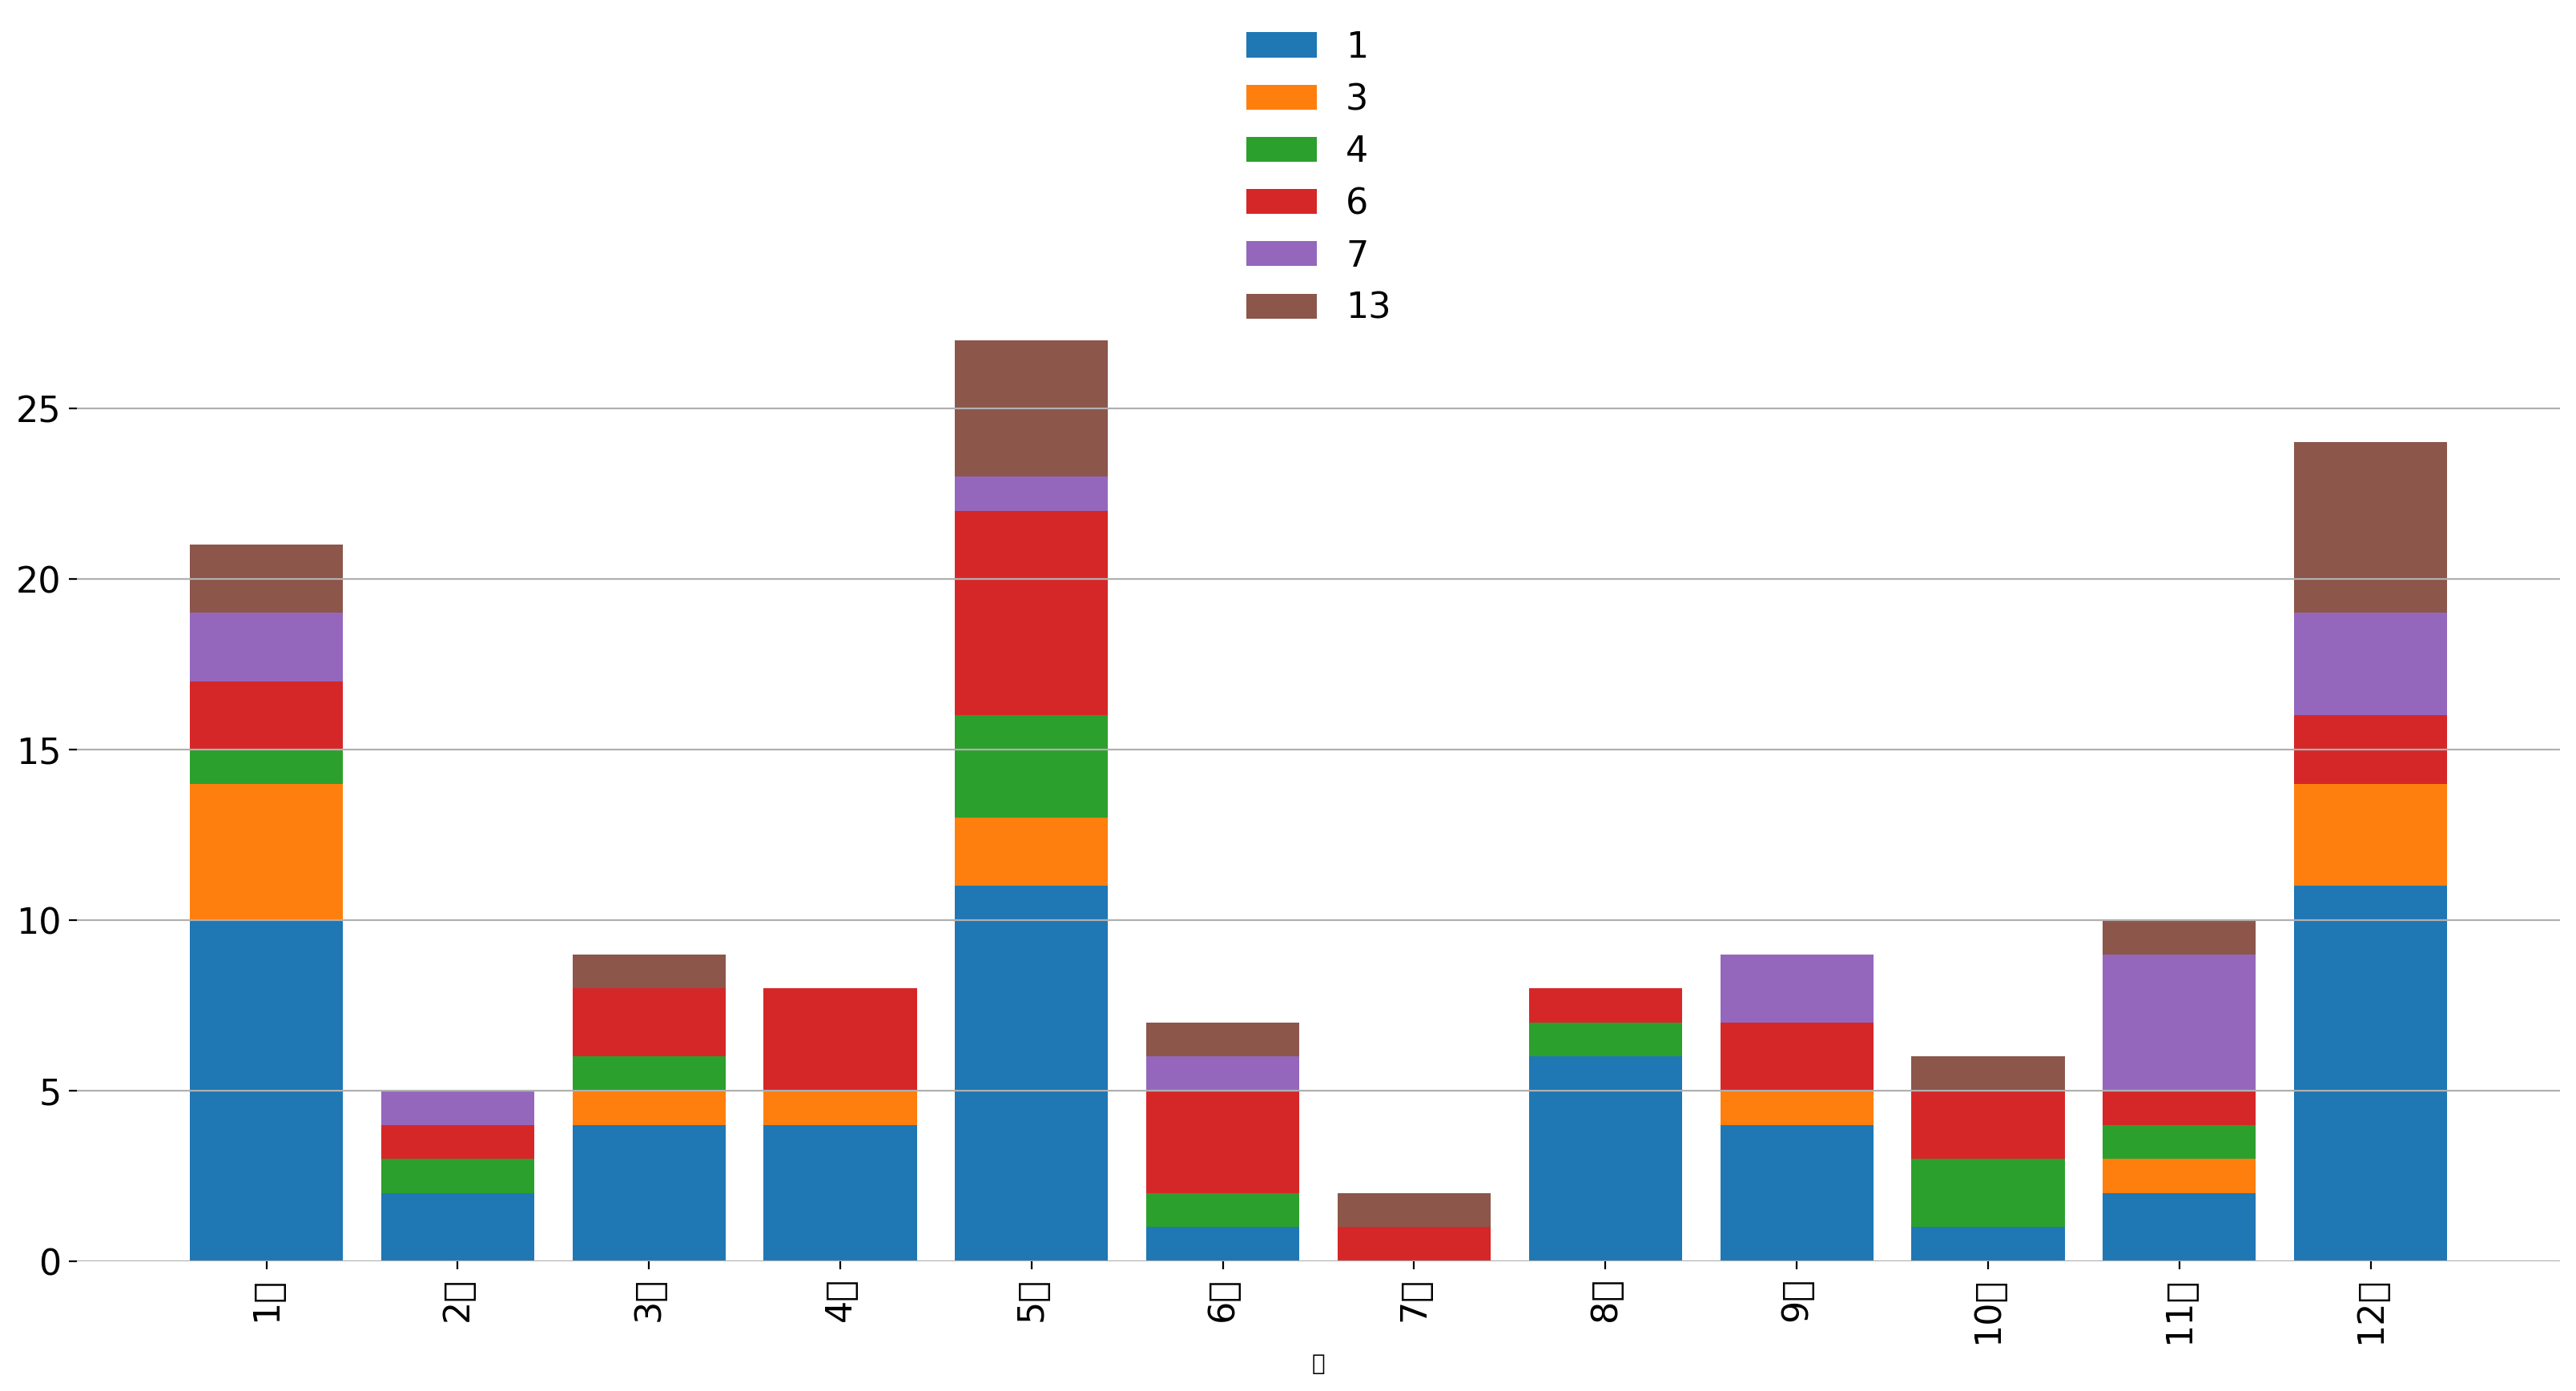

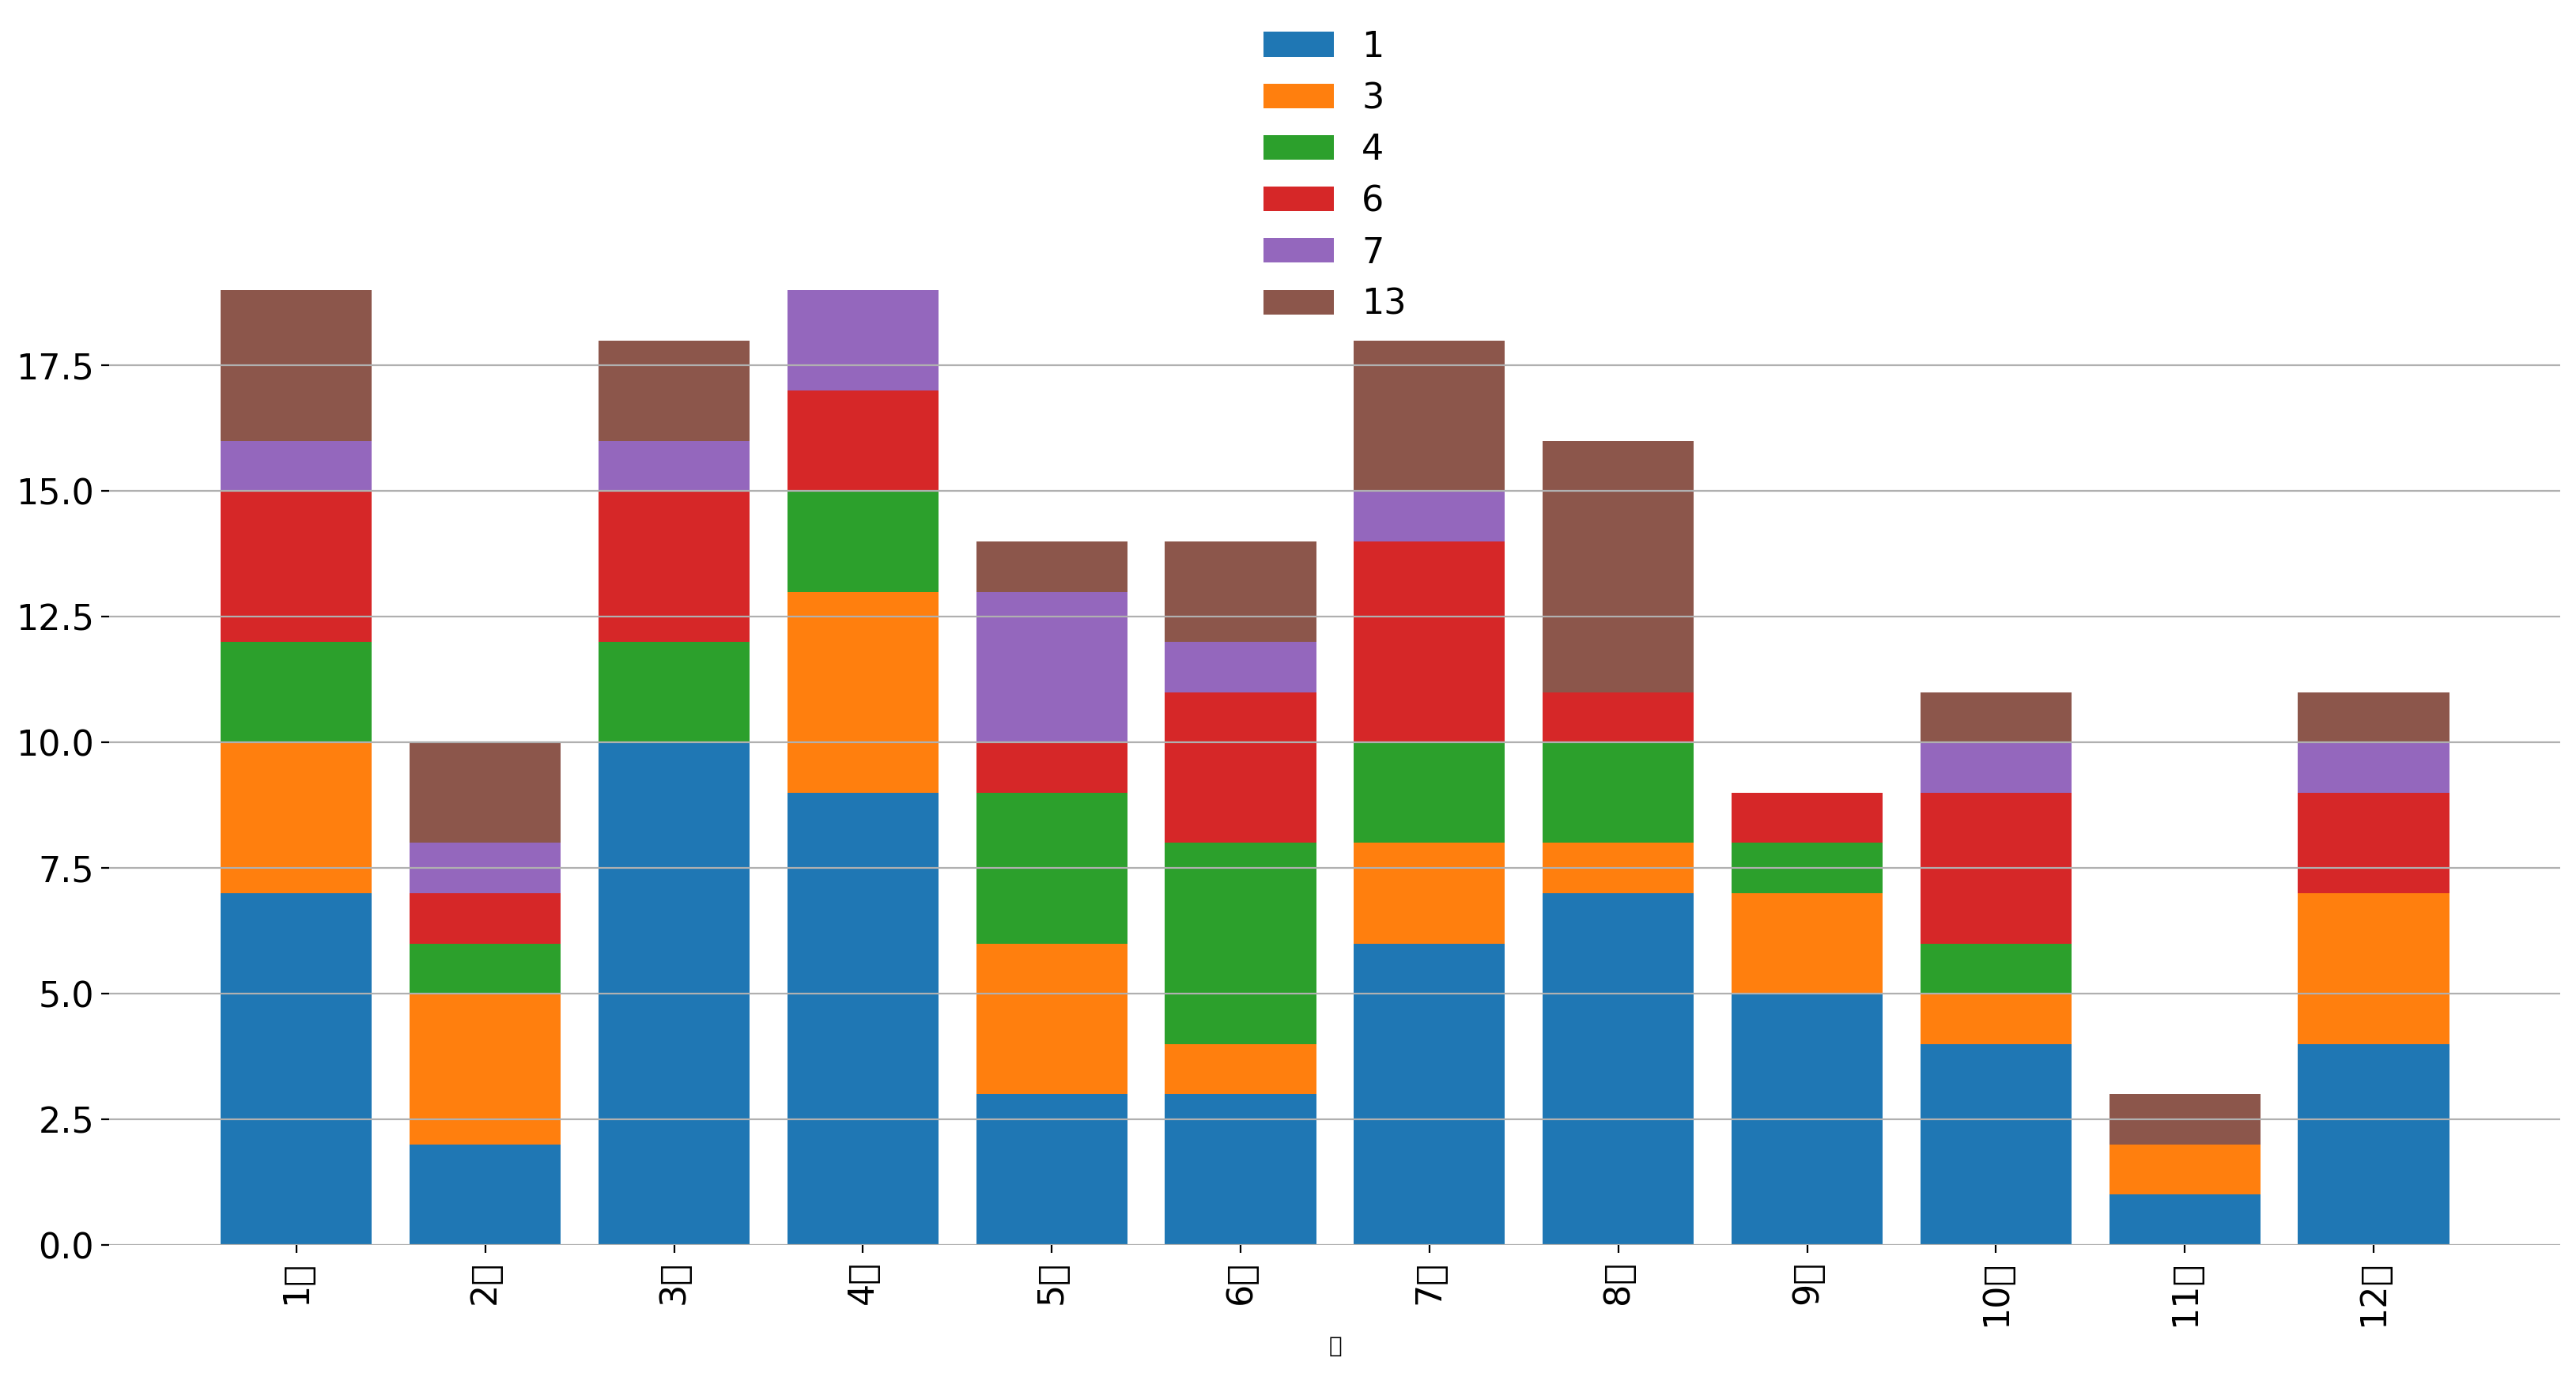

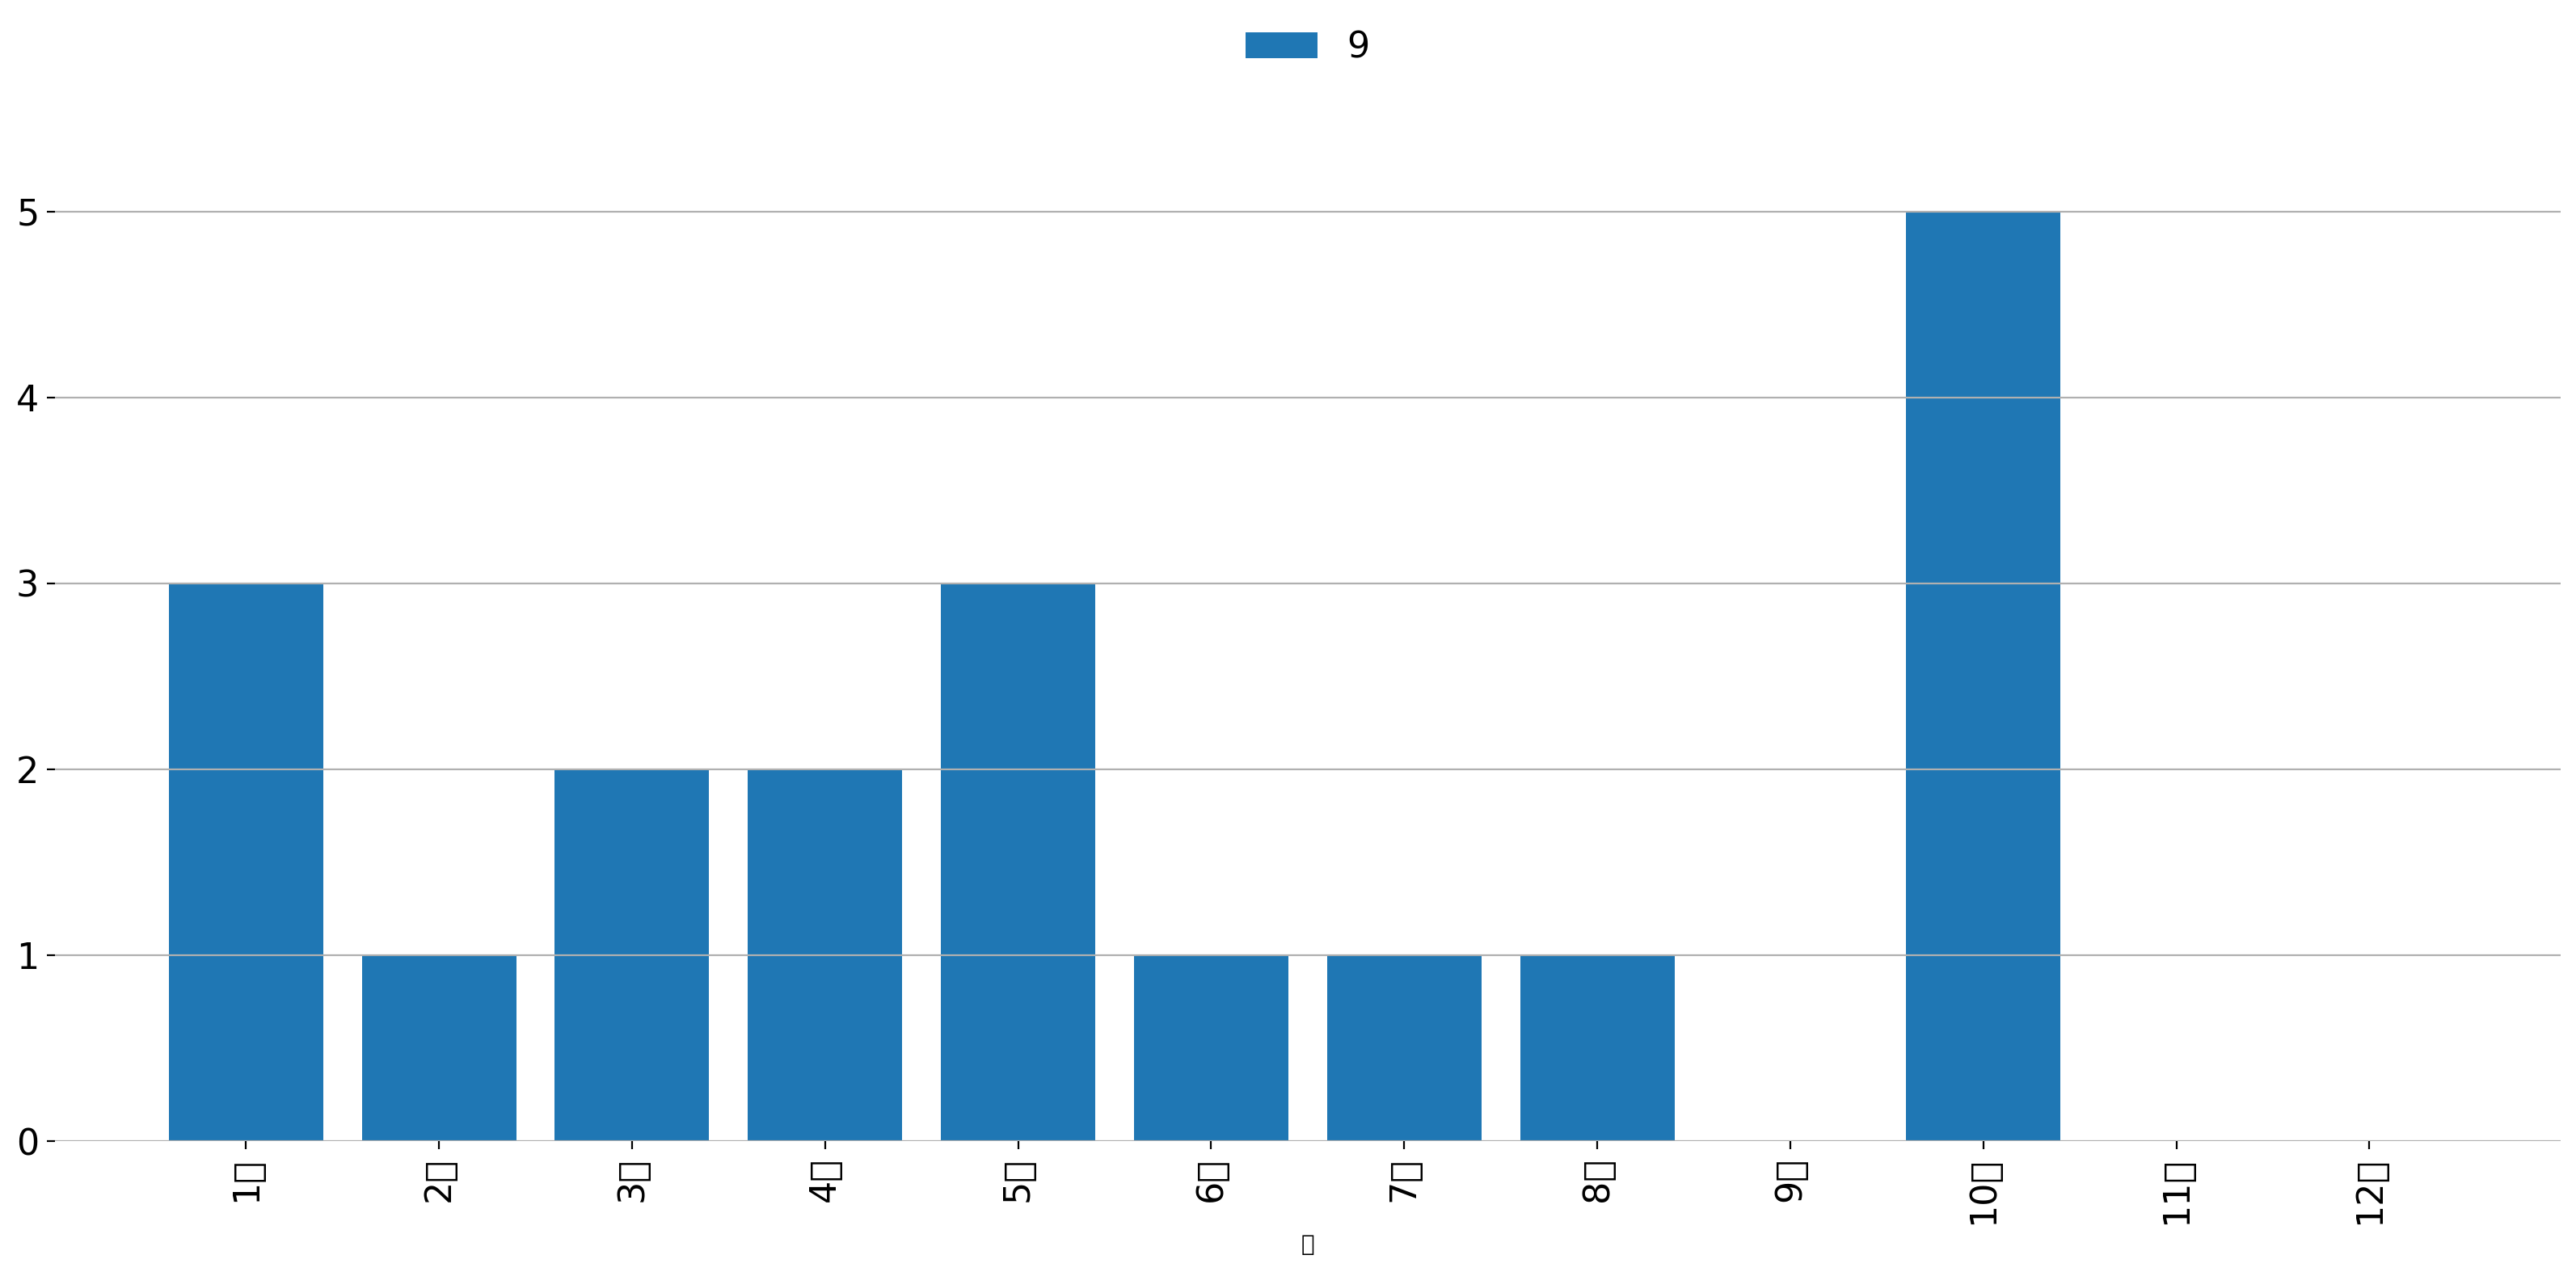

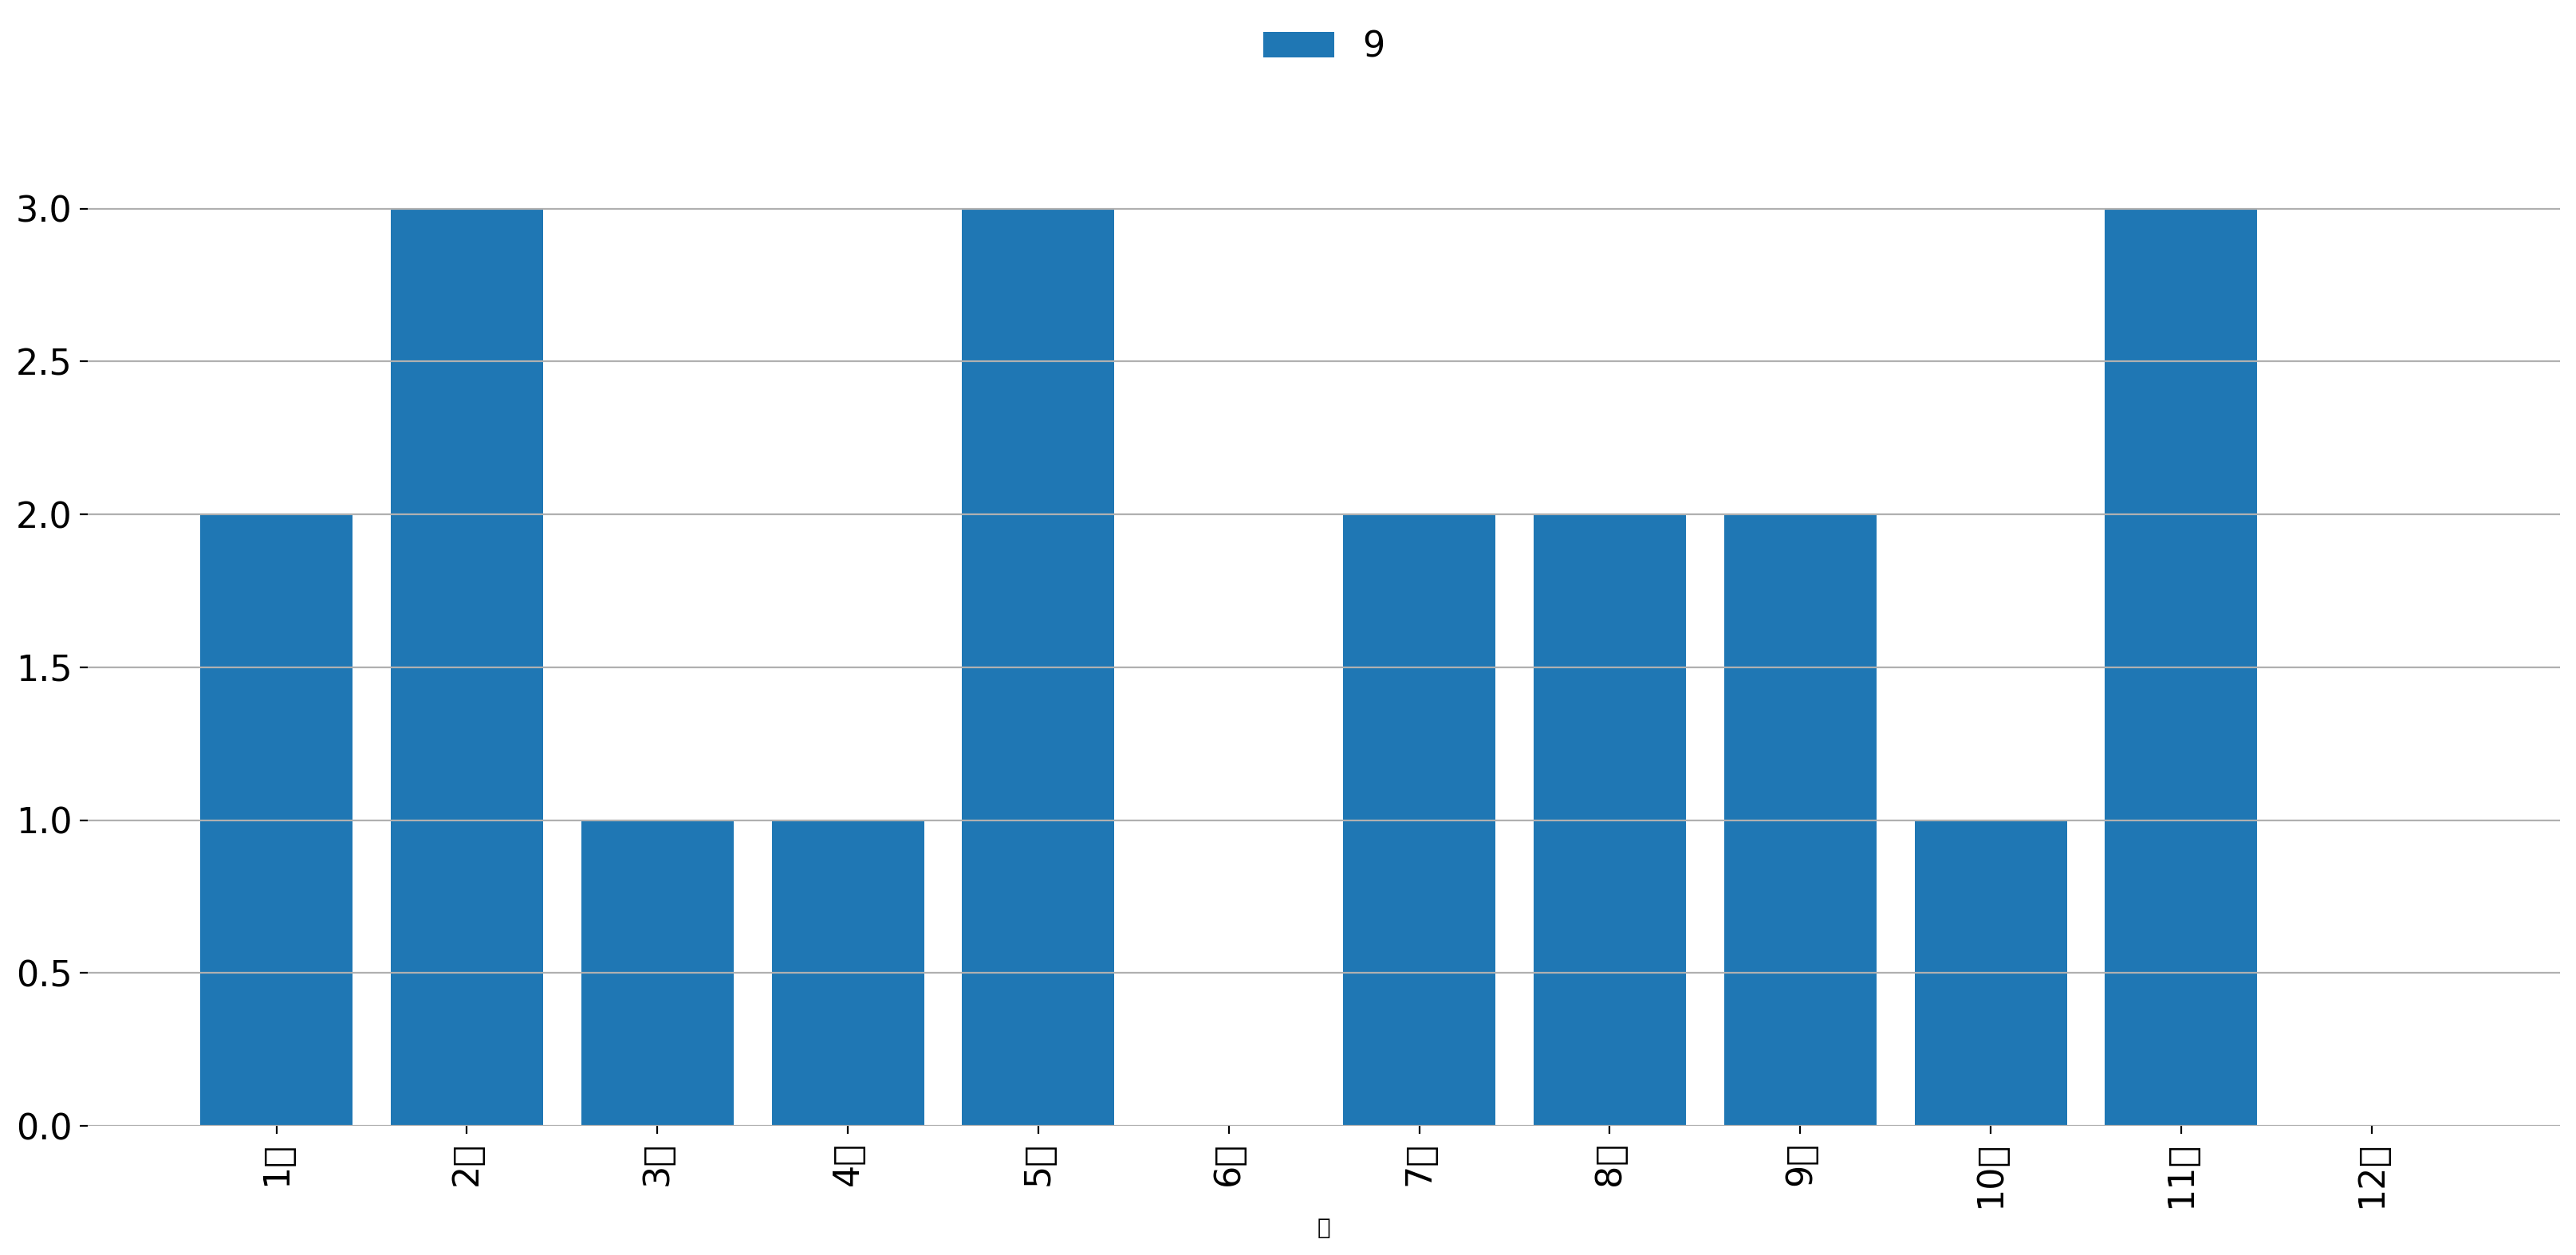

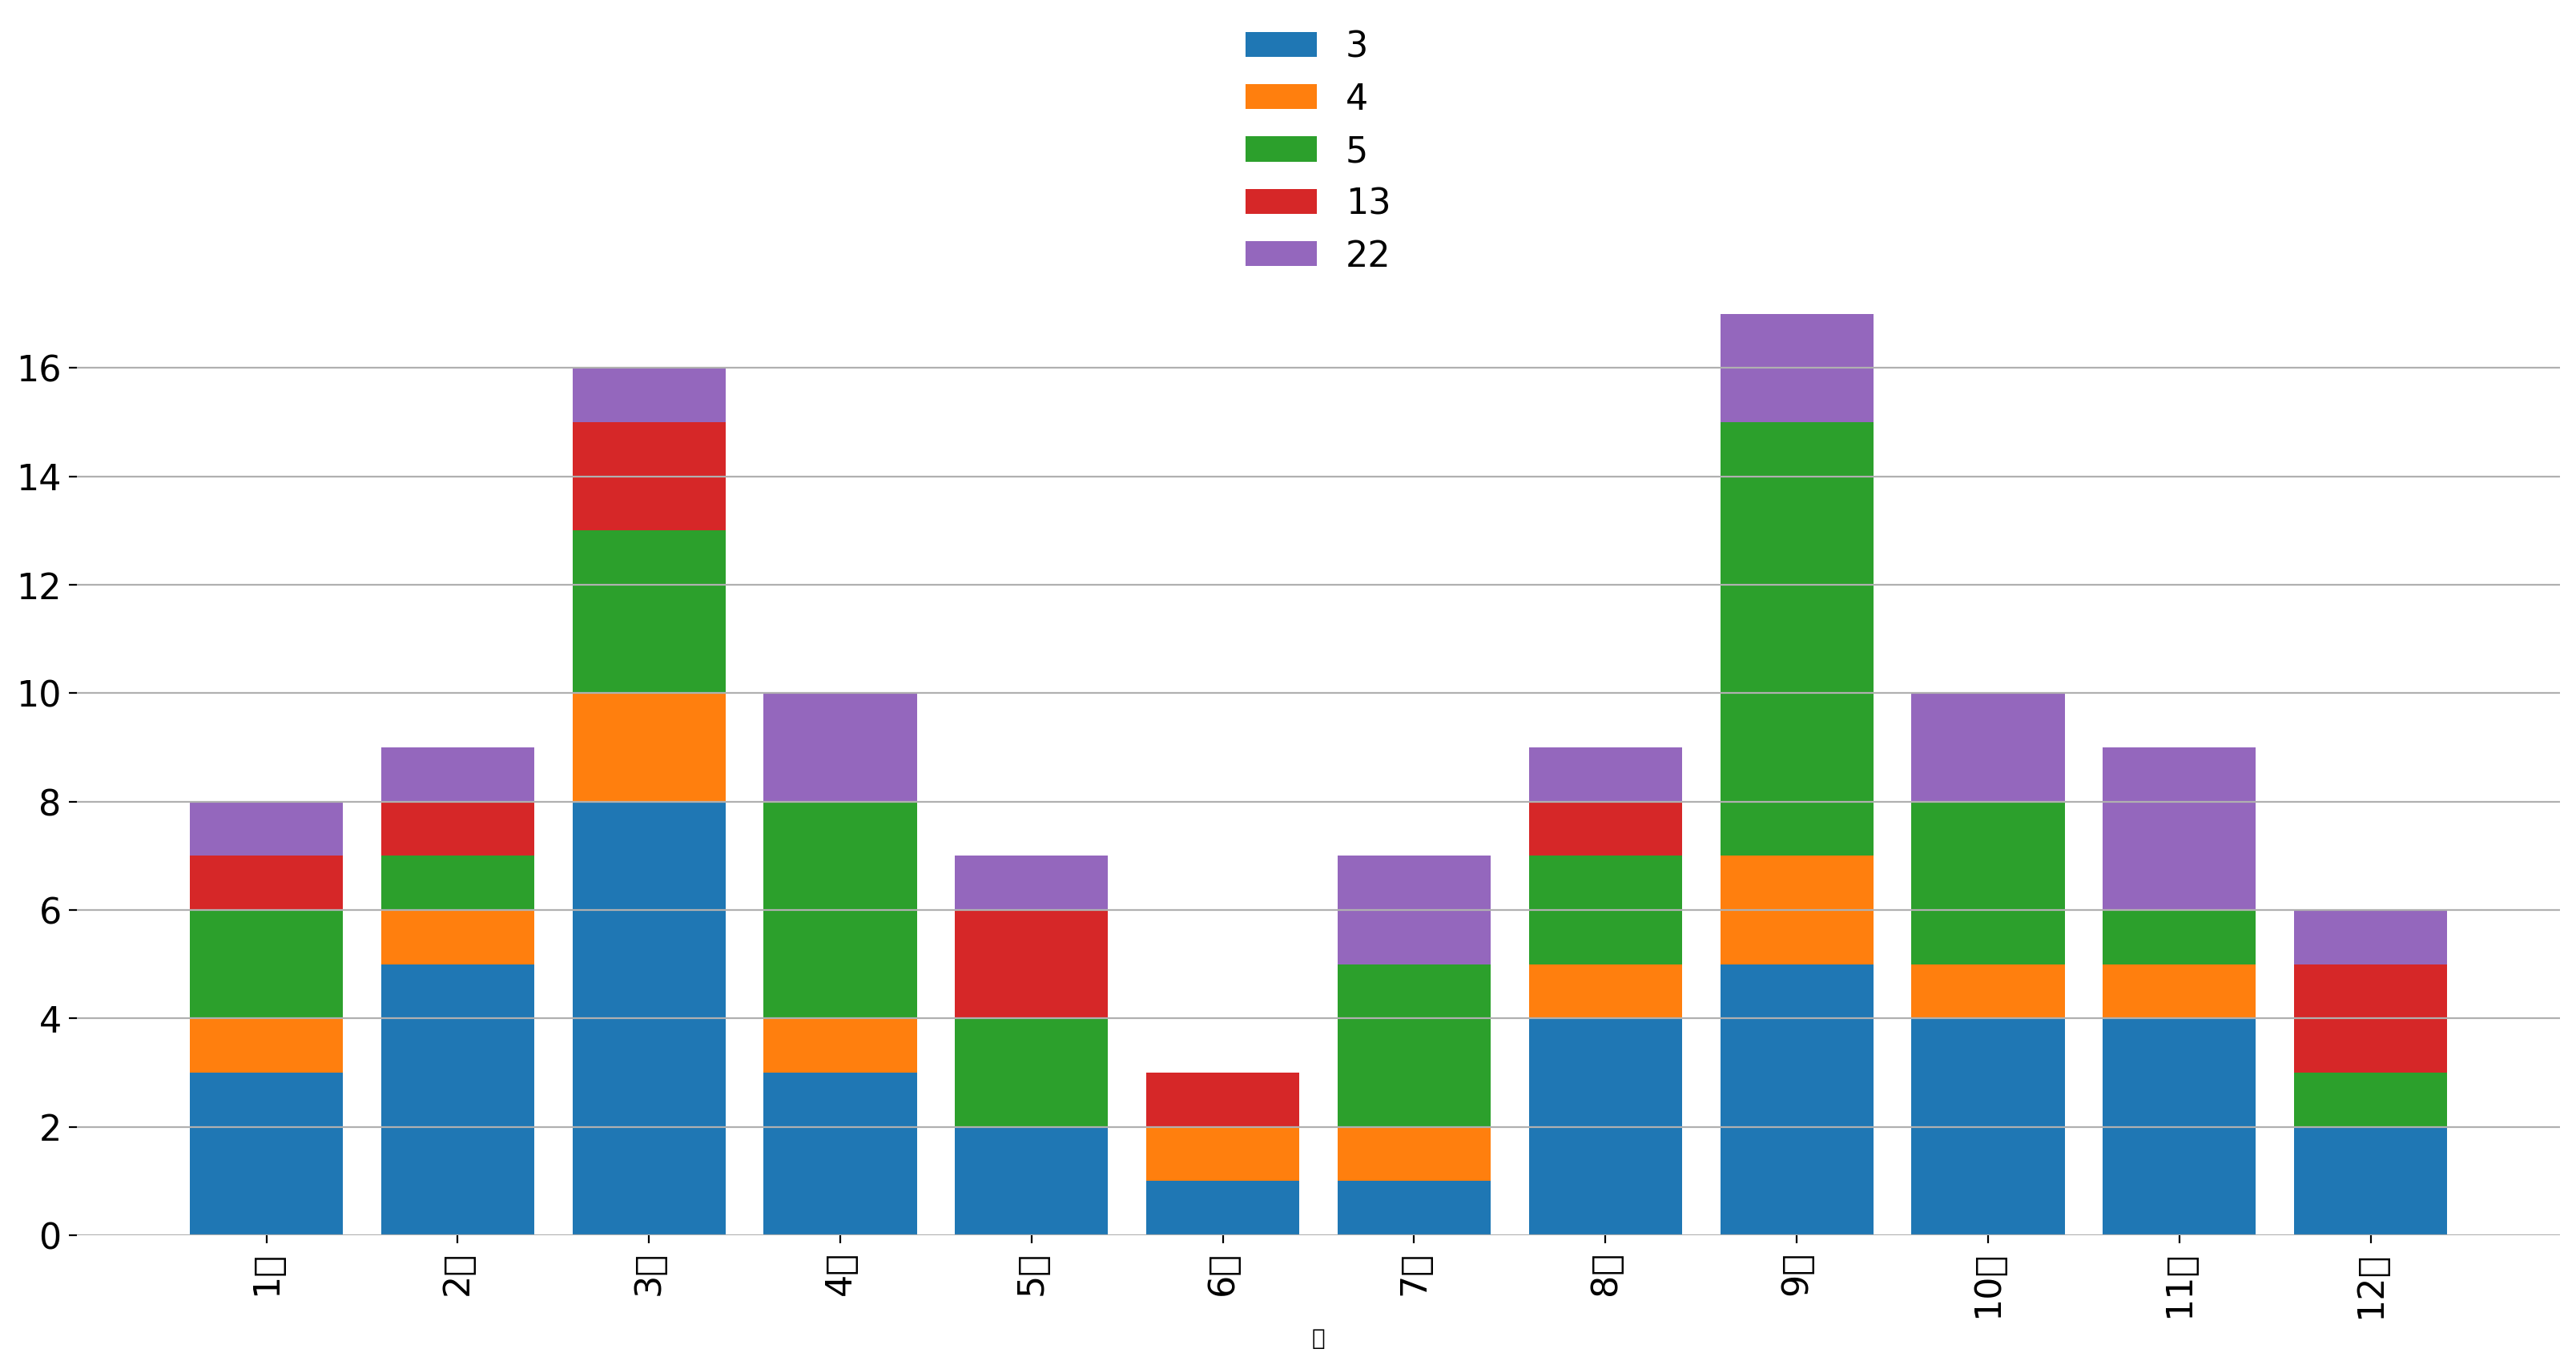

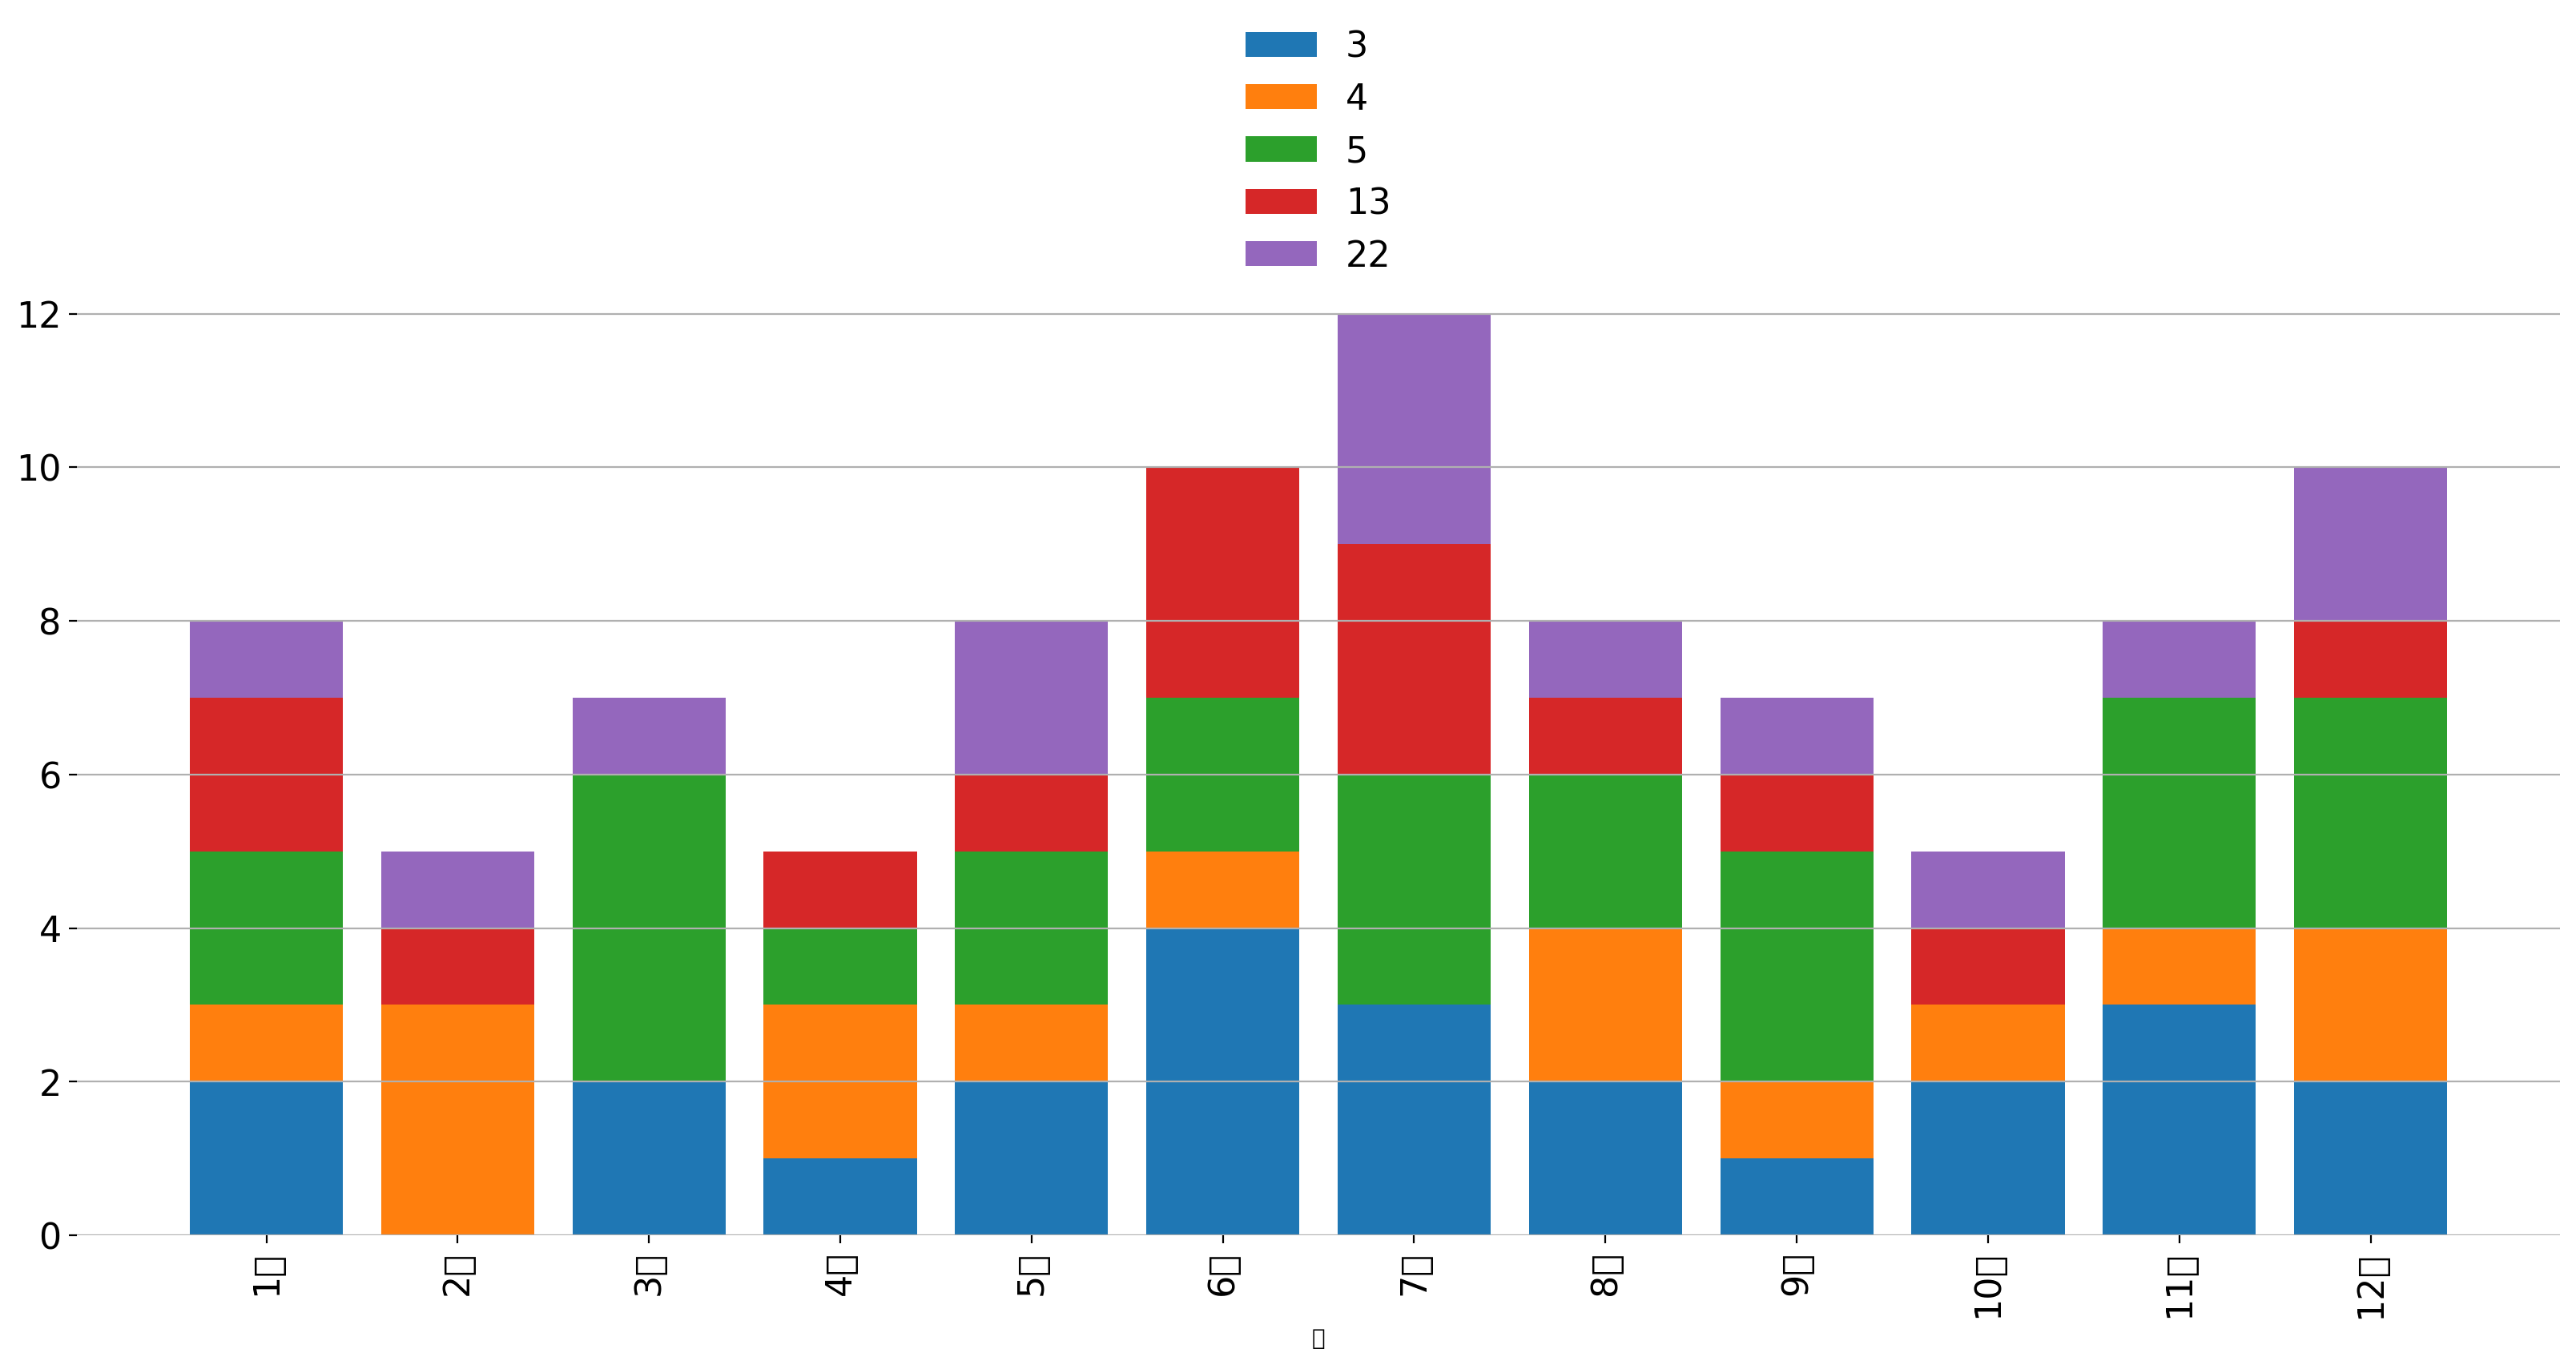

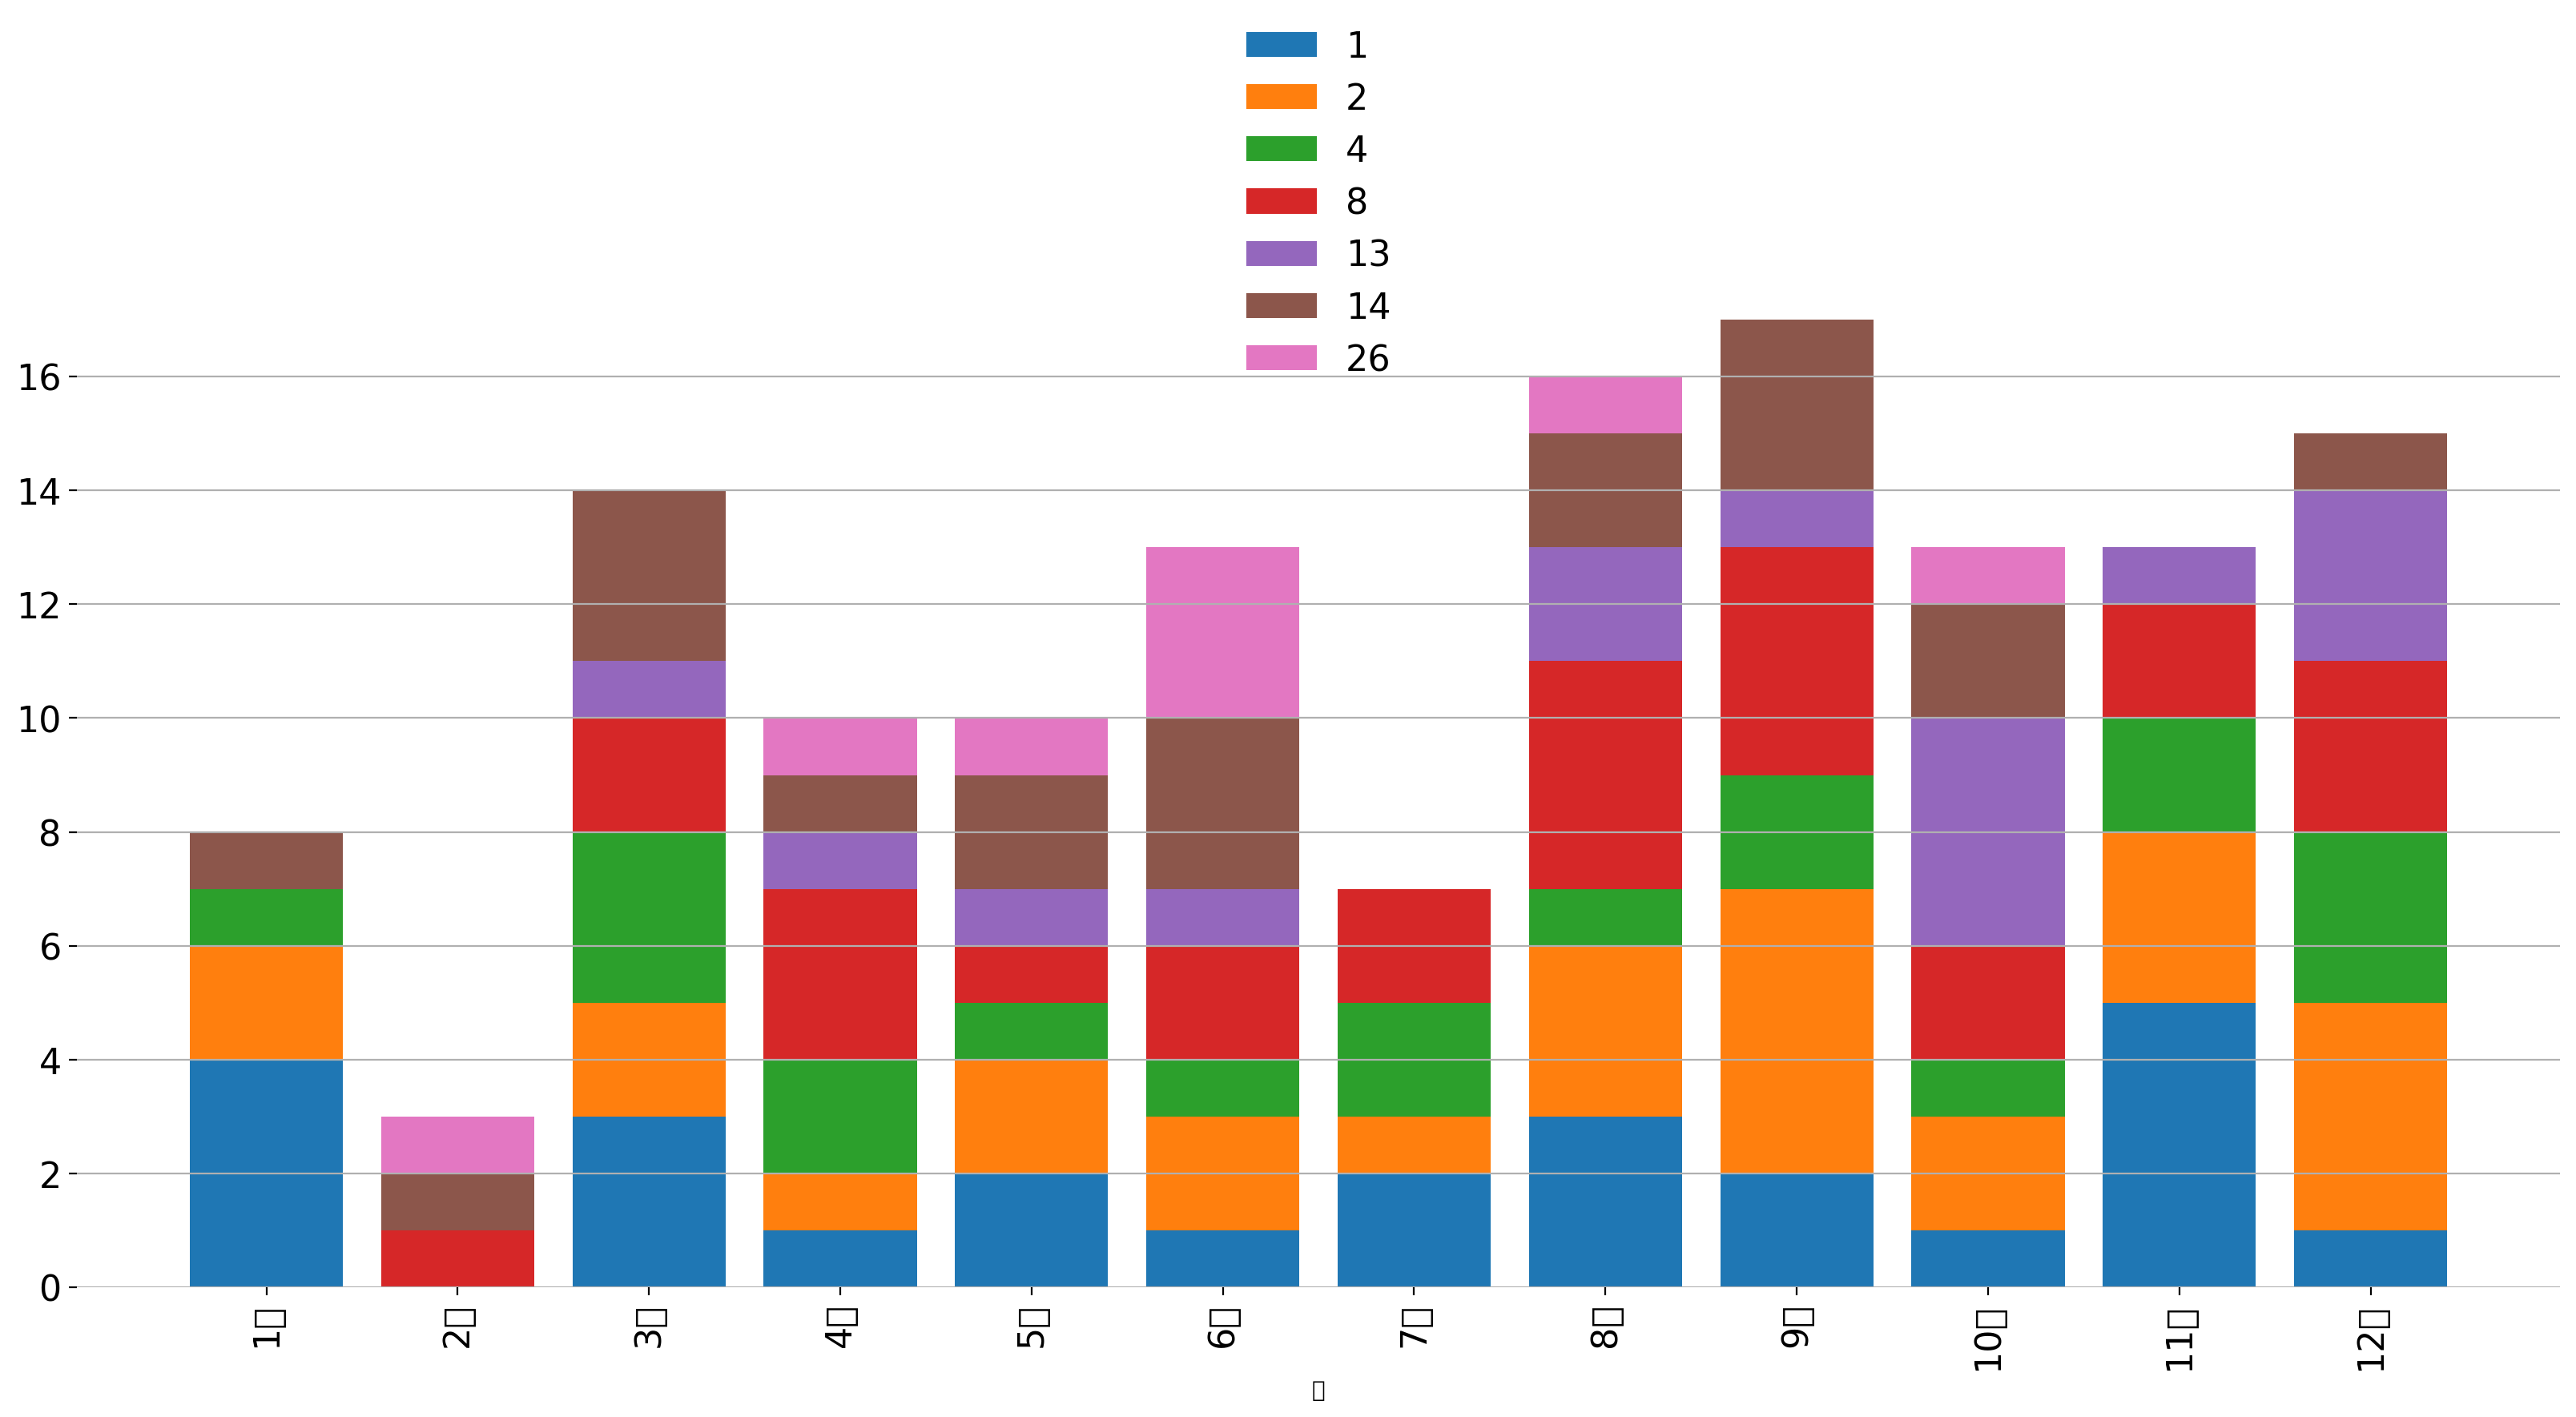

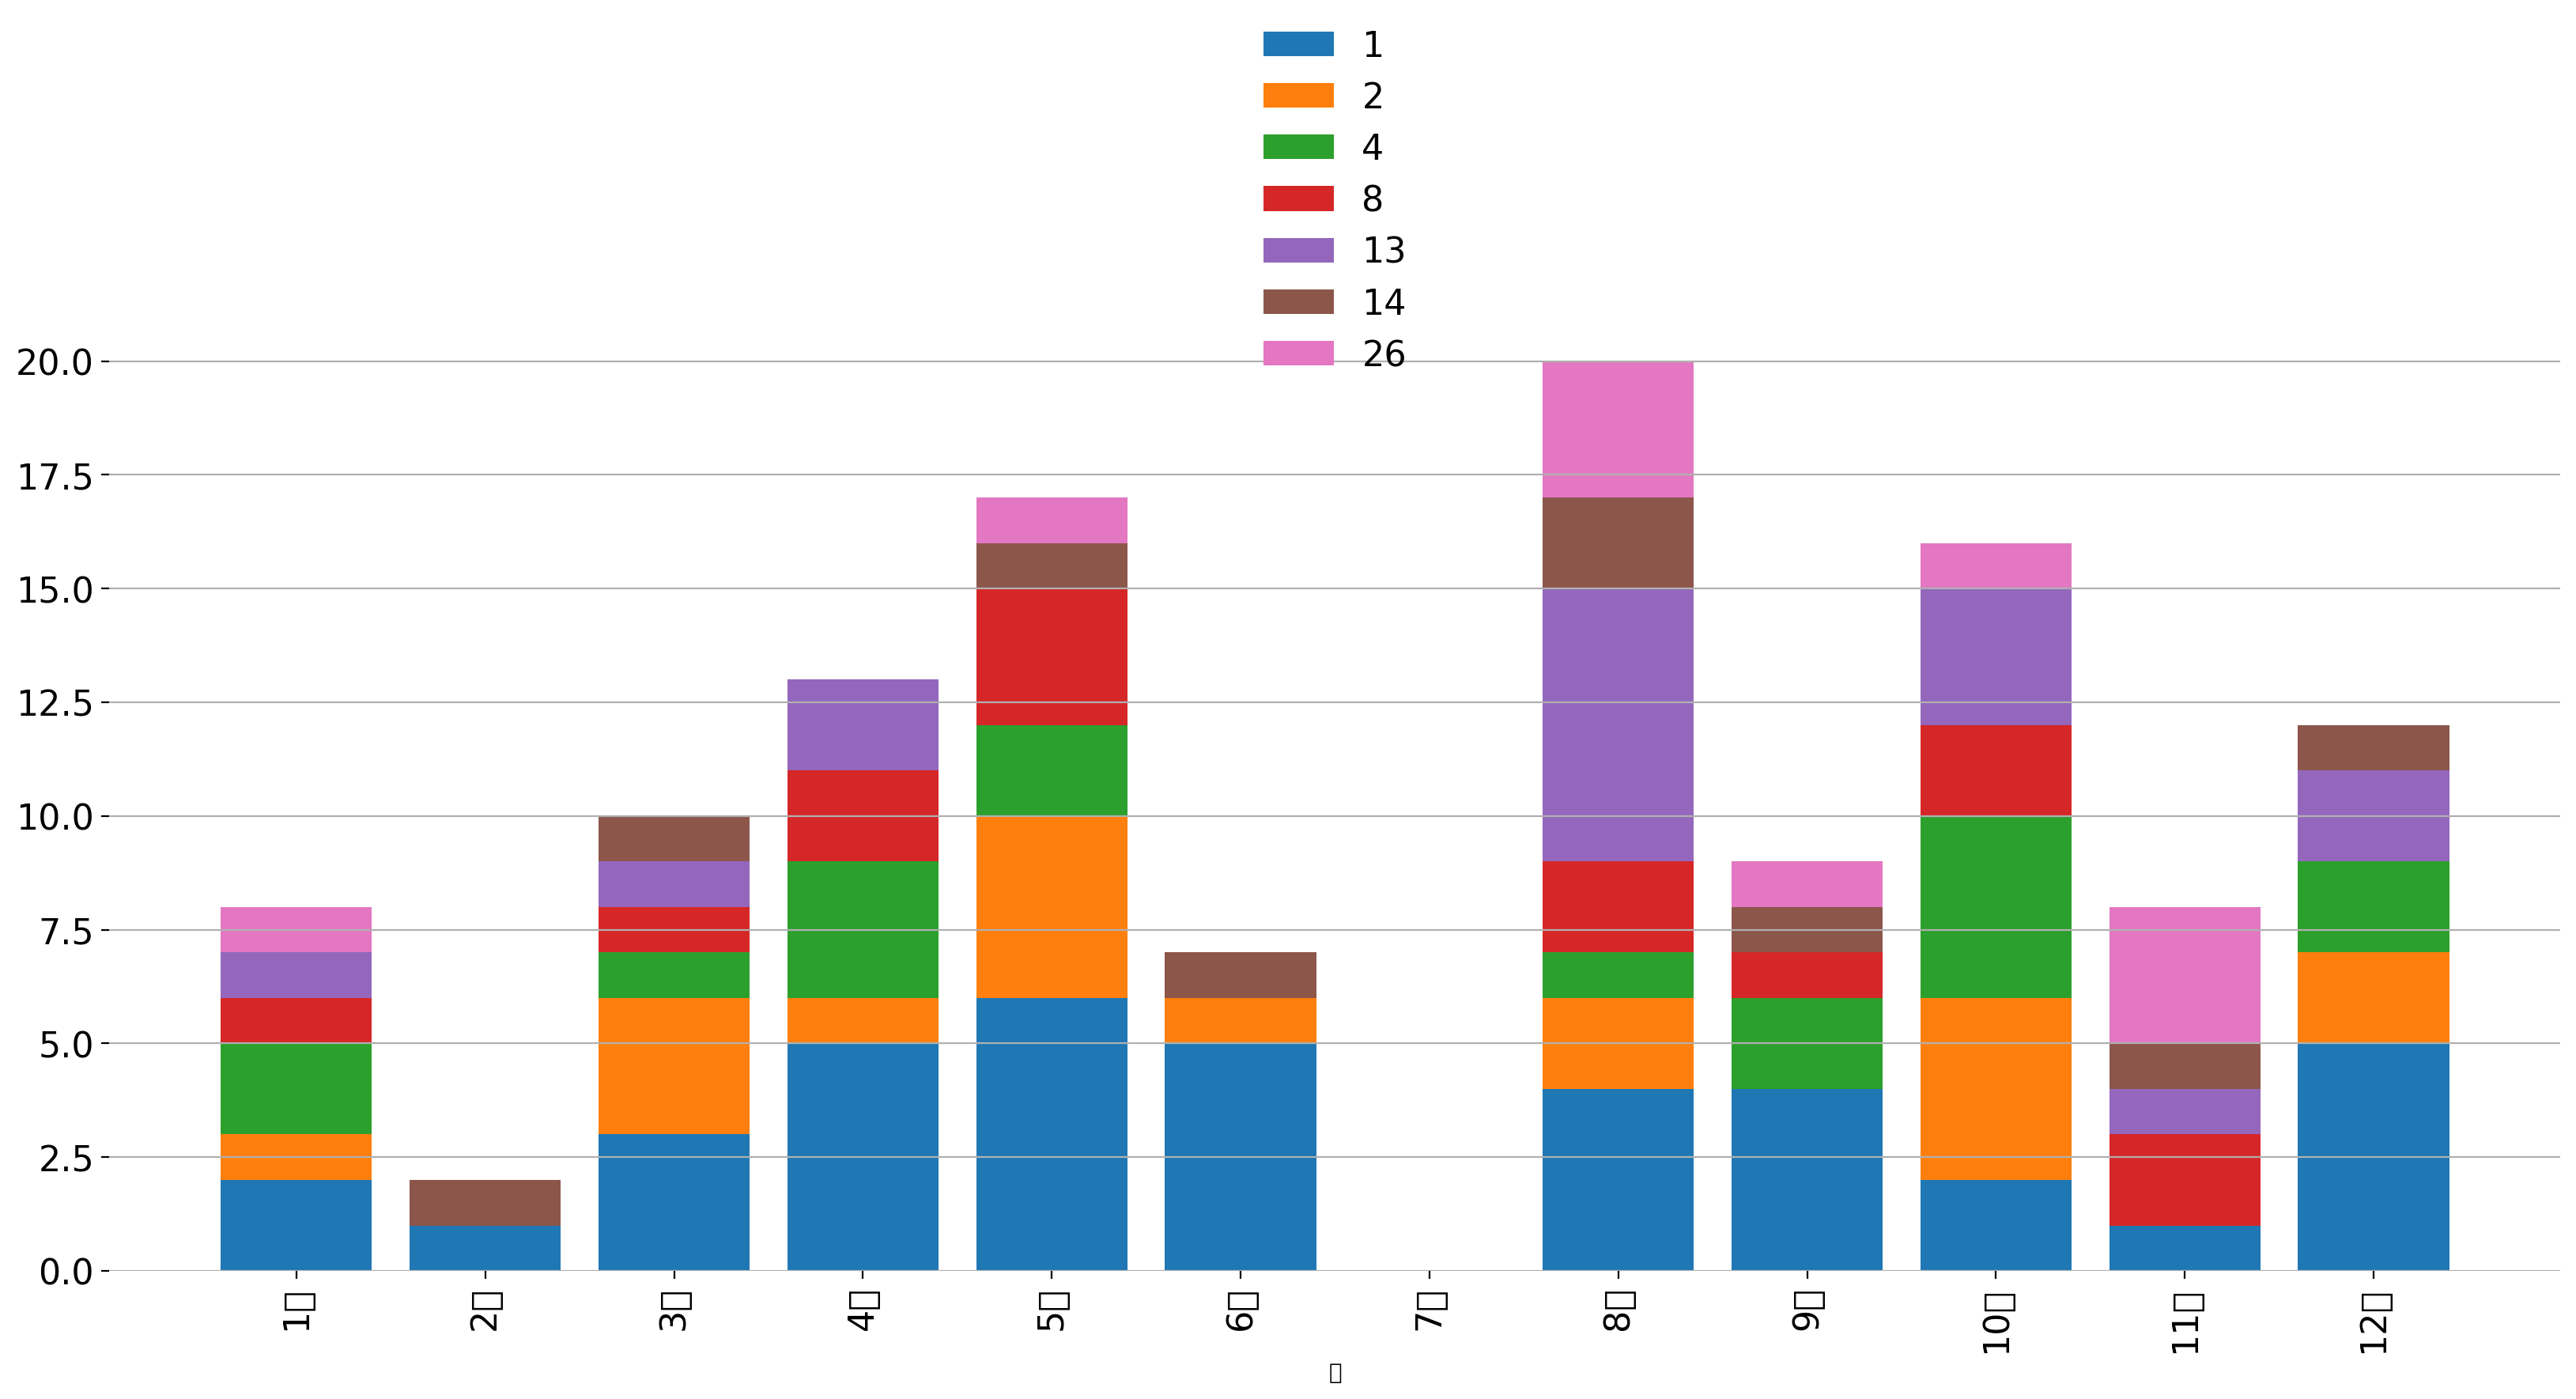

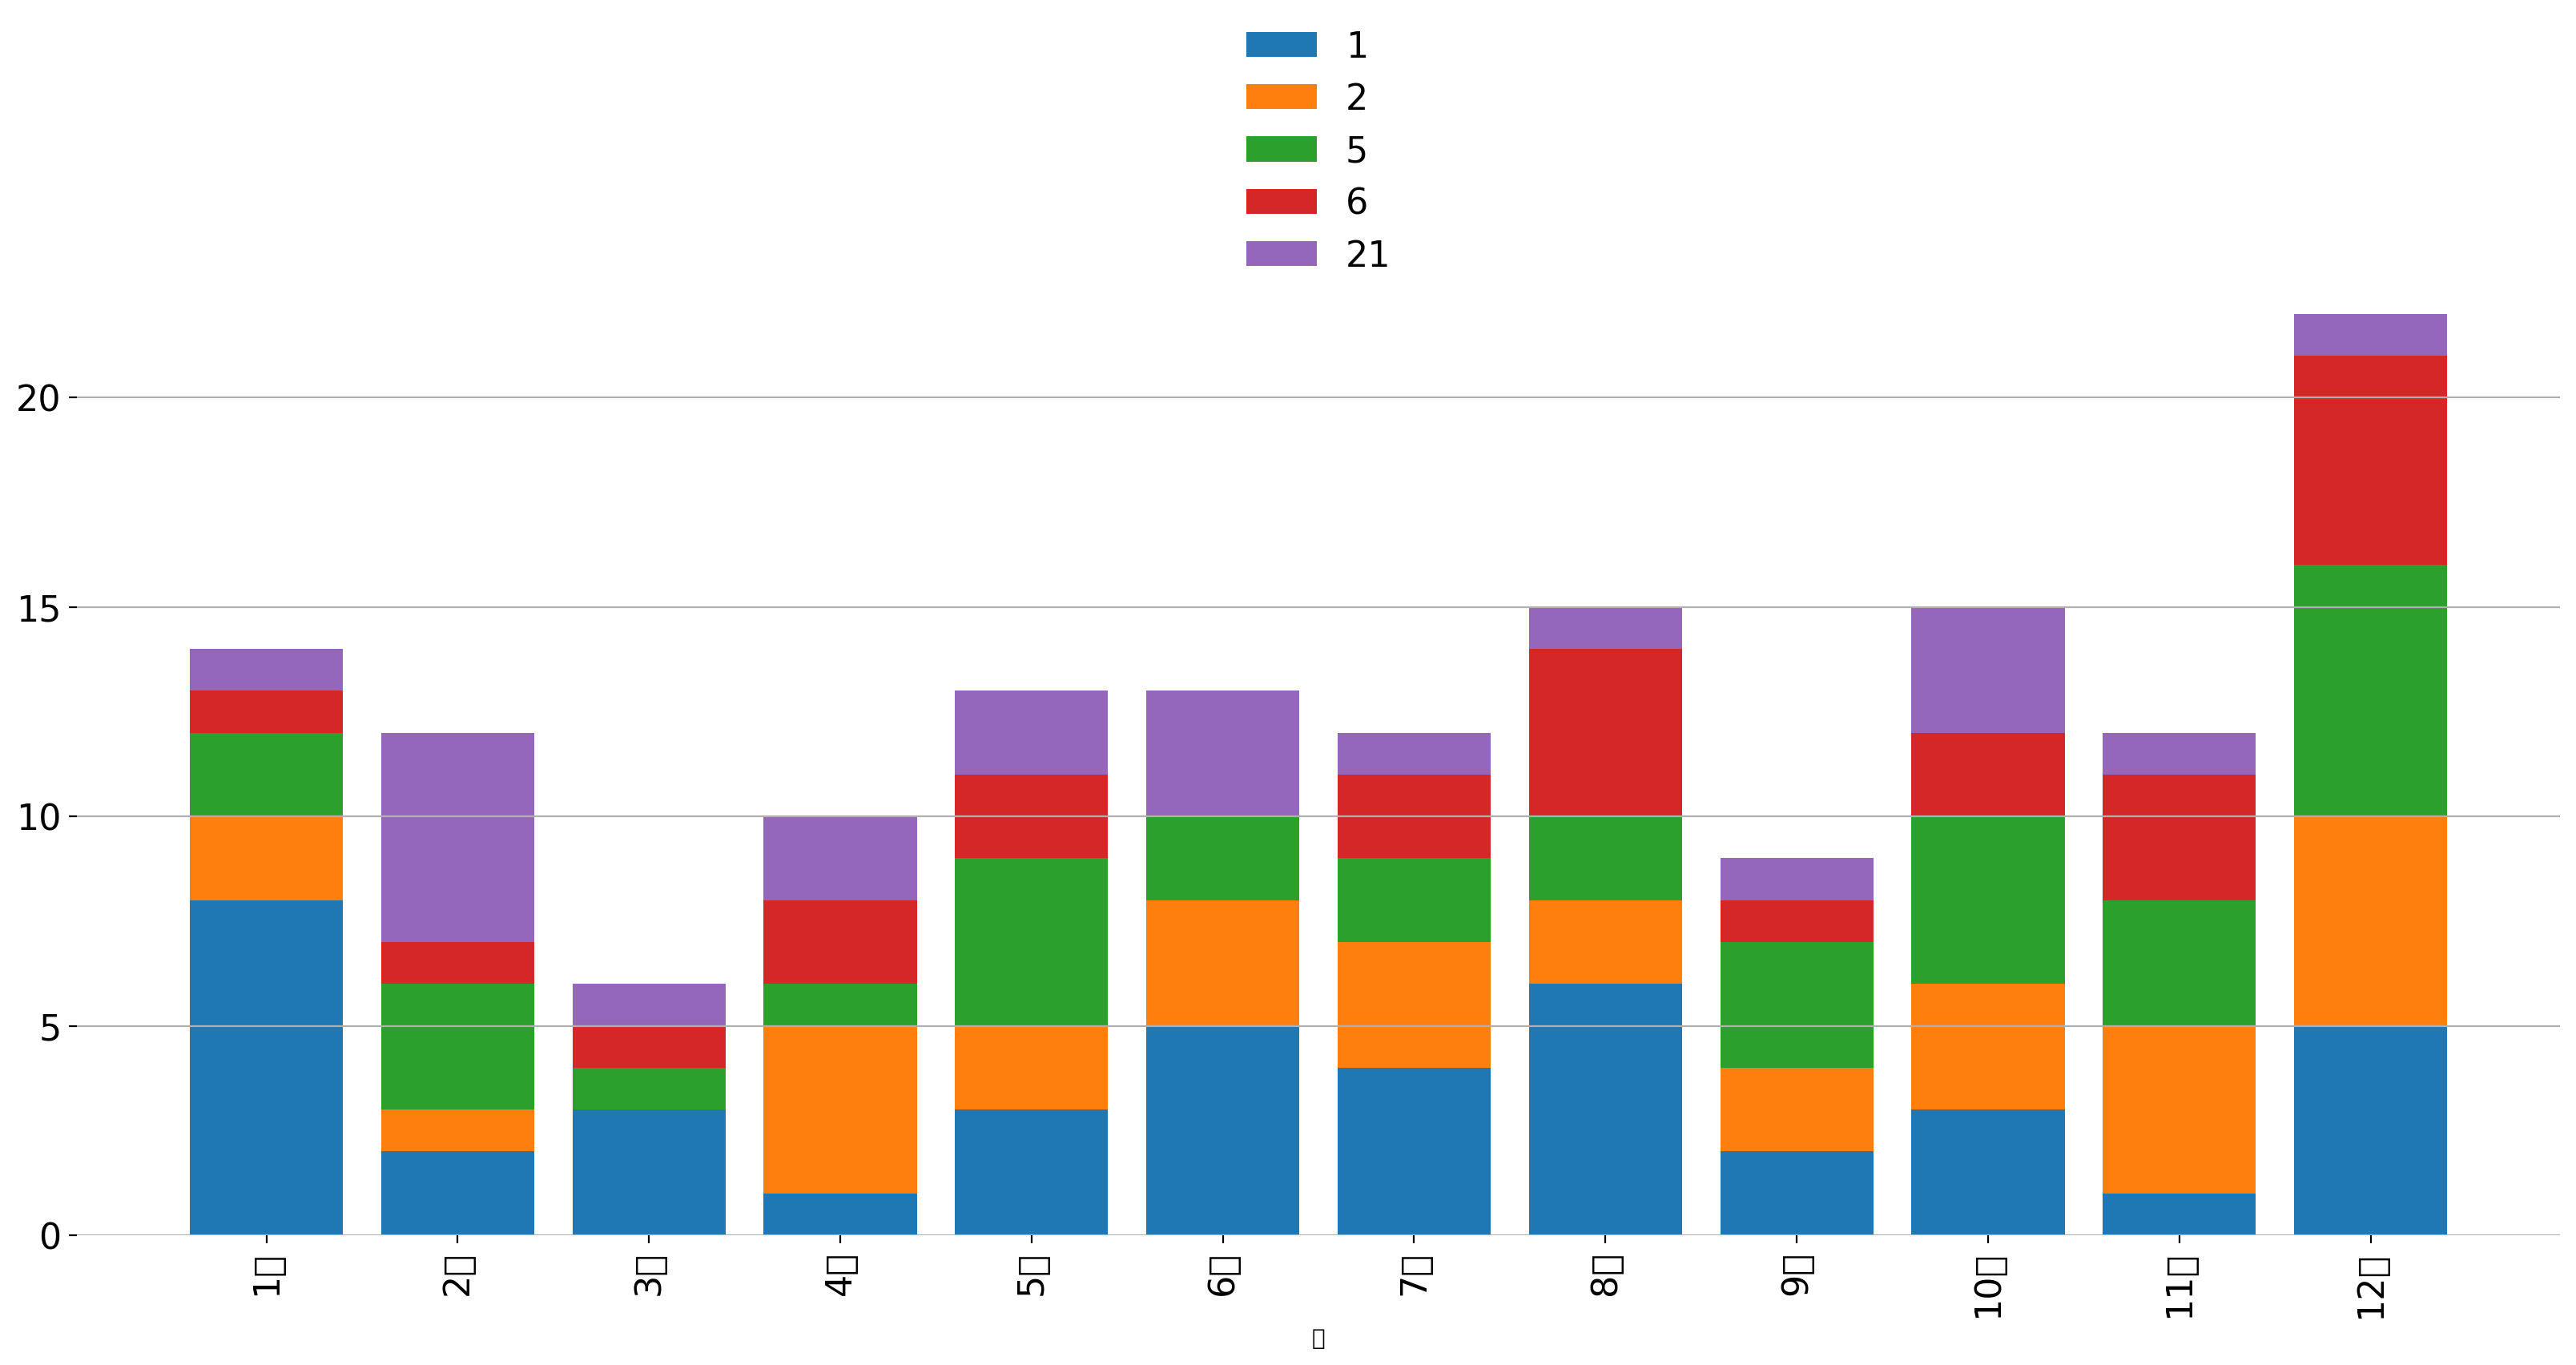

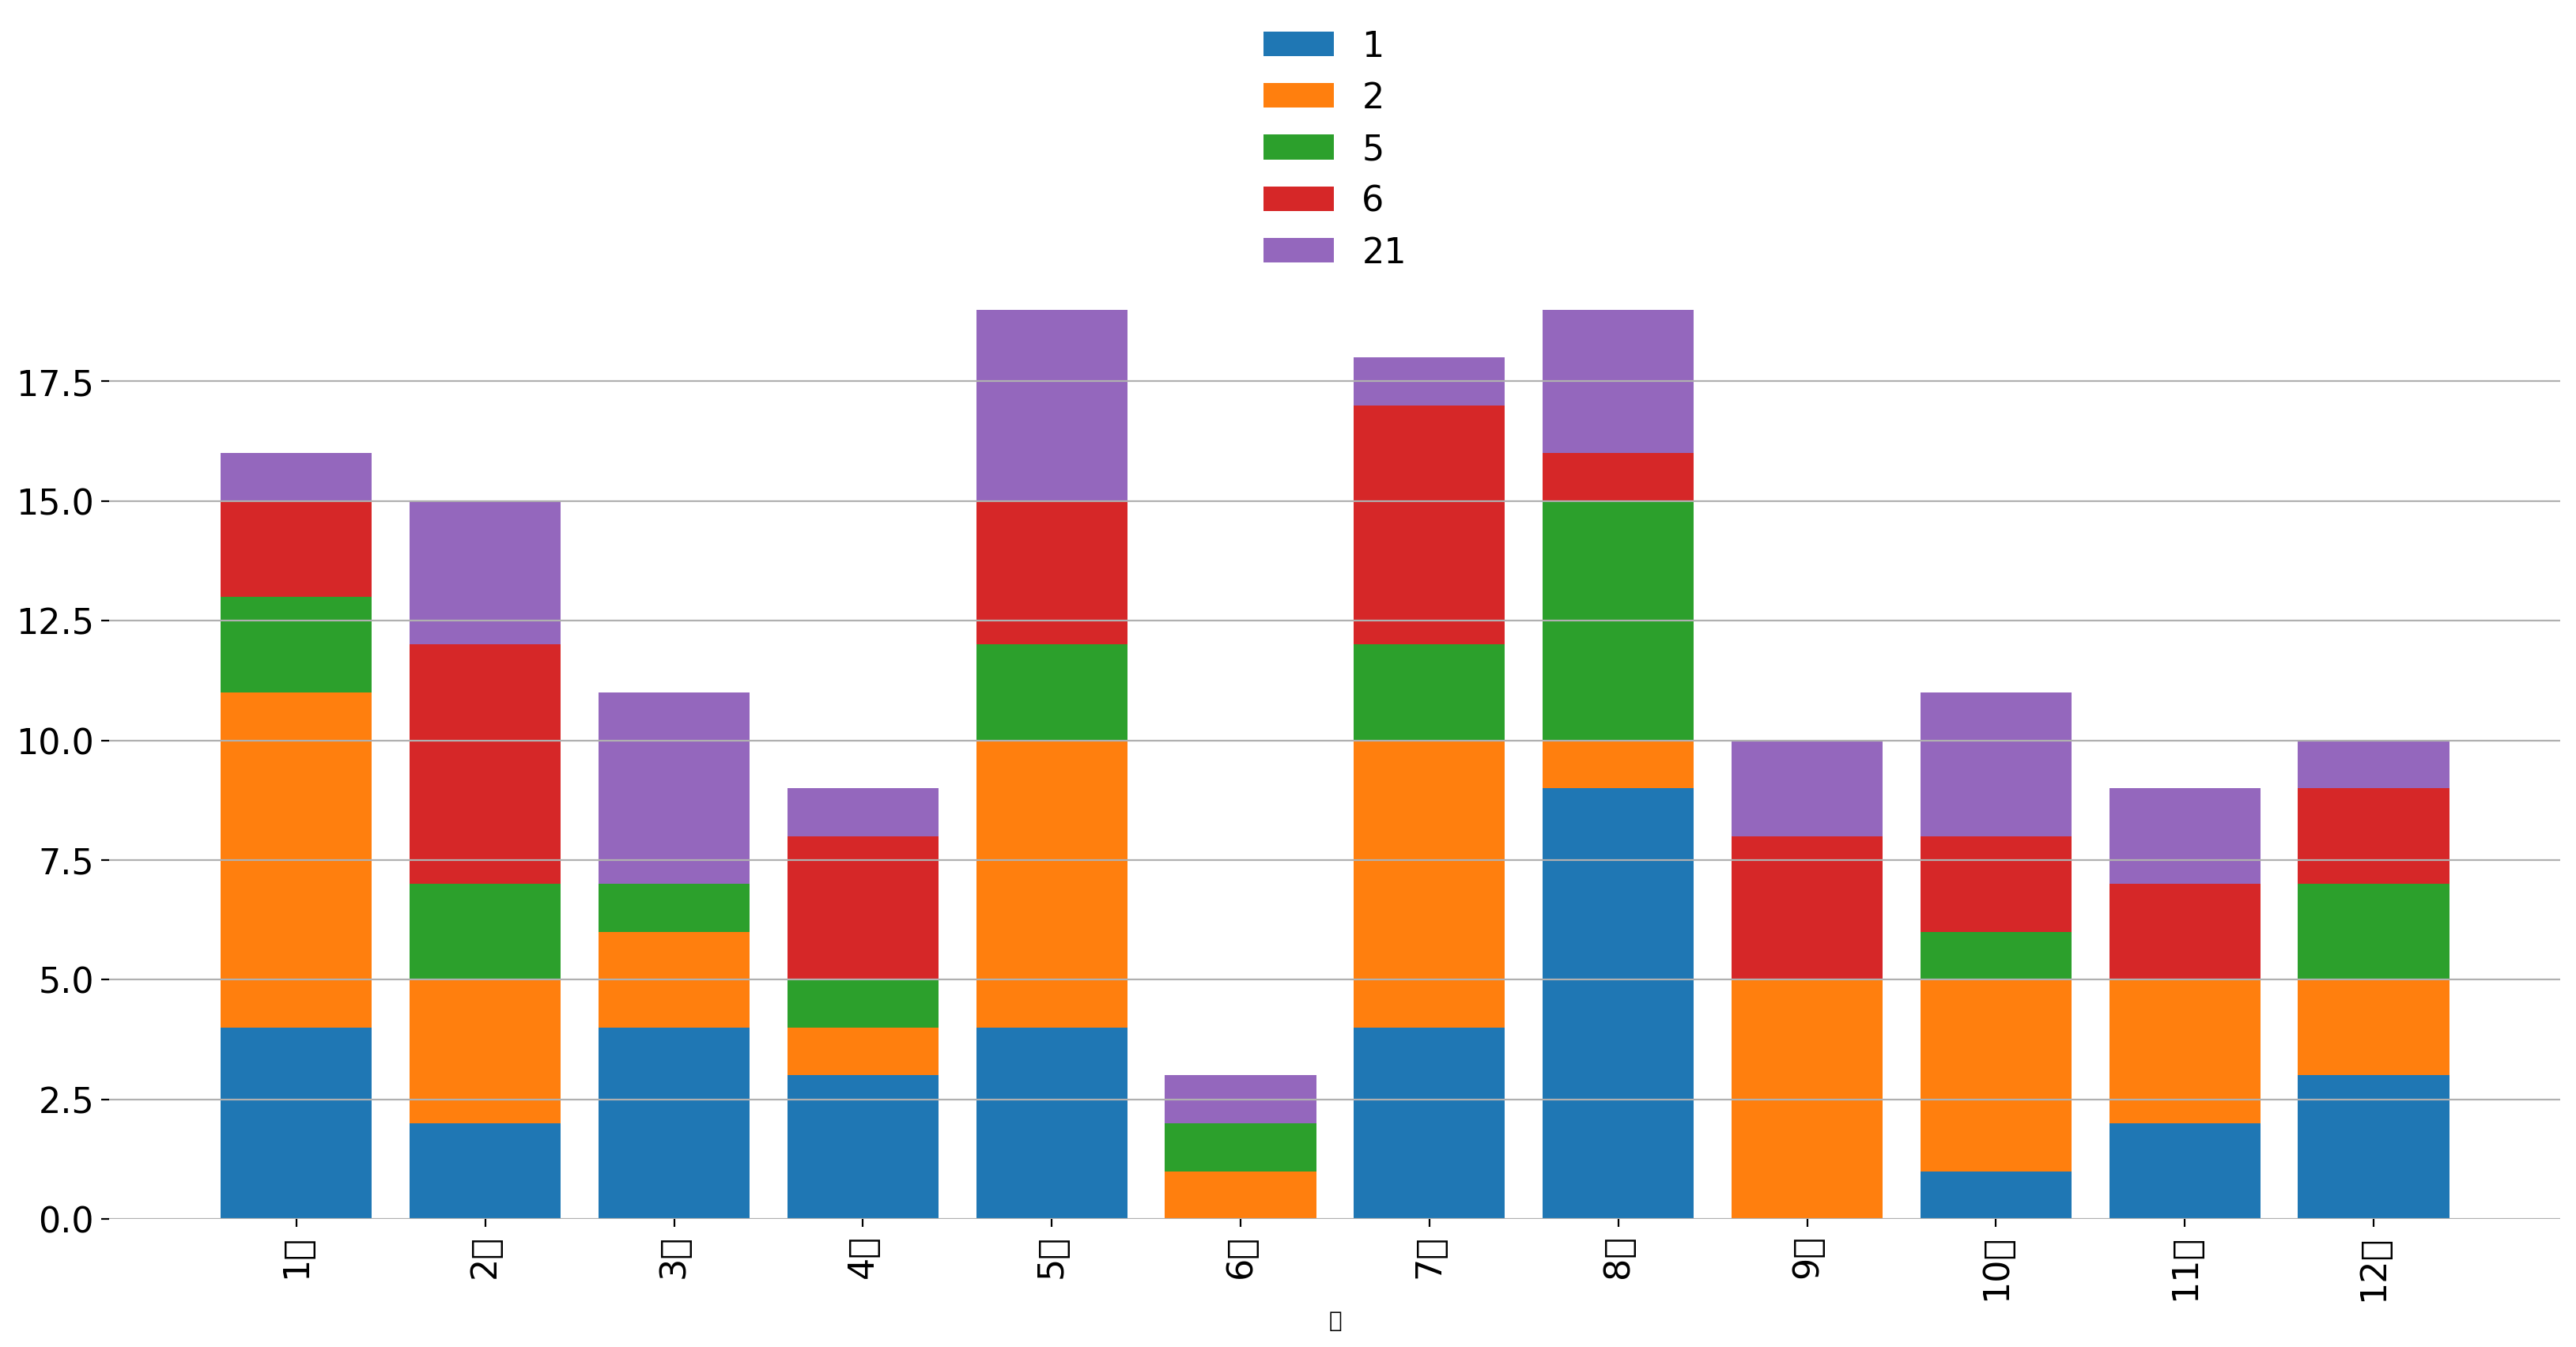

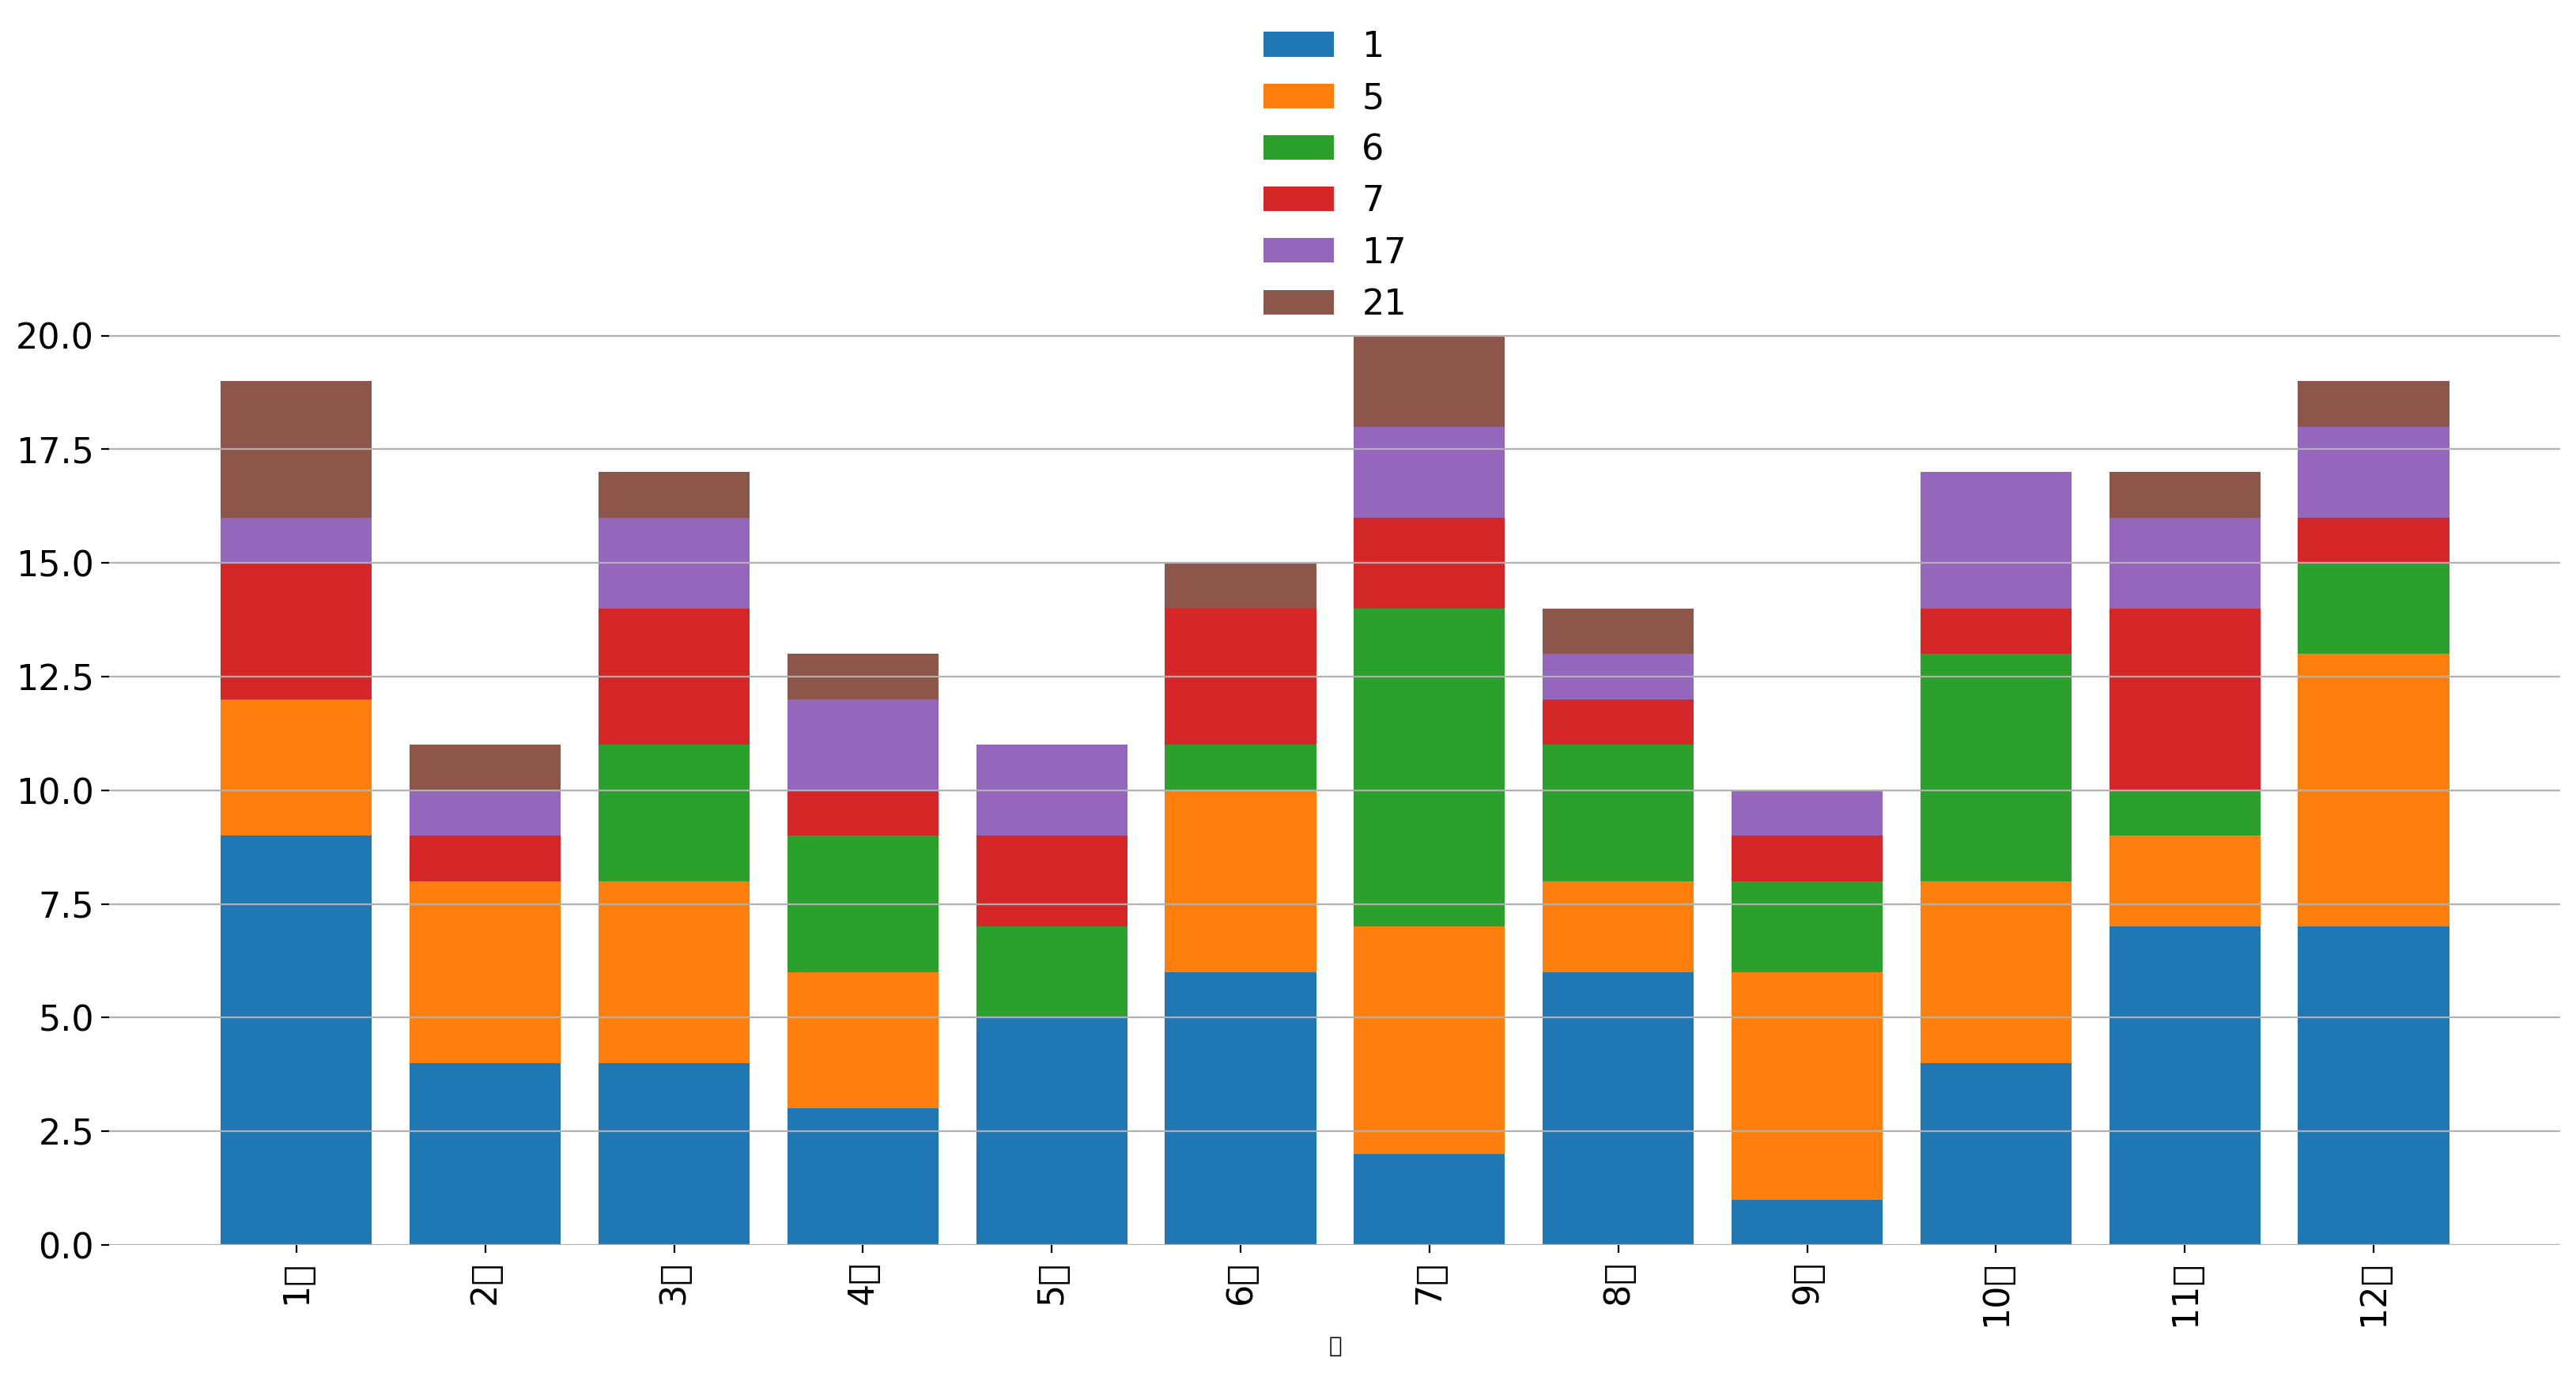

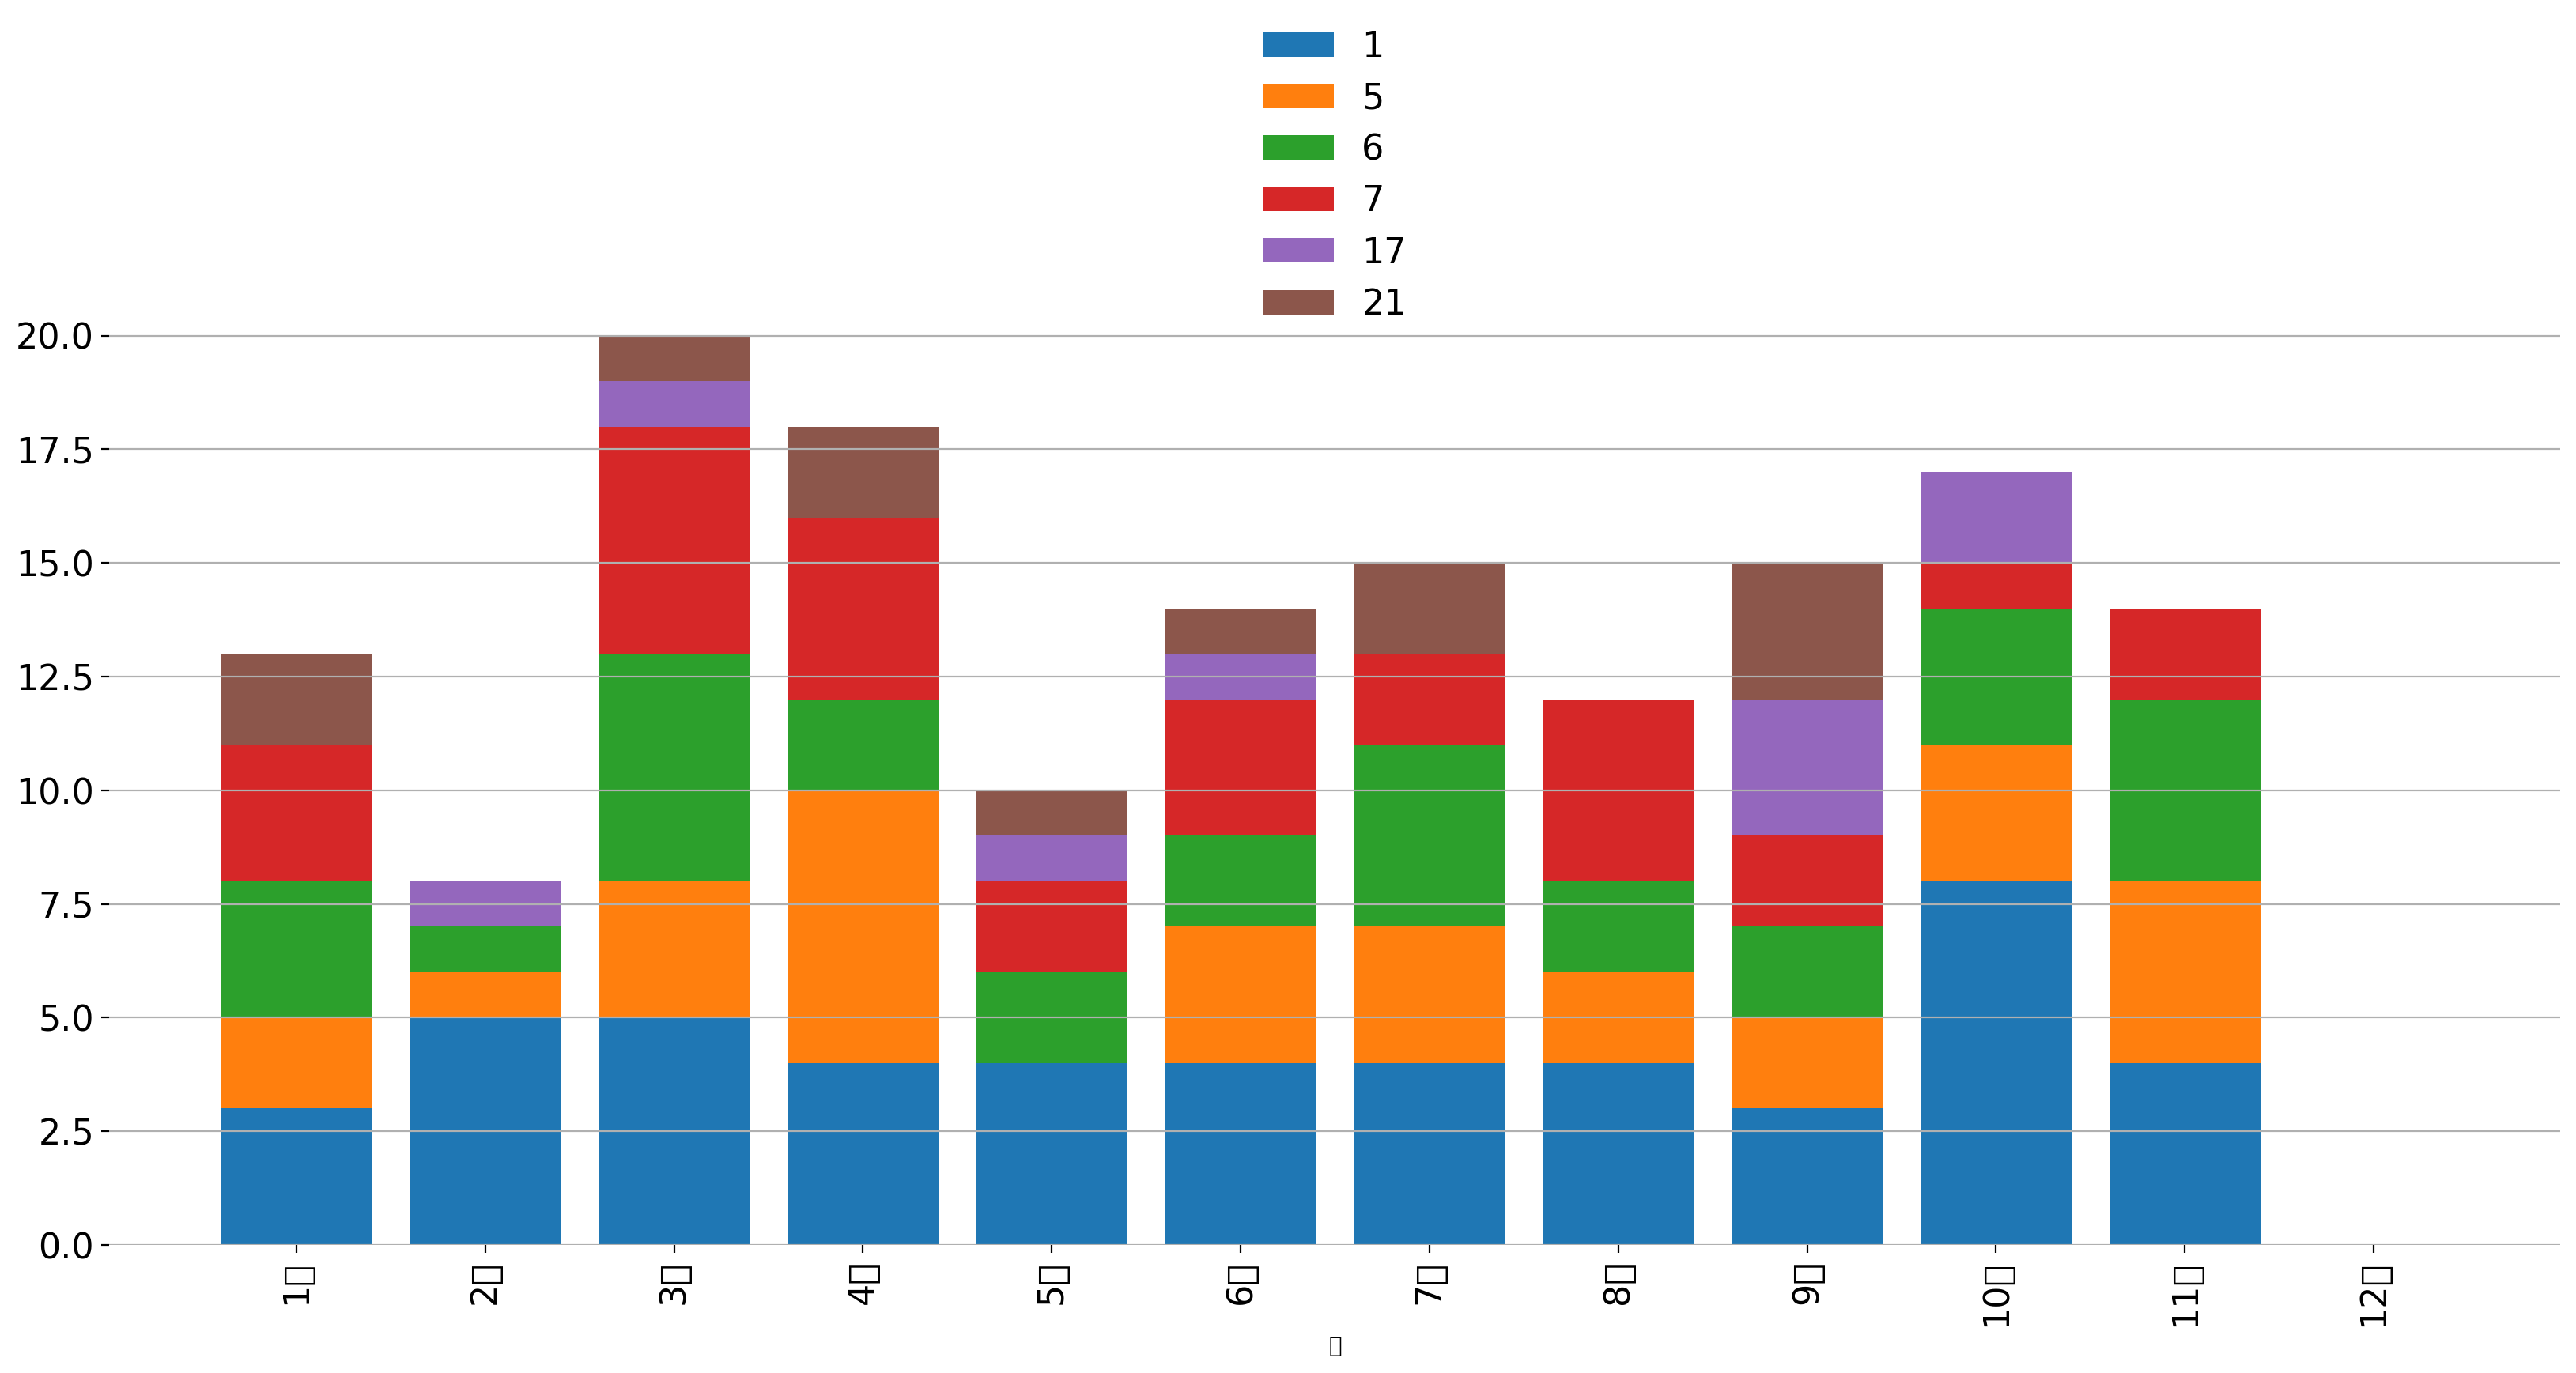

In [2]:
years=[2019,2020]
#データ格納用のディレクトリ作り
version='V2_1'#バージョン


place_master=master.get_place_master()
for place in tqdm(place_master.items()):
    place_name=place[1]
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    #各会場の成績の良かったモデルのスコアの読み込み
    dir_path = "../bot_database/{place_name}/{place_name}_train/train_{place_name}.csv".format(place_name=place_name)#学習のためのベースになるリザルトデータ
    result_base_df=pd.read_csv(dir_path)
    result_base_df=result_base_df.drop(["Unnamed: 0"],axis=1)

    model_dir_path = "../bot_database/{place_name}/model_score_{place_name}/use_model/use_model_{place_name}_{V}.csv".format(place_name=place_name,V=version)#使用するモデルのパラメータ読み込み
    use_model_df=pd.read_csv(model_dir_path)
    use_model_df=use_model_df.drop(["Unnamed: 0"],axis=1)
    
    
    for year in years:
        
        analysis.ym_analysis(result_base_df,use_model_df,place_name,version,year)
    
    print("=====================================================================================")
    
    
    #model_analysis.use_model_para(good_score_df,place_name,version)



In [4]:
dir_path = "../bot_database/{place_name}/{place_name}_train/train_{place_name}.csv".format(place_name=place_name)#学習のためのベースになるリザルトデータ
result_base_df=pd.read_csv(dir_path)
result_base_df=result_base_df.drop(["Unnamed: 0"],axis=1)
result_base_df

,date,result_com,money,number_race,racer_1_ID,racer_2_ID,racer_3_ID,racer_4_ID,racer_5_ID,racer_6_ID,...,racer_2_bo,racer_2_mo,racer_3_bo,racer_3_mo,racer_4_bo,racer_4_mo,racer_5_bo,racer_5_mo,racer_6_bo,racer_6_mo
0,2012-04-01,41,3330.0,2,3419,3777,4201,3935,4595,4531,...,30.0,26.0,32.0,34.0,56.0,55.0,20.0,24.0,46.0,48.0
1,2012-04-01,22,780.0,3,3044,3475,4054,3718,2843,4081,...,48.0,70.0,42.0,41.0,28.0,31.0,25.0,29.0,38.0,47.0
2,2012-04-01,68,1240.0,4,4169,3769,2874,3360,4488,3757,...,39.0,28.0,34.0,63.0,12.0,33.0,75.0,15.0,62.0,57.0
3,2012-04-01,68,2510.0,5,3739,4486,4521,3629,3892,3329,...,64.0,51.0,72.0,20.0,21.0,71.0,52.0,25.0,60.0,16.0
4,2012-04-01,1,830.0,7,3430,2787,4531,3596,4054,4068,...,13.0,40.0,46.0,48.0,66.0,44.0,42.0,41.0,55.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19083,2020-03-22,9,1340.0,8,4173,4091,3382,3448,3550,4327,...,36.0,45.0,15.0,65.0,68.0,80.0,66.0,62.0,49.0,76.0
19084,2020-03-22,29,8470.0,9,4180,4128,3741,4761,4581,5103,...,23.0,29.0,48.0,66.0,38.0,53.0,31.0,17.0,27.0,24.0
19085,2020-03-22,4,1220.0,10,4305,3463,4404,4802,3920,3505,...,45.0,58.0,11.0,38.0,64.0,50.0,72.0,15.0,62.0,46.0
19086,2020-03-22,5,840.0,11,4593,3997,4173,4756,4363,4382,...,24.0,67.0,71.0,78.0,65.0,51.0,75.0,32.0,47.0,42.0


In [4]:
val=0/0

ZeroDivisionError: division by zero